In [19]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
#from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial

In [20]:
plt.rcParams.update({'font.size': 18})

In [10]:
#rn_file_1='/pnfs/uboone/persistent/users/wforeman/blip_anatrees/BlipAna_RadonData_Phase1_20220209.root'
rn_file_1='/pnfs/uboone/scratch/users/rdorrill/rnData/BlipAna_RadonData_Phase1_20220209.root'
rn_file_2='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase2_20220217.root'
rn_file_3='/pnfs/uboone/scratch/users/rdorrill/RnBlipStudies/BlipAna_RadonData_Phase2_20220217_split_1.root'
rn_file_4='/uboone/data/users/wforeman/BlipAnaLite_20220407_RadonData_Phase1.root'
rn_file_5='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase1_20220422.root'
rn_file_6='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase2_20220503.root'
blip_file1='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220506_BlipTree.root'
fullFileTree='/blipana/anatree'
newTree='/blipanaTrkMask/anatree'
EVT_BRANCH = '/blipana/anatree/event'
splitTree_ANA = 'anatree'
blipTree= 'bliptree'
#BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
#BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'


In [4]:


##MCC9 BEAM OFF DATA
#df_Event_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_EVT) )
df_Event_rn6 = pd.DataFrame( root2array(rn_file_6,newTree) )
df_blip_file1 = pd.DataFrame( root2array(blip_file1,blipTree) )
#df_Event_rn3 = pd.DataFrame( root2array(rn_file_3,splitTree_ANA) )
#print(len(df_Event_rn1))
#df_Event_rn1_nucut1 = df_Event_rn1.query(NUSELECTION)



In [5]:
print("Test2")

Test2


In [6]:
#df_Event_rn3
print(len(df_Event_rn6))
df_Event_rn6.head(4)
#df_Event_rn3_NU = df_Event_rn3.query(NUSELECTION)

75545


event    run   timestamp      lifetime  nhits  ntrks  \
0   1551  27028  1627643521  18907.400391   2449     60   
1   1552  27028  1627643523  18907.400391   1560     72   
2   1553  27028  1627643525  18907.400391   1403     29   
3   1554  27028  1627643527  18907.400391   1578     48   

                                              trk_id  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  [0, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, ...   
3  [0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, ...   

                                          trk_length  \
0  [327.18854, 234.93704, 189.82347, 222.21631, 2...   
1  [264.10797, 261.66193, 253.62352, 238.46013, 2...   
2  [286.21463, 245.1631, 261.01096, 257.93018, 23...   
3  [353.53592, 340.07162, 284.08432, 233.5756, 21...   

                                          trk_startx  \
0  [268.48895, 192.47125, 255.02013, 84.71393, 83...   
1  [-26.980255, -11.677932, 88.90411, 124.57926, ...   
2  [129.29984, 82.47887, -43.957047, -25.746525, ...   
3  [251.31522, 218.19788, 225.78989, 274.99573, 9...   

                                          trk_starty  ...  \
0  [107.422386, 116.57148, 117.09039, 106.52975, ...  ...   
1  [117.352806, 116.93123, 112.041214, 117.0734, ...  ...   
2  [117.05966, 116.948044, 112.62517, 114.723404,...  ...   
3  [97.59549, 112.471725, 113.7061, 117.20404, 10...  ...   

                                              blip_y  \
0  [0.103974596, 20.109161, 116.8442, -0.15583302...   
1  [60.29274, 1.0566026, 111.56145, 27.383776, -9...   
2  [97.61844, 95.62658, 113.206894, 21.494802, 11...   
3  [99.7835, -45.535564, 111.90785, 82.982605, -9...   

                                              blip_z  \
0  [33.6, 12.85, 15.8, 31.15, 36.1, 39.5, 59.05, ...   
1  [7.45, 19.75, 37.45, 60.55, 65.65, 78.5, 81.55...   
2  [1.5, 9.55, 22.5, 44.05, 60.85, 65.05, 83.9, 8...   
3  [8.95, 31.15, 38.35, 86.35, 90.85, 110.35, 114...   

                                        blip_maxdiff  \
0  [114.488556, -9.0, 0.17320508, -9.0, 0.5196152...   
1  [-9.0, -9.0, -9.0, -9.0, -9.0, 0.17320508, -9....   
2  [0.17320508, -9.0, 0.17320508, -9.0, -9.0, -9....   
3  [-9.0, -9.0, -9.0, -9.0, -9.0, -9.0, -9.0, -9....   

                                         blip_charge  \
0  [44464.387, 30623.4, 10410.503, 1929.537, 6427...   
1  [15926.193, 7483.8936, 7112.466, 14635.042, 91...   
2  [8222.753, 17454.996, 10757.42, 8182.56, 12877...   
3  [14312.955, 4965.48, 28784.473, 4673.6636, 765...   

                                         blip_energy  \
0  [1.7012979, 1.2930261, 0.387253, 0.071162835, ...   
1  [0.5831128, 0.2899052, 0.2861617, 0.5512751, 0...   
2  [0.33222088, 0.7217447, 0.41870022, 0.3282862,...   
3  [0.59431696, 0.19832991, 1.1640856, 0.18529369...   

                                        blip_trkdist  \
0  [18.813087, 46.039734, 71.92012, 58.179775, 70...   
1  [51.894684, 22.792248, 74.822235, 37.00869, 15...   
2  [92.96732, 77.00433, 134.56726, 35.344776, 69....   
3  [119.107956, 55.743546, 113.7926, 91.89541, 95...   

                                    blip_clustid_pl0  \
0  [16, -9, 2, -9, 25, 30, 7, 9, -9, 11, -9, -9, ...   
1  [-9, 13, -9, 12, -9, 35, -9, 37, -9, 14, 7, 41...   
2  [3, 4, 2, -9, -9, -9, 29, -9, 30, -9, -9, 9, -...   
3  [1, -9, 2, -9, -9, 32, 5, -9, -9, 4, -9, -9, 7...   

                                    blip_clustid_pl1  \
0  [164, 161, 198, 160, 145, 143, -9, 187, 252, 2...   
1  [140, -9, 158, -9, 132, 131, 133, 134, 168, 17...   
2  [128, -9, 135, 115, 143, 107, 105, 129, 106, 1...   
3  [-9, 116, -9, 136, 115, -9, -9, 114, 151, -9, ...   

                                    blip_clustid_pl2 total_blip_energy  
0  [418, 421, 422, 428, 430, 433, 435, 436, 447, ...         92.796280  
1  [355, 358, 363, 369, 371, 373, 374, 378, 385, ...         78.791763  
2  [336, 338, 345, 353, 361, 363, 364, 365, 366, ...         51.111366  
3  [346, 354, 355,

In [15]:
#df_Event_rn6 - arrays: trk_starty 	... 	blip_y 	blip_z 	blip_maxdiff 	blip_charge 	blip_energy 	blip_trkdist 	blip_clustid_pl0 	blip_clustid_pl1 	blip_clustid_pl2 	total_blip_energy
rnblip_y_vals=[]
rnblip_z_vals=[]
all_blip_energies=[]
g10_blip_energies=[]

y_arrays=df_Event_rn6['blip_y']
z_arrays=df_Event_rn6['blip_z']
blip_arrays=df_Event_rn6['blip_energy']
   
#g10_upper_det_region_cut='((sps_y > 90.0 and sps_y < 117.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200)))'
#g10_lower_det_region_cut='((sps_y < -90.0 and sps_y > -117.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) '
#g10_equivalent_half_region_cut=('(sps_y > 0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')
#complementary_upper_det_region_cut = '((sps_y > 90.0 and sps_y < 117.0) and ( (sps_z>50 and sps_z<90) or (sps_z>155 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<870) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))'
#complementary_lower_det_region_cut = ' ( (sps_y < -90.0 and sps_y > -117.0) and ( (sps_z>50 and sps_z<90) or (sps_z>155 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<870) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1035.0 ) )  )'

for i in range(50000):
    for j in range(len(z_arrays[i])):
        y_val=y_arrays[i][j]
        z_val=z_arrays[i][j]
        blip_val=blip_arrays[i][j]
        rnblip_z_vals.append(z_val)
        rnblip_y_vals.append(y_val)
        all_blip_energies.append(blip_val)
        if((y_val > 90.0 and y_val < 117.0) and ((z_val>10 and z_val<50) or (z_val>90 and z_val<130) or (z_val>210 and z_val<250) or (z_val>320 and z_val<360) or (z_val>440 and z_val<470) or (z_val>560 and z_val<600) or (z_val>660 and z_val<700) or (z_val>780 and z_val<810) or (z_val>890 and z_val<930) or (z_val>980 and z_val<1100) )) or ((y_val < 60.0 and y_val > 40.0 ) and ((z_val>0 and z_val<40) or (z_val>1000 and z_val<1200)) or ((y_val < -90.0 and y_val > -117.0) and ((z_val>10 and z_val<50) or (z_val>90 and z_val<130) or (z_val>210 and z_val<250) or (z_val>320 and z_val<360) or (z_val>440 and z_val<470) or (z_val>560 and z_val<600) or (z_val>660 and z_val<700) or (z_val>780 and z_val<810) or (z_val>890 and z_val<930) or (z_val>980 and z_val<1100) )) or ((y_val < -40.0 and y_val > -60.0 ) and ((z_val>0 and z_val<40)or (z_val>1000 and z_val<1200)))):
            g10_blip_energies.append(blip_arrays[i][j])

        


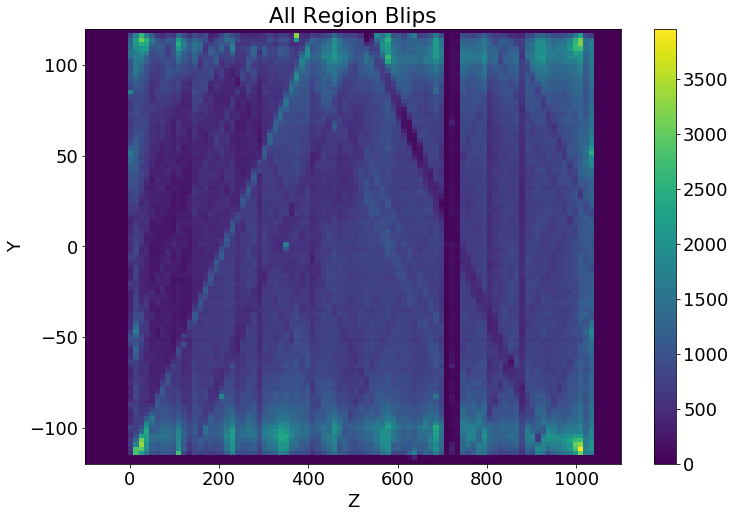

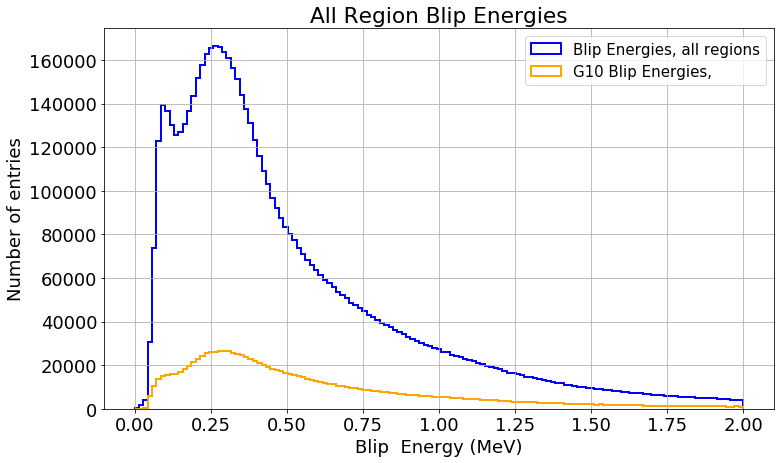

In [18]:
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(rnblip_z_vals,rnblip_y_vals,bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips")
plt.xlabel('Z')
plt.ylabel('Y')

BINS = np.linspace(0,2.0,140)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(all_blip_energies,histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions',color='blue',normed=False)
g10_hist,b2,p2 = plt.hist(g10_blip_energies,histtype='step',bins = BINS,lw=2,label='G10 Blip Energies,',color='orange',normed=False)


plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [12]:
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(rnblip_z_vals,rnblip_y_vals,bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips")
plt.xlabel('Z')
plt.ylabel('Y')

BINS = np.linspace(0,2.0,140)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(all_blip_energies,histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions',color='blue',normed=False)
g10_hist,b2,p2 = plt.hist(g10_blip_energies,histtype='step',bins = BINS,lw=2,label='G10 Blip Energies,',color='orange',normed=False)


plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


BINS = np.linspace(0,2.1,160)
fig = plt.figure(figsize=(12,7))

lowthresh_hist,b1,p1 = plt.hist(all_blip_energies,histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions',color='blue',normed=True)
g10_hist,b2,p2 = plt.hist(g10_blip_energies,histtype='step',bins = BINS,lw=2,label='G10 Blip Energies,',color='orange',normed=True)


plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Normed')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


NameError: name 'all_blip_energies' is not defined

<Figure size 864x504 with 0 Axes>

1187242
1187242


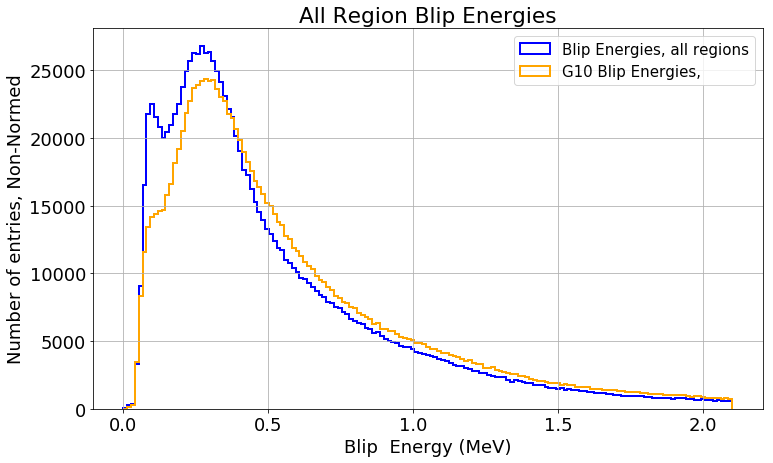

In [23]:
num_g10_blips=len(g10_blip_energies)
print(num_g10_blips)
cut_all_blip_energies=all_blip_energies[:num_g10_blips]
print(len(cut_all_blip_energies))

BINS = np.linspace(0,2.1,160)
fig = plt.figure(figsize=(12,7))

lowthresh_hist,b1,p1 = plt.hist(cut_all_blip_energies,histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions',color='blue',normed=False)
g10_hist,b2,p2 = plt.hist(g10_blip_energies,histtype='step',bins = BINS,lw=2,label='G10 Blip Energies,',color='orange',normed=False)

plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Non-Normed')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')



In [ ]:
################################### Temporarily inserted for reference ####################################


#########   2D Region Plots for Low Threshold Files   #########  

df_ryan_beamoff_lowthresh_30cmr_G10=df_ryan_beamoff_lowthresh_30cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_ryan_beamoff_lowthresh_30cmr_rest_det=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_30cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')


############################################ Low Threshold 15cm ############################################


#########   2D Region Plots for Low Threshold Files   #########  

print "Low Thresh 15cm plotting..."
fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Region SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_rest_det['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_rest_det['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of Det. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary to G10 region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, no region cut")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Innet Det. G10 Equiv. Volume")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

[33.6, 12.85, 15.8, 31.15, 36.1, 39.5, 59.05, 60.9, 134.65, 134.6, 137.35, 143.05, 143.1, 157.75, 201.1, 160.75, 163.75, 166.15, 165.85, 166.45, 167.65, 174.25, 176.95, 180.25, 182.65, 188.95, 189.6, 191.1, 196.75, 204.2, 212.35, 221.65, 231.55, 231.85, 240.55, 251.95, 256.45, 279.25, 307.15, 321.25, 337.15, 362.65, 396.25, 399.25, 402.25, 405.25, 410.1, 418.5, 424.75, 428.05, 428.3, 431.65, 433.75, 464.65, 488.9, 497.4, 530.65, 545.95, 558.0, 560.05, 576.85, 578.65, 579.55, 590.35, 596.65, 625.15, 635.95, 652.5, 661.45, 662.35, 662.35, 674.05, 675.55, 624.5, 684.55, 744.55, 778.15, 785.9, 787.15, 788.35, 793.45, 797.05, 802.75, 803.1, 805.15, 826.45, 829.45, 833.05, 836.65, 840.2, 841.0, 870.2, 882.8, 888.7, 891.25, 917.35, 921.25, 925.75, 928.75, 958.8, 958.75, 972.0, 983.05, 990.3, 994.75, 995.65, 997.75, 998.35, 999.25, 1000.15, 1005.55, 1006.15, 1012.75, 1014.85, 1015.75, 1025.65, 1029.8, 7.45, 19.75, 37.45, 60.55, 65.65, 78.5, 81.55, 92.0, 145.45, 152.1, 152.1, 179.95, 186.55, 20

In [25]:
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1'
NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0'# and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0'# and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '

In [26]:
myfile_beam_off_run1='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_inclusive_v3_C1_C2_combined_gammacorrelation_hadd.root'
myfile_beam_off_run3='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_G1_G2_combined_gammacorrelation_hadd.root'
myfile_beam_off_run1_run3='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_C1_C2_G1_G2_gammacorrelation_hadd.root'
myfile_on_off='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/on_off_combined_gammacorrelation.hadd'

In [27]:
BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [28]:
df_Event_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_EVT) )

In [40]:
df_Event_beam_off_run1.head()
print df_Event_beam_off_run1['evttime'].nunique()
df_ryan_beamoff_lowthresh_30cmr_q_vals = df_Event_beam_off_run1['Event_cluster_charge']#.sample(104039)#.sample(95000)
print(df_ryan_beamoff_lowthresh_30cmr_q_vals)


10307
0           61.163746
1           13.951102
2           32.452007
3           24.289867
4           28.143909
5           88.212578
6           53.078690
7            5.108152
8         2089.825684
9         4912.328125
10        4512.754395
11        4144.844238
12         606.100464
13         300.045135
14          69.438278
15         203.061096
16        3117.595703
17         102.370964
18        3854.803467
19        2032.017456
20          21.424879
21          44.181137
22         118.278839
23          76.759285
24          92.604141
25         104.521240
26          83.860458
27          16.660061
28          41.145336
29          46.509480
             ...     
10283       78.196747
10284      101.390076
10285       55.650894
10286       15.809993
10287       14.544568
10288       46.864250
10289       25.442772
10290     3725.648682
10291     1832.058472
10292     1774.147827
10293     7634.343750
10294       21.756435
10295      193.837158
10296     2392.067139
1029

In [6]:
##MCC9 BEAM OFF DATA
df_Event_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_EVT) )
df_Sps_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_SPS) )
print(len(df_Event_beam_off_run1))
df_Event_beam_off_run1 = df_Event_beam_off_run1.query(NUSELECTION)

df_Sps_beam_off_run1 = df_Sps_beam_off_run1.query(NUSELECTION)
df_Sps_beam_off_run1_rand = df_Sps_beam_off_run1.query(NUSELECTION_rand)
df_Event_beam_off_run1_rand = df_Event_beam_off_run1.query(NUSELECTION_rand)


10313


In [29]:
print(len(df_SPS_beam_off_run1))

NameError: name 'df_SPS_beam_off_run1' is not defined

In [7]:
df_Event_beam_off_run3 = pd.DataFrame( root2array( myfile_beam_off_run3,BRANCH_EVT) )
df_Sps_beam_off_run3 = pd.DataFrame( root2array( myfile_beam_off_run3,BRANCH_SPS) )
print(len(df_Event_beam_off_run3))
df_Event_beam_off_run3 = df_Event_beam_off_run3.query(NUSELECTION)
df_Sps_beam_off_run3 = df_Sps_beam_off_run3.query(NUSELECTION)
df_Sps_beam_off_run3_rand = df_Sps_beam_off_run3.query(NUSELECTION_rand)
df_Event_beam_off_run3_rand = df_Event_beam_off_run3.query(NUSELECTION_rand)

7318


In [8]:
df_Event_beam_off_combined = pd.DataFrame( root2array( myfile_beam_off_run1_run3,BRANCH_EVT) )
df_Sps_beam_off_combined = pd.DataFrame( root2array( myfile_beam_off_run1_run3,BRANCH_SPS) )

df_Event_beam_off_combined = df_Event_beam_off_combined.query(NUSELECTION)
df_Sps_beam_off_combined = df_Sps_beam_off_combined.query(NUSELECTION)
df_Sps_beam_off_combined_rand = df_Sps_beam_off_combined.query(NUSELECTION_rand)
df_Event_beam_off_combined_rand = df_Event_beam_off_combined.query(NUSELECTION_rand)

In [9]:
df_Event_beam_on_off = pd.DataFrame( root2array( myfile_on_off,BRANCH_EVT) )
df_Sps_beam_on_off = pd.DataFrame( root2array( myfile_on_off,BRANCH_SPS) )

df_Event_beam_on_off = df_Event_beam_on_off.query(NUSELECTION)
df_Sps_beam_on_off = df_Sps_beam_on_off.query(NUSELECTION)
df_Sps_beam_on_off_rand = df_Sps_beam_on_off.query(NUSELECTION_rand)
df_Event_beam_on_off_rand = df_Event_beam_on_off.query(NUSELECTION_rand)

In [10]:
print(len(df_Event_beam_off_combined))

3866


In [11]:
df_Event_beam_off_run1.head()

evttime    Vertex_x   Vertex_y    Vertex_z  _rand_vtx_x  _rand_vtx_y  \
1   1457100699  180.826889  -8.104650  181.935059   242.483477   -62.255682   
3   1465068086  115.019424 -31.713774   57.085827   255.933888   -78.204909   
8   1466141233  127.963623   9.064785  450.756775   245.114101    56.678840   
12  1466331000  182.789948  22.747826  858.374512   189.427963    60.306961   
18  1460991931   84.599998 -18.631981  216.485825   242.483477   -62.255682   

    _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
1    499.522823          42.345935     73             13.951102  ...   
3    291.096339          32.586444     69             24.289867  ...   
8    556.244968           3.712195     73           2089.825684  ...   
12   678.395713          83.144808     79            606.100464  ...   
18   499.522823          10.439784     98           3854.803467  ...   

    neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
1                1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   
3                1  0.441788  0.732093  0.518520  145.296402   158.454107   
8                2  0.052474  0.870769  0.488885  105.468575   235.261461   
12               2 -0.108033  0.737243  0.666934  122.575211   308.350892   
18               2 -0.460319  0.836514  0.297241  112.220436   283.217241   

    distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
1              48.837010              1   5278        34  
3             133.120145              0   6482         7  
8              78.390006              0   6592        91  
12            111.345449              0   6608        36  
18             32.469265              1   5966       166  

[5 rows x 29 columns]

In [12]:
df_Sps_beam_off_run1.head()

evttime       sps_x       sps_y      sps_z    distance  \
73  1457100699  245.610611    0.363782   0.900000  192.463860   
74  1457100699   77.428123  -15.917496  16.799999  194.992136   
75  1457100699  115.935402 -113.085548  17.700001  205.438673   
76  1457100699  214.859070  -98.622925  61.799999  154.221204   
77  1457100699  171.481400   57.175049  65.557503  133.762898   

    sps_cluster_charge  N_Event  N_Run  N_SubRun    Vertex_x  ...  \
73           15.080428     1711   5278        34  180.826889  ...   
74           46.957619     1711   5278        34  180.826889  ...   
75           14.886367     1711   5278        34  180.826889  ...   
76           23.159426     1711   5278        34  180.826889  ...   
77           30.253319     1711   5278        34  180.826889  ...   

    neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
73               1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   
74               1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   
75               1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   
76               1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   
77               1 -0.490159 -0.491578 -0.719789  131.195099   326.368725   

    distance_nu_smallest  cosmic_trk_50  pointdistance_trk_smallest  \
73              48.83701              1                 1030.050178   
74              48.83701              1                 1034.573153   
75              48.83701              1                 1033.601413   
76              48.83701              1                  976.804139   
77              48.83701              1                  972.400930   

    distance_trk_smallest  
73             121.783773  
74             108.705446  
75             144.620148  
76             154.066562  
77              84.505473  

[5 rows x 28 columns]

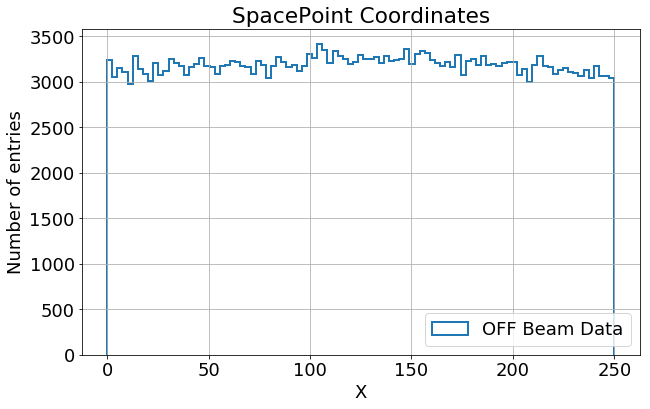

In [13]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_x'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=4)
plt.show()

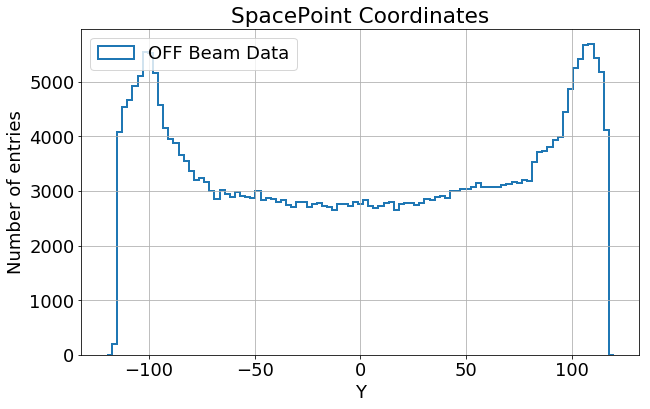

In [14]:
BINS = np.linspace(-120,120,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_y'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Y')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

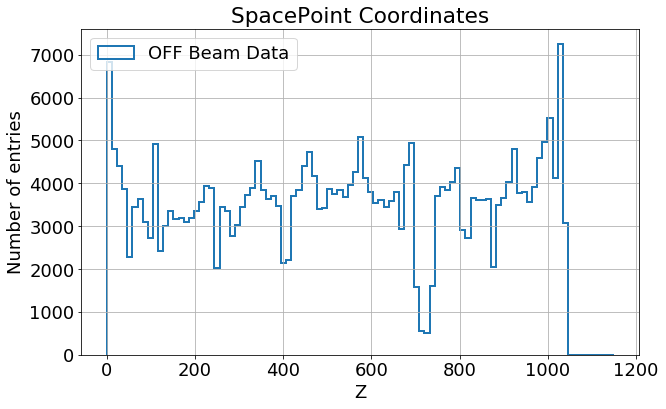

In [15]:
BINS = np.linspace(0,1150,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_z'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [16]:
# df_Sps_beam_off_run1_50ADC = df_Sps_beam_off_run1.query('sps_cluster_charge>10')

In [ ]:
# df_Sps_beam_off_run1_threshold = df_Sps_beam_off_run1.query('sps_cluster_charge<50')

In [ ]:
# fig = plt.figure(figsize=(10,6))

# plt.hist2d(df_Sps_beam_off_run1_threshold['sps_z'].values,df_Sps_beam_off_run1_threshold['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1_threshold['sps_x'].values,df_Sps_beam_off_run1_threshold['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1_50ADC['sps_z'].values,df_Sps_beam_off_run1_50ADC['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()


In [ ]:
# fig = plt.figure(figsize=(10,6))

# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1['sps_x'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()
# fig.savefig('SpacePoint_Off_Beam_YZ', dpi=300)

In [35]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

NameError: name 'df_Sps_beam_off_combined' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_x'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
fig.savefig('SpacePoint_Off_Combined_Beam_YZ', dpi=300)

In [ ]:
# fig = plt.figure(figsize=(30,7))
# plt.subplot(1, 3, 1)
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.subplot(1, 3, 2)
# plt.hist2d(df_Sps_beam_off_run1['sps_x'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.subplot(1, 3, 3)
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()

# plt.show()
# fig.savefig('SpacePoint_off_run1_Beam', dpi=300)


In [ ]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

In [ ]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()



In [ ]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

In [ ]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

In [ ]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



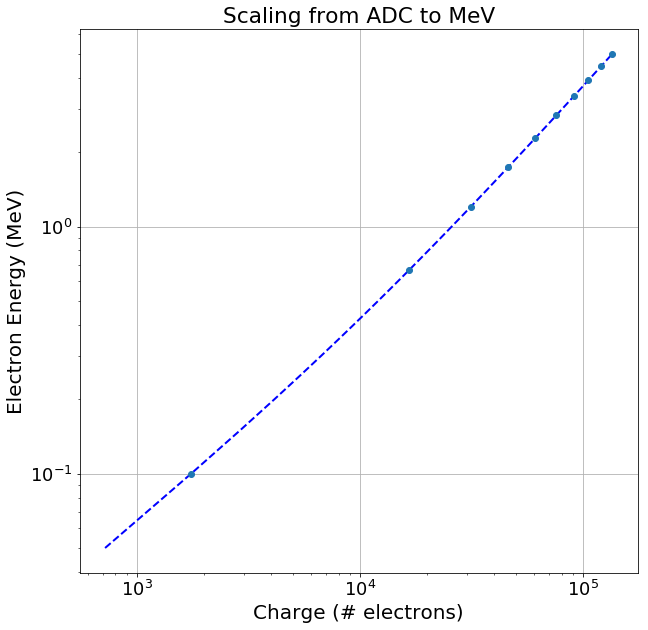

In [38]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic',fill_value='extrapolate')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [ ]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [ ]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [ ]:
print Charge(0.2,0.273)


In [ ]:
def E_recoY_off_run1(df,gain):
    YQ_off_run1 = df['sps_cluster_charge50']
    QrecoY_off_run1 = YQ_off_run1 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1 = fQ2E(QrecoY_off_run1)
    return ErecoY_off_run1


def E_recoY_off_run3(df,gain):
    YQ_off_run3 = df['sps_cluster_charge50']
    QrecoY_off_run3 = YQ_off_run3 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3 = fQ2E(QrecoY_off_run3)
    return ErecoY_off_run3

def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on

def E_recoY_MC(df,gain):
    YQ_MC  = df['sps_cluster_charge50']
    QrecoY_MC = YQ_MC * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_MC = fQ2E(QrecoY_MC)
    return ErecoY_MC
    
def E_recoY_off_run1_G10(df,gain):
    YQ_off_run1_G10  = df['sps_cluster_charge']
    QrecoY_off_run1_G10 = YQ_off_run1_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_G10 = fQ2E(QrecoY_off_run1_G10)
    return ErecoY_off_run1_G10


def E_recoY_off_run3_G10(df,gain):
    YQ_off_run3_G10  = df['sps_cluster_charge']
    QrecoY_off_run3_G10 = YQ_off_run3_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_G10 = fQ2E(QrecoY_off_run3_G10)
    return ErecoY_off_run3_G10

def E_recoY_off_run1_rest_det(df,gain):
    YQ_off_run1_rest_det  = df['sps_cluster_charge']
    QrecoY_off_run1_rest_det = YQ_off_run1_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_rest_det = fQ2E(QrecoY_off_run1_rest_det)
    return ErecoY_off_run1_rest_det


def E_recoY_off_run3_rest_det(df,gain):
    YQ_off_run3_rest_det  = df['sps_cluster_charge']
    QrecoY_off_run3_rest_det = YQ_off_run3_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_rest_det = fQ2E(QrecoY_off_run3_rest_det)
    return ErecoY_off_run3_rest_det


def E_recoY_off_run3_complementary(df,gain):
    YQ_off_run3_complementary  = df['sps_cluster_charge']
    QrecoY_off_run3_complementary = YQ_off_run3_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_complementary = fQ2E(QrecoY_off_run3_complementary)
    return ErecoY_off_run3_complementary

def E_recoY_off_run1_complementary(df,gain):
    YQ_off_run1_complementary  = df['sps_cluster_charge']
    QrecoY_off_run1_complementary = YQ_off_run1_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_complementary = fQ2E(QrecoY_off_run1_complementary)
    return ErecoY_off_run1_complementary
  
    
    
def E_recoY_off_combined_rest_det(df,gain):
    YQ_off_combined_rest_det  = df['sps_cluster_charge']
    QrecoY_off_combined_rest_det = YQ_off_combined_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_rest_det = fQ2E(QrecoY_off_combined_rest_det)
    return ErecoY_off_combined_rest_det    
    
def E_recoY_off_combined_complementary(df,gain):
    YQ_off_combined_complementary  = df['sps_cluster_charge']
    QrecoY_off_combined_complementary = YQ_off_combined_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_complementary = fQ2E(QrecoY_off_combined_complementary)
    return ErecoY_off_combined_complementary    
    

def E_recoY_off_combined_G10(df,gain):
    YQ_off_combined_G10  = df['sps_cluster_charge']
    QrecoY_off_combined_G10 = YQ_off_combined_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_G10 = fQ2E(QrecoY_off_combined_G10)
    return ErecoY_off_combined_G10    
    
    
    #E_r=0.01 # MeV
    #while E_r<10:
    #    Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
    #    Q_hypo=Eff_Recomb*E_r # MeV
    #    if Q_hypo>Qreco:
    #        return E_r
    #    E_r+=0.01
    #    
def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

In [ ]:
df_G10_off_run1=df_Sps_beam_off_run1.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_run1=df_Sps_beam_off_run1.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')


# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_G10_off_run1['sps_z'].values,df_G10_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_run1 Beam Data')
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.show()



# print df_G10_off_run1.shape[0]


In [ ]:
df_G10_off_run3=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_run3_cut=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) ')

df_rest_det_off_run3_cut=df_Sps_beam_off_run3.query('(sps_y < -90.0 or sps_y > 90.0)')




In [ ]:
df_G10_off_combined=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_combined_cut=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) ')

df_rest_det_off_combined_cut=df_Sps_beam_off_combined.query('(sps_y < -90.0 or sps_y > 90.0)')


In [ ]:
fig = plt.figure(figsize=(15,5))

df_G10_off_combined_complementary=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_G10_off_run3_complementary=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')


plt.subplot(1, 2, 1)

#plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())
plt.hist2d(df_G10_off_combined_complementary['sps_z'].values,df_G10_off_combined_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())

plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(1, 2, 2)

#plt.hist2d(df_G10_off_combined_complementary['sps_z'].values,df_G10_off_combined_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())
plt.hist2d(df_G10_off_combined_cut['sps_z'].values,df_G10_off_combined_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())

plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
fig.savefig('G-10_combined.png', dpi=400)

In [ ]:
df_G10_on_off=df_Sps_beam_on_off.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')


In [ ]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,500,50)
# plt.hist(df_G10_off_run1['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,200,500)
# plt.hist(df_G10_off_run3_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,200,500)
# plt.hist(df_G10_off_run3_complementary['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
df_sps_charge_off_run1_G10=df_G10_off_run1.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_sps_charge_off_run1_G10['energy']=E_recoY_off_run1_G10(df_sps_charge_off_run1_G10,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run1_G10['energy'].values,bins=BINS,histtype='stepfilled',label='off_run1 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
df_sps_charge_off_run3_G10=df_G10_off_run3_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_sps_charge_off_run3_G10['energy']=E_recoY_off_run3_G10(df_sps_charge_off_run3_G10,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='off_run3 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
df_sps_charge_off_run3_complementary=df_G10_off_run3_complementary.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 5.')
df_sps_charge_off_run3_complementary['energy']=E_recoY_off_run3_complementary(df_sps_charge_off_run3_complementary,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='off_run3 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
df_sps_charge_off_combined_complementary=df_G10_off_combined_complementary.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_combined_complementary['energy']=E_recoY_off_combined_complementary(df_sps_charge_off_combined_complementary,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
df_sps_charge_off_combined_G10=df_G10_off_combined_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_combined_G10['energy']=E_recoY_off_combined_G10(df_sps_charge_off_combined_G10,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='G10')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
# df_rest_det_off_combined=df_Sps_beam_off_combined.query('(sps_y < -90.0 or sps_y > 90.0)')

df_sps_charge_off_combined_rest_det=df_rest_det_off_combined_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')

df_sps_charge_off_combined_rest_det['energy']=E_recoY_off_combined_rest_det(df_sps_charge_off_combined_rest_det,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,3,600)
plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector')
plt.title("Energy Distribution for rest_det SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
# fig = plt.figure(figsize=(10,6))


# plt.hist2d(df_rest_det_off_run3_cut['sps_z'].values,df_rest_det_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.show()

In [ ]:

# fig = plt.figure(figsize=(15,5))


# plt.subplot(1, 2, 1)

# plt.hist2d(df_rest_det_off_run3_cut['sps_z'].values,df_rest_det_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.subplot(1, 2, 2)

# plt.hist2d(df_G10_off_run3_cut['sps_z'].values,df_G10_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()
# #fig.savefig('Isolation_comp.png', dpi=400)

In [ ]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,500,50)
# plt.hist(df_rest_det_off_run3_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
# plt.title("Charge Distribution for rest_det SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
# df_sps_charge_off_rest_det=df_rest_det_off_run3_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
# df_sps_charge_off_rest_det['energy']=E_recoY_off_run3_rest_det(df_sps_charge_off_rest_det,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
# plt.title("Energy Distribution for rest_det SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(15,6))

# BINS=np.linspace(0,3,600)
# plt.subplot(1, 2, 1)


# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()


# plt.subplot(1, 2, 2)


# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=1)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Area Normalized')
# plt.legend(loc=1)
# plt.grid()
# plt.show()
# #fig.savefig('Energy_comp.png', dpi=400)

In [ ]:
# fig = plt.figure(figsize=(15,6))

# BINS=np.linspace(0,3,100)
# plt.subplot(1, 2, 1)


# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary Region',alpha=0.7)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()


# plt.subplot(1, 2, 2)


# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='step',label='Complementary Region',alpha=1,density=True,lw=1)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Area Normalized')
# plt.legend(loc=1)
# plt.grid()
# plt.show()
# #fig.savefig('Energy_comp.png', dpi=400)

In [ ]:

# scaling_factor= 0.37864077669
# nRest_det = len(df_sps_charge_off_rest_det)
# weights_Rest_det = np.ones(nRest_det) * scaling_factor # factor needed to scale off-beam to on-beam


In [ ]:
# fig = plt.figure(figsize=(20,6))

# BINS=np.linspace(0,3,600)
# plt.subplot(1, 2, 1)

# n1, bins1, p1 = plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

# n2, bins2, p2 = plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7,weights=weights_Rest_det)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.title("Comparison (Re-Scaled by area)")
# #plt.show()
# plt.subplot(1, 2, 2)
# binsc1 = 0.5*(bins1[:-1]+bins1[1:])
# #fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.7)
# plt.plot(binsc1,(n1-n2))
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.grid()
# plt.title("Actual G-10 Energy Spectrum")
# plt.show()
# fig.savefig('Reweighted_comparison.png', dpi=400)


In [ ]:

# scaling_factor_complementary= 0.609375
# ncomplementary = len(df_sps_charge_off_run3_complementary)
# weights_complementary = np.ones(ncomplementary) * scaling_factor_complementary # factor needed to scale off-beam to on-beam


In [ ]:
# fig = plt.figure(figsize=(20,6))

# BINS=np.linspace(0,3,100)
# plt.subplot(1, 2, 1)

# n1_comp, bins1_comp, p1_comp = plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

# n2_comp, bins2, p2 = plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary',alpha=0.7,weights=weights_complementary)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.title("Comparison (Re-Scaled by area)")
# #plt.show()
# plt.subplot(1, 2, 2)
# binsc1 = 0.5*(bins1_comp[:-1]+bins1_comp[1:])
# #fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1_comp-n2_comp), alpha=0.7)
# plt.plot(binsc1,(n1_comp-n2_comp))
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.grid()
# plt.title("Actual G-10 Energy Spectrum")
# plt.show()
# #fig.savefig('Reweighted_comparison.png', dpi=400)

In [ ]:
fig = plt.figure(figsize=(15,6))

BINS=np.linspace(0,3,100)
plt.subplot(1, 2, 1)


plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary Region',alpha=0.7)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='step',label='Complementary Region',alpha=1,density=True,lw=1)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
fig.savefig('Energy_comp_combined.png', dpi=400)

In [ ]:
scaling_factor_complementary= 0.609375
ncomplementary = len(df_sps_charge_off_combined_complementary)
weights_complementary = np.ones(ncomplementary) * scaling_factor_complementary # factor needed to scale off-beam to on-beam


In [ ]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,210)
plt.subplot(1, 2, 1)

n1_comp, bins1_comp, p1_comp = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

n2_comp, bins2, p2 = plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary',alpha=0.7,weights=weights_complementary)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1_comp[:-1]+bins1_comp[1:])
#fig = plt.figure(figsize=(10,6))
plt.fill_between(binsc1,(n1_comp-n2_comp), alpha=0.7)
plt.plot(binsc1,(n1_comp-n2_comp))
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison_combined.png', dpi=400)

In [ ]:
fig = plt.figure(figsize=(15,6))

BINS=np.linspace(0,3,600)
plt.subplot(1, 2, 1)


plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=1)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
fig.savefig('Energy_comp_new.png', dpi=400)

In [ ]:
scaling_factor_new= 0.37864077669
nRest_det_new = len(df_sps_charge_off_combined_rest_det)
weights_Rest_det_new = np.ones(nRest_det_new) * scaling_factor_new # factor needed to scale off-beam to on-beam


In [ ]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,600)
plt.subplot(1, 2, 1)

n1, bins1, p1 = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

n2, bins2, p2 = plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7,weights=weights_Rest_det_new)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
plt.fill_between(binsc1,(n1-n2), alpha=0.7)
plt.plot(binsc1,(n1-n2))
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison_combined_new.png', dpi=400)




In [ ]:
#Ryan stuff for a few boxes
h3 = n1 - n2
BINSh3 = np.delete(BINS, -1)
plt.scatter(BINSh3,h3)

In [ ]:
def checkBlipSDev(df_to_test):
    df_to_test_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    goodEventNum = 0
    numEvents = 0
    for group_name, df_test_group in df_to_test_grouped:
        eventQs = []
        for q in df_test_group["sps_cluster_charge"]:
            eventQs.append(q)
        if len(eventQs) > 1:
            qStdev = np.std(eventQs)
            #print "Sum SPS q: ", np.sum(eventQs)," \tMean SPS q: ",np.mean(eventQs), "\tStdev q's: ",qStdev
            if qStdev > 1.01:
                goodEventNum += 1

        numEvents += 1       
    print "Number events out of %s with variable SPS_q: "%(numEvents), goodEventNum
    print "Percent good events: ", 100*goodEventNum/numEvents

In [ ]:
checkBlipSDev(df_sps_charge_off_combined_G10)
checkBlipSDev(df_sps_charge_off_combined_rest_det)

In [ ]:
from scipy.stats import chisquare as chi2

In [ ]:
# obs =df_sps_charge_off_run3_G10['energy']
# exp=df_sps_charge_off_rest_det['energy']
# exp.shape


In [ ]:
# obs.shape

In [ ]:
# n_exp = len(df_sps_charge_off_rest_det['energy'])
# n_obs = len(df_sps_charge_off_run3_G10['energy'])
# weights_exp = np.ones(n_exp) * (1/(n_obs)) # factor needed to scale off-beam to on-beam


In [ ]:
# expected= (np.exp,weights_exp)


In [ ]:
# #df_date_time=pd.to_datetime(df_Event_beam_off_radio_run3['evttime'],unit='s').apply(lambda x: x.date())
# fig = plt.figure(figsize=(15,6))
# plt.scatter(df_Event_beam_off_run3['evttime'].values,df_Event_beam_off_run3['N_sps'].values )
# plt.show()

In [ ]:
fig = plt.figure(figsize=(15,6))
#BINS=np.linspace(4000,8000,4002)
plt.hist(df_Event_beam_off_run3['N_Run'].values,histtype='step',label='Run Numbers',alpha=1,lw=2)
plt.show()
t0=(df_Event_beam_off_run3['N_Run'].min())
t_max=(df_Event_beam_off_run3['N_Run'].max())
print('t0: ',t0)
print('t_max: ',t_max)
print('t_max-t0: ',t_max-t0)
df_time=df_Event_beam_off_run3['N_Run']-t0
fig = plt.figure(figsize=(15,6))

plt.hist(df_time,histtype='step',label='Time',alpha=1,lw=2)

plt.show()
print(df_time.min())
print(df_time.max())

In [ ]:

fig = plt.figure(figsize=(15,6))
BINS=np.linspace(0,150,150)
plt.hist(df_Event_beam_off_run3['N_sps'].values,bins=BINS,histtype='step',alpha=1,lw=2)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_time,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
plt.scatter(df_time, df_Event_beam_off_run3['N_sps'].values)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_Event_beam_off_radio['N_Run'].values,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
#result = df_Event_beam_off_radio['N_Run'].values.append(df_Event_beam_off_radio['N_sps'])
plt.scatter(df_Event_beam_off_run3['N_Run'].values, df_Event_beam_off_run3['N_sps'].values)
plt.show()

In [ ]:
df_average=df_Event_beam_off_run3.groupby('N_Run').mean().reset_index()
df_average.head()

In [ ]:
fig = plt.figure(figsize=(15,6))

plt.scatter(df_average['N_Run'].values, df_average['N_sps'].values)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints (Avg)')
plt.legend(loc=1)
plt.grid()
plt.show()


In [ ]:
RUN_MIN = 4952
RUN_MAX = 7770

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='off_run1-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 1")
plt.legend(loc=1)
plt.grid()
plt.show()


In [ ]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF_run3-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 3")
plt.legend(loc=1)
plt.grid()
plt.show()


In [ ]:
RUN_MIN = df_Event_beam_on_off['N_Run'].min()
RUN_MAX = df_Event_beam_on_off['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_on_off.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_on_off.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='On-off Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("on-off")
plt.legend(loc=1)
plt.grid()
plt.show()


In [ ]:
#df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_bottom=df_Sps_beam_off_run3.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_top=df_Sps_beam_off_run3.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist2d(df_G10_off_bottom['sps_z'].values,df_G10_off_bottom['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')




plt.subplot(1, 2, 2)
plt.hist2d(df_G10_off_top['sps_z'].values,df_G10_off_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.show()

In [ ]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:


RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_rest_det_off_run3_cut.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    #N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Rest of the detector")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_complementary = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_complementary_shape= N_event_complementary.shape[0]
    if (N_event_complementary_shape == 0): continue
    N_G10_complementary   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_complementary =N_G10_complementary.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
    N_G10_complementary_shape = N_G10_complementary.shape[0]
    Rate = N_G10_complementary_shape / float(N_event_complementary_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_complementary_shape)/N_event_complementary_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Complementary Region between G10 Bars")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
df_Event_beam_off_run3.head()

In [ ]:
df_Sps_beam_off_run3.head()

In [ ]:
import datetime as dt
timestamp_sec=1463729672
date=dt.datetime.utcfromtimestamp(timestamp_sec)
print date

In [ ]:
import matplotlib.dates as md

In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run3['evttime'].min()
RUN_MAX = df_Event_beam_off_run3['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run3 = (df_Event_beam_off_run3.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run3_shape= N_event_run3.shape[0]
    if (N_event_run3_shape == 0): continue
    N_G10_run3   = (df_Sps_beam_off_run3.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run3 =N_G10_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run3_timestamp=N_G10_run3['evttime'].values
    N_G10_run3_shape = N_G10_run3.shape[0]
    Rate = N_G10_run3_shape / float(N_event_run3_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run3_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run3_shape)/N_event_run3_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]

In [ ]:
#print BIN_CENTER_V

In [ ]:
fig = plt.figure(figsize=(10,8))    
df_date_time_run3=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run3=md.date2num(df_date_time_run3)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# 

print len(datenums_run3)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run3,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 3')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title("G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,35)
plt.grid()
plt.show()
fig.savefig('2018.png', dpi=400)

In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(10,8))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/500000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    


In [ ]:
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 1')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title("G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,35)
plt.grid()
plt.show()
fig.savefig('2016.png', dpi=400)

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN_top = df_Event_beam_off_run1['N_Run'].min()
RUN_MAX_top = df_Event_beam_off_run1['N_Run'].max()

BINS_top=np.linspace(RUN_MIN_top,RUN_MAX_top,(RUN_MAX_top-RUN_MIN_top)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_top=[]
BIN_CENTER_V_top = []
BIN_EFF_V_top = []
BIN_ERR_V_top=[]
for n in xrange(len(BINS_top)-1):
    BIN_MIN_top = BINS_top[n]
    BIN_MAX_top = BINS_top[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN_top,BIN_MAX_top)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_top,BIN_MAX_top)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_timestamp=N_G10_top['evttime'].values
    N_G10_top_shape =N_G10_top.shape[0]
    Rate_top = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V_top.append(0.5*(BIN_MIN_top+BIN_MAX_top))
    BIN_EFF_V_top.append(Rate_top)
    BIN_ERR_V_top.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
    BIN_time_top.append((N_G10_top_timestamp))


df_date_time_top=pd.to_datetime(BIN_CENTER_V_top,unit='s')
datenums_top=md.date2num(df_date_time_top)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
#print datenums_top
xfmt_top = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_top)


plt.errorbar(datenums_top,BIN_EFF_V_top,yerr=BIN_ERR_V_top,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
#plt.legend(loc=1)
#plt.ylim(2.5,7)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN_bottom = df_Event_beam_off_run1['N_Run'].min()
RUN_MAX_bottom = df_Event_beam_off_run1['N_Run'].max()

BINS_bottom=np.linspace(RUN_MIN_bottom,RUN_MAX_bottom,(RUN_MAX_bottom-RUN_MIN_bottom)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_bottom=[]
BIN_CENTER_V_bottom = []
BIN_EFF_V_bottom = []
BIN_ERR_V_bottom=[]
for m in xrange(len(BINS_bottom)-1):
    BIN_MIN_bottom = BINS_bottom[m]
    BIN_MAX_bottom = BINS_bottom[m+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_timestamp=N_G10_bottom['evttime'].values
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate_bottom = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V_bottom.append(0.5*(BIN_MIN_bottom+BIN_MAX_bottom))
    BIN_EFF_V_bottom.append(Rate_bottom)
    BIN_ERR_V_bottom.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
    BIN_time_bottom.append((N_G10_bottom_timestamp))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

#print BIN_time_bottom
df_date_time_bottom=pd.to_datetime(BIN_CENTER_V_bottom,unit='s')
datenums_bottom=md.date2num(df_date_time_bottom)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

xfmt_bottom = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_bottom)


plt.errorbar(datenums_bottom,BIN_EFF_V_bottom,yerr=BIN_ERR_V_bottom,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.grid()
#plt.ylim(2.5,7)
plt.show()

In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
fig.savefig('Top.png', dpi=400)

In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
fig.savefig('Bottom.png', dpi=400)

In [ ]:
df_G10_on_off_bottom=df_Sps_beam_on_off.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_on_off_top=df_Sps_beam_on_off.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')


In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_on_off['evttime'].min()
RUN_MAX = df_Event_beam_on_off['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_on_off = (df_Event_beam_on_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_on_off_shape= N_event_on_off.shape[0]
    if (N_event_on_off_shape == 0): continue
    N_G10_on_off   = (df_Sps_beam_on_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_on_off =N_G10_on_off.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_on_off_timestamp=N_G10_on_off['evttime'].values
    N_G10_on_off_shape = N_G10_on_off.shape[0]
    Rate = N_G10_on_off_shape / float(N_event_on_off_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_on_off_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_on_off_shape)/N_event_on_off_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_on_off=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_on_off=md.date2num(df_date_time_on_off)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_on_off)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_on_off,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
#fig.savefig('Top.png', dpi=400)

In [ ]:
import datetime as dt
RUN_MIN = df_Event_beam_on_off['evttime'].min()
RUN_MAX = df_Event_beam_on_off['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_on_off = (df_Event_beam_on_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_on_off_shape= N_event_on_off.shape[0]
    if (N_event_on_off_shape == 0): continue
    N_G10_on_off   = (df_Sps_beam_on_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_on_off =N_G10_on_off.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_on_off_timestamp=N_G10_on_off['evttime'].values
    N_G10_on_off_shape = N_G10_on_off.shape[0]
    Rate = N_G10_on_off_shape / float(N_event_on_off_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_on_off_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_on_off_shape)/N_event_on_off_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_on_off=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_on_off=md.date2num(df_date_time_on_off)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_on_off)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_on_off,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" Bottom G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
#fig.savefig('Bottom.png', dpi=400)

In [26]:
#*##########################################################################*#
##############################################################################
#*######################                              ######################*#
######################**     Ryan Initialize Here     **######################
#*######################                              ######################*#
##############################################################################
#*##########################################################################*#

# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
#from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
#from root_pandas import read_root
#from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial
plt.rcParams.update({'font.size': 18})

#Note: Two lines below are the same - nuselection and nuselection_rand
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1'
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#Previously, neutrino tracks > 1 --> major bug, should be 0 according to Avi
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '

myfile_beam_on= '/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_hadd.root'
myfile_beam_off= '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_hadd.root'
myfile_MC='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_hadd.root'
myfile_NO_overlay='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_corsika_SCE_genie2_v08_00_00_12_reco2_hadd.root'
myfile_beam_on_cone='/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_cone_hadd.root'
myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_cone_hadd.root'
myfile_MC_cone='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_cone_hadd.root'
#myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_correlation_v04_00.root'
#Strings to call branches in the root file
BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

ryan_beamoff_lowthresh_30cmr='/uboone/data/users/rdorrill/lowThreshold/08_18_2020_extbnb/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr2='/uboone/data/users/rdorrill/lowThreshold/08_19_2020_extbnb/gammacorrelation_hist_30_10_10.root'





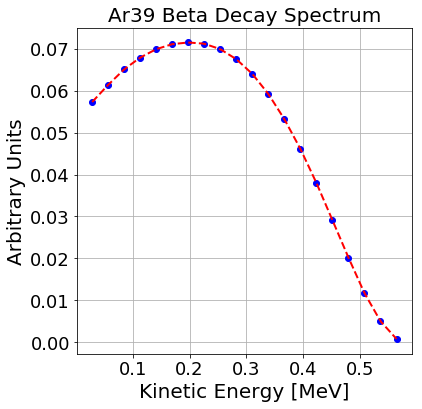

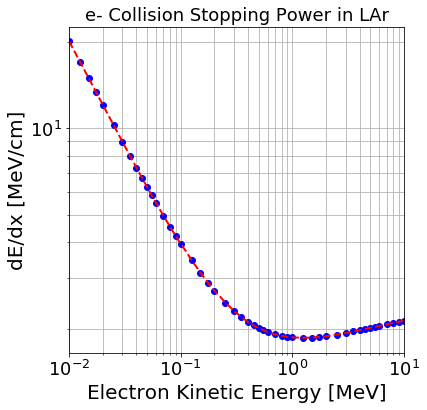

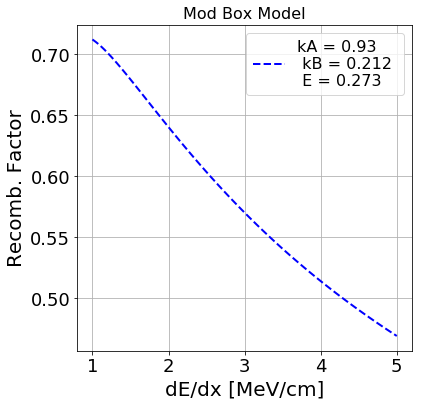

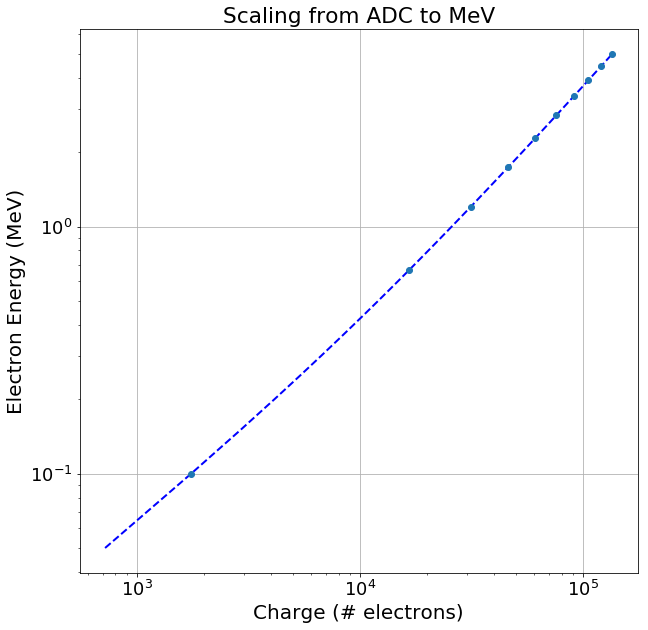

In [27]:
#*##########################################################################*#
#################**        Energy Reconstruction            **################
#*##########################################################################*#


# Argon properties
#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic',fill_value='extrapolate')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)


def E_recoY_off_run1_G10(df,gain):
    YQ_off_run1_G10  = df['sps_cluster_charge']
    QrecoY_off_run1_G10 = YQ_off_run1_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_G10 = fQ2E(QrecoY_off_run1_G10)
    return ErecoY_off_run1_G10

In [24]:
#*##########################################################################*#
##################**        Summing Techniques            **##################
#*##########################################################################*#

import time

def checkBlipSDev(df_to_test):
    df_to_test_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    goodEventNum = 0
    numEvents = 0
    for group_name, df_test_group in df_to_test_grouped:
        eventQs = []
        for q in df_test_group["sps_cluster_charge"]:
            eventQs.append(q)
        if len(eventQs) > 1:
            qStdev = np.std(eventQs)
            #print "Sum SPS q: ", np.sum(eventQs)," \tMean SPS q: ",np.mean(eventQs), "\tStdev q's: ",qStdev
            if qStdev > 1.01:
                goodEventNum += 1

        numEvents += 1
    print "Number events out of %s with variable SPS_q: "%(numEvents), goodEventNum
    print "Percent good events: ", 100*goodEventNum/numEvents

def DistTweenTwoPoints(memberA,memberB):
    xA = memberA["sps_x"]
    yA = memberA["sps_y"]
    zA = memberA["sps_z"]
    xB = memberB["sps_x"]
    yB = memberB["sps_y"]
    zB = memberB["sps_z"]
    deltaxSqd = ((xA-xB)**2)
    deltaySqd = ((yA-yB)**2)
    deltazSqd= ((zA-zB)**2)
    dist_from_A = np.sqrt(deltaxSqd+deltaySqd+deltazSqd)
    #print "x1,x2: (%s,%s)\ty1,y2: (%s,%s)\tz1,z2: (%s,%s)\t"%(xA,xB,yA,yB,zA,zB)
    #print "Distance: ",dist_from_A 
    return dist_from_A   

def DistTweenMaxNPoint(xA,yA,zA,memberB):
    xB = memberB["sps_x"]
    yB = memberB["sps_y"]
    zB = memberB["sps_z"]
    deltaxSqd = ((xA-xB)**2)
    deltaySqd = ((yA-yB)**2)
    deltazSqd= ((zA-zB)**2)
    dist_from_A = np.sqrt(deltaxSqd+deltaySqd+deltazSqd)
    #print "x1,x2: (%s,%s)\ty1,y2: (%s,%s)\tz1,z2: (%s,%s)\t"%(xA,xB,yA,yB,zA,zB)
    #print "Distance: ",dist_from_A 
    return dist_from_A  

def distancesFromPt(Loc,thisGroup):#distance between one blip and all other blips in event
    distances = []
    deltaxSqds = []
    deltaySqds = []
    deltazSqds = []
    xMaxSPSQ = Loc["sps_x"]
    yMaxSPSQ = Loc["sps_y"]
    zMaxSPSQ = Loc["sps_z"]
    #print "x: ",xMaxSPSQ," y: ",yMaxSPSQ," z: ",zMaxSPSQ," "
    #print xMaxSPSQ," ",yMaxSPSQ," ",zMaxSPSQ
    for x in thisGroup["sps_x"]:
        deltaxSqds.append((xMaxSPSQ-x)**2)
    for y in thisGroup["sps_y"]:
        deltaySqds.append((yMaxSPSQ-y)**2)
    for z in thisGroup["sps_z"]:
        deltazSqds.append((zMaxSPSQ-z)**2)
    for i in range(len(deltaxSqds)):
        dist_from_m = np.sqrt(deltaxSqds[i]+deltaySqds[i]+deltazSqds[i])
        #print "distfromm: ",dist_from_m
        if dist_from_m > 0.05: #If not the max point...
            distances.append(np.sqrt(deltaxSqds[i]+deltaySqds[i]+deltazSqds[i]))
        else:
            distances.append(50000)
    return distances

def distancesFromPtSlick(ptLoc,thisGroup,NumRows): #Slicker, but actually slower by factor of 10)
    f_distances = []
    for k in range(NumRows):
        rowk = thisGroup.iloc[k]
        dist_from_pt = np.sqrt((((ptLoc["sps_x"])-(rowk["sps_x"]))**2)+(((ptLoc["sps_y"])-(rowk["sps_y"]))**2)+(((ptLoc["sps_z"])-(rowk["sps_z"]))**2))
        if dist_from_pt > 0.05: #If not the max point...
            f_distances.append(dist_from_pt)
        else:
            f_distances.append(50000)

    return f_distances

#df_G10_off_cut_grouped = df_G10_off_cut.groupby(["N_Run","N_SubRun","N_Event"])
def groupDataEventsAndAddMaxSPS(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxq = df_group["sps_cluster_charge"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxq > -0.01:
            maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        #print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxSPSs.append(eventMaxq)
            qindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxq+SPS_qs_in_event[qindex])
            #print "Sum q's: ",summedCloseClusters
    return maxSPSs,summedCloseClusters


def groupDataEventsAndAddMaxSPSConditional(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxq = df_group["sps_cluster_charge"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxq > -0.01:
            maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxSPSs.append(eventMaxq)
            qindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxq+SPS_qs_in_event[qindex])
            #print "Sum q's: ",summedCloseClusters
    return maxSPSs,summedCloseClusters

def groupDataEventsAndAddArbSPSPlusNeighbor(thisDF): #Add the first SPS pt charge to neighby neighbors
    summedCloseClusters = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    ArbSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #print df_grouped.head()
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].first().count() #counting number of unique events
    j = 0
    for group_name, df_group in df_grouped:
        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        minq = min(SPS_qs_in_event)
        eventArbQ = SPS_qs_in_event[0]
        if eventArbQ > -0.01 and eventArbQ>minq and len(SPS_qs_in_event)>0:
            ArbLocation = df_group.iloc[0]
        elif eventArbQ > -0.01 and eventArbQ==minq and len(SPS_qs_in_event)>1:
            eventArbQ = SPS_qs_in_event[1]
            ArbLocation = df_group.iloc[1]
            #maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        distancesfromArb = distancesFromPt(ArbLocation,df_group)
        if len(distancesfromArb) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            for i in range(len(distancesfromArb)):#sort charges by proximity
                qlocs=[]
                qlocs.append([distancesfromArb[i],SPS_qs_in_event[i]])
                qlocs=np.array(qlocs)
                qlocs=qlocs[qlocs[:, 0].argsort()]
            summedQ = eventArbQ
            if qlocs[0,0] > 0 and qlocs[0,0] < 20:    #add to chosen blip if close enough, do same for next closest
                    summedQ += qlocs[0,1]
                    if len(qlocs) > 1:
                        if qlocs[1,0] > 0 and qlocs[1,0] < 40:
                            summedQ += qlocs[1,1]
            summedCloseClusters.append(summedQ)
            ArbSPSs.append(eventArbQ)
        #j+=1
        #if j > 7:
        #    break
    return ArbSPSs,summedCloseClusters

def returnMaxBlipEs(thisDF):
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMaxE = df_group["energy"].max()
        maxSPSs.append(eventMaxE)
    return maxSPSs

def plotMaxBlipLocs(thisDF):
    #print "working location"
    thisDF_cut = thisDF.query('energy>2.3' )
    fig = plt.figure(figsize=(12,7))
    plt.hist2d(thisDF_cut['sps_z'].values,thisDF_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
    plt.colorbar()
    plt.title("SPS, Events with E > 2.3 MeV")
    plt.xlabel('Z')
    plt.ylabel('Y')

plt.tight_layout()

def returnMaxBlipQs(thisDF):
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMaxq = df_group["sps_cluster_charge"].max()
        maxSPSs.append(eventMaxq)
    return maxSPSs

def returnMaxBlipsAndMultiplicityAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventMaxes = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                eventMaxes.append(curr_Max_E)
                multiplicity = 1
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 2700:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventMaxes, summedBlipEs,multiplicityInRadius


def returnMaxBlipsPlusNeighbors(thisDF,completeDetDF,summingRadius):
    numMaxPts = 4 #max number of clusters to sum
    
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    multiplicityInRadius = []
    
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 3
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0 and maxesUsed < numMaxPts:
                curr_Max_E = max(SPS_Es_in_event)
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxesUsed+=1
                multiplicity = 1
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
            elif maxesUsed == numMaxPts:
                break
                
        counter+=1
        if counter > 1600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius    

def returnMinBlipEs(thisDF):
    minSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of min SPS points: ", df_grouped["energy"].min().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMinE = df_group["energy"].min()
        if eventMinE < -10000.0 or eventMinE > 10000.0:
            continue
        minSPSs.append(eventMinE)
    return minSPSs

def returnMinBlipQs(thisDF):
    minSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of min SPS points: ", df_grouped["sps_cluster_charge"].min().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMinq = df_group["sps_cluster_charge"].min()
        minSPSs.append(eventMinq)
    return minSPSs

def returnMinBlipsAndMultiplicityAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventMins = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Min_E = min(SPS_Es_in_event)
                if curr_Min_E < -10000.0 or curr_Min_E > 10000.0:    #Exclude crazy outliers
                    break
                eventMins.append(curr_Min_E)
                multiplicity = 1
                minIndex = SPS_Es_in_event.index(curr_Min_E) 
                usedEnergies.append(curr_Min_E)
                SPS_Es_in_event.remove(curr_Min_E)
                minMember = df_group.iloc[minIndex] 
                blip_x,blip_y,blip_z = minMember["sps_x"],minMember["sps_y"],minMember["sps_z"]
                nRun,nSubRun,nEvent = minMember["N_Run"],minMember["N_SubRun"],minMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Min_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 2700:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventMins, summedBlipEs,multiplicityInRadius
    
def sumMaxClusterEnergiesWithNeighbors(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["energy"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxE = df_group["energy"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxE > -0.01:
            maxLocation = df_group.loc[df_group["energy"].idxmax()]
        else:
            continue

        SPS_Es_in_event = df_group["energy"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        #print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_Es_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxEs.append(eventMaxE)
            Eindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxE+SPS_Es_in_event[Eindex])
            #print "Sum q's: ",summedCloseClusters
    return maxEs,summedCloseClusters

def sumNearbyClusterEnergiesOld(thisDF):
    summedCloseClusters = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #print df_grouped.head()
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    j = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        minE = min(SPS_Es_in_event)
        eventE = SPS_Es_in_event[0]
        if eventE > -0.01 and eventE>minq and len(SPS_qs_in_event)>0:
            ArbLocation = df_group.iloc[0]
        elif eventE > -0.01 and eventE==minq and len(SPS_qs_in_event)>1:
            eventE = SPS_qs_in_event[1]
            ArbLocation = df_group.iloc[1]
            #maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        distancesfromArb = distancesFromPt(ArbLocation,df_group)
        if len(distancesfromArb) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            for i in range(len(distancesfromArb)):#sort charges by proximity
                qlocs=[]
                qlocs.append([distancesfromArb[i],SPS_qs_in_event[i]])
                qlocs=np.array(qlocs)
                qlocs=qlocs[qlocs[:, 0].argsort()]
            summedQ = eventE
            if qlocs[0,0] > 0 and qlocs[0,0] < 20:    #add to chosen blip if close enough, do same for next closest
                    summedQ += qlocs[0,1]
                    if len(qlocs) > 1:
                        if qlocs[1,0] > 0 and qlocs[1,0] < 40:
                            summedQ += qlocs[1,1]
            summedCloseClusters.append(summedQ)
            eventEs.append(eventE)
        #j+=1
        #if j > 7:
        #    break
    return eventEs,summedCloseClusters

def sumNearbyClusterEnergies(thisDF):
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        used_members = [] #stores indices of group member blips already summed up
        for j in range(len(df_group)):
            if j in used_members:#skips blips if already added
                continue
            else:
                used_members.append(j)
                #print df_group.iloc[j]
                member = df_group.iloc[j]        
                blipE = member["energy"]
                eventEs.append(blipE)
                nearbyESums = blipE
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        if k not in used_members:
                            nextMember = df_group.iloc[k]
                            thisDistance = DistTweenTwoPoints(member,nextMember)
                            if thisDistance > 0 and thisDistance < 30:  #If close to first blip, add the energy in, put on list of already added blips
                                nearBlipE = nextMember["energy"]
                                nearbyESums+= nearBlipE
                                eventEs.append(nearBlipE)
                                used_members.append(k)
                summedBlipEs.append(nearbyESums)
        counter+=1
        if counter > 1000:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs

def sumClusterEnergiesOnly(thisDF):
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        used_members = [] #stores indices of group member blips already summed up
        for j in range(len(df_group)):
            if j in used_members:#skips blips if already added
                continue
            else:
                used_members.append(j)
                #print df_group.iloc[j]
                member = df_group.iloc[j]        
                blipE = member["energy"]
                eventEs.append(blipE)
                nearbyESums = blipE
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        if k not in used_members:
                            nextMember = df_group.iloc[k]
                            thisDistance = DistTweenTwoPoints(member,nextMember)
                            if thisDistance > 0 and thisDistance < 40:  #If close to first blip, add the energy in, put on list of already added blips
                                nearBlipE = nextMember["energy"]
                                nearbyESums+= nearBlipE
                                eventEs.append(nearBlipE)
                                used_members.append(k)
                                
                                if (k+1) < len(df_group): #now check blips near this blip
                                    for l in range((k+1),len(df_group)):
                                        if l not in used_members:
                                            nextnextMember = df_group.iloc[l]
                                            thisDistance = DistTweenTwoPoints(nextMember,nextnextMember)
                                            if thisDistance > 0 and thisDistance < 40:  #If close to first blip, add the energy in, put on list of already added blips
                                                nearBlipE = nextnextMember["energy"]
                                                nearbyESums+= nearBlipE
                                                eventEs.append(nearBlipE)
                                                used_members.append(l)                     
                
                if nearbyESums > blipE:
                    summedBlipEs.append(nearbyESums)
                elif nearbyESums < blipE:
                    print "Energy summing error"
        counter+=1
        if counter > 150000:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs

def sumMaxAndNeighborsInRadius(thisDF,summingRadius): #sum blips within summing radius
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        print counter
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                #if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                #    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                eventEs.append(curr_Max_E)
                nearbyESums = curr_Max_E
                multiplicity = 1
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        nextMember = df_group.iloc[k]
                        nextE = nextMember["energy"]
                        if nextE in SPS_Es_in_event:
                            thisDistance = DistTweenMaxNPoint(blip_x,blip_y,blip_z,nextMember)
                            if thisDistance > 0.0 and thisDistance < summingRadius:  #If close to first blip, add the energy in, put on list of already added blips
                                multiplicity += 1
                                SPS_Es_in_event.remove(nextE)
                                nearbyESums+= nextE
                                eventEs.append(nextE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius

def sumMaxAndNeighborsInRadiusAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                eventEs.append(curr_Max_E)
                multiplicity = 1
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                            eventEs.append(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 2700:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius


def sumOnlyMultiBlipsEvents(thisDF,summingRadius): #sum blips within summing radius
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                #if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                #    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nearbyESums = curr_Max_E
                multiplicity = 1
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        nextMember = df_group.iloc[k]
                        nextE = nextMember["energy"]
                        if nextE in SPS_Es_in_event:
                            thisDistance = DistTweenMaxNPoint(blip_x,blip_y,blip_z,nextMember)
                            if thisDistance > 0.0 and thisDistance < summingRadius:  #If close to first blip, add the energy in, put on list of already added blips
                                multiplicity += 1
                                SPS_Es_in_event.remove(nextE)
                                nearbyESums+= nextE
                                eventEs.append(nextE)
                
                multiplicityInRadius.append(multiplicity)
                if multiplicity > 1:
                    summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return summedBlipEs,multiplicityInRadius



<Figure size 432x288 with 0 Axes>

In [30]:
#tmpgammafile='/uboone/app/users/rdorrill/uboonecode_v08_00_00_28/srcs/ubreco/ubreco/GammaCatcher/output.root'
#tmpgammafile='/uboone/app/users/rdorrill/uboonecode_v08_00_00_28/srcs/ubreco/ubreco/GammaCatcher/gaushitproximity.root'
#df_Gamma_Sim = pd.DataFrame( root2array(tmpgammafile,BRANCH_EVT) )
#tmpgammafile='/pnfs/uboone/scratch/users/rdorrill/v08_00_00_13/gen2reco/1024/low_MeV_gamma_v01/v04/31982081_1/prod_gamma_0.03-2.0GeV_isotropic_uboone_20200429T202901_gen_20200429T202927_g4_20200429T203513_detsim_20200429T204748_reco1_bda986cc-29fb-4153-af49-2175cbc29b93.root'
#tmpgammafile='/nashome/r/rdorrill/gammaSimStuff/prod_gamma_0.03-2.0GeV_isotropic_uboone_20200430T013918_gen_20200430T014252_g4_20200430T014425_detsim_20200430T014758_reco1_20200430T014904_reco2.root'
#tmpgammafile='/uboone/app/users/rdorrill/uboonecode_v08_00_00_28/srcs/ubreco/ubreco/GammaCatcher/simGammaFiles/gammacorrelation_hist.root'
#tmpgammafile='/uboone/data/users/rdorrill/gammaSimStuff/10keventspartial/gammacorrelation_hist.root'
#tmpgammafile='/uboone/app/users/rdorrill/gammaSimulation/testDir/gammacorrelation_hist.root'
#tmpgammafile='/uboone/data/users/rdorrill/gammaSimStuff/test/gammacorrelation_hist.root'

tmpgammafile1='/uboone/data/users/rdorrill/gammaSimStuff/gammasHepEVT/2020_06_09_tighter_g10_gammas/06_08_gammacorrelation_hist.root'
tmpgammafile2='/uboone/data/users/rdorrill/gammaSimStuff/gammasHepEVT/2020_06_09_tighter_g10_gammas/gammacorrelation_hist_06_09.root'
tmpgammafile3='/uboone/data/users/rdorrill/gammaSimStuff/gammasHepEVT/2020_06_07_tighter_g10_gammas/gammacorrelation_hist.root'

df_Gamma_Sim1 = pd.DataFrame( root2array(tmpgammafile1,BRANCH_SPS) )
df_Gamma_Sim_EV_br1 = pd.DataFrame( root2array(tmpgammafile1,BRANCH_EVT) )
df_Gamma_Sim1['energy']=E_recoY_off_run1_G10(df_Gamma_Sim1,238.4)
df_Gamma_Sim2 = pd.DataFrame( root2array(tmpgammafile2,BRANCH_SPS) )
df_Gamma_Sim_EV_br2 = pd.DataFrame( root2array(tmpgammafile2,BRANCH_EVT) )
df_Gamma_Sim2['energy']=E_recoY_off_run1_G10(df_Gamma_Sim2,238.4)
df_Gamma_Sim3 = pd.DataFrame( root2array(tmpgammafile3,BRANCH_SPS) )
df_Gamma_Sim_EV_br3 = pd.DataFrame( root2array(tmpgammafile3,BRANCH_EVT) )
df_Gamma_Sim3['energy']=E_recoY_off_run1_G10(df_Gamma_Sim3,238.4)

gammaDFs=[df_Gamma_Sim1,df_Gamma_Sim2,df_Gamma_Sim3]
gammaDFs_EB=[df_Gamma_Sim_EV_br1,df_Gamma_Sim_EV_br2,df_Gamma_Sim_EV_br3]
df_Gamma_Sim = pd.concat(gammaDFs)
df_Gamma_Sim_Event_Branch =  pd.concat(gammaDFs_EB)
'''

#mygammasimfile='/uboone/data/users/rdorrill/gammaSimStuff/gammasHepEVT/2020_06_07_tighter_g10_gammas/gammacorrelation_hist.root'
#mygammasimfile='/pnfs/uboone/scratch/users/rdorrill/06_08_2020_gammas/2020_06_08_tighter_g10_gammas_root/gammacorrelation_hist.root'
#df_Gamma_Sim = pd.DataFrame( root2array(mygammasimfile,BRANCH_SPS) ) 
#df_Gamma_Sim_Event_Branch = pd.DataFrame( root2array(mygammasimfile,BRANCH_EVT) ) 
#df_Gamma_Sim['energy']=E_recoY_off_run1_G10(df_Gamma_Sim,238.4)'''

#df_ryan_beamoff_lowthresh_30cmr1 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr['energy']=E_recoY_off_run1_G10(df_ryan_beamoff_lowthresh_30cmr,238.4)
df_ryan_beamoff_lowthresh_30cmr2 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr2,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr2_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr2,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr2['energy']=E_recoY_off_run1_G10(df_ryan_beamoff_lowthresh_30cmr2,238.4)

IOError: unable to access tree '/gammacorrelation/Event_Correlationtree' in /uboone/data/users/rdorrill/lowThreshold/08_18_2020_extbnb/gammacorrelation_hist_30_10_10.root

Error in <TFile::TFile>: file /uboone/data/users/rdorrill/lowThreshold/08_18_2020_extbnb/gammacorrelation_hist_30_10_10.root does not exist


In [12]:
#*##########################################################################*#
######################**        Data Here             **######################
#*##########################################################################*#

df_Event_beam_on = pd.DataFrame( root2array( myfile_beam_on,BRANCH_EVT) )
df_Sps_beam_on = pd.DataFrame( root2array( myfile_beam_on,BRANCH_SPS) )

#df_Event_beam_on = df_Event_beam_on.query(NUSELECTION)
#df_Sps_beam_on = df_Sps_beam_on.query(NUSELECTION)

#df_Event_beam_on_cone = pd.DataFrame( root2array( myfile_beam_on_cone,BRANCH_EVT) )
df_Sps_beam_on_cone = pd.DataFrame( root2array( myfile_beam_on_cone,BRANCH_SPS) )

#df_Event_beam_on_cone = df_Event_beam_on_cone.query(NUSELECTION)
#df_Sps_beam_on_cone = df_Sps_beam_on_cone.query(NUSELECTION)

df_Event_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_EVT) )
df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )

#df_Event_beam_off_cone = df_Event_beam_off_cone.query(NUSELECTION)
#df_Sps_beam_off_cone = df_Sps_beam_off_cone.query(NUSELECTION)
#df_Sps_beam_off_cone_rand = df_Sps_beam_off_cone.query(NUSELECTION_rand)
#df_Event_beam_off_cone_rand = df_Event_beam_off_cone.query(NUSELECTION_rand)

df_Event_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_EVT) )
df_Sps_beam_off = pd.DataFrame( root2array( myfile_beam_off,BRANCH_SPS) )

#df_Gamma_Sim = pd.DataFrame( root2array(mygammasimfile,BRANCH_SPS) )

#df_Event_beam_off = df_Event_beam_off.query(NUSELECTION)
#df_Sps_beam_off = df_Sps_beam_off.query(NUSELECTION)
#df_Sps_beam_off_rand = df_Sps_beam_off.query(NUSELECTION_rand)
#df_Event_beam_off_rand = df_Event_beam_off.query(NUSELECTION_rand)

#df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
#df_rest_det_off_cut=df_Sps_beam_off_cone.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
#df_G10_off_complementary=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
#df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )

#cNoNu = "neutrinos == 0"

#df_Sps_beam_off_no_nu_no_cone = df_Sps_beam_off.query(cNoNu)
#df_Sps_beam_off_no_nu = df_Sps_beam_off_cone.query(cNoNu)
#df_G10_off_cut=df_Sps_beam_off_no_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
#df_rest_det_off_cut=df_Sps_beam_off_no_nu.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
#df_G10_off_complementary=df_Sps_beam_off_no_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')

cNu = 'neutrinos > 0 and neutrinoshowers==0 and cosmic_trk_50==0'

df_Sps_beam_off_yes_nu = df_Sps_beam_off_cone.query(cNu)
df_G10_off_cut_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_cut_yes_nu=df_Sps_beam_off_yes_nu.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
#df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
df_inner_det_G10_equivalent_Vol_cut=df_Sps_beam_off_yes_nu.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')



#cNu = "neutrinos > 0"
#df_Sps_beam_on_yes_nu_yes_cone = df_Sps_beam_on_cone.query(cNu)

#cNoNu = "neutrinos == 0"
#df_Sps_beam_on_no_nu_yes_cone = ddf_Sps_beam_on_cone.query(cNu)



NameError: name 'myfile_beam_on' is not defined

In [ ]:
############# Gamma Histograms ##############
print df_Gamma_Sim['N_Event'].nunique()
gamma_q_vals = df_Gamma_Sim['sps_cluster_charge']#.sample(104039)#.sample(95000)
gamma_E_vals = df_Gamma_Sim['energy']

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,500,120)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(gamma_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Gamma Sim',normed=False)
plt.title("Spacepoint charge, Gamma Sim")
plt.xlabel('SpacePoint charge (ADC Counts)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

######### SPS / Blip Energy Hisograms ############
BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
gamma_hist,b1,p1 = plt.hist(df_Gamma_Sim['energy'],histtype='step',bins = BINS,lw=2,label='SPS Energies From Gammas Sim',color='forestgreen',normed=False)
plt.title("Spacepoint Energy in Gamma Sim")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_t_values = df_Gamma_Sim_Event_Branch['evttime']
print "Total number of energies = ", len(gamma_E_vals), " of ", len(evt_t_values), " events."
df_Gamma_Sim_Event_Branch.head()


In [ ]:
############# Low Thresh, 30cm Histograms ##############
print df_ryan_beamoff_lowthresh_30cmr['N_Event'].nunique()
df_ryan_beamoff_lowthresh_30cmr_q_vals = df_ryan_beamoff_lowthresh_30cmr['sps_cluster_charge']#.sample(104039)#.sample(95000)
df_ryan_beamoff_lowthresh_30cmr_E_vals = df_ryan_beamoff_lowthresh_30cmr['energy']

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,500,120)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge From Low Thresh, 30 cm cut',normed=False)
offhist2,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam OFF',normed=False)
onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam ON',normed=False)
plt.title("Spacepoint charge, Low Thresh")
plt.xlabel('SpacePoint charge (ADC Counts)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

######### SPS / Blip Energy Hisograms ############
BINS = np.linspace(0,3.1,120)
fig = plt.figure(figsize=(12,7))

off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm cut',color='blue',normed=False)
lowthresh_hist,b1,p1 = plt.hist(off_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies, old data, 15 cm cut',color='forestgreen',normed=False)

plt.title("Spacepoint Energy in From Low Thresh, 30 cm cut")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_t_values = df_Gamma_Sim_Event_Branch['evttime']
print "Total number of energies = ", len(gamma_E_vals), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr_EVT.head()





In [ ]:
#########   2D Region Plot for Gamma Sim   #########  

fig = plt.figure(figsize=(12,7))
plt.hist2d(df_Gamma_Sim['sps_z'].values,df_Gamma_Sim['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Gamma Sim Events")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

print "2D gamma plot done"

In [ ]:


#########    Summing Max Point and neighbors in 20cm   #########  
Es_GammaSim,allsummedClusterEs_GammaSim,multiplicities_GammaSim = sumMaxAndNeighborsInRadius(df_Gamma_Sim,20.0)
Es_GammaSim_onlymultiblip,mltpcts = sumOnlyMultiBlipsEvents(df_Gamma_Sim,20.0)
print len(Es_GammaSim_onlymultiblip)," events with mtultiple blips."

#########  Latest Summing Technique -- but only the top four max blips in an event #########
#summedMaxClusterEs_GammaSim,max_multiplicities_GammaSim = returnMaxBlipsPlusNeighbors(df_Gamma_Sim,df_Sps_beam_off_yes_nu_charge,20.0)


######### Multiplicity distributions -- Multiplicity of blips in 20cm bubbles ############

BINS = np.linspace(0,10,11)
fig = plt.figure(figsize=(12,7))
plt.hist(multiplicities_GammaSim,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity',color='CornflowerBlue',fill=True)

plt.title("Gamma Sim Blip Multiplicity in 20cm on Max Pt.")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,2500)
#plt.yscale('log')

print np.mean(multiplicities_GammaSim)

############### Plot Max Q's ############### 

BINS = np.linspace(0,1000,140)
maxQs_GammaSim = returnMaxBlipQs(df_Gamma_Sim)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxQs_GammaSim,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')
plt.title("Max Gamma Blip Q per event")
plt.xlabel("Max Gamma Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

BINS = np.linspace(0,500,120)
maxQs_GammaSim = returnMaxBlipQs(df_Gamma_Sim)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxQs_GammaSim,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')
plt.title("Max Gamma Blip Q per event")
plt.xlabel("Max Gamma Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


############### Plot Max E's ############### 

BINS = np.linspace(0,3,100)
maxEs_GammaSim = returnMaxBlipEs(df_Gamma_Sim)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_GammaSim,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
plt.title("Max Gamma Blip E per event (Simulated)")
plt.xlabel("Max Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))


BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_GammaSim,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
hg102,bg102,a2 = plt.hist(Es_GammaSim_onlymultiblip,histtype='step',bins = BINS,lw=2,label='Summed multi-blips',color='orange')
plt.title("Max Gamma Blip E per event\nSummed multi-blip events (orange)")
plt.xlabel("Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

BINS2 = np.linspace(0,3.1,75)

fig = plt.figure(figsize=(12,7))
hg102,bg102,a2 = plt.hist(Es_GammaSim_onlymultiblip,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='orange')
plt.title("Summed Blips, only multi-blip events")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))



Low Thresh 30cm plot done
Number of events with energies:  1103


KeyboardInterrupt: 

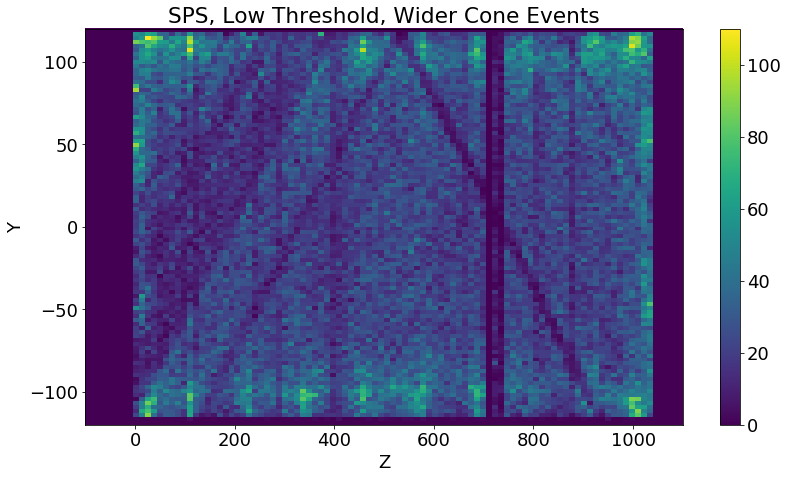

In [10]:
############################################ Low Threshold ############################################

#df_ryan_beamoff_lowthresh_30cmr

#########   2D Region Plot for Low Thresh Wider Cones   #########  

fig = plt.figure(figsize=(12,7))
plt.hist2d(df_ryan_beamoff_lowthresh_30cmr['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Low Threshold, Wider Cone Events")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

print "Low Thresh 30cm plot done"

#########    Summing Max Point and neighbors in 20cm   #########
LT1_eventMaxes, LT1_summedBlipEs,LT1_multiplicityInRadius = returnMaxBlipsAndMultiplicityAllData(df_ryan_beamoff_lowthresh_30cmr,completeDetDF,20.0)
#Es_LowThresh30cm,allsummedClusterEs_LowThresh30cm,multiplicities_LowThresh30cm = sumMaxAndNeighborsInRadius(df_ryan_beamoff_lowthresh_30cmr,20.0)
#Es_LowThresh30cm_onlymultiblip,mltpcts = sumOnlyMultiBlipsEvents(df_ryan_beamoff_lowthresh_30cmr,20.0)
#print len(Es_LowThresh30cm_onlymultiblip)," events with mtultiple blips."

#########  Latest Summing Technique -- but only the top four max blips in an event #########
#summedMaxClusterEs_GammaSim,max_multiplicities_GammaSim = returnMaxBlipsPlusNeighbors(df_Gamma_Sim,df_Sps_beam_off_yes_nu_charge,20.0)


######### Multiplicity distributions -- Multiplicity of blips in 20cm bubbles ############

BINS = np.linspace(0,10,11)
fig = plt.figure(figsize=(12,7))
plt.hist(LT1_multiplicityInRadius,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity, Low Thresh 30cm',color='CornflowerBlue',fill=True)

plt.title("Low Thresh (30cm cut), Blip Multiplicity in 20cm on Max Pt.")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,2500)
#plt.yscale('log')

print np.mean(multiplicities_GammaSim)

############### Plot Max Q's ############### 

BINS = np.linspace(0,1000,140)
maxQs_LowThresh30cm = returnMaxBlipQs(df_ryan_beamoff_lowthresh_30cmr)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxQs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')
plt.title("Max Gamma Blip Q per event, Low Thresh")
plt.xlabel("Max Gamma Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

BINS = np.linspace(0,500,120)
maxQs_LowThresh30cm = returnMaxBlipQs(df_ryan_beamoff_lowthresh_30cmr)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxQs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')
plt.title("Max Gamma Blip Q per event")
plt.xlabel("Max Gamma Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


############### Plot Max E's ############### 

BINS = np.linspace(0,3,100)
maxEs_LowThresh30cm = returnMaxBlipEs(df_ryan_beamoff_lowthresh_30cmr)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
plt.title("Max Gamma Blip E per event (Low Thresh, 30cm cut)")
plt.xlabel("Max Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))


BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
hg102,bg102,a2 = plt.hist(Es_LowThresh30cm_onlymultiblip,histtype='step',bins = BINS,lw=2,label='Summed multi-blips',color='orange')
plt.title("Max Gamma Blip E per event\nSummed multi-blip events (orange)")
plt.xlabel("Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

BINS2 = np.linspace(0,3.1,75)

fig = plt.figure(figsize=(12,7))
hg102,bg102,a2 = plt.hist(Es_LowThresh30cm_onlymultiblip,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='orange')
plt.title("Summed Blips, only multi-blip events")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

In [10]:
df_Gamma_Sim.head()

evttime       sps_x       sps_y       sps_z     distance  \
0  370585839  240.383347   94.414139  998.099976  1030.971263   
1  370585839  242.444153  -67.532608  612.762634   662.433292   
2  370585839  251.876038  -89.269844  231.899994   353.819517   
3  370585839   40.082394 -114.730995   81.000000   146.050675   
4  370585839    0.539083  102.814590  460.200012   471.545525   

   sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  muon_px  \
0           65.266182        1      1         1       0.0  ...      0.0   
1           90.373260        6      1         1       0.0  ...      0.0   
2           51.605995       15      1         1       0.0  ...      0.0   
3           43.565536       24      1         1       0.0  ...      0.0   
4           65.019218       31      1         1       0.0  ...      0.0   

        muon_py  muon_pz  maxTrkLen  tracklength  distance_nu_smallest  \
0  4.946584e-43      0.0        0.0          0.0          1.000000e+10   
1  4.946584e-43      0.0        0.0          0.0          1.000000e+10   
2  4.946584e-43      0.0        0.0          0.0          1.000000e+10   
3  4.946584e-43      0.0        0.0          0.0          1.000000e+10   
4  4.946584e-43      0.0        0.0          0.0          1.000000e+10   

   cosmic_trk_50  pointdistance_trk_smallest  distance_trk_smallest    energy  
0              0                         0.0           1.000000e+10  0.629270  
1              0                         0.0           1.000000e+10  0.847457  
2              0                         0.0           1.000000e+10  0.509702  
3              0                         0.0           1.000000e+10  0.438777  
4              0                         0.0           1.000000e+10  0.627115  

[5 rows x 29 columns]

sps_x max:  254.67250061035156      min:  -0.04793769493699074
len:  5685
2047
len:  981


<Figure size 864x504 with 0 Axes>

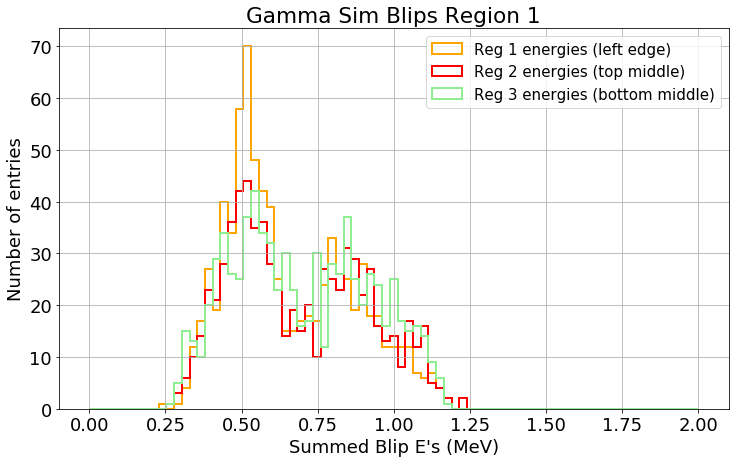

<Figure size 864x504 with 0 Axes>

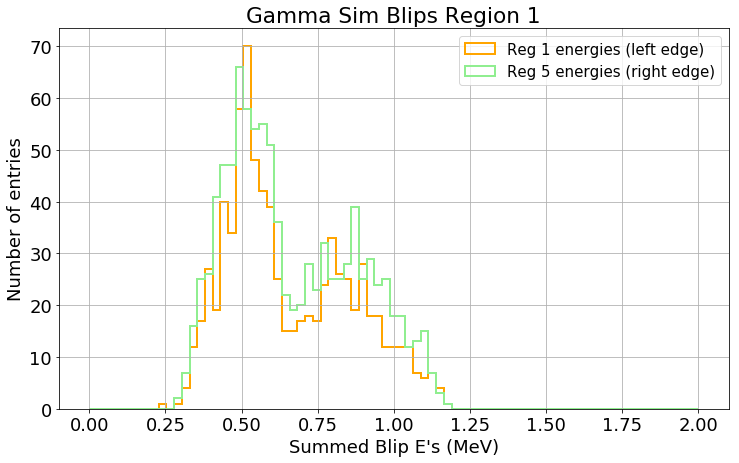

<Figure size 864x504 with 0 Axes>

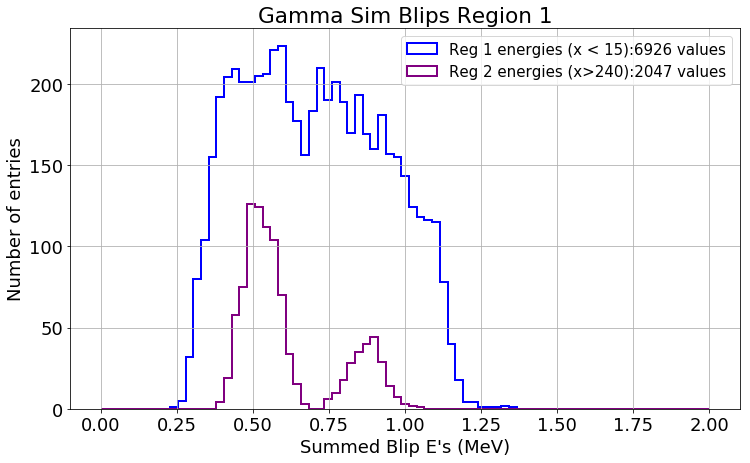

In [11]:
##########     Gamma Energies by Region / Locations   ######### : 
print "sps_x max: ",df_Gamma_Sim['sps_x'].max(), "     min: ",df_Gamma_Sim['sps_x'].min()
df_Gamma_Sim_g10_region1=df_Gamma_Sim.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50))')
df_Gamma_Sim_g10_region2=df_Gamma_Sim.query('(sps_y > 90.0) and ((sps_z>400 and sps_z<615))')
df_Gamma_Sim_g10_region3=df_Gamma_Sim.query('(sps_y < -90.0) and ((sps_z>400 and sps_z<615))')
df_Gamma_Sim_g10_region4=df_Gamma_Sim.query('(sps_y > 20.0 and sps_y < 75.0)')
df_Gamma_Sim_g10_region5=df_Gamma_Sim.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,2.0,80)

fig = plt.figure(figsize=(12,7))
plt.hist(df_Gamma_Sim_g10_region1['energy'],histtype='step',bins = BINS,lw=2,label='Reg 1 energies (left edge)',color='orange')
plt.hist(df_Gamma_Sim_g10_region2['energy'],histtype='step',bins = BINS,lw=2,label='Reg 2 energies (top middle)',color='red')
plt.hist(df_Gamma_Sim_g10_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("Gamma Sim Blips Region 1")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

fig = plt.figure(figsize=(12,7))
plt.hist(df_Gamma_Sim_g10_region1['energy'],histtype='step',bins = BINS,lw=2,label='Reg 1 energies (left edge)',color='orange')
plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 5 energies (right edge)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("Gamma Sim Blips Region 1")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

######### Checking X ######### 
xlow_condition='(sps_x < 15.0) and (sps_x > 1.0)'
xhigh_condition='(sps_x > 240.0) and (sps_x < 249.0)'

df_Gamma_Sim_g10_region_xlow=df_Gamma_Sim.query(xlow_condition)
df_Gamma_Sim_g10_region_xhigh=df_Gamma_Sim.query(xhigh_condition)
xlow_energies_sim = df_Gamma_Sim_g10_region_xlow['energy']
xhigh_energies_sim = df_Gamma_Sim_g10_region_xhigh['energy']
print "len: ",len(xlow_energies_sim )
print df_Gamma_Sim_g10_region_xhigh.last_valid_index()

#print xlow_energies
print "len: ",len(xhigh_energies_sim)

fig = plt.figure(figsize=(12,7))
plt.hist(xlow_energies_sim,histtype='step',bins = BINS,lw=2,label='Reg 1 energies (x < 15):%s values'%(6926),color='blue')
plt.hist(xhigh_energies_sim,histtype='step',bins = BINS,lw=2,label='Reg 2 energies (x>240):%s values'%(2047),color='purple')
#plt.hist(df_Gamma_Sim_g10_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
plt.title("Gamma Sim Blips Region 1")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

In [12]:
#print Es_GammaSim_onlymultiblip

In [13]:
print len(multiplicities_GammaSim)
print len(gamma_q_vals)
print len(maxQs_GammaSim)

11641
11907
9945


In [28]:
#df_sps_charge_off_run1_G10=df_G10_off_run1.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
#df_sps_charge_off_run1_G10['energy']=E_recoY_off_run1_G10(df_sps_charge_off_run1_G10,238.4)

#Need some cuts because some values will fall outside the interpolation range
df_Sps_beam_off_yes_nu_charge=df_Sps_beam_off_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_G10_off_cut_yes_nu_charge=df_G10_off_cut_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
#df_rest_det_off_cut_yes_nu_charge=df_rest_det_off_cut_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_G10_off_complementary_yes_nu_charge=df_G10_off_complementary_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_inner_det_G10_equivalent_Vol_cut_charge=df_inner_det_G10_equivalent_Vol_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')


df_Sps_beam_off_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_Sps_beam_off_yes_nu_charge,238.4)
df_G10_off_cut_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_G10_off_cut_yes_nu_charge,238.4)
#df_rest_det_off_cut_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_rest_det_off_cut_yes_nu_charge,238.4)
df_G10_off_complementary_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_G10_off_complementary_yes_nu_charge,238.4)
df_inner_det_G10_equivalent_Vol_cut_charge['energy']=E_recoY_off_run1_G10(df_inner_det_G10_equivalent_Vol_cut_charge,238.4)


/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

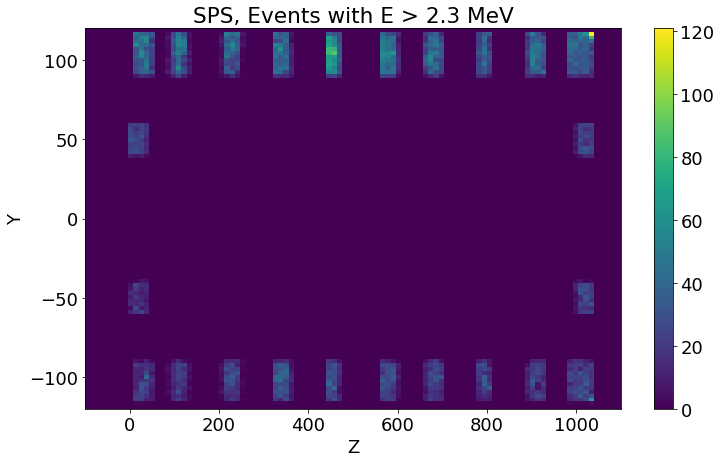

In [16]:
#df_group.iloc[0]
df_Sps_beam_off_yes_nu.iloc[1]

#df_inner_det_G10_equivalent_Vol_cut=df_Sps_beam_off_yes_nu.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>300 and sps_z<749.6) ')
#df_inner_det_G10_equivalent_Vol_cut_charge=df_inner_det_G10_equivalent_Vol_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
#df_inner_det_G10_equivalent_Vol_cut_charge['energy']=E_recoY_off_run1_G10(df_inner_det_G10_equivalent_Vol_cut_charge,238.4)
plotMaxBlipLocs(df_G10_off_cut_yes_nu_charge)

sps_x max:  254.67250061035156      min:  -0.04793769493699074
len:  37115
2047
len:  23510
len:  23510


<Figure size 864x504 with 0 Axes>

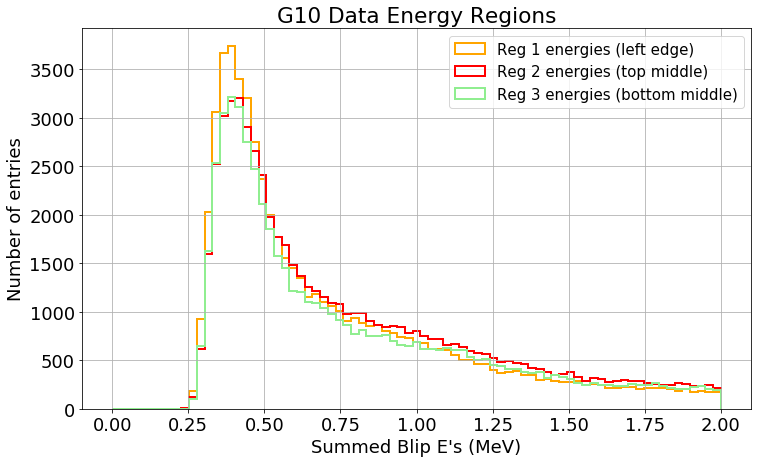

<Figure size 864x504 with 0 Axes>

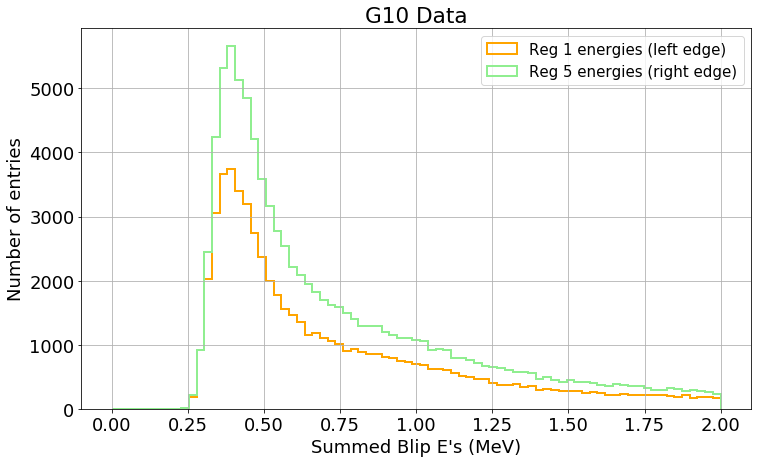

<Figure size 864x504 with 0 Axes>

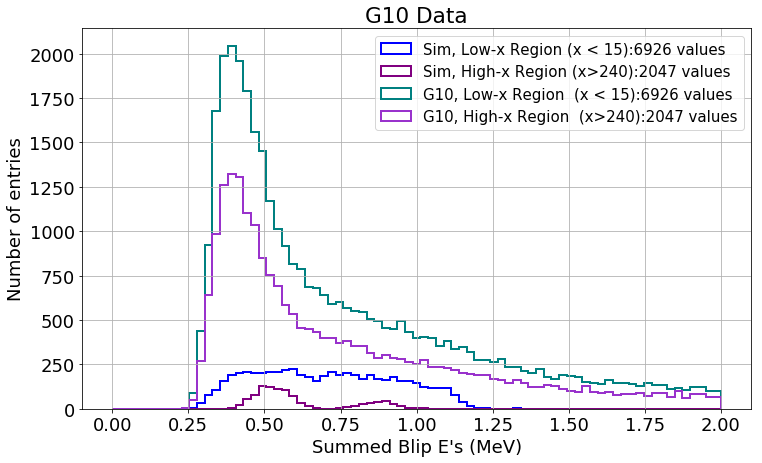

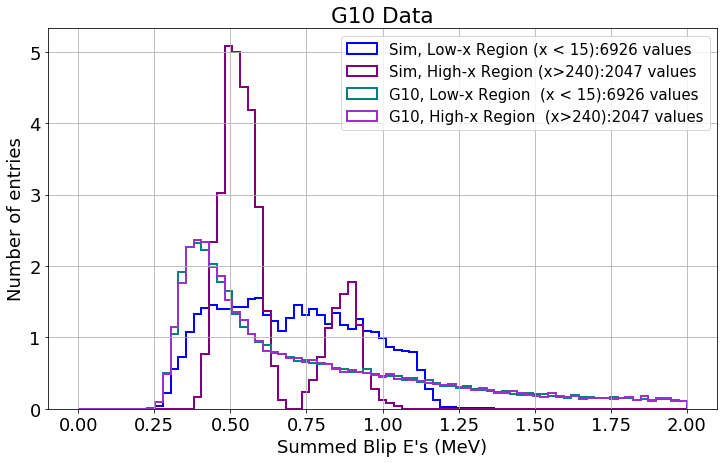

In [17]:
#df_G10_off_cut_yes_nu_charge
#df_G10_off_complementary_yes_nu_charge
#df_inner_det_G10_equivalent_Vol_cut_charge

##########     Regular Data Energies by Region / Locations   ######### : 
print "sps_x max: ",df_Gamma_Sim['sps_x'].max(), "     min: ",df_Gamma_Sim['sps_x'].min()
df_G10_off_cut_yes_nu_charge_region1=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50))')
df_G10_off_cut_yes_nu_charge_region2=df_G10_off_cut_yes_nu_charge.query('(sps_y > 90.0) and ((sps_z>400 and sps_z<615))')
df_G10_off_cut_yes_nu_charge_region3=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0) and ((sps_z>400 and sps_z<615))')
df_G10_off_cut_yes_nu_charge_region4=df_G10_off_cut_yes_nu_charge.query('(sps_y > 20.0 and sps_y < 75.0)')
df_G10_off_cut_yes_nu_charge_region5=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,2.0,80)

fig = plt.figure(figsize=(12,7))
plt.hist(df_G10_off_cut_yes_nu_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='Reg 1 energies (left edge)',color='orange')
plt.hist(df_G10_off_cut_yes_nu_charge_region2['energy'],histtype='step',bins = BINS,lw=2,label='Reg 2 energies (top middle)',color='red')
plt.hist(df_G10_off_cut_yes_nu_charge_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("G10 Data Energy Regions")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

fig = plt.figure(figsize=(12,7))
plt.hist(df_G10_off_cut_yes_nu_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='Reg 1 energies (left edge)',color='orange')
plt.hist(df_G10_off_cut_yes_nu_charge_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 5 energies (right edge)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("G10 Data")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

######### Checking X #########

df_G10_off_cut_yes_nu_charge_xlow=df_G10_off_cut_yes_nu_charge.query(xlow_condition)
df_G10_off_cut_yes_nu_charge_xhigh=df_G10_off_cut_yes_nu_charge.query(xhigh_condition)
xlow_energies_g10 = df_G10_off_cut_yes_nu_charge_xlow['energy']
xhigh_energies_g10 = df_G10_off_cut_yes_nu_charge_xhigh['energy']
print "len: ",len(xlow_energies_g10)
print df_Gamma_Sim_g10_region_xhigh.last_valid_index()

#print xlow_energies
print "len: ",len(xhigh_energies_g10)

fig = plt.figure(figsize=(12,7))
plt.hist(xlow_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim, Low-x Region (x < 15):%s values'%(6926),color='blue')
plt.hist(xhigh_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim, High-x Region (x>240):%s values'%(2047),color='purple')
plt.hist(xlow_energies_g10,histtype='step',bins = BINS,lw=2,label='G10, Low-x Region  (x < 15):%s values'%(6926),color='teal')
plt.hist(xhigh_energies_g10,histtype='step',bins = BINS,lw=2,label='G10, High-x Region  (x>240):%s values'%(2047),color='darkorchid',normed=False)
#plt.hist(df_Gamma_Sim_g10_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
plt.title("G10 Data")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#print xlow_energies
print "len: ",len(xhigh_energies_g10)

fig = plt.figure(figsize=(12,7))
plt.hist(xlow_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim, Low-x Region (x < 15):%s values'%(6926),color='blue',normed=True)
plt.hist(xhigh_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim, High-x Region (x>240):%s values'%(2047),color='purple',normed=True)
plt.hist(xlow_energies_g10,histtype='step',bins = BINS,lw=2,label='G10, Low-x Region  (x < 15):%s values'%(6926),color='teal',normed=True)
plt.hist(xhigh_energies_g10,histtype='step',bins = BINS,lw=2,label='G10, High-x Region  (x>240):%s values'%(2047),color='darkorchid',normed=True)
#plt.hist(df_Gamma_Sim_g10_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
plt.title("G10 Data")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


In [14]:
df_Sps_beam_off_yes_nu.head()

print "x: ",df_Sps_beam_off_yes_nu["sps_x"].min(), " ",df_Sps_beam_off_yes_nu["sps_x"].max()
print "y: ",df_Sps_beam_off_yes_nu["sps_y"].min(), " ",df_Sps_beam_off_yes_nu["sps_y"].max()
print "z: ",df_Sps_beam_off_yes_nu["sps_z"].min(), " ",df_Sps_beam_off_yes_nu["sps_z"].max()
print "x: ",df_Sps_beam_on_cone["sps_x"].min(), " ",df_Sps_beam_on_cone["sps_x"].max()
print "y: ",df_Sps_beam_on_cone["sps_y"].min(), " ",df_Sps_beam_on_cone["sps_y"].max()
print "z: ",df_Sps_beam_on_cone["sps_z"].min(), " ",df_Sps_beam_on_cone["sps_z"].max()


x:  -1.7544193267822266   257.3555603027344
y:  -115.33721160888672   117.27721405029297
z:  0.0   1036.5
x:  -1.755685806274414   257.3555603027344
y:  -115.33721160888672   117.27721405029297
z:  0.0   1036.5


28052
11395


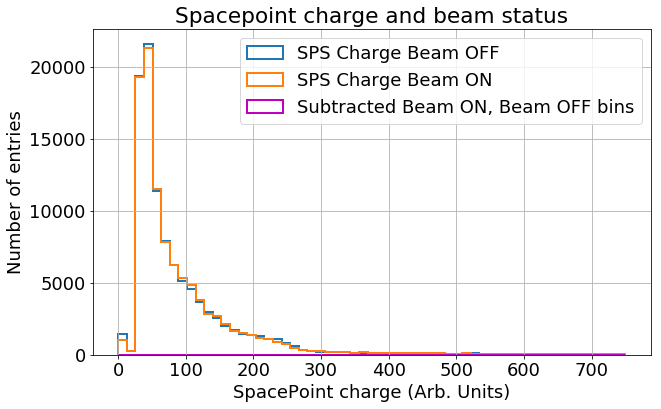

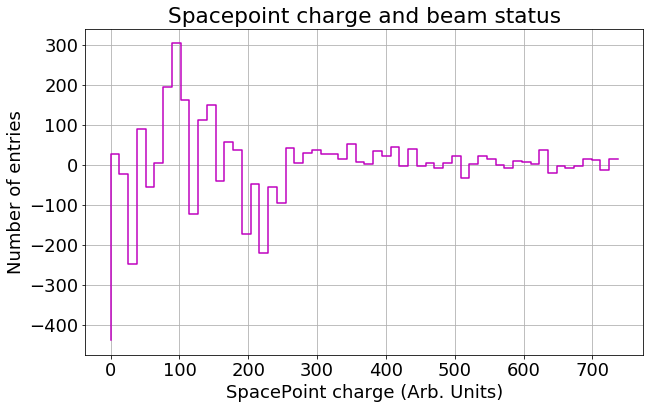

In [18]:
#Ryan - next goal - Subtraction of these two sets should be the neutrino energy spectrum
#Can think about histogramming the blips energies for on data, then off data, then subtracting
#off_q_vals = df_Sps_beam_off['sps_cluster_charge'].values
#on_q_vals = df_Sps_beam_on['sps_cluster_charge'].values
#print off_q_vals.size
#print on_q_vals.size
#print df_Sps_beam_off.count()
print df_Sps_beam_off['N_Event'].nunique()
#print df_Sps_beam_on.count()
print df_Sps_beam_on['N_Event'].nunique()
#df_Sps_beam_off_samp=df_Sps_beam_off.sample(104039)

off_q_vals = df_Sps_beam_off['sps_cluster_charge'].sample(104039)#.sample(95000)
on_q_vals = df_Sps_beam_on['sps_cluster_charge'].sample(104039)

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,750,60)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam OFF',normed=False)
onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam ON',normed=False)
hist3 = onhist-offhist
plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted Beam ON, Beam OFF bins',color='m',normed=False)
plt.title("Spacepoint charge and beam status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

#Looks weird... subtracting hist directly not necessarily smart...
fig = plt.figure(figsize=(10,6))
#plt.hist(hist3,histtype='step',bins = BINS,lw=2,label='Subtracted Beam ON, Beam OFF bins',color='m')
b3 = np.delete(BINS,-1)
plt.step(b3,hist3,color='m')
plt.title("Spacepoint charge and beam status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()

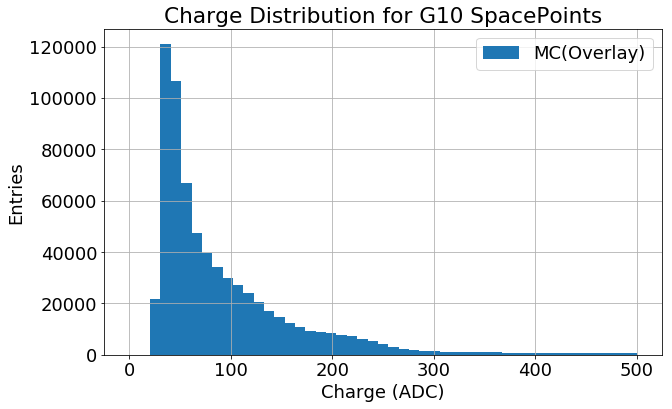

182834
607615


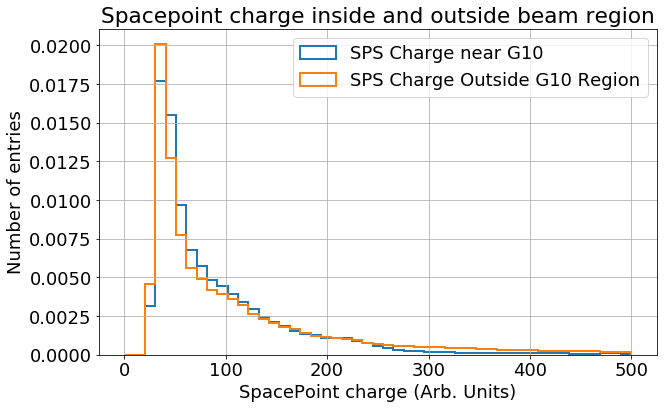

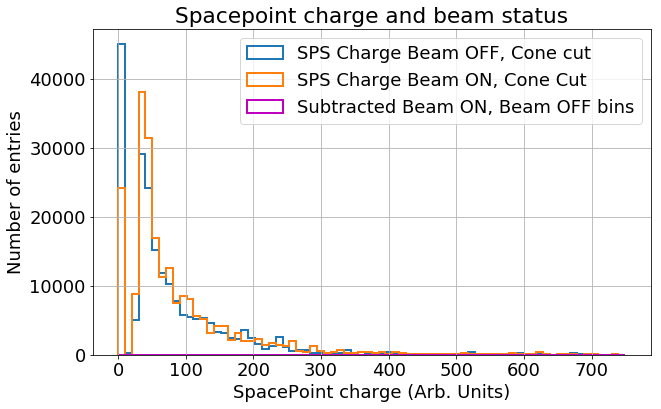

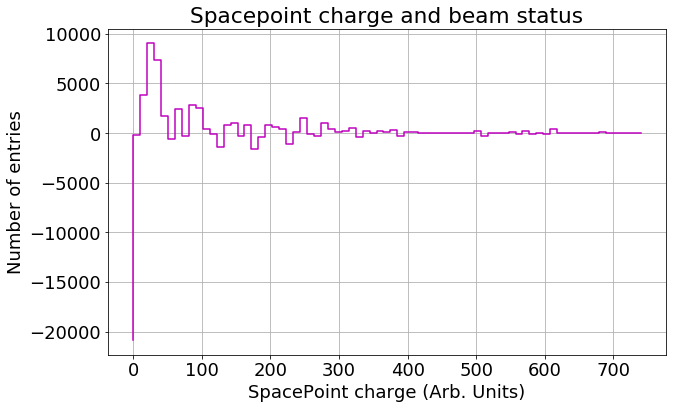

In [19]:
#Ryan
#Then - - Graph highest E blip, draw r around it in ± 10cm or 20 cm --> Should take you from a spectrum of e- to the gamma that scattered
#Can do in G10 region, then outside, then subtract the two
#Same # of triggers or events should scale the histogram numbers properly -- more points total in on beam data

q_G10_cuts=df_G10_off_cut_yes_nu['sps_cluster_charge'].sample(90734)
q_outside_G10_reg=df_inner_det_G10_equivalent_Vol_cut_charge['sps_cluster_charge'].sample(90734)
#print q_G10_cuts.size
#print q_outside_G10_reg.size

#Maybe use this, which is by Avi
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,500,50)
plt.hist(df_G10_off_cut_yes_nu['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='MC(Overlay)')
plt.title("Charge Distribution for G10 SpacePoints")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

#Ryan attempts -- put charge distro in G10 region, followed by distro outside G10 region, on same plot:

#BINS = np.linspace(0,750,60)
fig = plt.figure(figsize=(10,6))
G10hist,b1,p1 = plt.hist(q_G10_cuts,histtype='step',bins = BINS,lw=2,label='SPS Charge near G10',normed=True)
outsideG10hist,b2,p2 = plt.hist(q_outside_G10_reg,histtype='step',bins = BINS,lw=2,label='SPS Charge Outside G10 Region',normed=True)
#hist3 = G10hist-outsideG10hist
#plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted G10, non-G10 regions',color='m',normed=True)
plt.title("Spacepoint charge inside and outside beam region")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

########################
####      Cell      ####
########################


#Subtracted Histograms -- Beam on, off, cone

#df_Sps_beam_on_cone
#df_Sps_beam_off_cone
#df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count()
print df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_Sps_beam_off_cone.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
#df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).head(50) #this gives 7 rows per event... I want 7 events
df_Sps_beam_on_cone_4900_Events = df_Sps_beam_on_cone[df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 4919]
df_Sps_beam_off_cone_4900_Events = df_Sps_beam_off_cone[df_Sps_beam_off_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 4919]

#df10_Events = df_Sps_beam_on_cone[df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup < 10]
#print (df10_Events)
#sorteddf = df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"]).count()
#sorteddf.head()
on_q_vals = df_Sps_beam_on_cone_4900_Events['sps_cluster_charge']
off_q_vals = df_Sps_beam_off_cone_4900_Events['sps_cluster_charge']

BINS = np.linspace(0,750,75)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam OFF, Cone cut',normed=False)
onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam ON, Cone Cut',normed=False)
hist3 = onhist-offhist
plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted Beam ON, Beam OFF bins',color='m',normed=False)
plt.title("Spacepoint charge and beam status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

#Looks weird... subtracting hist directly not necessarily smart...
fig = plt.figure(figsize=(10,6))
#plt.hist(hist3,histtype='step',bins = BINS,lw=2,label='Subtracted Beam ON, Beam OFF bins',color='m')
b3 = np.delete(BINS,-1)
plt.step(b3,hist3,color='m')
plt.title("Spacepoint charge and beam status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()

182785
814918


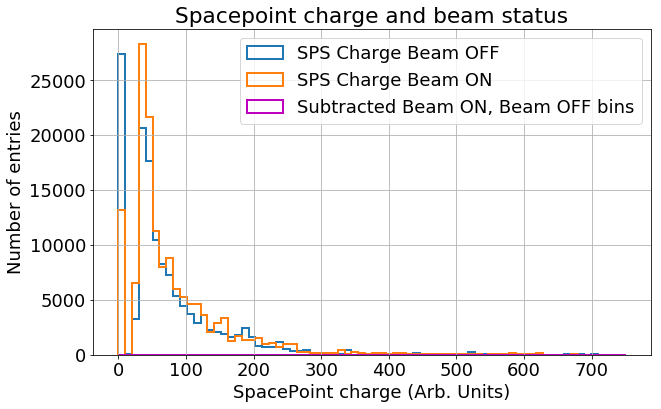

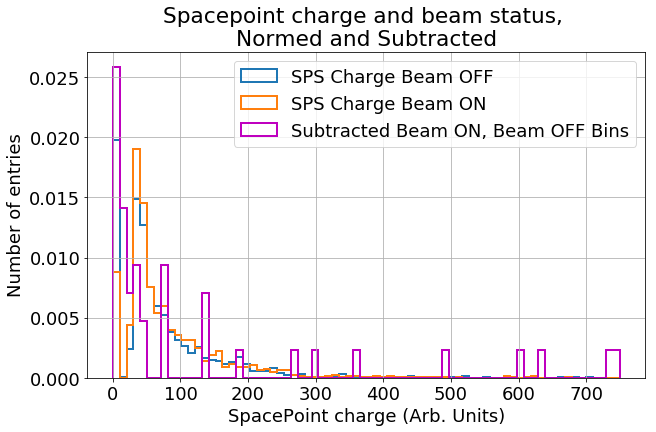

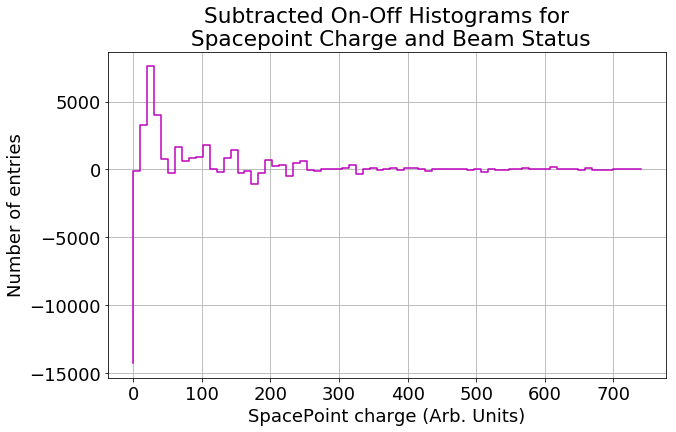

In [20]:

#Subtracted Histograms -- Beam on, off, no-cone

print df_Sps_beam_on.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
#df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).head(50) #this gives 7 rows per event... I want 7 events
df_Sps_beam_on_4900_Events = df_Sps_beam_on[df_Sps_beam_on.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 4919]
df_Sps_beam_off_4900_Events = df_Sps_beam_off[df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 4919]

#df10_Events = df_Sps_beam_on_cone[df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup < 10]
#print (df10_Events)
#sorteddf = df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"]).count()
#sorteddf.head()
on_q_vals = df_Sps_beam_on_4900_Events['sps_cluster_charge']
off_q_vals = df_Sps_beam_off_4900_Events['sps_cluster_charge']

BINS = np.linspace(0,750,75)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam OFF',normed=False)
onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam ON',normed=False)
hist3 = onhist-offhist
plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted Beam ON, Beam OFF bins',color='m',normed=False)
plt.title("Spacepoint charge and beam status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

BINS = np.linspace(0,750,75)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam OFF',normed=True)
onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Beam ON',normed=True)
plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted Beam ON, Beam OFF Bins',color='m',normed=True)
plt.title("Spacepoint charge and beam status, \nNormed and Subtracted")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

#Looks weird... subtracting hist directly not necessarily smart...
fig = plt.figure(figsize=(10,6))
#plt.hist(hist3,histtype='step',bins = BINS,lw=2,label='Subtracted Beam ON, Beam OFF, Normalized',color='m')
b3 = np.delete(BINS,-1)
plt.step(b3,hist3,color='m')
plt.title("Subtracted On-Off Histograms for\n Spacepoint Charge and Beam Status")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()



In [21]:
'''print df_G10_off_cut_yes_nu.shape
print df_G10_off_complementary_yes_nu.shape
print df_rest_det_off_cut_yes_nu.shape
#print df_G10_off_cut.head()
print df_G10_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_G10_off_complementary_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_rest_det_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count()

df_G10_off_cut_500k_Events = df_G10_off_cut_yes_nu[df_G10_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]
df_G10_off_complementary_500k_Events = df_G10_off_complementary_yes_nu[df_G10_off_complementary_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]
df_rest_det_off_cut_500k_Events = df_rest_det_off_cut_yes_nu[df_rest_det_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]

#df10_Events = df_Sps_beam_on_cone[df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup < 10]
#print (df10_Events)
#sorteddf = df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"]).count()
#sorteddf.head()
print df_G10_off_cut_500k_Events['sps_cluster_charge'].count()
print df_G10_off_complementary_500k_Events['sps_cluster_charge'].count()
print df_rest_det_off_cut_500k_Events['sps_cluster_charge'].count()

g10_q_vals = df_G10_off_cut_500k_Events['sps_cluster_charge'] #df_G10_off_cut_600k_Events['sps_cluster_charge']
compl_reg_q_vals = df_G10_off_complementary_500k_Events['sps_cluster_charge'] #df_rest_det_off_cut_600k_Events['sps_cluster_charge']
rest_det_q_vals = df_rest_det_off_cut_500k_Events['sps_cluster_charge']

BINS = np.linspace(0,750,75)

fig = plt.figure(figsize=(10,6))
g10_hist,b1,p1 = plt.hist(g10_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
compl_reg_hist,b2,p2 = plt.hist(compl_reg_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
rest_det_hist,b3,p3 = plt.hist(rest_det_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='g',normed=False)
hist3 = g10_hist-compl_reg_hist
plt.hist(hist3,bins = BINS,histtype='step',lw=2,label='Subtracted G10, Rest. Det. Bins',color='Indigo',normed=False)
plt.title("Spacepoint Charge Near G10, \n and Complimentary Region")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

'''


'print df_G10_off_cut_yes_nu.shape\nprint df_G10_off_complementary_yes_nu.shape\nprint df_rest_det_off_cut_yes_nu.shape\n#print df_G10_off_cut.head()\nprint df_G10_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events\nprint df_G10_off_complementary_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events\nprint df_rest_det_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count()\n\ndf_G10_off_cut_500k_Events = df_G10_off_cut_yes_nu[df_G10_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]\ndf_G10_off_complementary_500k_Events = df_G10_off_complementary_yes_nu[df_G10_off_complementary_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]\ndf_rest_det_off_cut_500k_Events = df_rest_det_off_cut_yes_nu[df_rest_det_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"]).ngroup() < 500000]\n\n#df

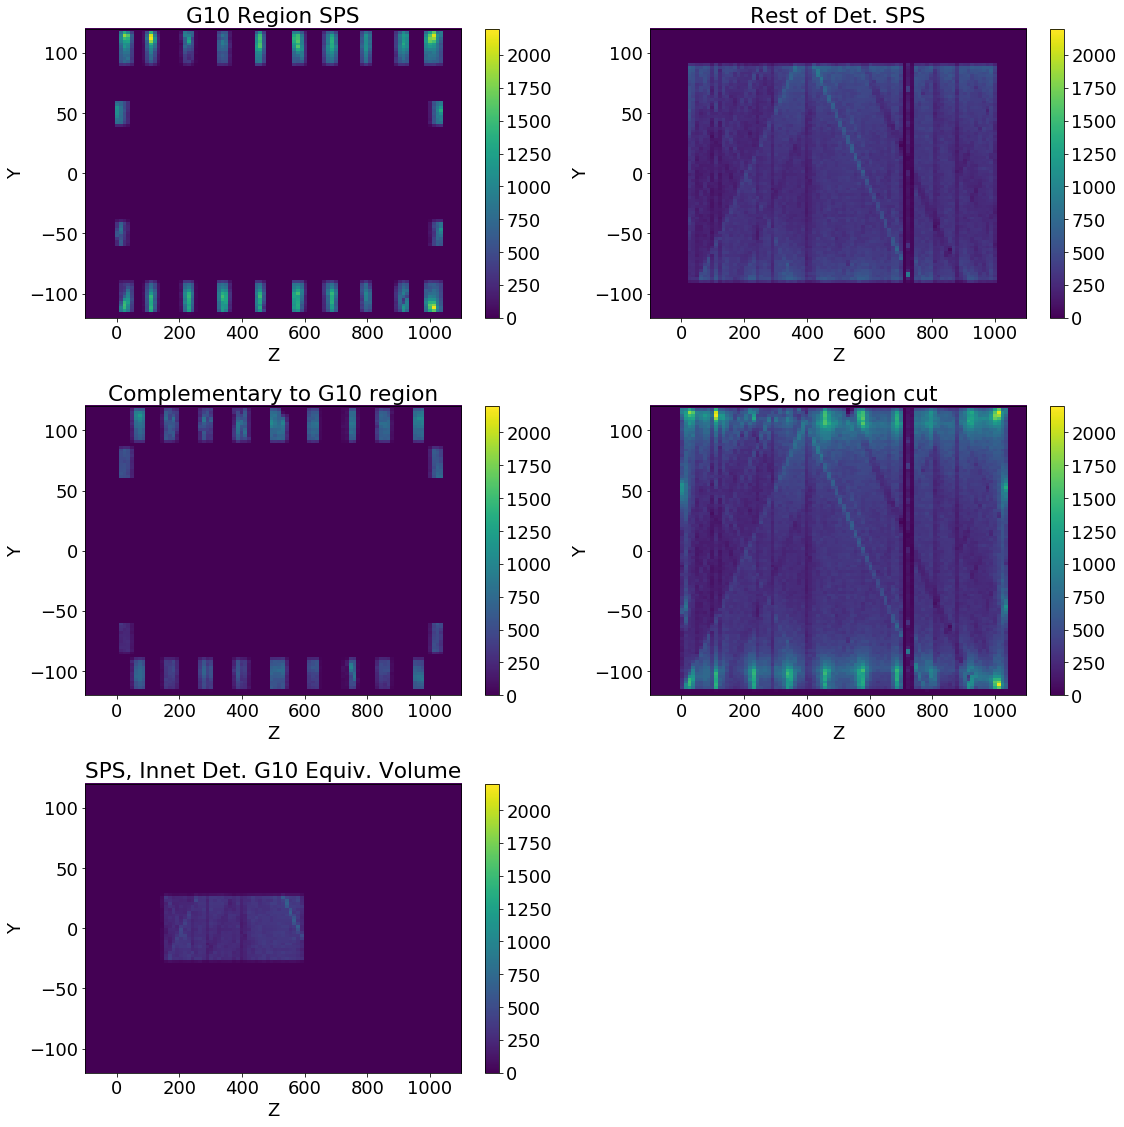

In [22]:
fig = plt.figure(figsize=(16,16))
#df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')
df_G10_off_complementary=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')

plt.subplot(3, 2, 1)

plt.hist2d(df_G10_off_cut_yes_nu['sps_z'].values,df_G10_off_cut_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Region SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(3, 2, 2)

plt.hist2d(df_rest_det_off_cut_yes_nu['sps_z'].values,df_rest_det_off_cut_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of Det. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(3, 2, 3)

plt.hist2d(df_G10_off_complementary_yes_nu['sps_z'].values,df_G10_off_complementary_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary to G10 region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(3, 2, 4)

plt.hist2d(df_Sps_beam_off_yes_nu['sps_z'].values,df_Sps_beam_off_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, no region cut")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(3, 2, 5)

plt.hist2d(df_inner_det_G10_equivalent_Vol_cut['sps_z'].values,df_inner_det_G10_equivalent_Vol_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Innet Det. G10 Equiv. Volume")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()





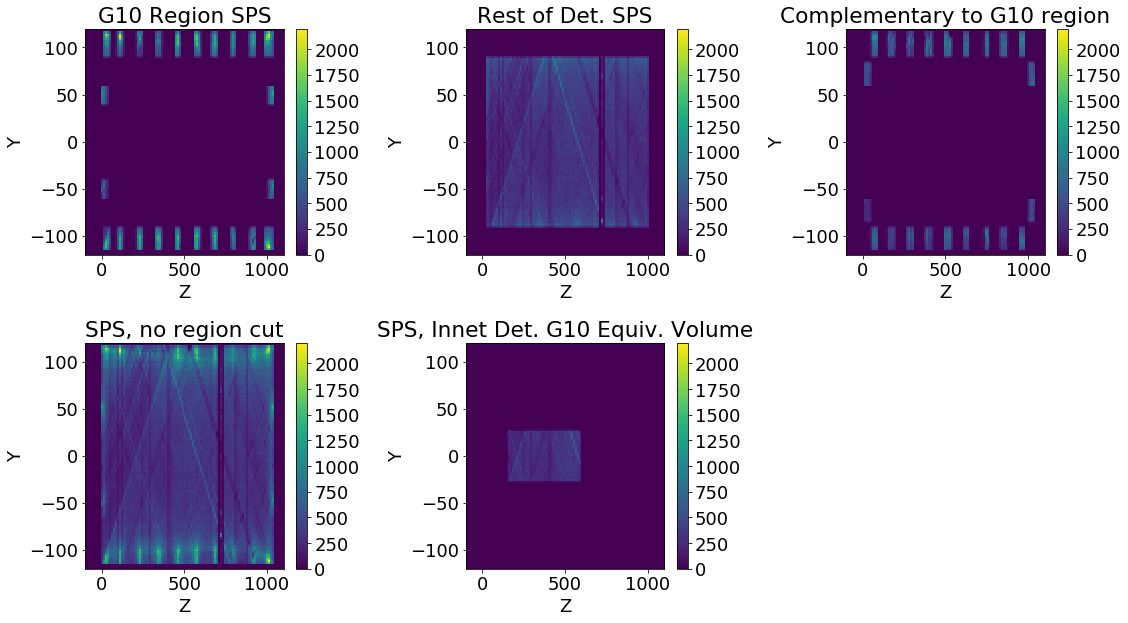

In [23]:
fig = plt.figure(figsize=(16,9))
#df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')
df_G10_off_complementary=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')

plt.subplot(2, 3, 1)

plt.hist2d(df_G10_off_cut_yes_nu['sps_z'].values,df_G10_off_cut_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Region SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_rest_det_off_cut_yes_nu['sps_z'].values,df_rest_det_off_cut_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of Det. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_G10_off_complementary_yes_nu['sps_z'].values,df_G10_off_complementary_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary to G10 region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_Sps_beam_off_yes_nu['sps_z'].values,df_Sps_beam_off_yes_nu['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, no region cut")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_inner_det_G10_equivalent_Vol_cut['sps_z'].values,df_inner_det_G10_equivalent_Vol_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=2200,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Innet Det. G10 Equiv. Volume")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()



Low Thresh 30cm plotting...


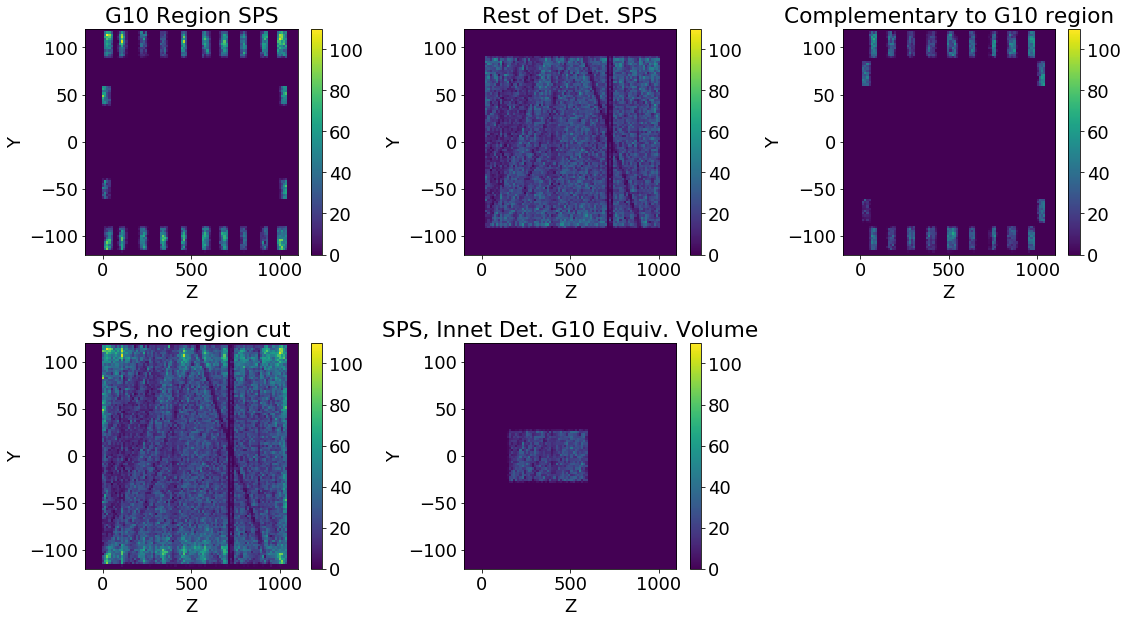

In [21]:
#########   2D Region Plot for Low Thresh Wider Cones   #########  

df_ryan_beamoff_lowthresh_30cmr_G10=df_ryan_beamoff_lowthresh_30cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_ryan_beamoff_lowthresh_30cmr_rest_det=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
#df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_30cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')



print "Low Thresh 30cm plotting..."
fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_ryan_beamoff_lowthresh_30cmr_G10['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr_G10['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=110,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Region SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_ryan_beamoff_lowthresh_30cmr_rest_det['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr_rest_det['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=110,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of Det. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=110,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary to G10 region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_ryan_beamoff_lowthresh_30cmr['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=110,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, no region cut")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut['sps_z'].values,df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=110,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Innet Det. G10 Equiv. Volume")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

In [24]:
def testFunction():
    a = [1,5,8,11,35,3,100,4,98]
    for i in range(len(a)):
        curr_max = max(a)
        print "Max: ",curr_max
        a.remove(curr_max)
#testFunction()

(699615, 26)
(456495, 26)
(233413, 27)
77467
76937
67698
699615
456495
233413


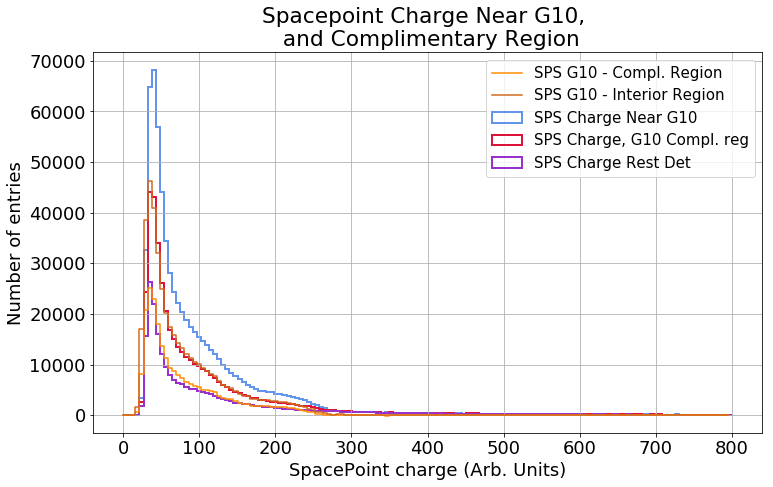

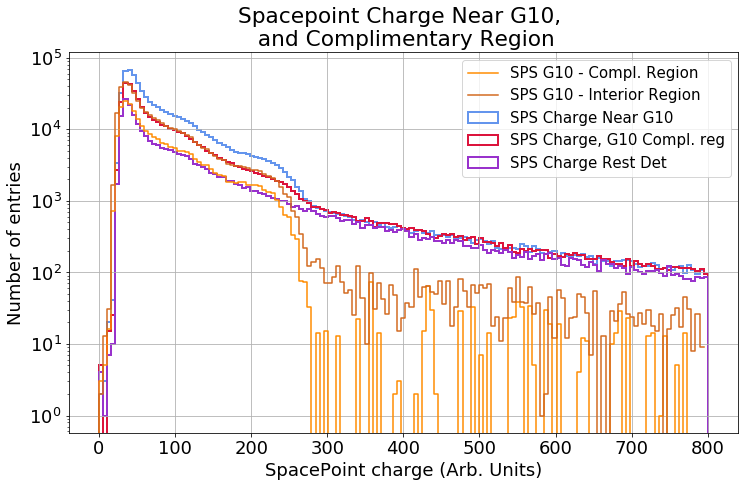

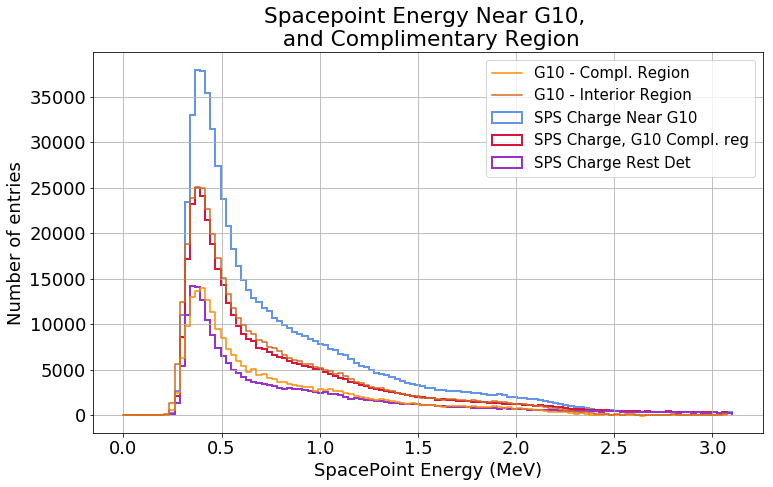

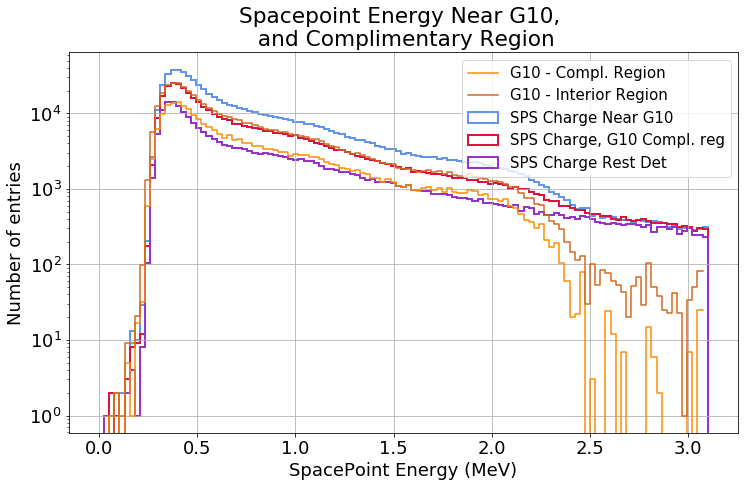

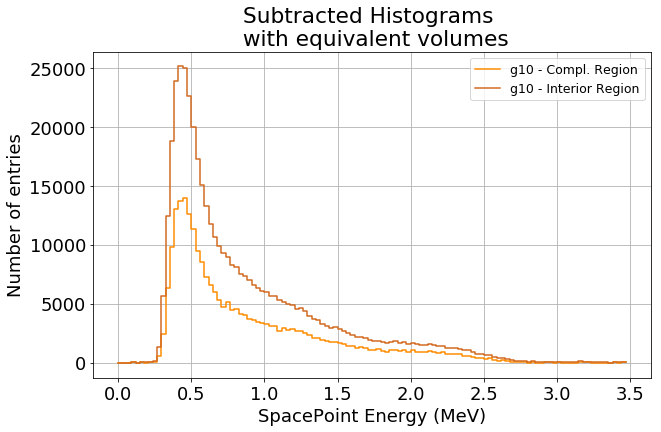

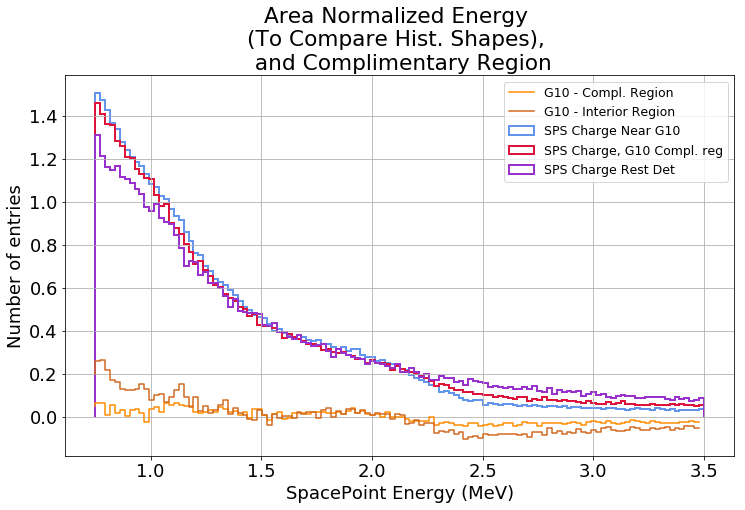

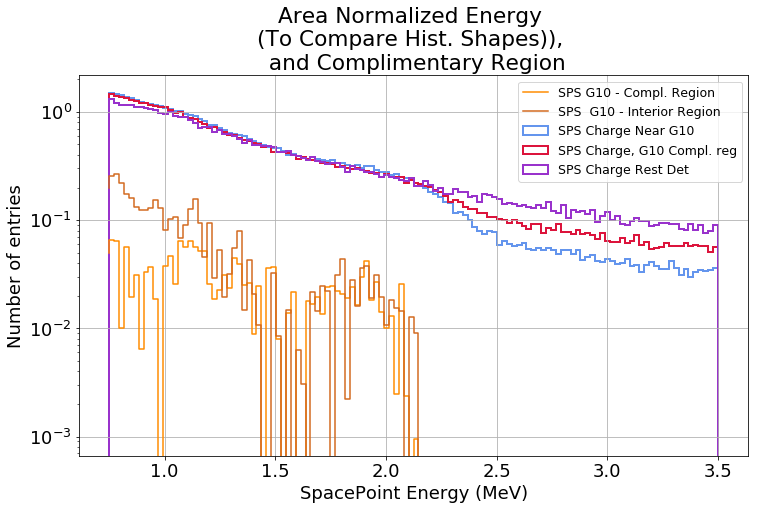

In [25]:
#Checking spectrum near G!0, vs. away, and subtacting is next two cells

#Weights and Scaling
#G10_V =
print df_G10_off_cut_yes_nu.shape
print df_G10_off_complementary_yes_nu.shape
print df_inner_det_G10_equivalent_Vol_cut_charge.shape
#print df_G10_off_cut.head()
print df_G10_off_cut_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_G10_off_complementary_yes_nu.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count() #counting number of unique events
print df_inner_det_G10_equivalent_Vol_cut_charge.groupby(["N_Run","N_SubRun","N_Event"])["sps_cluster_charge"].max().count()

#df10_Events = df_Sps_beam_on_cone[df_Sps_beam_on_cone.groupby(["N_Run","N_SubRun","N_Event"]).ngroup < 10]
#print (df10_Events)
#sorteddf = df_Sps_beam_off.groupby(["N_Run","N_SubRun","N_Event"]).count()
#sorteddf.head()
print df_G10_off_cut_yes_nu['sps_cluster_charge'].count()
print df_G10_off_complementary_yes_nu['sps_cluster_charge'].count()
print df_inner_det_G10_equivalent_Vol_cut_charge['sps_cluster_charge'].count()

######### SPS / Blip Charge Hisograms ############

g10_q_vals = df_G10_off_cut_yes_nu['sps_cluster_charge'] #df_G10_off_cut_600k_Events['sps_cluster_charge']
compl_reg_q_vals = df_G10_off_complementary_yes_nu['sps_cluster_charge'] #df_rest_det_off_cut_600k_Events['sps_cluster_charge']
inner_det_q_vals = df_inner_det_G10_equivalent_Vol_cut['sps_cluster_charge']


BINS = np.linspace(0,800,150)

fig = plt.figure(figsize=(12,7))
g10_hist,b1,p1 = plt.hist(g10_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
compl_reg_hist,b2,p2 = plt.hist(compl_reg_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
inner_det_hist,b3,p3 = plt.hist(inner_det_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-inner_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='SPS G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='SPS G10 - Interior Region')
plt.title("Spacepoint Charge Near G10, \n and Complimentary Region")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,800,150)

fig = plt.figure(figsize=(12,7))
g10_hist,b1,p1 = plt.hist(g10_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
compl_reg_hist,b2,p2 = plt.hist(compl_reg_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
inner_det_hist,b3,p3 = plt.hist(inner_det_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-inner_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='SPS G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='SPS G10 - Interior Region')
plt.title("Spacepoint Charge Near G10, \n and Complimentary Region")
plt.xlabel('SpacePoint charge (Arb. Units)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')


######### SPS / Blip Energy Hisograms ############
BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
inner_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-inner_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='G10 - Interior Region')
plt.title("Spacepoint Energy Near G10, \n and Complimentary Region")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
inner_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-inner_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='G10 - Interior Region')
plt.title("Spacepoint Energy Near G10, \n and Complimentary Region")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')


#Subtract regions

BINS = np.linspace(0.0,3.5,120)

fig = plt.figure(figsize=(10,6))
b3 = np.delete(BINS,-1)

plt.step(b3,hist4,color='darkorange',label='g10 - Compl. Region')
plt.step(b3,hist5,color='chocolate',label='g10 - Interior Region')
plt.title("Subtracted Histograms \n with equivalent volumes")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1,fontsize='x-small')

######### Shape Only Comparison ############

BINS = np.linspace(0.75,3.5,125)
fig = plt.figure(figsize=(12,7))
g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',density=True)
compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',density=True)
rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',density=True)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-rest_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='G10 - Interior Region')
plt.title("Area Normalized Energy \n(To Compare Hist. Shapes), \n and Complimentary Region")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='x-small')

fig = plt.figure(figsize=(12,7))
g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',density=True)
compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',density=True)
rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,lw=2,label='SPS Charge Rest Det',color='darkorchid',density=True)

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-rest_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='SPS G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='SPS  G10 - Interior Region')
plt.title("Area Normalized Energy \n(To Compare Hist. Shapes)), \n and Complimentary Region")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='x-small')
plt.yscale('log')

In [26]:
#Summing clusters

#maxSPSs_G10,summedCloseClusters_G10 = groupDataEventsAndAddMaxSPS(df_G10_off_cut_yes_nu)
#maxSPSs_restdet,summedCloseClusters_restdet = groupDataEventsAndAddMaxSPS(df_rest_det_off_cut_yes_nu)
#maxSPSs_compl,summedCloseClusters_compl = groupDataEventsAndAddMaxSPS(df_G10_off_complementary_yes_nu)
#maxSPSs_G10,summedCloseClusters_G10 = groupDataEventsAndAddArbSPSPlusNeighbor(df_G10_off_cut_yes_nu)
#maxSPSs_restdet,summedCloseClusters_restdet = groupDataEventsAndAddArbSPSPlusNeighbor(df_rest_det_off_cut_yes_nu)
#maxSPSs_compl,summedCloseClusters_compl = groupDataEventsAndAddArbSPSPlusNeighbor(df_G10_off_complementary_yes_nu)
#print summedCloseClusters
#maxEs_G10,summedCloseClusters_G10 = sumMaxClusterEnergiesWithNeighbors(df_G10_off_cut_yes_nu_charge)
#maxEs_restdet,summedCloseClusters_restdet = sumMaxClusterEnergiesWithNeighbors(df_rest_det_off_cut_yes_nu_charge)
#maxEs_compl,summedCloseClusters_compl = sumMaxClusterEnergiesWithNeighbors(df_G10_off_complementary_yes_nu_charge)

#Es_G10,summedClusterEs_G10_test = sumClusterEnergiesOnly(df_G10_off_cut_yes_nu_charge)
#Es_restdet,summedClusterEs_restdet_test = sumClusterEnergiesOnly(df_rest_det_off_cut_yes_nu_charge)
#Es_compl,summedClusterEs_compl_test = sumClusterEnergiesOnly(df_G10_off_complementary_yes_nu_charge)

#Es_G10,summedClusterEs_G10,multiplicities_g10 = sumMaxAndNeighborsInRadius(df_G10_off_cut_yes_nu_charge,20.1)
#Es_compl,summedClusterEs_compl,multiplicities_compl = sumMaxAndNeighborsInRadius(df_G10_off_complementary_yes_nu_charge,20.1)
#Es_innerdet,summedClusterEs_innerdet,multiplicities_inner = sumMaxAndNeighborsInRadius(df_inner_det_G10_equivalent_Vol_cut_charge,20.1)

#Latest Summing Technique:
Es_G10,allsummedClusterEs_G10,multiplicities_g10 = sumMaxAndNeighborsInRadiusAllData(df_G10_off_cut_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
Es_compl,summedClusterEs_compl,multiplicities_compl = sumMaxAndNeighborsInRadiusAllData(df_G10_off_complementary_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
Es_innerdet,summedClusterEs_innerdet,multiplicities_inner = sumMaxAndNeighborsInRadiusAllData(df_inner_det_G10_equivalent_Vol_cut_charge,df_Sps_beam_off_yes_nu_charge,20.0)

#Latest Summing Technique -- but only the top four max blips in an event
summedMaxClusterEs_G10,max_multiplicities_g10 = returnMaxBlipsPlusNeighbors(df_G10_off_cut_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
summedMaxClusterEs_compl,max_multiplicities_compl = returnMaxBlipsPlusNeighbors(df_G10_off_complementary_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
summedMaxClusterEs_innerdet,max_multiplicities_inner = returnMaxBlipsPlusNeighbors(df_inner_det_G10_equivalent_Vol_cut_charge,df_Sps_beam_off_yes_nu_charge,20.0)



Number of events with energies:  77460
Number of energy clusters in this DF:  7510  out of  11335  energies total
Number of events with energies:  76843
Number of energy clusters in this DF:  4979  out of  7710  energies total
Number of events with energies:  67698
Number of energy clusters in this DF:  2902  out of  4812  energies total
Number of events with energies:  77460
Number of energy clusters in this DF:  5587  out of   energies total
Number of events with energies:  76843
Number of energy clusters in this DF:  4404  out of   energies total
Number of events with energies:  67698
Number of energy clusters in this DF:  2690  out of   energies total


In [27]:
#Latest Summing Technique -- but only the top three max blips in an event
#summedMaxClusterEs_G10,max_multiplicities_g10 = returnMaxBlipsPlusNeighbors(df_G10_off_cut_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
#summedMaxClusterEs_compl,max_multiplicities_compl = returnMaxBlipsPlusNeighbors(df_G10_off_complementary_yes_nu_charge,df_Sps_beam_off_yes_nu_charge,20.0)
#summedMaxClusterEs_innerdet,max_multiplicities_inner = returnMaxBlipsPlusNeighbors(df_inner_det_G10_equivalent_Vol_cut_charge,df_Sps_beam_off_yes_nu_charge,20.0)



In [28]:
print len(summedMaxClusterEs_innerdet)

2690


In [29]:
#maxQs_G10 = returnMaxBlipQs(df_G10_off_cut_yes_nu)
#maxQs_compl = returnMaxBlipQs(df_G10_off_complementary_yes_nu)
#maxQs_innerdet = returnMaxBlipQs(df_inner_det_G10_equivalent_Vol_cut)
#df_Sps_beam_off_yes_nu['energy']=E_recoY_off_run1_G10(df_Sps_beam_off_yes_nu,238.4)
#maxEs_G10_noqcut = returnMaxBlipEs(df_Sps_beam_off_yes_nu)
maxEs_G10 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge)
maxEs_compl = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge)
maxEs_innerdet = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge)


Number of max SPS points:  77460
Number of max SPS points:  76843
Number of max SPS points:  67698


In [30]:
df_G10_off_cut_yes_nu.head(10)

evttime       sps_x       sps_y        sps_z    distance  \
48  1457120722  157.683929 -115.164009   125.099998  793.764556   
49  1457120722  160.068604 -110.141060   128.316498  791.066674   
55  1457120722  213.863937   92.162476   211.800003  751.643495   
74  1457120722    3.315004 -106.157341   687.955872  217.472342   
75  1457120722   23.338552  -97.237282   686.508484  219.711013   
76  1457120722   77.408142  107.144714   799.500000  254.982781   
86  1457120722  114.129265 -110.487473   999.599976  140.224605   
87  1457120722   57.640053 -105.551125  1002.599976  108.650727   
88  1457120722   23.186047  110.782021  1005.000000  247.311501   
89  1457120722   60.524464  112.254265  1006.799988  254.019766   

    sps_cluster_charge  N_Event  N_Run  N_SubRun   Vertex_x  ...  neutrinos  \
48           30.328661      265   5280         5  10.614715  ...          1   
49          125.562790      265   5280         5  10.614715  ...          1   
55           81.133911      265   5280         5  10.614715  ...          1   
74          145.893997      265   5280         5  10.614715  ...          1   
75          145.441467      265   5280         5  10.614715  ...          1   
76           58.461536      265   5280         5  10.614715  ...          1   
86           41.074863      265   5280         5  10.614715  ...          1   
87          141.763763      265   5280         5  10.614715  ...          1   
88           82.837906      265   5280         5  10.614715  ...          1   
89           35.419205      265   5280         5  10.614715  ...          1   

    neutrinoshowers  neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  \
48                0               1 -0.079201  0.530954  0.843691  109.808624   
49                0               1 -0.079201  0.530954  0.843691  109.808624   
55                0               1 -0.079201  0.530954  0.843691  109.808624   
74                0               1 -0.079201  0.530954  0.843691  109.808624   
75                0               1 -0.079201  0.530954  0.843691  109.808624   
76                0               1 -0.079201  0.530954  0.843691  109.808624   
86                0               1 -0.079201  0.530954  0.843691  109.808624   
87                0               1 -0.079201  0.530954  0.843691  109.808624   
88                0               1 -0.079201  0.530954  0.843691  109.808624   
89                0               1 -0.079201  0.530954  0.843691  109.808624   

    tracklength  distance_nu_smallest  cosmic_trk_50  
48   247.133427             94.041823              0  
49   247.133427             94.041823              0  
55   247.133427             94.041823              0  
74   247.133427             94.041823              0  
75   247.133427             94.041823              0  
76   247.133427             94.041823              0  
86   247.133427             94.041823              0  
87   247.133427             94.041823              0  
88   247.133427             94.041823              0  
89   247.133427             94.041823              0  

[10 rows x 26 columns]

(0, 13500)

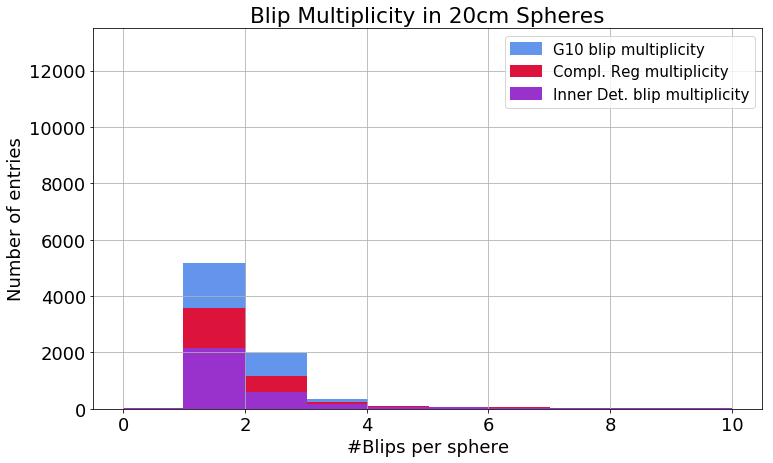

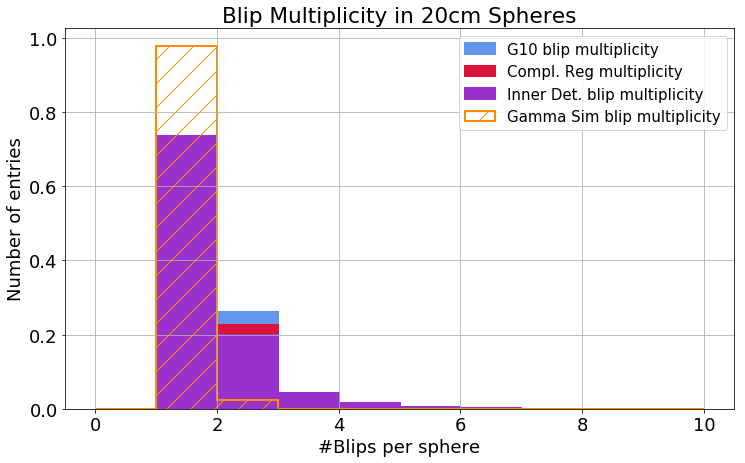

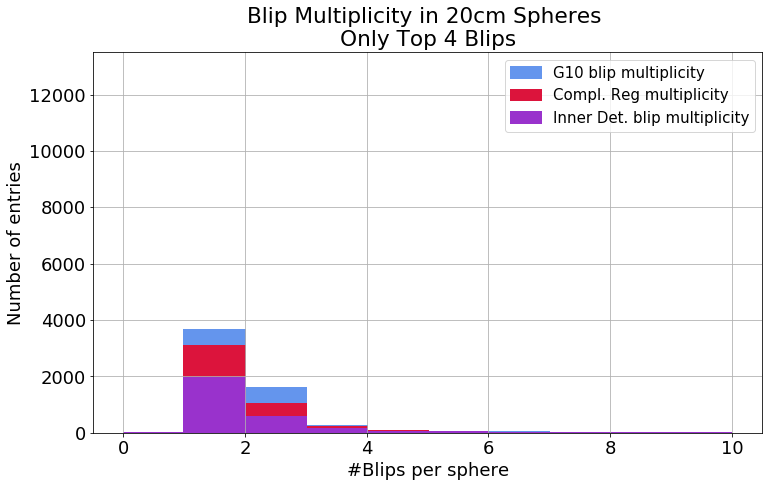

In [31]:
######### Multiplicity distributions -- Multiplicity of blips in 20cm bubbles ############

######### Gammas ############
BINS = np.linspace(0,10,11)

fig = plt.figure(figsize=(12,7))
plt.hist(multiplicities_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity',color='CornflowerBlue',fill=True)
plt.hist(multiplicities_compl,histtype='step',bins = BINS,lw=2,label='Compl. Reg multiplicity',color='Crimson',hatch='/',fill=True)
plt.hist(multiplicities_inner,histtype='step',bins = BINS,lw=2,label='Inner Det. blip multiplicity',color='darkorchid',hatch='/',fill=True)

plt.title("Blip Multiplicity in 20cm Spheres")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.ylim(0,13500)
#plt.yscale('log')

######### Other data ############

BINS = np.linspace(0,10,11)

fig = plt.figure(figsize=(12,7))
plt.hist(multiplicities_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity',color='CornflowerBlue',normed=True,fill=True)
plt.hist(multiplicities_compl,histtype='step',bins = BINS,lw=2,label='Compl. Reg multiplicity',color='Crimson',hatch='/',normed=True,fill=True)
plt.hist(multiplicities_inner,histtype='step',bins = BINS,lw=2,label='Inner Det. blip multiplicity',color='darkorchid',hatch='/',normed=True,fill=True)
plt.hist(multiplicities_GammaSim,histtype='step',bins = BINS,lw=2,label='Gamma Sim blip multiplicity',color='darkorange',hatch='/',normed=True,fill=False)

#Es_GammaSim,allsummedClusterEs_GammaSim,multiplicities_GammaSim

plt.title("Blip Multiplicity in 20cm Spheres")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,13500)
#plt.yscale('log')

#fig = plt.figure(figsize=(12,7))
#plt.hist(multiplicities_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity',color='CornflowerBlue',fill=True)
#plt.hist(multiplicities_compl,histtype='step',bins = BINS,lw=2,label='Compl. Reg multiplicity',color='Crimson',hatch='/',fill=True)
#plt.hist(multiplicities_inner,histtype='step',bins = BINS,lw=2,label='Inner Det. blip multiplicity',color='darkorchid',hatch='/',fill=True)

#plt.title("#Blips in 20cm spheres (Log)")
#plt.xlabel('#Blips per sphere')
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

fig = plt.figure(figsize=(12,7))
plt.hist(max_multiplicities_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity',color='CornflowerBlue',fill=True)
plt.hist(max_multiplicities_compl,histtype='step',bins = BINS,lw=2,label='Compl. Reg multiplicity',color='Crimson',hatch='/',fill=True)
plt.hist(max_multiplicities_inner,histtype='step',bins = BINS,lw=2,label='Inner Det. blip multiplicity',color='darkorchid',hatch='/',fill=True)

plt.title("Blip Multiplicity in 20cm Spheres \nOnly Top 4 Blips")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.ylim(0,13500)
#plt.yscale('log')

In [32]:
print np.mean(multiplicities_g10)
print np.mean(multiplicities_compl)
print np.mean(multiplicities_inner)
print np.mean(max_multiplicities_g10)
print np.mean(max_multiplicities_compl)
print np.mean(max_multiplicities_inner)

1.3904127829560586
1.3759791122715406
1.3673328738800827
1.4331483801682476
1.3932788374205267
1.375092936802974


In [33]:
print BINS
print multiplicities_g10

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 6, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 5, 1, 2,

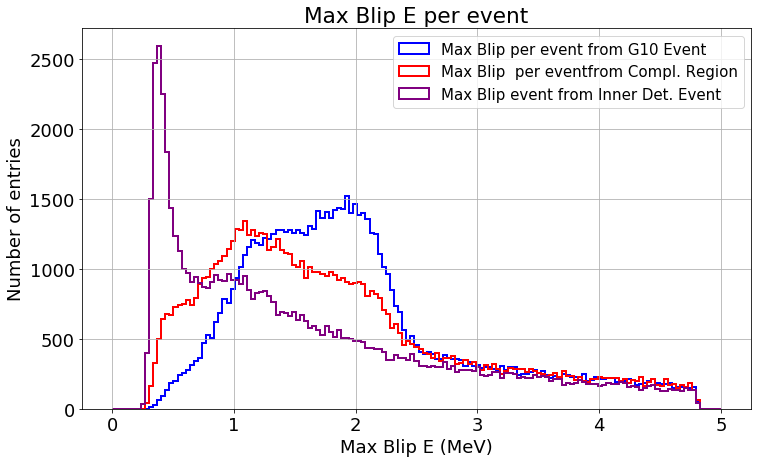

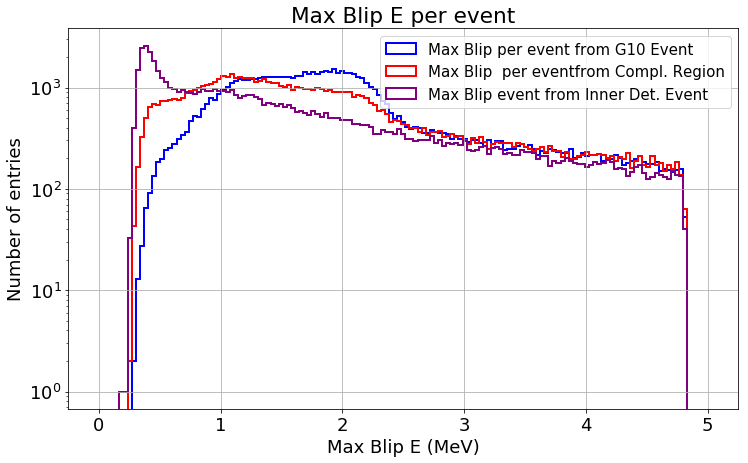

In [34]:
############### Plot Max Q's ############### 
'''
BINS = np.linspace(0,1000,140)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxQs_G10,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxQs_compl,histtype='step',bins = BINS,lw=2,label='Max Blip Q per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxQs_innerdet,histtype='step',bins = BINS,lw=2,label='Max Blip Q event from Inner Det. Event',color='purple')
plt.title("Max Blip Q per event")
plt.xlabel("Max Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

hg10,bg10,a = plt.hist(maxQs_G10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxQs_compl,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxQs_innerdet,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip Q per event")
plt.xlabel("Max Blip Q (ADC)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')
'''

############### Plot Max E's ############### 

BINS = np.linspace(0,5,150)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

hg10,bg10,a = plt.hist(maxEs_G10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')

hi
len:  23510
Number of max SPS points:  40225
Number of max SPS points:  0
Number of max SPS points:  0
Number of max SPS points:  40924
Number of max SPS points:  30085
Number of max SPS points:  0
Number of max SPS points:  28152
Number of max SPS points:  18999
Number of max SPS points:  10007
X_high region:
Number of max SPS points:  19527
Number of max SPS points:  12893
Number of max SPS points:  6669


NameError: name 'maxEs_G10_reg4' is not defined

<Figure size 864x504 with 0 Axes>

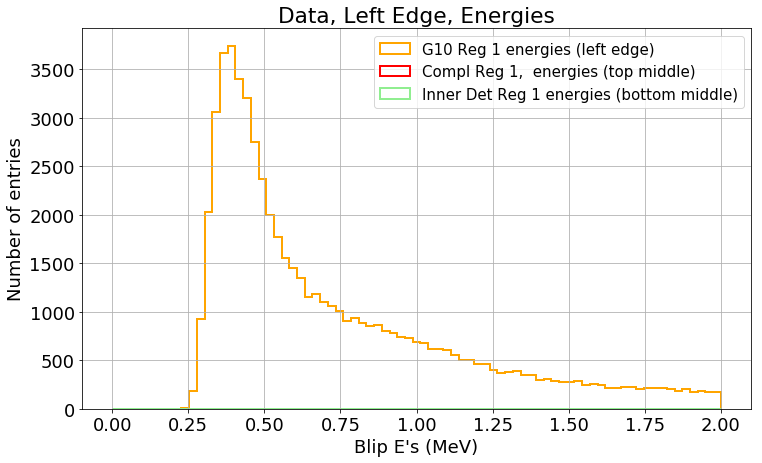

<Figure size 864x504 with 0 Axes>

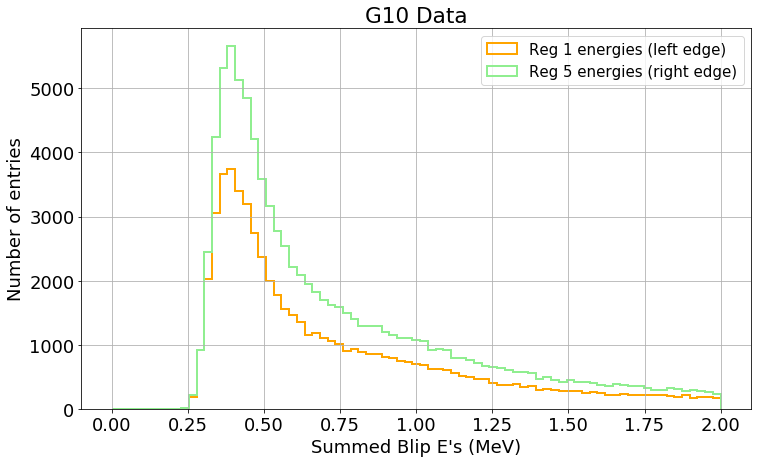

<Figure size 864x504 with 0 Axes>

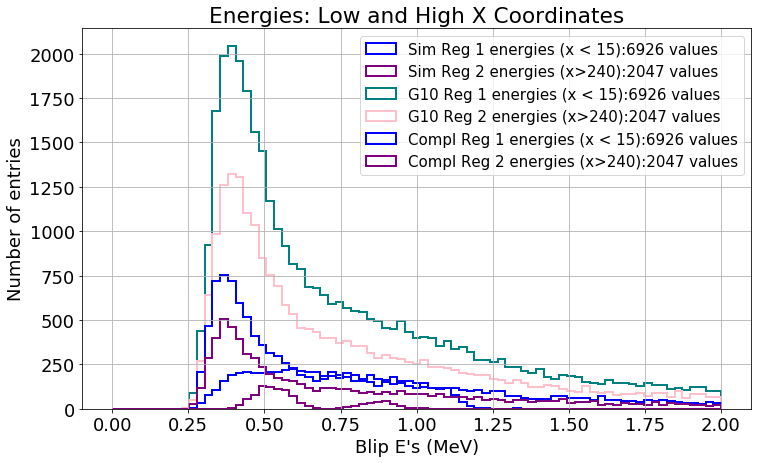

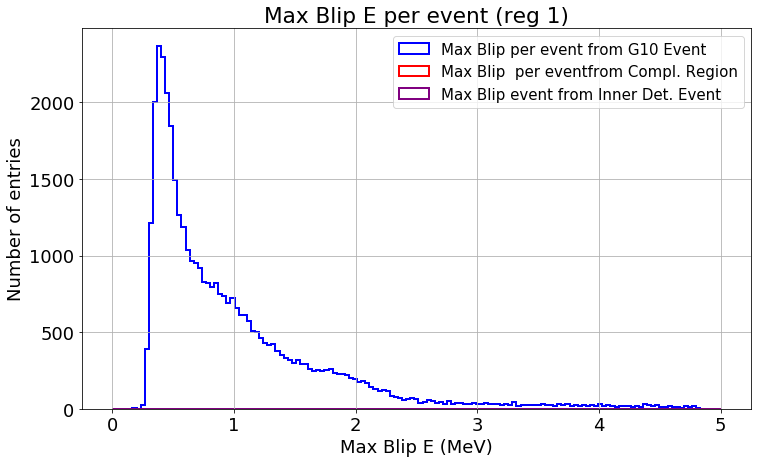

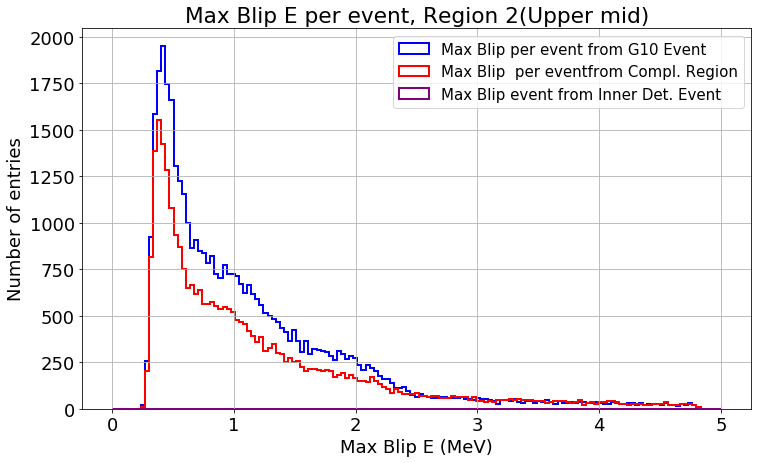

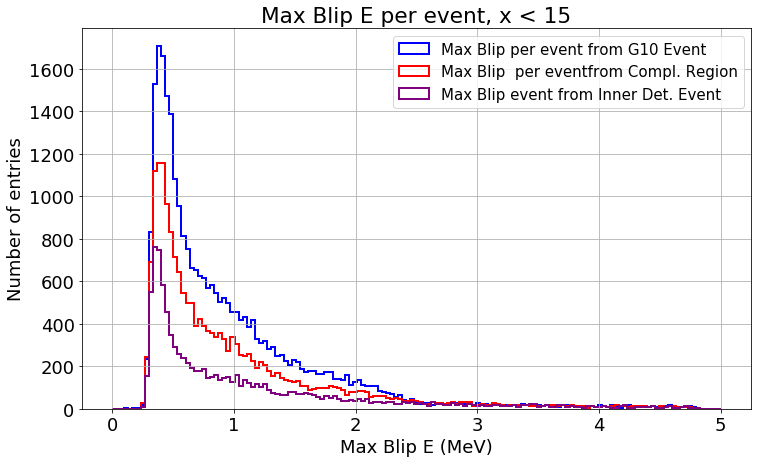

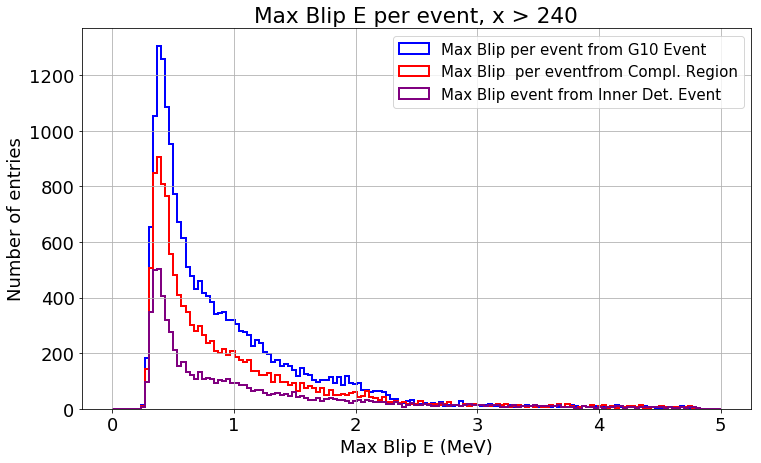

<Figure size 864x504 with 0 Axes>

In [35]:
#Region 1
print "hi"
df_G10_off_cut_yes_nu_charge_region1=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50))')
df_G10_off_complementary_yes_nu_charge_region1=df_G10_off_complementary_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50))')
df_inner_det_G10_equivalent_Vol_cut_charge_region1=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50))')
#Region 2
df_G10_off_cut_yes_nu_charge_region2=df_G10_off_cut_yes_nu_charge.query('(sps_y > 90.0) and ((sps_z>400 and sps_z<615))')
df_G10_off_complementary_yes_nu_charge_region2=df_G10_off_complementary_yes_nu_charge.query('(sps_y > 90.0) and ((sps_z>400 and sps_z<615))')
df_inner_det_G10_equivalent_Vol_cut_charge_region2=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y > 90.0) and ((sps_z>400 and sps_z<615))')
#Region 3
df_G10_off_cut_yes_nu_charge_region3=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0) and ((sps_z>400 and sps_z<615))')
df_G10_off_complementary_yes_nu_charge_region3=df_G10_off_complementary_yes_nu_charge.query('(sps_y < -90.0) and ((sps_z>400 and sps_z<615))')
df_inner_det_G10_equivalent_Vol_cut_charge_region3=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y < -90.0) and ((sps_z>400 and sps_z<615))')
#Region 4
df_G10_off_cut_yes_nu_charge_region4=df_G10_off_cut_yes_nu_charge.query('(sps_y > 20.0 and sps_y < 75.0)')
df_G10_off_complementary_yes_nu_charge_region4=df_G10_off_complementary_yes_nu_charge.query('(sps_y > 20.0 and sps_y < 75.0)')
df_inner_det_G10_equivalent_Vol_cut_charge_region4=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y > 20.0 and sps_y < 75.0)')
#Region 5
df_G10_off_cut_yes_nu_charge_region5=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')
df_G10_off_complementary_yes_nu_charge_region5=df_G10_off_complementary_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')
df_inner_det_G10_equivalent_Vol_cut_charge_region5=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')



##########     Regular Data Energies by Region / Locations   ######### : 
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,2.0,80)

fig = plt.figure(figsize=(12,7))
plt.hist(df_G10_off_cut_yes_nu_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='G10 Reg 1 energies (left edge)',color='orange')
plt.hist(df_G10_off_complementary_yes_nu_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='Compl Reg 1,  energies (top middle)',color='red')
plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='Inner Det Reg 1 energies (bottom middle)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("Data, Left Edge, Energies")
plt.xlabel("Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

fig = plt.figure(figsize=(12,7))
plt.hist(df_G10_off_cut_yes_nu_charge_region1['energy'],histtype='step',bins = BINS,lw=2,label='Reg 1 energies (left edge)',color='orange')
plt.hist(df_G10_off_cut_yes_nu_charge_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 5 energies (right edge)',color='lightgreen')
#plt.hist(df_Gamma_Sim_g10_region5['energy'],histtype='step',bins = BINS,lw=2,label='Reg 4 energies (x>240)',color='teal')
plt.title("G10 Data")
plt.xlabel("Summed Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))

######### Checking X ######### 

df_G10_off_cut_yes_nu_charge_xlow=df_G10_off_cut_yes_nu_charge.query(xlow_condition)
df_G10_off_cut_yes_nu_charge_xhigh=df_G10_off_cut_yes_nu_charge.query(xhigh_condition)
xlow_energies_g10 = df_G10_off_cut_yes_nu_charge_xlow['energy']
xhigh_energies_g10 = df_G10_off_cut_yes_nu_charge_xhigh['energy']

df_G10_off_complementary_yes_nu_charge_xlow=df_G10_off_complementary_yes_nu_charge.query(xlow_condition)
df_G10_off_complementary_yes_nu_charge_xhigh=df_G10_off_complementary_yes_nu_charge.query(xhigh_condition)
xlow_energies_complementary = df_G10_off_complementary_yes_nu_charge_xlow['energy']
xhigh_energies_complementary = df_G10_off_complementary_yes_nu_charge_xhigh['energy']

df_inner_det_G10_equivalent_Vol_cut_charge_xlow=df_inner_det_G10_equivalent_Vol_cut_charge.query(xlow_condition)
df_inner_det_G10_equivalent_Vol_cut_charge_xhigh=df_inner_det_G10_equivalent_Vol_cut_charge.query(xhigh_condition)
xlow_energies_inner_det = df_inner_det_G10_equivalent_Vol_cut_charge_xlow['energy']
xhigh_energies_inner_det = df_inner_det_G10_equivalent_Vol_cut_charge_xhigh['energy']


#print xlow_energies
print "len: ",len(xhigh_energies_g10)

fig = plt.figure(figsize=(12,7))
plt.hist(xlow_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim Reg 1 energies (x < 15):%s values'%(6926),color='blue')
plt.hist(xhigh_energies_sim,histtype='step',bins = BINS,lw=2,label='Sim Reg 2 energies (x>240):%s values'%(2047),color='purple')
plt.hist(xlow_energies_g10,histtype='step',bins = BINS,lw=2,label='G10 Reg 1 energies (x < 15):%s values'%(6926),color='teal')
plt.hist(xhigh_energies_g10,histtype='step',bins = BINS,lw=2,label='G10 Reg 2 energies (x>240):%s values'%(2047),color='pink')
plt.hist(xlow_energies_inner_det,histtype='step',bins = BINS,lw=2,label='Compl Reg 1 energies (x < 15):%s values'%(6926),color='blue')
plt.hist(xhigh_energies_inner_det,histtype='step',bins = BINS,lw=2,label='Compl Reg 2 energies (x>240):%s values'%(2047),color='purple')
#plt.hist(df_Gamma_Sim_g10_region3['energy'],histtype='step',bins = BINS,lw=2,label='Reg 3 energies (bottom middle)',color='lightgreen')
plt.title("Energies: Low and High X Coordinates")
plt.xlabel("Blip E's (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

############# Max Blip E's by Region ############# 


############### Plot Max E's ############### 

#### Region 1 ####
maxEs_G10_reg1 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region1)
maxEs_compl_reg1 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region1)
maxEs_innerdet_reg1 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region1)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg1,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg1,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_reg1,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event (reg 1)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### Region 2 ####
maxEs_G10_reg2 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region2)
maxEs_compl_reg2 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region2)
maxEs_innerdet_reg2 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region2)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg2,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg2,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_reg2,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, Region 2(Upper mid)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### xlow ####
maxEs_G10_xlow = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_xlow)
maxEs_compl_xlow = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_xlow)
maxEs_innerdet_xlow = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_xlow)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, x < 15")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### xhigh ####
print "X_high region:"
maxEs_G10_xhigh = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_xhigh)
maxEs_compl_xhigh = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_xhigh)
maxEs_innerdet_xhigh = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_xhigh)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, x > 240")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### Region 4 ####
#query('(sps_y > 20.0 and sps_y < 75.0)')
#maxEs_G10_reg4 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region4)
#maxEs_compl_reg4 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region4)
#maxEs_innerdet_reg4 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region4)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg4,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg4,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_reg4,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, Region 4 (Mid sides)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### Region 5 ####
#df_G10_off_cut_yes_nu_charge_region5=df_G10_off_cut_yes_nu_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')
maxEs_G10_reg5 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region5)
maxEs_compl_reg5 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region5)
maxEs_innerdet_reg5 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region5)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg5,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg5,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_reg5,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, Region 5 (Upper mid)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

In [ ]:

#### xlow ####
#maxEs_G10_xlow = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_xlow)
#maxEs_compl_xlow = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_xlow)
#maxEs_innerdet_xlow = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_xlow)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_xlow,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, x < 15")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### xhigh ####
print "X_high region:"
#maxEs_G10_xhigh = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_xhigh)
#maxEs_compl_xhigh = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_xhigh)
#maxEs_innerdet_xhigh = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_xhigh)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
hid,bid,b = plt.hist(maxEs_innerdet_xhigh,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, x > 240")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


In [ ]:
#Region 6
df_G10_off_cut_yes_nu_charge_region6=df_G10_off_cut_yes_nu_charge.query('(sps_y > 101.0) and ((sps_z>100 and sps_z<150))')
df_G10_off_complementary_yes_nu_charge_region6=df_G10_off_complementary_yes_nu_charge.query('(sps_y < -101.0 or sps_y > 101.0) and ((sps_z>100 and sps_z<150))')
#df_inner_det_G10_equivalent_Vol_cut_charge_region6=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')

#Region 7
df_G10_off_cut_yes_nu_charge_region7=df_G10_off_cut_yes_nu_charge.query('(sps_y < -105.0 or sps_y > 105.0) and ((sps_z>960 and sps_z<1060))')
df_G10_off_complementary_yes_nu_charge_region7=df_G10_off_complementary_yes_nu_charge.query('(sps_y < -105.0 or sps_y > 105.0) and ((sps_z>960 and sps_z<1060))')
#df_inner_det_G10_equivalent_Vol_cut_charge_region7=df_inner_det_G10_equivalent_Vol_cut_charge.query('(sps_y < -90.0 or sps_y > 90.0) and ((sps_z>950 and sps_z<1100))')


#### Region 6 ####
#query('(sps_y > 20.0 and sps_y < 75.0)')
maxEs_G10_reg6 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region6)
maxEs_compl_reg6 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region6)
#maxEs_innerdet_reg6 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region6)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg6,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg6,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
#hid,bid,b = plt.hist(maxEs_innerdet_reg4,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, Region 6 (Right hand side)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### Region 7 ####
#query('(sps_y > 20.0 and sps_y < 75.0)')
maxEs_G10_reg7 = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge_region7)
maxEs_compl_reg7 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region7)
#maxEs_innerdet_reg7 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region7)

BINS = np.linspace(0,5,150)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_G10_reg7,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
hcr,bcr,c = plt.hist(maxEs_compl_reg7,histtype='step',bins = BINS,lw=2,label='Max Blip  per eventfrom Compl. Region',color='red')
#hid,bid,b = plt.hist(maxEs_innerdet_reg4,histtype='step',bins = BINS,lw=2,label='Max Blip event from Inner Det. Event',color='purple')
plt.title("Max Blip E per event, Region 7 (Right hand hotspots)")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#### All g10 regions ####
maxEs_G10_all = returnMaxBlipEs(df_G10_off_cut_yes_nu_charge)
BINS = np.linspace(0,5,150)

fig = plt.figure(figsize=(12,7))
plt.hist(maxEs_G10_all,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='blue')
plt.title("Max Blip E per event")
plt.xlabel("Max Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

In [ ]:
df_G10_off_complementary_yes_nu_charge_region1.head()

#maxEs_compl_reg1 = returnMaxBlipEs(df_G10_off_complementary_yes_nu_charge_region1)
#maxEs_innerdet_reg1 = returnMaxBlipEs(df_inner_det_G10_equivalent_Vol_cut_charge_region1)


In [ ]:
'''#Plot summed clusters, log

BINS = np.linspace(0,1500,125)

fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from G10 Event',color='darkorange')
#hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Rest Det. Event',color='green')
#hcr,bc,b = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Compl. Region',color='red')
#plt.title("Max Blip per event")
#plt.xlabel("Max Blip Q (ADC counts)")
#plt.ylabel('Number of entries')

hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip from G10 Event',color='darkorange')
hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip from Rest Det. Event',color='green')
hcr,bcr,c = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip from Compl. Region',color='red')
plt.title("One Random Blip Q per event (log)")
plt.xlabel("Random Blip Q (ADC counts)")
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1)
plt.yscale('log')

fig = plt.figure(figsize=(12,7))

plt.hist(summedCloseClusters_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip+neighbor from G10 Event',color='darkred')
plt.hist(summedCloseClusters_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip+neighbor from Rest Det. Event',color='darkcyan')
plt.hist(summedCloseClusters_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Random Blip+neighbor from Compl. Region',color='purple')
plt.title("One Random Blip Q per event (log)")
plt.xlabel('MRandom Blip Q (ADC counts)')
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1)
plt.yscale('log')'''

In [ ]:
############## Summed Cluster Distributions ###################
BINS = np.linspace(0,6,120)
fig = plt.figure(figsize=(12,7))
g10_hist,g1,g2=plt.hist(summedClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='red')
compl_reg_hist,c1,c2 = plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='darkcyan')
inner_det_hist, i1,i2 = plt.hist(summedClusterEs_innerdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='purple')
plt.title("Summed Blip Energies within 20cm (3 Max Blips)")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(10,6))
hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-inner_det_hist
b4 = np.delete(BINS,-1)
plt.step(b4,hist4,color='darkorange',label='SPS G10 - Compl. Region')
plt.step(b4,hist5,color='chocolate',label='SPS  G10 - Interior Region')
plt.title("Subtracted Histograms \n G10 - other regions")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')
plt.grid()


fig = plt.figure(figsize=(12,7))
plt.hist(summedClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='red')
plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='darkcyan')
plt.hist(summedClusterEs_innerdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='purple')
plt.title("Summed Blip Energies within 20cm (3 Max Blips, Log)")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')

BINS = np.linspace(0.5,5,80)

fig = plt.figure(figsize=(12,7))
plt.hist(summedClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='red',density=True)
#plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='darkcyan',normed=True)
plt.hist(summedClusterEs_innerdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='purple',normed=True)
plt.title("Histogram-Area Normed (500 keV cutoff): \nSummed Blip Energies within 20cm (3 Max Blips)")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [ ]:
BINS = np.linspace(0,6,120)

fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from G10 Event',color='darkorange')
#hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Rest Det. Event',color='green')
#hcr,bc,b = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Compl. Region',color='red')
#plt.title("Max Blip per event")
#plt.xlabel("Max Blip Q (ADC counts)")
#plt.ylabel('Number of entries')

#hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,label='Random Blip from G10 Event',color='darkorange')
#hcr,bcr,c = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,label='Random Blip from Compl. Region',color='red')
#hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,label='Random Blip from Rest Det. Event',color='green')
#plt.title("One Random Blip Q per event")
#plt.xlabel("Random Blip Q (ADC counts)")
#plt.ylabel('Number of entries')

hg10E,bg10E,a = plt.hist(Es_G10,histtype='step',bins = BINS,lw=2,label='Blip Energy from G10 Event',color='darkorange')
hcrE,bcrE,c = plt.hist(Es_compl,histtype='step',bins = BINS,lw=2,label='Blip Energy from Compl. Regionr',color='red')
hrdE,brdE,b = plt.hist(Es_innerdet,histtype='step',bins = BINS,lw=2,label='Blip Energy from Rest Det. Events',color='green')
plt.title("Blip Energies")
plt.xlabel("Blip E (MeV)")
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

fig = plt.figure(figsize=(12,7))
#plt.hist(summedCloseClusters_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from G10 + near neighbor ',color='darkred')
#plt.hist(summedCloseClusters_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from  + near neighbor Rest Det.',color='darkcyan')
#plt.hist(summedCloseClusters_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from  + near neighbor Compl. Reg.',color='purple')
#plt.title("Sum Max Blip Q and nearest neighbor")
#plt.xlabel('Max Blip q + neighbor q (ADC counts)')
#plt.ylabel('Number of entries')

#plt.hist(summedCloseClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='darkred')
#plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='purple')
#plt.hist(summedClusterEs_restdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='darkcyan')
#plt.title("Max Blip E per event")
#plt.xlabel('Energy (MeV)')
#plt.ylabel('Number of entries')

#plt.grid()
#plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [ ]:
BINS = np.linspace(0,5,200)

fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from G10 Event',color='darkorange')
#hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Rest Det. Event',color='green')
#hcr,bc,b = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Max Blip from Compl. Region',color='red')
#plt.title("Max Blip per event")
#plt.xlabel("Max Blip Q (ADC counts)")
#plt.ylabel('Number of entries')

#hg10,bg10,a = plt.hist(maxSPSs_G10,histtype='step',bins = BINS,lw=2,label='Random Blip from G10 Event',color='darkorange')
#hcr,bcr,c = plt.hist(maxSPSs_compl,histtype='step',bins = BINS,lw=2,label='Random Blip from Compl. Region',color='red')
#hrd,brd,b = plt.hist(maxSPSs_restdet,histtype='step',bins = BINS,lw=2,label='Random Blip from Rest Det. Event',color='green')
#plt.title("One Random Blip Q per event")
#plt.xlabel("Random Blip Q (ADC counts)")
#plt.ylabel('Number of entries')
#My weights:
#g10_weights = np.full(len(Es_G10),1.0)
#compl_reg_weights = np.full(len(Es_compl),0.797)
#rest_det_weights = np.full(len(Es_restdet),0.075)
#Pawel's Weights"
#g10_weights = np.full(len(Es_G10),1.0)
#compl_reg_weights = np.full(len(Es_compl),0.544)
#rest_det_weights = np.full(len(Es_restdet),0.155)

hg10E,bg10E,a = plt.hist(Es_G10,histtype='step',bins = BINS,lw=2,label='Blip Energy from G10 Event',color='darkorange')
hcrE,bcrE,c = plt.hist(Es_compl,histtype='step',bins = BINS,lw=2,label='Blip Energy from Compl. Region',color='red')
hrdE,brdE,b = plt.hist(Es_innerdet,histtype='step',bins = BINS,lw=2,label='Blip Energy from Rest Det. Events',color='green')

#plt.title("Blip Energies, Weighted")
plt.title("Blip Energies, Equivalent Volumes")
plt.xlabel("Blip E (MeV)")
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

fig = plt.figure(figsize=(12,7))
#plt.hist(summedCloseClusters_G10,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from G10 + near neighbor ',color='darkred')
#plt.hist(summedCloseClusters_restdet,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from  + near neighbor Rest Det.',color='darkcyan')
#plt.hist(summedCloseClusters_compl,histtype='step',bins = BINS,lw=2,normed=True,label='Max SPS from  + near neighbor Compl. Reg.',color='purple')
#plt.title("Sum Max Blip Q and nearest neighbor")
#plt.xlabel('Max Blip q + neighbor q (ADC counts)')
#plt.ylabel('Number of entries')

#My weights:
#g10_weights = np.full(len(summedCloseClusterEs_G10),1.0)
#compl_reg_weights = np.full(len(summedClusterEs_compl),0.797)
#rest_det_weights = np.full(len(summedClusterEs_restdet),0.075)
#Pawel's Weights"
g10_weights = np.full(len(summedCloseClusterEs_G10),1.0)
compl_reg_weights = np.full(len(summedClusterEs_compl),0.544)
rest_det_weights = np.full(len(summedClusterEs_restdet),0.155)

plt.hist(summedCloseClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='darkred')
plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='purple')
plt.hist(summedClusterEs_restdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='darkcyan')
plt.title("Summed Nearby Blips per event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

g10_hist,b1,p1 = plt.hist(summedCloseClusterEs_G10,histtype='step',bins = BINS,lw=2,label='G10 Summed Blips',color='darkred')
compl_reg_hist,b2,p2 = plt.hist(summedClusterEs_compl,histtype='step',bins = BINS,lw=2,label='Compl. Region Summed Blips',color='purple')
rest_det_hist,b3,p3 = plt.hist(summedClusterEs_restdet,histtype='step',bins = BINS,lw=2,label='Rest Det. Summed Blips',color='darkcyan')
plt.title("Summed Nearby Blips per event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')

plt.grid()
plt.legend(loc=1,fontsize='small')
plt.yscale('log')

In [ ]:

hist4 = g10_hist-compl_reg_hist
hist5 = g10_hist-rest_det_hist

BINS = np.linspace(0,5,200)

#Looks weird... subtracting hist directly not necessarily smart...
fig = plt.figure(figsize=(10,6))
b3 = np.delete(BINS,-1)
plt.step(b3,hist5,color='orange')
plt.title("Subtracted Histograms \n G10 - rest of det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()

In [ ]:
tmpgammafile2='/uboone/app/users/rdorrill/uboonecode_v08_00_00_28/srcs/ubreco/ubreco/GammaCatcher/gammacorrelation_hist.root'
df_Gamma_Sim = pd.DataFrame( root2array(tmpgammafile2,BRANCH_SPS) )
#spsGamma = df_Gamma_Sim
df_Gamma_Sim['energy']=E_recoY_off_run1_G10(df_Gamma_Sim,238.4)
SPS_Es_in_event = df_Gamma_Sim["energy"].agg(list)
print SPS_Es_in_event

In [235]:
#*##########################################################################*#
##############################################################################
#*######################                              ######################*#
######################**     Ryan Low Threshold      **######################
#*######################                              ######################*#
##############################################################################
#*##########################################################################*#

# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
#from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
#from root_pandas import read_root
#from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial
plt.rcParams.update({'font.size': 18})

#Note: Two lines below are the same - nuselection and nuselection_rand
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1'
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>1 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#Previously, neutrino tracks > 1 --> major bug, should be 0 according to Avi
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
#NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '

myfile_beam_on= '/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_hadd.root'
myfile_beam_off= '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_hadd.root'
myfile_MC='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_hadd.root'
myfile_NO_overlay='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_corsika_SCE_genie2_v08_00_00_12_reco2_hadd.root'
myfile_beam_on_cone='/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_cone_hadd.root'
myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_cone_hadd.root'
myfile_MC_cone='/uboone/data/users/abhat/GammaCatcher/prodgenie_bnb_nu_uboone_overlay_mcc9_postCSU_v08_00_00_12_run1_reco2_cone_hadd.root'
#myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_correlation_v04_00.root'
#Strings to call branches in the root file

BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )
df_Sps_beam_off_yes_nu_charge=df_Sps_beam_off_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_G10_off_cut_yes_nu_charge=df_G10_off_cut_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
#df_rest_det_off_cut_yes_nu_charge=df_rest_det_off_cut_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_G10_off_complementary_yes_nu_charge=df_G10_off_complementary_yes_nu.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_inner_det_G10_equivalent_Vol_cut_charge=df_inner_det_G10_equivalent_Vol_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')


df_Sps_beam_off_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_Sps_beam_off_yes_nu_charge,238.4)
df_G10_off_cut_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_G10_off_cut_yes_nu_charge,238.4)
#df_rest_det_off_cut_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_rest_det_off_cut_yes_nu_charge,238.4)
df_G10_off_complementary_yes_nu_charge['energy']=E_recoY_off_run1_G10(df_G10_off_complementary_yes_nu_charge,238.4)
df_inner_det_G10_equivalent_Vol_cut_charge['energy']=E_recoY_off_run1_G10(df_inner_det_G10_equivalent_Vol_cut_charge,238.4)


df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_cut=df_Sps_beam_off_cone.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
df_G10_off_complementary=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )



ryan_beamoff_lowthresh_30cmr1='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C1/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr2='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C1_pt2/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr3='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C1_pt3/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr4='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C2/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr5='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/prod_extbnb_swizzle1/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr6='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/prod_extbnb_swizzle2/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr7='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/prod_extbnb_swizzle3/gammacorrelation_hist_30_10_10.root'
ryan_beamoff_lowthresh_30cmr8='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/prod_extbnb_swizzle4/gammacorrelation_hist_30_10_10.root'

ryan_beamoff_lowthresh_15cmr1='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C1/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr2='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/abhat_prod_extbnb_swizzle_C1_pt2/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr3='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/abhat_prod_extbnb_swizzle_C1_pt3/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr4='/uboone/data/users/rdorrill/lowThreshold/09_09_2020/abhat_prod_extbnb_swizzle_C1/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr5='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/prod_extbnb_swizzle1/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr6='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/prod_extbnb_swizzle2/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr7='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/prod_extbnb_swizzle3/gammacorrelation_hist_15_5_5.root'
ryan_beamoff_lowthresh_15cmr8='/pnfs/uboone/scratch/users/rdorrill/09_12_2020_lowthreshold/thresh_15_10_10/prod_extbnb_swizzle4/gammacorrelation_hist_15_5_5.root'

NameError: name 'df_G10_off_cut_yes_nu' is not defined

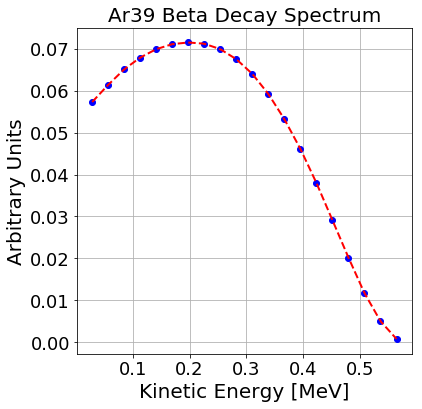

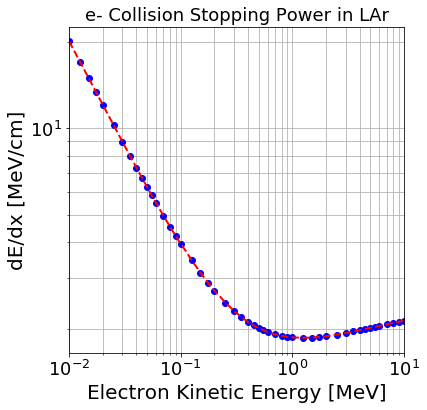

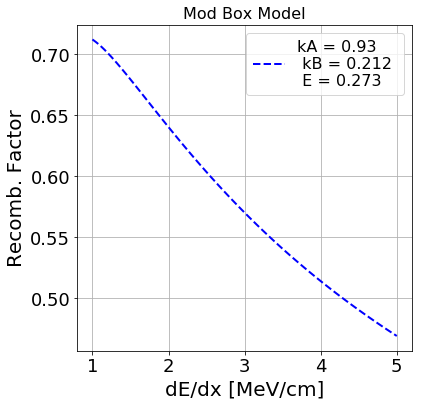

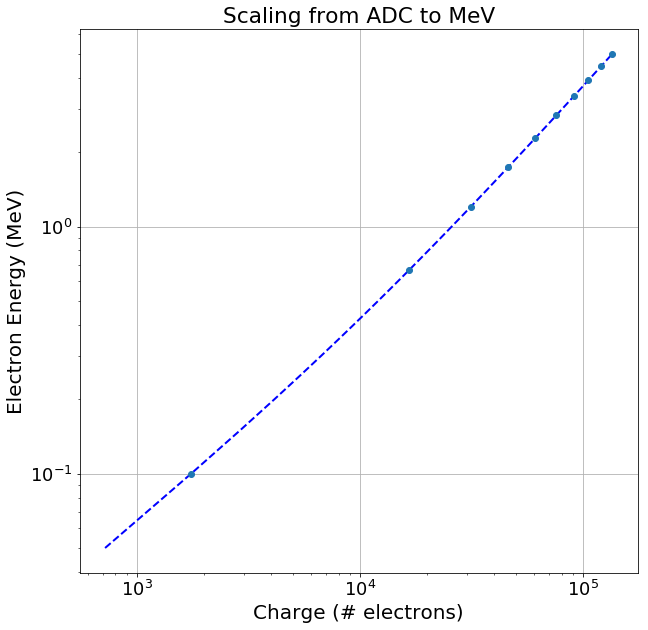

In [162]:
#*##########################################################################*#
#################**        Energy Reconstruction            **################
#*##########################################################################*#


# Argon properties
#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic',fill_value='extrapolate')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)


def E_recoY_off_run1_G10(df,gain):
    YQ_off_run1_G10  = df['sps_cluster_charge']
    QrecoY_off_run1_G10 = YQ_off_run1_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_G10 = fQ2E(QrecoY_off_run1_G10)
    return ErecoY_off_run1_G10

In [30]:
#*##########################################################################*#
##################**        Summing Techniques            **##################
#*##########################################################################*#

import time

def checkBlipSDev(df_to_test):
    df_to_test_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    goodEventNum = 0
    numEvents = 0
    for group_name, df_test_group in df_to_test_grouped:
        eventQs = []
        for q in df_test_group["sps_cluster_charge"]:
            eventQs.append(q)
        if len(eventQs) > 1:
            qStdev = np.std(eventQs)
            #print "Sum SPS q: ", np.sum(eventQs)," \tMean SPS q: ",np.mean(eventQs), "\tStdev q's: ",qStdev
            if qStdev > 1.01:
                goodEventNum += 1

        numEvents += 1
    print "Number events out of %s with variable SPS_q: "%(numEvents), goodEventNum
    print "Percent good events: ", 100*goodEventNum/numEvents
    
def countBlipMultiplicity(df_to_test,complete_df): #counts blip multiplicity around a max point
    numMaxPts = 6 #max number of clusters to sum
    multiplicityInRadius = []
    summedBlipEs = []
    
    df_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 6
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                if curr_Max_E < 0.45:    #Only want E > 0.500 MeV
                    break
                maxesUsed+=1
                multiplicity = 1
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                nearby_blips = complete_df.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
            elif maxesUsed == numMaxPts:
                break
                
        counter+=1
        if counter > 3000:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius    
    

def countBlipMultiplicityNew(df_to_test,complete_df,minStartingGroupNum,maxEventNum=3000):
    numMaxPts = 8 #max number of clusters to sum
    multiplicityInRadius = []
    summedBlipEs = []
    
    df_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    #minStartingGroupNum=3300 #Group number to start on, should be > 0 if early part of file processed already
    
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 7
        if counter > minStartingGroupNum:
            for j in range(len(df_group)):
                if len(SPS_Es_in_event) > 0:
                    curr_Max_E = max(SPS_Es_in_event)
                    if curr_Max_E < 0.30:    #Only want E > 0.300 MeV
                        break
                    maxesUsed+=1
                    multiplicity = 1
                    maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                    usedEnergies.append(curr_Max_E)
                    SPS_Es_in_event.remove(curr_Max_E)
                    maxMember = df_group.iloc[maxIndex] 
                    blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                    nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                    #Next line: 15 cm box around max blip:
                    nearby_blips = complete_df.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-30.0,blip_x+30.0,blip_y-30.0,blip_y+30.0,blip_z-15.0,blip_z+30.0))
                    completeNearbyEs = nearby_blips["energy"].agg(list)

                    nearbyESums = curr_Max_E
                    for nearE in completeNearbyEs:
                        if nearE not in usedEnergies:
                            usedEnergies.append(nearE)
                            nearbyESums += nearE
                            multiplicity += 1
                            if nearE in SPS_Es_in_event:
                                SPS_Es_in_event.remove(nearE)
                    multiplicityInRadius.append(multiplicity)
                    summedBlipEs.append(nearbyESums)
                elif maxesUsed == numMaxPts:
                    break

        counter+=1
        if counter > maxEventNum:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius 
 
def countBlipMultiplicityNewCompleteDFOnly(df_to_test,minStartingGroupNum=0,maxEventNum=3000): #Counts multiplicity, but doesn't work for regions
    numMaxPts = 8 #max number of clusters to sum
    multiplicityInRadius = []
    summedBlipEs = []
    
    df_grouped = df_to_test.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    #minStartingGroupNum=3500
    for group_name, df_group in df_grouped:
        if counter > minStartingGroupNum:
            usedEnergies = []
            SPS_Es_in_event = df_group["energy"].agg(list)
            maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 7
            for j in range(len(df_group)):
                if len(SPS_Es_in_event) > 0:
                    curr_Max_E = max(SPS_Es_in_event)
                    if curr_Max_E < 0.30:    #Only want E > 0.300 MeV
                        break
                    maxesUsed+=1
                    multiplicity = 1
                    maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                    usedEnergies.append(curr_Max_E)
                    SPS_Es_in_event.remove(curr_Max_E)
                    maxMember = df_group.iloc[maxIndex] 
                    blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                    nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                    #Next line: 15 cm box around max blip:
                    nearby_blips = df_group.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-30.0,blip_x+30.0,blip_y-30.0,blip_y+30.0,blip_z-15.0,blip_z+30.0))
                    completeNearbyEs = nearby_blips["energy"].agg(list)

                    nearbyESums = curr_Max_E
                    for nearE in completeNearbyEs:
                        if nearE not in usedEnergies:
                            usedEnergies.append(nearE)
                            nearbyESums += nearE
                            multiplicity += 1
                            if nearE in SPS_Es_in_event:
                                SPS_Es_in_event.remove(nearE)
                    multiplicityInRadius.append(multiplicity)
                    summedBlipEs.append(nearbyESums)
                elif maxesUsed == numMaxPts:
                    break

        counter+=1
        #print "Num events processed: ",counter
        if counter > maxEventNum:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius     
    
    
def DistTweenTwoPoints(memberA,memberB):
    xA = memberA["sps_x"]
    yA = memberA["sps_y"]
    zA = memberA["sps_z"]
    xB = memberB["sps_x"]
    yB = memberB["sps_y"]
    zB = memberB["sps_z"]
    deltaxSqd = ((xA-xB)**2)
    deltaySqd = ((yA-yB)**2)
    deltazSqd= ((zA-zB)**2)
    dist_from_A = np.sqrt(deltaxSqd+deltaySqd+deltazSqd)
    #print "x1,x2: (%s,%s)\ty1,y2: (%s,%s)\tz1,z2: (%s,%s)\t"%(xA,xB,yA,yB,zA,zB)
    #print "Distance: ",dist_from_A 
    return dist_from_A   

def DistTweenMaxNPoint(xA,yA,zA,memberB):
    xB = memberB["sps_x"]
    yB = memberB["sps_y"]
    zB = memberB["sps_z"]
    deltaxSqd = ((xA-xB)**2)
    deltaySqd = ((yA-yB)**2)
    deltazSqd= ((zA-zB)**2)
    dist_from_A = np.sqrt(deltaxSqd+deltaySqd+deltazSqd)
    #print "x1,x2: (%s,%s)\ty1,y2: (%s,%s)\tz1,z2: (%s,%s)\t"%(xA,xB,yA,yB,zA,zB)
    #print "Distance: ",dist_from_A 
    return dist_from_A  

def distancesFromPt(Loc,thisGroup):#distance between one blip and all other blips in event
    distances = []
    deltaxSqds = []
    deltaySqds = []
    deltazSqds = []
    xMaxSPSQ = Loc["sps_x"]
    yMaxSPSQ = Loc["sps_y"]
    zMaxSPSQ = Loc["sps_z"]
    #print "x: ",xMaxSPSQ," y: ",yMaxSPSQ," z: ",zMaxSPSQ," "
    #print xMaxSPSQ," ",yMaxSPSQ," ",zMaxSPSQ
    for x in thisGroup["sps_x"]:
        deltaxSqds.append((xMaxSPSQ-x)**2)
    for y in thisGroup["sps_y"]:
        deltaySqds.append((yMaxSPSQ-y)**2)
    for z in thisGroup["sps_z"]:
        deltazSqds.append((zMaxSPSQ-z)**2)
    for i in range(len(deltaxSqds)):
        dist_from_m = np.sqrt(deltaxSqds[i]+deltaySqds[i]+deltazSqds[i])
        #print "distfromm: ",dist_from_m
        if dist_from_m > 0.05: #If not the max point...
            distances.append(np.sqrt(deltaxSqds[i]+deltaySqds[i]+deltazSqds[i]))
        else:
            distances.append(50000)
    return distances

def distancesFromPtSlick(ptLoc,thisGroup,NumRows): #Slicker, but actually slower by factor of 10)
    f_distances = []
    for k in range(NumRows):
        rowk = thisGroup.iloc[k]
        dist_from_pt = np.sqrt((((ptLoc["sps_x"])-(rowk["sps_x"]))**2)+(((ptLoc["sps_y"])-(rowk["sps_y"]))**2)+(((ptLoc["sps_z"])-(rowk["sps_z"]))**2))
        if dist_from_pt > 0.05: #If not the max point...
            f_distances.append(dist_from_pt)
        else:
            f_distances.append(50000)

    return f_distances

def fractionAboveEnergy(thisDF,E_lower_bound):
    #print "working location"
    all_energies = thisDF["energy"]
    thisDF_E_cut = thisDF.query('energy>%s'%(E_lower_bound))
    cut_energies = thisDF_E_cut["energy"]
    print "Fraction: ", (float(len(cut_energies))/float(len(all_energies))),"\n From ", len(cut_energies), " out of total ", len(all_energies)

def fractionEnergiesWithNoNeutrinos(thisDF):
    #Fraction for SPS branch... should do for event branch
    cNoNu = 'neutrinos == 0 and neutrinoshowers==0 and cosmic_trk_50==0' 
    #print "working location"
    all_energies = thisDF["energy"]
    thisDF_Nu_cut = thisDF.query(cNoNu)
    cut_energies = thisDF_Nu_cut["energy"]
    print "Fraction: ", (float(len(cut_energies))/float(len(all_energies))),"\n From ", len(cut_energies), " out of total ", len(all_energies)

def fractionWithNoNeutrinos(thisDF):
    #Fraction for SPS branch... should do for event branch
    cNoNu = 'neutrinos == 0 and neutrinoshowers==0 and cosmic_trk_50==0' 
    #print "working location"
    all_energies = thisDF["energy"]
    thisDF_Nu_cut = thisDF.query(cNoNu)
    cut_energies = thisDF_Nu_cut["energy"]
    print "Fraction: ", (float(len(cut_energies))/float(len(all_energies))),"\n From ", len(cut_energies), " out of total ", len(all_energies)

def fractionEVTsWithNoNeutrinos(thisDF_EVT):
    evt_times = thisDF_EVT["evttime"]
    thisDF_Nu_cut = thisDF_EVT.query(cNoNu)
    cut_evt_ts = thisDF_Nu_cut["evttime"]
    print "Fraction events with no neutrinos: ", (float(len(cut_evt_ts ))/float(len(evt_times))),"\n Or ", len(cut_evt_ts), " out of total ", len(evt_times)
   
    

#df_G10_off_cut_grouped = df_G10_off_cut.groupby(["N_Run","N_SubRun","N_Event"])
def groupDataEventsAndAddMaxSPS(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxq = df_group["sps_cluster_charge"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxq > -0.01:
            maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        #print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxSPSs.append(eventMaxq)
            qindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxq+SPS_qs_in_event[qindex])
            #print "Sum q's: ",summedCloseClusters
    return maxSPSs,summedCloseClusters


def groupDataEventsAndAddMaxSPSConditional(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxq = df_group["sps_cluster_charge"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxq > -0.01:
            maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxSPSs.append(eventMaxq)
            qindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxq+SPS_qs_in_event[qindex])
            #print "Sum q's: ",summedCloseClusters
    return maxSPSs,summedCloseClusters

def groupDataEventsAndAddArbSPSPlusNeighbor(thisDF): #Add the first SPS pt charge to neighby neighbors
    summedCloseClusters = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    ArbSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #print df_grouped.head()
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].first().count() #counting number of unique events
    j = 0
    for group_name, df_group in df_grouped:
        SPS_qs_in_event = df_group["sps_cluster_charge"].agg(list)
        minq = min(SPS_qs_in_event)
        eventArbQ = SPS_qs_in_event[0]
        if eventArbQ > -0.01 and eventArbQ>minq and len(SPS_qs_in_event)>0:
            ArbLocation = df_group.iloc[0]
        elif eventArbQ > -0.01 and eventArbQ==minq and len(SPS_qs_in_event)>1:
            eventArbQ = SPS_qs_in_event[1]
            ArbLocation = df_group.iloc[1]
            #maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        distancesfromArb = distancesFromPt(ArbLocation,df_group)
        if len(distancesfromArb) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            for i in range(len(distancesfromArb)):#sort charges by proximity
                qlocs=[]
                qlocs.append([distancesfromArb[i],SPS_qs_in_event[i]])
                qlocs=np.array(qlocs)
                qlocs=qlocs[qlocs[:, 0].argsort()]
            summedQ = eventArbQ
            if qlocs[0,0] > 0 and qlocs[0,0] < 20:    #add to chosen blip if close enough, do same for next closest
                    summedQ += qlocs[0,1]
                    if len(qlocs) > 1:
                        if qlocs[1,0] > 0 and qlocs[1,0] < 40:
                            summedQ += qlocs[1,1]
            summedCloseClusters.append(summedQ)
            ArbSPSs.append(eventArbQ)
        #j+=1
        #if j > 7:
        #    break
    return ArbSPSs,summedCloseClusters

def returnMaxBlipEs(thisDF):
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMaxE = df_group["energy"].max()
        maxSPSs.append(eventMaxE)
    return maxSPSs

def plotMaxBlipLocs(thisDF):
    #print "working location"
    thisDF_cut = thisDF.query('energy>2.3' )
    fig = plt.figure(figsize=(12,7))
    plt.hist2d(thisDF_cut['sps_z'].values,thisDF_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
    plt.colorbar()
    plt.title("SPS, Events with E > 2.3 MeV")
    plt.xlabel('Z')
    plt.ylabel('Y')

plt.tight_layout()

def returnMaxBlipQs(thisDF):
    maxSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["sps_cluster_charge"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMaxq = df_group["sps_cluster_charge"].max()
        maxSPSs.append(eventMaxq)
    return maxSPSs

def returnMaxBlipsPlusNeighbors(thisDF,completeDetDF,summingRadius):
    numMaxPts = 4 #max number of clusters to sum
    
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    multiplicityInRadius = []
    
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 3
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0 and maxesUsed < numMaxPts:
                curr_Max_E = max(SPS_Es_in_event)
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxesUsed+=1
                multiplicity = 1
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
            elif maxesUsed == numMaxPts:
                break
                
        counter+=1
        if counter > 1600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius    

def returnMinBlipEs(thisDF):
    minSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of min SPS points: ", df_grouped["energy"].min().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMinE = df_group["energy"].min()
        if eventMinE < -10000.0 or eventMinE > 10000.0:
            continue
        minSPSs.append(eventMinE)
    return minSPSs

def returnMinBlipQs(thisDF):
    minSPSs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of min SPS points: ", df_grouped["sps_cluster_charge"].min().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        eventMinq = df_group["sps_cluster_charge"].min()
        minSPSs.append(eventMinq)
    return minSPSs

def returnMinBlipsAndMultiplicityAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventMins = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Min_E = min(SPS_Es_in_event)
                if curr_Min_E < -10000.0 or curr_Min_E > 10000.0:    #Exclude crazy outliers
                    break
                eventMins.append(curr_Min_E)
                multiplicity = 1
                minIndex = SPS_Es_in_event.index(curr_Min_E) 
                usedEnergies.append(curr_Min_E)
                SPS_Es_in_event.remove(curr_Min_E)
                minMember = df_group.iloc[minIndex] 
                blip_x,blip_y,blip_z = minMember["sps_x"],minMember["sps_y"],minMember["sps_z"]
                nRun,nSubRun,nEvent = minMember["N_Run"],minMember["N_SubRun"],minMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Min_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 2700:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventMins, summedBlipEs,multiplicityInRadius
     

def returnMultiplicityEsBinned(multiplicities,EsForMultiplicities):
    df_mult = pd.DataFrame({'multiplicities':multiplicities, 'Es':EsForMultiplicities})
    return df_mult
    
    
def sumMaxClusterEnergiesWithNeighbors(thisDF):
    summedCloseClusters = [] #for max SPS_Q in an event + nearest neighbor
    maxEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of max SPS points: ", df_grouped["energy"].max().count() #counting number of unique events
    #Here, we're cycling through all the stuff in one event -- since we're on SPS branch, this is a collection of SPS points
    for group_name, df_group in df_grouped:
        #print df_group[group_name]
        #print df_group
        #print "\nDf_group EV min: ",df_group["sps_cluster_charge"].min()

        eventMaxE = df_group["energy"].max()
        #print "EventMaxq: ",eventMaxq
        if eventMaxE > -0.01:
            maxLocation = df_group.loc[df_group["energy"].idxmax()]
        else:
            continue

        SPS_Es_in_event = df_group["energy"].agg(list)
        distancesfromMax = distancesFromPt(maxLocation,df_group)
        #print "d's: ",distancesfromMax

        if len(distancesfromMax) != len(SPS_Es_in_event):
            print "Length mismatch... in distances and q's"
        else:
            maxEs.append(eventMaxE)
            Eindex = distancesfromMax.index(min(distancesfromMax))
            summedCloseClusters.append(eventMaxE+SPS_Es_in_event[Eindex])
            #print "Sum q's: ",summedCloseClusters
    return maxEs,summedCloseClusters

def sumNearbyClusterEnergiesOld(thisDF):
    summedCloseClusters = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #print df_grouped.head()
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    j = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        minE = min(SPS_Es_in_event)
        eventE = SPS_Es_in_event[0]
        if eventE > -0.01 and eventE>minq and len(SPS_qs_in_event)>0:
            ArbLocation = df_group.iloc[0]
        elif eventE > -0.01 and eventE==minq and len(SPS_qs_in_event)>1:
            eventE = SPS_qs_in_event[1]
            ArbLocation = df_group.iloc[1]
            #maxLocation = df_group.loc[df_group["sps_cluster_charge"].idxmax()]
        else:
            continue

        distancesfromArb = distancesFromPt(ArbLocation,df_group)
        if len(distancesfromArb) != len(SPS_qs_in_event):
            print "Length mismatch... in distances and q's"
        else:
            for i in range(len(distancesfromArb)):#sort charges by proximity
                qlocs=[]
                qlocs.append([distancesfromArb[i],SPS_qs_in_event[i]])
                qlocs=np.array(qlocs)
                qlocs=qlocs[qlocs[:, 0].argsort()]
            summedQ = eventE
            if qlocs[0,0] > 0 and qlocs[0,0] < 20:    #add to chosen blip if close enough, do same for next closest
                    summedQ += qlocs[0,1]
                    if len(qlocs) > 1:
                        if qlocs[1,0] > 0 and qlocs[1,0] < 40:
                            summedQ += qlocs[1,1]
            summedCloseClusters.append(summedQ)
            eventEs.append(eventE)
        #j+=1
        #if j > 7:
        #    break
    return eventEs,summedCloseClusters

def sumNearbyClusterEnergies(thisDF):
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        used_members = [] #stores indices of group member blips already summed up
        for j in range(len(df_group)):
            if j in used_members:#skips blips if already added
                continue
            else:
                used_members.append(j)
                #print df_group.iloc[j]
                member = df_group.iloc[j]        
                blipE = member["energy"]
                eventEs.append(blipE)
                nearbyESums = blipE
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        if k not in used_members:
                            nextMember = df_group.iloc[k]
                            thisDistance = DistTweenTwoPoints(member,nextMember)
                            if thisDistance > 0 and thisDistance < 30:  #If close to first blip, add the energy in, put on list of already added blips
                                nearBlipE = nextMember["energy"]
                                nearbyESums+= nearBlipE
                                eventEs.append(nearBlipE)
                                used_members.append(k)
                summedBlipEs.append(nearbyESums)
        counter+=1
        if counter > 1000:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs

def sumClusterEnergiesOnly(thisDF):
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        used_members = [] #stores indices of group member blips already summed up
        for j in range(len(df_group)):
            if j in used_members:#skips blips if already added
                continue
            else:
                used_members.append(j)
                #print df_group.iloc[j]
                member = df_group.iloc[j]        
                blipE = member["energy"]
                eventEs.append(blipE)
                nearbyESums = blipE
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        if k not in used_members:
                            nextMember = df_group.iloc[k]
                            thisDistance = DistTweenTwoPoints(member,nextMember)
                            if thisDistance > 0 and thisDistance < 40:  #If close to first blip, add the energy in, put on list of already added blips
                                nearBlipE = nextMember["energy"]
                                nearbyESums+= nearBlipE
                                eventEs.append(nearBlipE)
                                used_members.append(k)
                                
                                if (k+1) < len(df_group): #now check blips near this blip
                                    for l in range((k+1),len(df_group)):
                                        if l not in used_members:
                                            nextnextMember = df_group.iloc[l]
                                            thisDistance = DistTweenTwoPoints(nextMember,nextnextMember)
                                            if thisDistance > 0 and thisDistance < 40:  #If close to first blip, add the energy in, put on list of already added blips
                                                nearBlipE = nextnextMember["energy"]
                                                nearbyESums+= nearBlipE
                                                eventEs.append(nearBlipE)
                                                used_members.append(l)                     
                
                if nearbyESums > blipE:
                    summedBlipEs.append(nearbyESums)
                elif nearbyESums < blipE:
                    print "Energy summing error"
        counter+=1
        if counter > 150000:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs

def sumMaxAndNeighborsInRadius(thisDF,summingRadius): #sum blips within summing radius
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        print counter
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                #if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                #    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                eventEs.append(curr_Max_E)
                nearbyESums = curr_Max_E
                multiplicity = 1
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        nextMember = df_group.iloc[k]
                        nextE = nextMember["energy"]
                        if nextE in SPS_Es_in_event:
                            thisDistance = DistTweenMaxNPoint(blip_x,blip_y,blip_z,nextMember)
                            if thisDistance > 0.0 and thisDistance < summingRadius:  #If close to first blip, add the energy in, put on list of already added blips
                                multiplicity += 1
                                SPS_Es_in_event.remove(nextE)
                                nearbyESums+= nextE
                                eventEs.append(nextE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius

def sumMaxAndNeighborsInRadiusAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                eventEs.append(curr_Max_E)
                multiplicity = 1
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                            eventEs.append(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 2700:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius

def sumMaxAndNeighborsInRadiusAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    #cd_grouped = completeDetDF(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                eventEs.append(curr_Max_E)
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                multiplicity = 1
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nRun,nSubRun,nEvent = maxMember["N_Run"],maxMember["N_SubRun"],maxMember["N_Event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(N_Run == %s) and (N_SubRun == %s) and(N_Event == %s) and (sps_x > %s and sps_x < %s) and (sps_y > %s and sps_y < %s) and (sps_z>%s and sps_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in SPS_Es_in_event:
                            SPS_Es_in_event.remove(nearE)
                            eventEs.append(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 1600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius

def sumOnlyMultiBlipsEvents(thisDF,summingRadius): #sum blips within summing radius
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["N_Run","N_SubRun","N_Event"])
    print "Number of events with energies: ", df_grouped["energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["energy"].agg(list)
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                #if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                #    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["sps_x"],maxMember["sps_y"],maxMember["sps_z"]
                nearbyESums = curr_Max_E
                multiplicity = 1
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        nextMember = df_group.iloc[k]
                        nextE = nextMember["energy"]
                        if nextE in SPS_Es_in_event:
                            thisDistance = DistTweenMaxNPoint(blip_x,blip_y,blip_z,nextMember)
                            if thisDistance > 0.0 and thisDistance < summingRadius:  #If close to first blip, add the energy in, put on list of already added blips
                                multiplicity += 1
                                SPS_Es_in_event.remove(nextE)
                                nearbyESums+= nextE
                                eventEs.append(nextE)
                
                multiplicityInRadius.append(multiplicity)
                if multiplicity > 1:
                    summedBlipEs.append(nearbyESums)
                
        counter+=1
        if counter > 600:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return summedBlipEs,multiplicityInRadius


<Figure size 432x288 with 0 Axes>

In [246]:
#Reads data arrays from multiplicity files, adding even rows
def readArraysFromFile(fileName): 
    with open(fileName) as readFile:
        i=0
        lines=[]
        for line in readFile:
            ar = line.strip('[]')
            #ar1 = ar.strip(']')
            temp_array = ar.split(',')
            #print temp_array[(len(temp_array)-1)]
            temp_array[(len(temp_array)-1)]=temp_array[(len(temp_array)-1)].strip(']\n')
            #print temp_array[(len(temp_array)-1)]
            if (i%2)==0:
                temp_array = list(map(float, temp_array)) 
            else:
                temp_array = list(map(int, temp_array)) 
            lines.append(temp_array)
            i+=1
    if len(lines)== 2:
        return lines[0],lines[1]
    elif len(lines) == 4:
        return lines[0]+lines[2],lines[1]+lines[3]       
    elif len(lines) == 6:
        return lines[0]+lines[2]+lines[4],lines[1]+lines[3]+lines[5]       
    elif len(lines) == 8:
        return lines[0]+lines[2]+lines[4]+lines[6],lines[1]+lines[3]+lines[5]+lines[7]  
    elif len(lines) == 10:
        return lines[0]+lines[2]+lines[4]+lines[6]+lines[8],lines[1]+lines[3]+lines[5]+lines[7]+lines[9]
    elif len(lines) == 12:
        return lines[0]+lines[2]+lines[4]+lines[6]+lines[8]+lines[10],lines[1]+lines[3]+lines[5]+lines[7]+lines[9]+lines[11]
    else:
        print "Error: number of lines too long, uneven or short."

def saveLinesToFile(fileName,var1,var2):
    if len(var1) == len(var2):
        with open(fileName, 'a') as file1:
            #for i in range(len(var1)):
                #lineOfData=str(var1)+" "+str(var2)+"\n"
                print "Writing 1st array:"
                file1.write(str(var1)+"\n")
                print "Writing 2nd array:"
                file1.write(str(var2)+"\n")            
    else:
        print "Variable arrays have different lengths. Check your inputs."

        
    

In [165]:



##################### 30 cm, 10 cm, 10 cm cone cuts ##################### 
df_ryan_beamoff_lowthresh_30cmr1 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr7,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr1_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr1,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr2 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr2,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr2_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr2,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr3 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr3,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr3_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr3,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr4 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr4,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr4_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr4,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr5 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr5,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr5_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr5,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_30cmr6 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr6,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_30cmr6_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_30cmr6,BRANCH_EVT) )

df_ryan_beamoff_lowthresh_30cmr = pd.concat([df_ryan_beamoff_lowthresh_30cmr1,df_ryan_beamoff_lowthresh_30cmr2,df_ryan_beamoff_lowthresh_30cmr3,df_ryan_beamoff_lowthresh_30cmr4,df_ryan_beamoff_lowthresh_30cmr5,df_ryan_beamoff_lowthresh_30cmr6])
df_ryan_beamoff_lowthresh_30cmr_EVT = pd.concat([df_ryan_beamoff_lowthresh_30cmr1_EVT,df_ryan_beamoff_lowthresh_30cmr2_EVT,df_ryan_beamoff_lowthresh_30cmr3_EVT,df_ryan_beamoff_lowthresh_30cmr4_EVT,df_ryan_beamoff_lowthresh_30cmr5_EVT,df_ryan_beamoff_lowthresh_30cmr6_EVT])


df_ryan_beamoff_lowthresh_30cmr['energy']=E_recoY_off_run1_G10(df_ryan_beamoff_lowthresh_30cmr,238.4)
df_ryan_beamoff_lowthresh_30cmr_g10=df_ryan_beamoff_lowthresh_30cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')#  and neutrinos==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_30cmr_rest_det=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000)')#   and neutrinos ==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_30cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')#  and neutrinos==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8)')#  and neutrinos ==0 and cosmic_trk_50==0')



In [166]:
myfile_beam_off_cone='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_v08_00_00_12_run1_reco2_cone_hadd.root'
df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )
cNu = 'neutrinos > 0 and neutrinoshowers==0 and cosmic_trk_50==0'
df_Sps_beam_off_yes_nu = df_Sps_beam_off_cone.query(cNu)

In [167]:
##################### 15 cm, 5 cm, 5 cm cone cuts ##################### 
df_ryan_beamoff_lowthresh_15cmr1 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr7,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr1_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr1,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_15cmr2 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr2,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr2_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr2,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_15cmr3 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr3,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr3_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr3,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_15cmr4 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr4,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr4_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr4,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_15cmr5 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr5,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr5_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr5,BRANCH_EVT) )
df_ryan_beamoff_lowthresh_15cmr6 = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr6,BRANCH_SPS) )
df_ryan_beamoff_lowthresh_15cmr6_EVT = pd.DataFrame( root2array(ryan_beamoff_lowthresh_15cmr6,BRANCH_EVT) )

df_ryan_beamoff_lowthresh_15cmr = pd.concat([df_ryan_beamoff_lowthresh_15cmr1,df_ryan_beamoff_lowthresh_15cmr2,df_ryan_beamoff_lowthresh_15cmr3,df_ryan_beamoff_lowthresh_15cmr4,df_ryan_beamoff_lowthresh_15cmr5,df_ryan_beamoff_lowthresh_15cmr6])
df_ryan_beamoff_lowthresh_15cmr_EVT = pd.concat([df_ryan_beamoff_lowthresh_15cmr1_EVT,df_ryan_beamoff_lowthresh_15cmr2_EVT,df_ryan_beamoff_lowthresh_15cmr3_EVT,df_ryan_beamoff_lowthresh_15cmr4_EVT,df_ryan_beamoff_lowthresh_15cmr5_EVT,df_ryan_beamoff_lowthresh_15cmr6_EVT])


df_ryan_beamoff_lowthresh_15cmr['energy']=E_recoY_off_run1_G10(df_ryan_beamoff_lowthresh_15cmr,238.4)
df_ryan_beamoff_lowthresh_15cmr_g10=df_ryan_beamoff_lowthresh_15cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')#  and neutrinos ==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_15cmr_rest_det=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000)')#  and neutrinos ==0 and cosmic_trk_50==0 ')
df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_15cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')#  and neutrinos ==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8)')#  and neutrinos ==0 and cosmic_trk_50==0')



In [168]:
df_ryan_beamoff_lowthresh_30cmr.head(10)
df_ryan_beamoff_lowthresh_15cmr_EVT.head(10)
events15cmEvent_cluster_charge = df_ryan_beamoff_lowthresh_15cmr_EVT['Event_cluster_charge']
print len(events15cmEvent_cluster_charge)
events30cmEvent_cluster_charge = df_ryan_beamoff_lowthresh_30cmr_EVT['Event_cluster_charge']
print len(events30cmEvent_cluster_charge)


6465
6515


In [169]:
df_ryan_beamoff_lowthresh_15cmr.head(50)

evttime       sps_x       sps_y       sps_z    distance  \
0   1530976383  168.980347  -47.181011    6.514383  175.564354   
1   1530976383   66.320938   61.245369   22.871710   93.126673   
2   1530976383  164.926605  -27.522236   29.100000  169.720560   
3   1530976383  164.926605  -27.522236   29.100000  169.720560   
4   1530976383  198.959442  -22.845699   30.507566  202.577139   
5   1530976383  198.959442  -22.845699   30.507566  202.577139   
6   1530976383  252.943604  116.151382   38.099998  280.932768   
7   1530976383  252.943604  116.151382   38.099998  280.932768   
8   1530976383  133.605011  -82.081833   49.023857  164.289576   
9   1530976383    6.109725  -35.836079   50.099998   61.899621   
10  1530976383    6.109725  -35.836079   50.099998   61.899621   
11  1530976383  137.985565  -36.442299   52.303383  151.999017   
12  1530976383  180.485458  100.476318   76.800003  220.383148   
13  1530976383  180.485458  100.476318   76.800003  220.383148   
14  1530976383  122.646965  -33.238003   82.199997  151.340287   
15  1530976383  122.646965  -33.238003   82.199997  151.340287   
16  1530976383   51.227562  -72.988571  113.024841  143.966001   
17  1530976383   15.968210   46.955948  139.896179  148.427712   
18  1530976383   15.968210   46.955948  139.896179  148.427712   
19  1530976383   88.310982 -110.054459  150.147995  206.046679   
20  1530976383  112.763321 -114.384583  161.399994  227.704539   
21  1530976383  112.763321 -114.384583  161.399994  227.704539   
22  1530976383   17.255947  100.476318  164.399994  193.444091   
23  1530976383   17.255947  100.476318  164.399994  193.444091   
24  1530976383  101.269577 -100.354973  171.300003  222.868434   
25  1530976383  101.269577 -100.354973  171.300003  222.868434   
26  1530976383   72.383018   71.551071  189.801819  215.368493   
27  1530976383   72.383018   71.551071  189.801819  215.368493   
28  1530976383  248.013458   -6.997434  201.300003  319.501691   
29  1530976383  248.013458   -6.997434  201.300003  319.501691   
30  1530976383   65.785004  -75.326836  203.699997  226.926172   
31  1530976383   65.785004  -75.326836  203.699997  226.926172   
32  1530976383   48.922127  113.986313  211.800003  245.449578   
33  1530976383   48.922127  113.986313  211.800003  245.449578   
34  1530976383  222.692886 -101.221001  218.399994  327.927385   
35  1530976383  222.692886 -101.221001  218.399994  327.927385   
36  1530976383   27.718048  115.804970  221.307343  251.308617   
37  1530976383  251.926544   75.361580  258.299988  368.599017   
38  1530976383  251.926544   75.361580  258.299988  368.599017   
39  1530976383  170.968201  -41.551846  267.000000  319.758786   
40  1530976383  170.968201  -41.551846  267.000000  319.758786   
41  1530976383  190.462540  -30.813133  302.100006  358.454798   
42  1530976383  190.462540  -30.813133  302.100006  358.454798   
43  1530976383  177.840042   60.379341  338.100006  386.761373   
44  1530976383  177.840042   60.379341  338.100006  386.761373   
45  1530976383  206.869934  -18.688776  347.700012  405.018195   
46  1530976383  206.869934  -18.688776  347.700012  405.018195   
47  1530976383   28.966755  113.639908  373.799988  391.764639   
48  1530976383  181.126526  -89.443054  372.899994  424.100559   
49  1530976383  181.126526  -89.443054  372.899994  424.100559   

    sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  muon_px  \
0           120.072128     1113  17569        22       0.0  ...      0.0   
1           218.367615     1113  17569        22       0.0  ...      0.0   
2            19.131746     1113  17569        22       0.0  ...      0.0   
3            19.131746     1113  17569        22       0.0  ...      0.0   
4            28.366558     1113  17569        22       0.0  ...      0.0   
5            28.366558     1113  17569        22       0.0  ...      0.0   
6            29.855576     1113  17569        22       0.0  ...      0.0   
7            29.855576     1113 

4679


evttime       sps_x       sps_y      sps_z    distance  \
0  1530976383  168.980347  -47.181011   6.514383  175.564354   
1  1530976383   66.320938   61.245369  22.871710   93.126673   
2  1530976383  164.926605  -27.522236  29.100000  169.720560   
3  1530976383  198.959442  -22.845699  30.507566  202.577139   
4  1530976383  252.943604  116.151382  38.099998  280.932768   

   sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...       muon_px  \
0          120.072128     1113  17569        22       0.0  ...  6.416374e-10   
1          218.367615     1113  17569        22       0.0  ...  6.416374e-10   
2           19.131746     1113  17569        22       0.0  ...  6.416374e-10   
3           28.366558     1113  17569        22       0.0  ...  6.416374e-10   
4           29.855576     1113  17569        22       0.0  ...  6.416374e-10   

        muon_py       muon_pz  maxTrkLen  tracklength  distance_nu_smallest  \
0  1.269575e+19  5.294977e+25        0.0    82.479392            130.383506   
1  1.269575e+19  5.294977e+25        0.0    82.479392            130.383506   
2  1.269575e+19  5.294977e+25        0.0    82.479392            130.383506   
3  1.269575e+19  5.294977e+25        0.0    82.479392            130.383506   
4  1.269575e+19  5.294977e+25        0.0    82.479392            130.383506   

   cosmic_trk_50  pointdistance_trk_smallest  distance_trk_smallest    energy  
0              0                  160.395574               0.845759  1.104475  
1              0                  162.463940               0.508543  1.954941  
2              0                  147.981019              29.862652  0.217184  
3              0                  175.962570              44.712666  0.302590  
4              0                  286.102662              20.864623  0.316115  

[5 rows x 29 columns]

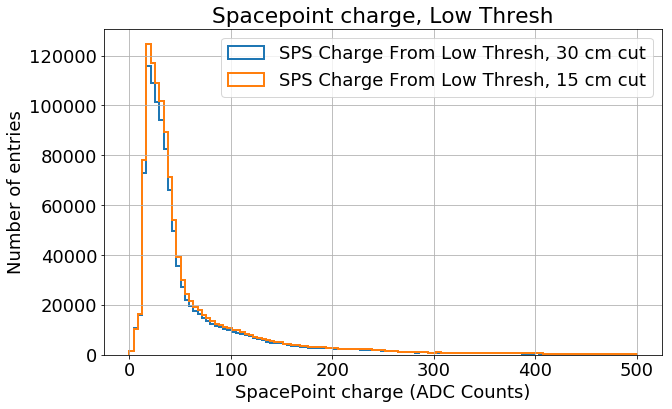

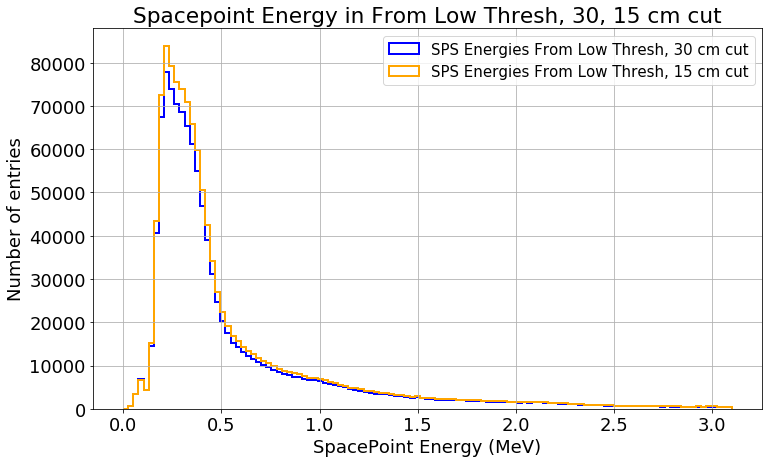

In [170]:
############# Low Thresh, 30cm Histograms ##############
print df_ryan_beamoff_lowthresh_30cmr['N_Event'].nunique()
df_ryan_beamoff_lowthresh_30cmr_q_vals = df_ryan_beamoff_lowthresh_30cmr['sps_cluster_charge']#.sample(104039)#.sample(95000)
df_ryan_beamoff_lowthresh_30cmr_E_vals = df_ryan_beamoff_lowthresh_30cmr['energy']
df_ryan_beamoff_lowthresh_15cmr_q_vals = df_ryan_beamoff_lowthresh_15cmr['sps_cluster_charge']#.sample(104039)#.sample(95000)
df_ryan_beamoff_lowthresh_15cmr_E_vals = df_ryan_beamoff_lowthresh_15cmr['energy']

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,500,120)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge From Low Thresh, 30 cm cut',normed=False)
offhist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_15cmr_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge From Low Thresh, 15 cm cut',normed=False)
#offhist2,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam OFF',normed=False)
#onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam ON',normed=False)
plt.title("Spacepoint charge, Low Thresh")
plt.xlabel('SpacePoint charge (ADC Counts)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

######### SPS / Blip Energy Hisograms ############
BINS = np.linspace(0,3.1,120)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm cut',color='blue',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_15cmr_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 15 cm cut',color='orange',normed=False)

#lowthresh_hist,b1,p1 = plt.hist(off_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies, old data, 15 cm cut',color='forestgreen',normed=False)

plt.title("Spacepoint Energy in From Low Thresh, 30, 15 cm cut")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_t_values = df_ryan_beamoff_lowthresh_30cmr['evttime']
#print "Total number of energies = ", len(gamma_E_vals), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr.head()





Low Thresh 15cm plotting...


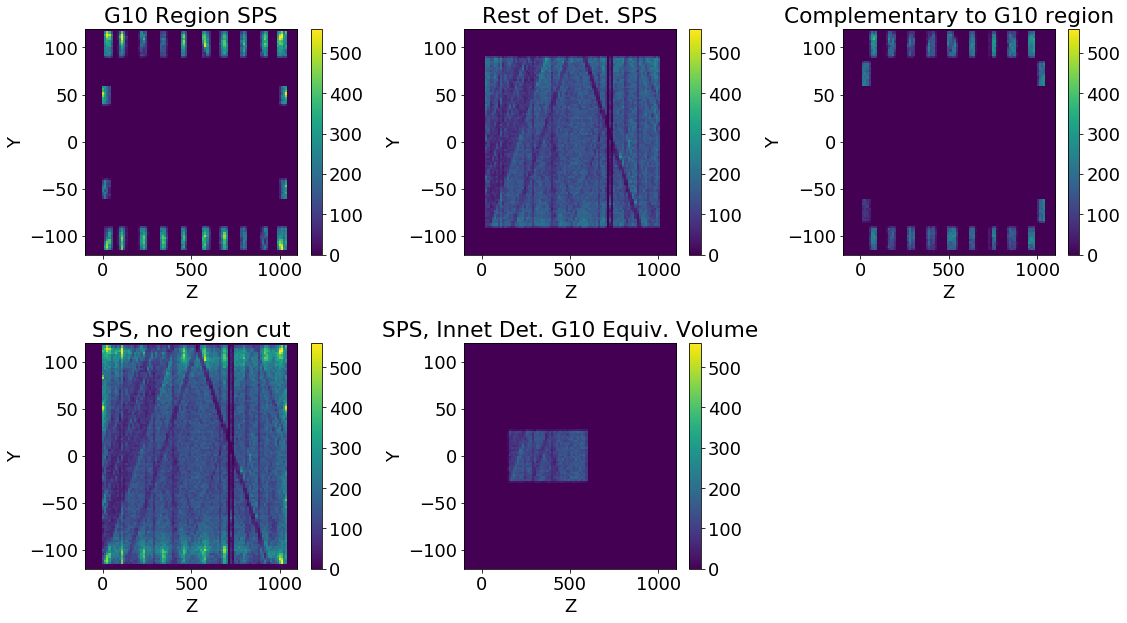

In [171]:
############################################ Low Threshold ############################################


#########   2D Region Plots for Low Threshold Files   #########  

df_ryan_beamoff_lowthresh_30cmr_G10=df_ryan_beamoff_lowthresh_30cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_ryan_beamoff_lowthresh_30cmr_rest_det=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_30cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')


############################################ Low Threshold 15cm ############################################


#########   2D Region Plots for Low Threshold Files   #########  

df_ryan_beamoff_lowthresh_15cmr_G10=df_ryan_beamoff_lowthresh_15cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_ryan_beamoff_lowthresh_15cmr_rest_det=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_15cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')



print "Low Thresh 15cm plotting..."
fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Region SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_rest_det['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_rest_det['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of Det. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary to G10 region")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, no region cut")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SPS, Innet Det. G10 Equiv. Volume")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

In [172]:
######### Multiplicity distributions g10 -- Multiplicity of blips in 20cm bubbles ############

#BINS = np.linspace(0,10,11)
#fig = plt.figure(figsize=(12,7))
#summedblips_LowThresh30cmg_g10, multiplicities_LowThresh30cm_g10 = countBlipMultiplicity(df_ryan_beamoff_lowthresh_30cmr_g10,df_ryan_beamoff_lowthresh_30cmr)
#plt.hist(multiplicities_LowThresh30cm_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity, Low Thresh 30cm',color='CornflowerBlue',fill=True,normed=False)

#plt.title("Low Thresh (30cm cut), Blip Multiplicity in 20cm on Max Pt. in g10")
#plt.xlabel('#Blips per sphere')
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')

#print np.mean(multiplicities_LowThresh30cm_g10)




In [173]:
######### Multiplicity distributions g10 -- Multiplicity of blips in 20cm bubbles ############

#BINS = np.linspace(0,10,11)
#fig = plt.figure(figsize=(12,7))
#summedblips_LowThresh15cmg_g10, multiplicities_LowThresh15cm_g10 = countBlipMultiplicity(df_ryan_beamoff_lowthresh_15cmr_g10,df_ryan_beamoff_lowthresh_15cmr)
#plt.hist(multiplicities_LowThresh15cm_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity, Low Thresh 15cm',color='Orange',fill=True,normed=False)

#plt.title("Low Thresh (15cm cut), Blip Multiplicity in 20cm on Max Pt. in g10")
#plt.xlabel('#Blips per sphere')
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')

#plt.ylim(0,1)
#plt.yscale('log')

#print np.mean(multiplicities_LowThresh15cm_g10)

Number of events with energies:  6081
Number of energy clusters in this DF:  53232  out of   energies total
1.4488277727682597


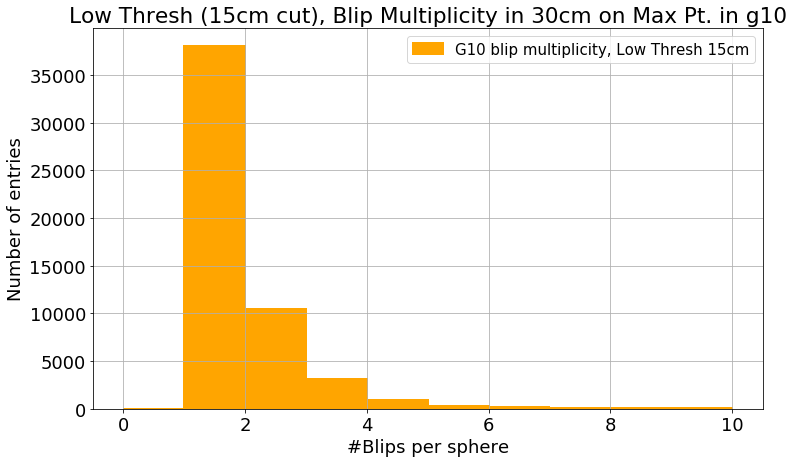

In [174]:
######### Multiplicity distributions g10 -- Multiplicity of blips in 20cm bubbles ############

BINS = np.linspace(0,10,11)
fig = plt.figure(figsize=(12,7))
summedblips_LowThresh15cmg_g10, multiplicities_LowThresh15cm_g10 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_g10,df_ryan_beamoff_lowthresh_15cmr,0,2500)
plt.hist(multiplicities_LowThresh15cm_g10,histtype='step',bins = BINS,lw=2,label='G10 blip multiplicity, Low Thresh 15cm',color='Orange',fill=True,normed=False)

plt.title("Low Thresh (15cm cut), Blip Multiplicity in 30cm on Max Pt. in g10")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')

print np.mean(multiplicities_LowThresh15cm_g10)

Number of events with energies:  6081
Number of energy clusters in this DF:  35200  out of   energies total
1.4488277727682597


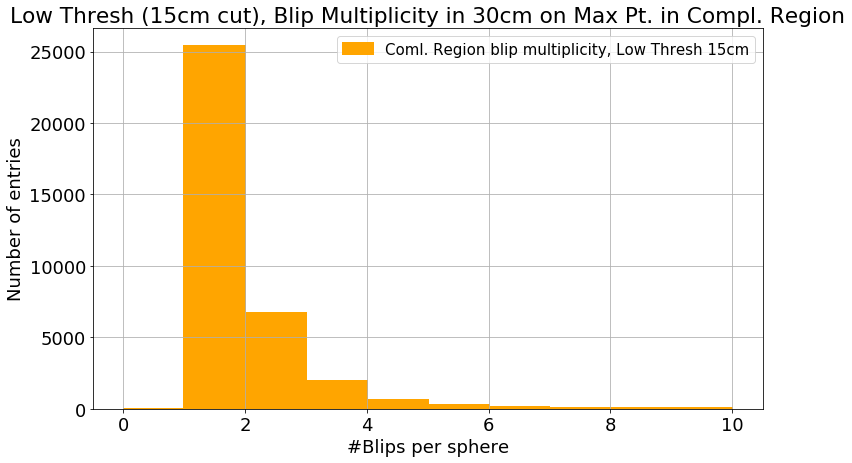

In [175]:
######### Multiplicity distributions Compl -- Multiplicity of blips in 30cm bubbles ############

BINS = np.linspace(0,10,11)
fig = plt.figure(figsize=(12,7))
summedblips_LowThresh15cmg_compl, multiplicities_LowThresh15cm_compl = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary,df_ryan_beamoff_lowthresh_15cmr,0,2500)
plt.hist(multiplicities_LowThresh15cm_compl,histtype='step',bins = BINS,lw=2,label='Coml. Region blip multiplicity, Low Thresh 15cm',color='Orange',fill=True,normed=False)

plt.title("Low Thresh (15cm cut), Blip Multiplicity in 30cm on Max Pt. in Compl. Region")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')

print np.mean(multiplicities_LowThresh15cm_g10)




In [176]:
#print np.mean(multiplicities_LowThresh30cm)
#print maxQs_LowThresh30cm
df_ryan_beamoff_lowthresh_30cmr1.head(21)

evttime       sps_x       sps_y       sps_z    distance  \
0   1530976383  168.980347  -47.181011    6.514383  175.564354   
1   1530976383   66.320938   61.245369   22.871710   93.126673   
2   1530976383  164.926605  -27.522236   29.100000  169.720560   
3   1530976383  198.959442  -22.845699   30.507566  202.577139   
4   1530976383  252.943604  116.151382   38.099998  280.932768   
5   1530976383   84.463989   82.896004   42.900002  125.882179   
6   1530976383  131.124527  -44.236526   47.426155  146.286541   
7   1530976383  133.605011  -82.081833   49.023857  164.289576   
8   1530976383    6.109725  -35.836079   50.099998   61.899621   
9   1530976383    6.109725  -35.836079   50.099998   61.899621   
10  1530976383  137.985565  -36.442299   52.303383  151.999017   
11  1530976383  155.288055  -91.521515   70.332146  193.486895   
12  1530976383  180.485458  100.476318   76.800003  220.383148   
13  1530976383  180.485458  100.476318   76.800003  220.383148   
14  1530976383  122.646965  -33.238003   82.199997  151.340287   
15  1530976383   51.227562  -72.988571  113.024841  143.966001   
16  1530976383   -0.177958   79.431900  126.804832  149.629288   
17  1530976383   -0.177958   79.431900  126.804832  149.629288   
18  1530976383   15.968210   46.955948  139.896179  148.427712   
19  1530976383   15.968210   46.955948  139.896179  148.427712   
20  1530976383   88.310982 -110.054459  150.147995  206.046679   

    sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  \
0           120.072128     1113  17569        22       0.0  ...   
1           218.367615     1113  17569        22       0.0  ...   
2            19.131746     1113  17569        22       0.0  ...   
3            28.366558     1113  17569        22       0.0  ...   
4            29.855576     1113  17569        22       0.0  ...   
5            25.909504     1113  17569        22       0.0  ...   
6           122.801140     1113  17569        22       0.0  ...   
7           112.945847     1113  17569        22       0.0  ...   
8            14.236603     1113  17569        22       0.0  ...   
9            14.236603     1113  17569        22       0.0  ...   
10           27.058485     1113  17569        22       0.0  ...   
11           44.748600     1113  17569        22       0.0  ...   
12           14.107176     1113  17569        22       0.0  ...   
13           14.107176     1113  17569        22       0.0  ...   
14           14.745010     1113  17569        22       0.0  ...   
15           42.974533     1113  17569        22       0.0  ...   
16           35.081299     1113  17569        22       0.0  ...   
17           35.081299     1113  17569        22       0.0  ...   
18          160.737701     1113  17569        22       0.0  ...   
19          160.737701     1113  17569        22       0.0  ...   
20         2416.098145     1113  17569        22       0.0  ...   

    neutrinotracks       muon_px       muon_py       muon_pz  maxTrkLen  \
0                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
1                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
2                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
3                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
4                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
5                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
6                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
7                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
8                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
9                0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
10               0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
11               0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
12               0  6.416374e-10  1.269575e+19  5.294977e+25        0.0   
13               0  6.416374e

Number of max SPS points:  6131
Number of max SPS points:  6131
Number of max SPS points:  6081
Number of max SPS points:  6080
Number of max SPS points:  6081
Number of max SPS points:  6081
Number of max SPS points:  6081
Number of max SPS points:  6080


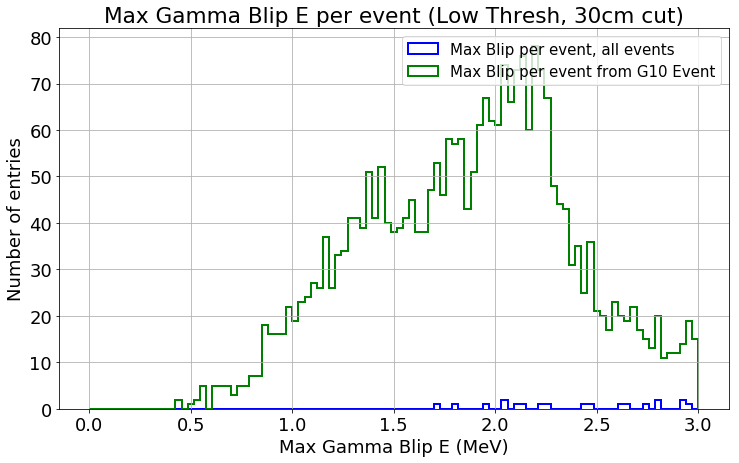

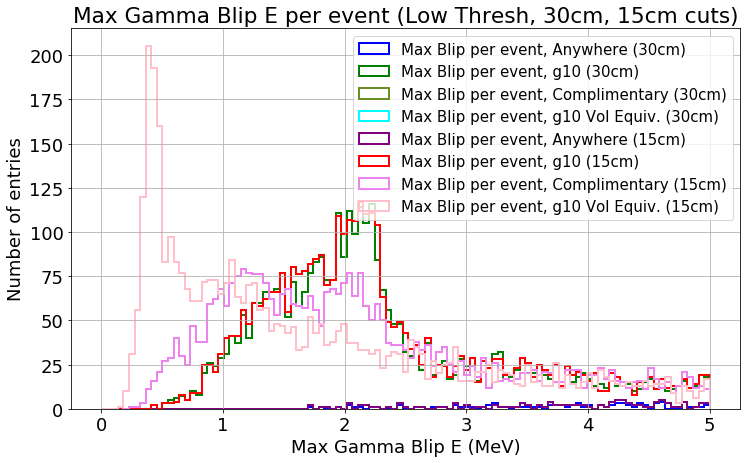

In [177]:


############### Plot Max Q's ############### 

BINS = np.linspace(0,1000,100)
maxEs_LowThresh30cm = returnMaxBlipEs(df_ryan_beamoff_lowthresh_30cmr)
maxEs_LowThresh30cm_g10 = returnMaxBlipEs(df_ryan_beamoff_lowthresh_30cmr_g10)
maxEs_LowThresh30cm_complementary = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary)
maxEs_LowThresh30cm_equivalent = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut)


maxEs_LowThresh15cm = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr)
maxEs_LowThresh15cm_g10 = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr_g10)
maxEs_LowThresh15cm_complementary = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary)
maxEs_LowThresh15cm_equivalent = returnMaxBlipEs(df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut)



#fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxQs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event, Whole Det.',color='slateblue')
#hg10,bg10,a = plt.hist(maxQs_LowThresh30cm_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')

#plt.title("Max Blip Q per event, Low Thresh")
#plt.xlabel("Max Blip Q (ADC)")
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')

#BINS = np.linspace(0,3000,120)

#fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxQs_LowThresh30cm_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Q per event from G10 Event',color='limegreen')
#plt.title("Max Blip Q per event")
#plt.xlabel("Max Blip Q (ADC)")
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')


############### Plot Max E's All Regions ############### 


#maxEs_LowThresh30cm = returnMaxBlipEs(df_ryan_beamoff_lowthresh_30cmr)
#maxEs_LowThresh30cm_g10 = returnMaxBlipEs(df_ryan_beamoff_lowthresh_30cmr_g10)

BINS = np.linspace(0,3,100)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event, all events',color='blue')
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm_g10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
plt.title("Max Gamma Blip E per event (Low Thresh, 30cm cut)")
plt.xlabel("Max Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

#BINS = np.linspace(0,6.1,120)

#fig = plt.figure(figsize=(12,7))
#hg10,bg10,a = plt.hist(maxEs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event',color='green')
#hg102,bg102,a2 = plt.hist(Es_LowThresh30cm_onlymultiblip,histtype='step',bins = BINS,lw=2,label='Summed multi-blips',color='orange')
#plt.title("Max Gamma Blip E per event\nSummed multi-blip events (orange)")
#plt.xlabel("Gamma Blip E (MeV)")
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')


#fig = plt.figure(figsize=(12,7))

#BINS2 = np.linspace(0,6.1,75)

#fig = plt.figure(figsize=(12,7))
#hg102,bg102,a2 = plt.hist(summedblips_LowThresh30cmg_g10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event, 30 cm',color='purple')
#hg102,bg102,a2 = plt.hist(summedblips_LowThresh15cmg_g10,histtype='step',bins = BINS,lw=2,label='Max Blip per event from G10 Event, 15cm',color='orange')
#plt.title("Summed Blips, g10")
#plt.xlabel("Summed Blip E's (MeV)")
#plt.ylabel('Number of entries')
#plt.grid()
#plt.legend(loc=1,fontsize='small')


#fig = plt.figure(figsize=(12,7))

############### Plot Max E's All Regions############### 


BINS = np.linspace(0,5,110)
fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event, Anywhere (30cm)',color='blue')
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm_g10,histtype='step',bins = BINS,lw=2,label='Max Blip per event, g10 (30cm)',color='green')
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm_complementary,histtype='step',bins = BINS,lw=2,label='Max Blip per event, Complimentary (30cm)',color='olivedrab')
hg10,bg10,a = plt.hist(maxEs_LowThresh30cm_equivalent ,histtype='step',bins = BINS,lw=2,label='Max Blip per event, g10 Vol Equiv. (30cm)',color='cyan')
hg10,bg10,a = plt.hist(maxEs_LowThresh15cm,histtype='step',bins = BINS,lw=2,label='Max Blip per event, Anywhere (15cm)',color='purple')
hg10,bg10,a = plt.hist(maxEs_LowThresh15cm_g10,histtype='step',bins = BINS,lw=2,label='Max Blip per event, g10 (15cm)',color='red')
hg10,bg10,a = plt.hist(maxEs_LowThresh15cm_complementary,histtype='step',bins = BINS,lw=2,label='Max Blip per event, Complimentary (15cm)',color='violet')
hg10,bg10,a = plt.hist(maxEs_LowThresh15cm_equivalent ,histtype='step',bins = BINS,lw=2,label='Max Blip per event, g10 Vol Equiv. (15cm)',color='pink')


plt.title("Max Gamma Blip E per event (Low Thresh, 30cm, 15cm cuts)")
plt.xlabel("Max Gamma Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


In [178]:
print maxEs_LowThresh30cm_complementary

[0.9823750040744186, 1.4178051937005292, 1.3312133214707367, 6.597972553754516, 1.6463329255855546, 54.37006837129593, 1.5049992154166691, 2.1507354904672806, 1.3612455818769147, 1.425517176069284, 120.86044025421143, 4.166099950257433, 77.57409262657166, 1.9452482633850676, 1.3480774337728194, 0.8855934503338576, 2.097869978493118, 1.8867231453751967, 17.199431775137782, 1.6235415074072257, 1.8863652522730756, 3.72007661318313, 3.9524135678628376, 7.758759976670262, 2.3816086798157747, 140.0210313796997, 1.149382139640791, 0.9738405330317033, 2.795316739283996, 10.580438027973287, 2.032792708502518, 9.870856836554594, 4.444267767816081, 8.249355890759034, 4.81935253855803, 2.2196878924388255, 1.8473719276249927, 504.08509826660156, 28.940873593091965, 14.02490984275937, 10.123187946621329, 1.11581125797743, 81.20435953140259, 24.16755748540163, 32.92741145193577, 1.3133449006914937, 19.303976509720087, 85.38089513778687, 0.7524308895492203, 2.6713264305290814, 10.386485458700918, 2.03

In [179]:
##### Fraction of Blips > 5 MeV ##### 
cNoNu = '(neutrinos == 0) and (neutrinoshowers==0) and (cosmic_trk_50==0)'
print "30 cm cut fraction blips > 5cm"
fractionAboveEnergy(df_ryan_beamoff_lowthresh_30cmr,5.0)
fractionAboveEnergy(df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary,5.0)
print"\n30 cm cut, fraction with no neutrinos (all,g10)"
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr)
#df_ryan_beamoff_lowthresh_30cmr_g10_cNoNu=df_ryan_beamoff_lowthresh_30cmr_g10.query(cNoNu)
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_g10)

print "\n\n15 cm..., fraction blips > 5 MeV"
fractionAboveEnergy(df_ryan_beamoff_lowthresh_15cmr,5.0)
fractionAboveEnergy(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary,5.0)
print"\nNo neutrinos fraction (all, g_10,compl,rest_det,equiv Vol):"
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr)
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_g10)
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary)
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_rest_det)
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut)


df_ryan_beamoff_lowthresh_15cmr_rest_det=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000)')#  and neutrinos ==0 and cosmic_trk_50==0 ')
df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_15cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')#  and neutrinos ==0 and cosmic_trk_50==0')
df_ryan_beamoff_lowthresh_15cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8)')#  and neutrinos ==0 and cosmic_trk_50==0')



30 cm cut fraction blips > 5cm
Fraction:  0.0366771776006 
 From  42920  out of total  1170210
Fraction:  0.0362583858736 
 From  4848  out of total  133707

30 cm cut, fraction with no neutrinos (all,g10)
Fraction:  0.108177164782 
 From  126590  out of total  1170210
Fraction:  0.10650329402 
 From  21113  out of total  198238


15 cm..., fraction blips > 5 MeV
Fraction:  0.0336865439613 
 From  42428  out of total  1259494
Fraction:  0.0326420997259 
 From  4716  out of total  144476

No neutrinos fraction (all, g_10,compl,rest_det,equiv Vol):
Fraction:  0.109870312999 
 From  138381  out of total  1259494
Fraction:  0.107631366058 
 From  23150  out of total  215086
Fraction:  0.112717683214 
 From  16285  out of total  144476
Fraction:  0.109750050036 
 From  86092  out of total  784437
Fraction:  0.107635558105 
 From  10884  out of total  101119


4679
2281
Total number of energies =  1170210  of  6515  events.


evttime    Vertex_x   Vertex_y    Vertex_z  _rand_vtx_x  _rand_vtx_y  \
0  1455158710  196.576553  14.467744  487.994385   255.933888   -78.204909   
1  1455166963  173.744522  -3.411896  584.437378   242.483477   -62.255682   
2  1455170284  221.620102  -2.913048  251.891113   245.114101    56.678840   
3  1455179164  182.983643  13.270264  607.768555   189.427963    60.306961   
4  1455184179  240.754227  98.511818  533.144287    80.803231    70.621499   

   _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
0   291.096339          24.682645    178          18582.195735  ...   
1   499.522823           7.180772    161          37096.766209  ...   
2   556.244968          13.353545    182          59698.398609  ...   
3   678.395713           7.664655    152          26945.928604  ...   
4   535.262279          95.166836    166         112059.022009  ...   

   neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
0               1  0.493225  0.633671 -0.595978   86.764809   216.221115   
1               3  0.425853  0.526326  0.735955  158.999527   170.998967   
2               1 -0.687396  0.722647 -0.072586   10.620229   203.484826   
3               1  0.461698  0.623150 -0.631283  122.174210   265.959205   
4               2 -0.567645 -0.745529  0.349236  151.215286   265.406076   

   distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
0             38.505773              1   4955       109  
1             71.026992              0   4957        28  
2            127.023818              0   4957        53  
3             84.225651              0   4957       119  
4            114.967453              0   4957       157  

[5 rows x 29 columns]

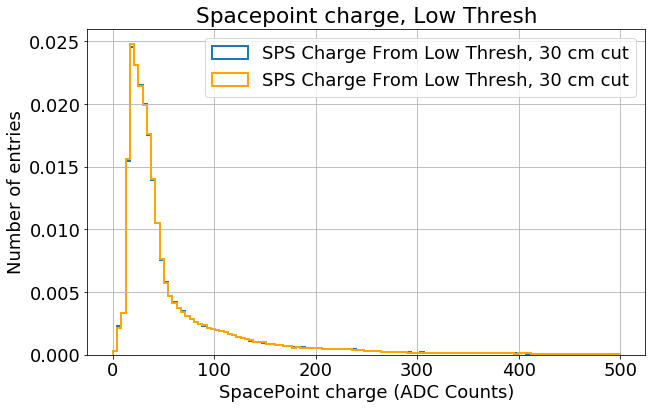

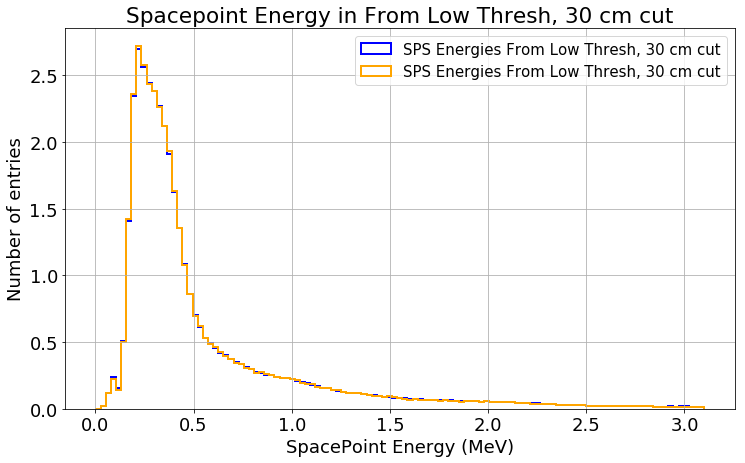

In [180]:
cNoNu = 'neutrinos == 1 and neutrinoshowers==0 and cosmic_trk_50==0'
df_lowthresh_nucut = df_ryan_beamoff_lowthresh_30cmr.query(cNoNu)


############# fdhfgdhf ##############
print df_ryan_beamoff_lowthresh_30cmr['N_Event'].nunique()
print df_lowthresh_nucut['N_Event'].nunique()
df_ryan_beamoff_lowthresh_30cmr_q_vals = df_ryan_beamoff_lowthresh_30cmr['sps_cluster_charge']#.sample(104039)#.sample(95000)
df_ryan_beamoff_lowthresh_30cmr_E_vals = df_ryan_beamoff_lowthresh_30cmr['energy']
df_lowthresh_nucut_q_vals = df_lowthresh_nucut['sps_cluster_charge']#.sample(104039)#.sample(95000)
df_lowthresh_nucut_E_vals = df_lowthresh_nucut['energy']



plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,500,120)

fig = plt.figure(figsize=(10,6))
offhist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge From Low Thresh, 30 cm cut',normed=True)
offhist,b1,p1 = plt.hist(df_lowthresh_nucut_q_vals,histtype='step',bins = BINS,lw=2,label='SPS Charge From Low Thresh, 30 cm cut',color='orange',normed=True)

#offhist2,b1,p1 = plt.hist(off_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam OFF',normed=False)
#onhist,b2,p2 = plt.hist(on_q_vals,histtype='step',bins = BINS,lw=2,label='Old Data, SPS Charge Beam ON',normed=False)
plt.title("Spacepoint charge, Low Thresh")
plt.xlabel('SpacePoint charge (ADC Counts)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

######### SPS / Blip Energy Hisograms ############
BINS = np.linspace(0,3.1,120)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_ryan_beamoff_lowthresh_30cmr_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm cut',color='blue',normed=True)
lowthresh_hist,b1,p1 = plt.hist(df_lowthresh_nucut_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm cut',color='orange',normed=True)

#lowthresh_hist,b1,p1 = plt.hist(off_E_vals ,histtype='step',bins = BINS,lw=2,label='SPS Energies, old data, 15 cm cut',color='forestgreen',normed=False)

plt.title("Spacepoint Energy in From Low Thresh, 30 cm cut")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr_EVT.head()





In [181]:
print df_lowthresh_nucut["sps_cluster_charge"]

1040       50.812222
1041       50.812222
1042       44.307194
1043       44.307194
1044       16.584291
1045       74.073639
1046       74.073639
1047       30.977835
1048      236.726532
1049       40.715961
1050       40.715961
1051       41.080746
1052       41.080746
1053       19.013309
1054       50.989052
1055      229.556931
1056       22.045786
1057       22.045786
1058       21.175274
1059       21.175274
1060       35.778225
1061       35.778225
1062       23.469662
1063       23.469662
1064       83.596230
1065       53.795189
1066       38.869122
1067       38.869122
1068       20.229073
1069       20.229073
             ...    
161646     32.994148
161647     32.994148
161648     22.497988
161649     22.497988
161650     25.371756
161651     25.371756
161652     16.311525
161653     16.311525
161654     18.163532
161655     30.433517
161656     30.433517
161657     42.461395
161658     18.456589
161659     18.456589
161660      4.055192
161661      4.055192
161662     14

In [182]:
checkBlipSDev(df_lowthresh_nucut)

Number events out of 2597 with variable SPS_q:  2597
Percent good events:  100


In [183]:
####### Blip Counting ####### 




In [184]:
fractionEVTsWithNoNeutrinos(df_lowthresh_nucut)


Fraction events with no neutrinos:  1.0 
 Or  493420  out of total  493420


In [185]:

#df_ryan_beamoff_lowthresh_15cmr_EVT(10)
fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_EVT)
fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_EVT)
fractionEnergiesWithNoNeutrinos

Fraction events with no neutrinos:  0.43300076746 
 Or  2821  out of total  6515
Fraction events with no neutrinos:  0.43279195669 
 Or  2798  out of total  6465


<function __main__.fractionEnergiesWithNoNeutrinos>

In [186]:
#Region 1 - 
print "Region cuts: "
#Uncut DFs:
#df_ryan_beamoff_lowthresh_15cmr
#df_ryan_beamoff_lowthresh_30cmr
#df_ryan_beamoff_lowthresh_15cmr_EVT
#df_ryan_beamoff_lowthresh_30cmr_EVT

# 30 cm
#Region 1 - High Y:
print "30 cm:"
print "Region 1 - High Y"
df_ryan_beamoff_lowthresh_30cmr_lowY_region1=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > 90.0)')
#df_ryan_beamoff_lowthresh_30cmr_lowY_EVT_region1=df_ryan_beamoff_lowthresh_30cmr_EVT.query('(sps_y > 90.0)')
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_lowY_region1)
#fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_lowY_EVT_region1)
#Region 2 - Low Y
print "Region 1 - Low Y"
df_ryan_beamoff_lowthresh_30cmr_highY_region2=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y < -90.0)')
#df_ryan_beamoff_lowthresh_30cmr_highY_EVT_region2=df_ryan_beamoff_lowthresh_30cmr_EVT.query('(sps_y < -90.0)')
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_highY_region2)
#fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_highY_EVT_region2)
#Region 3 - 
#Region 4 - 
#fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_30cmr_lowY_region1)
#fractionEnergiesWithNoNeutrinos()


# 15 cm
#Region 1 - High Y:
print "\n15 cm:"
print "Region 1 - High Y"
df_ryan_beamoff_lowthresh_15cmr_lowY_region1=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y > 90.0)')
#df_ryan_beamoff_lowthresh_15cmr_lowY_EVT_region1=df_ryan_beamoff_lowthresh_15cmr_EVT.query('(sps_y > 90.0)')
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_lowY_region1)
#fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_lowY_EVT_region1)
#Region 2 - Low Y
print "Region 1 - Low Y"
df_ryan_beamoff_lowthresh_15cmr_highY_region2=df_ryan_beamoff_lowthresh_15cmr.query('(sps_y < -90.0)')
#df_ryan_beamoff_lowthresh_30cmr_highY_EVT_region2=df_ryan_beamoff_lowthresh_15cmr_EVT.query('(sps_y < -90.0)')
fractionEnergiesWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_highY_region2)
#fractionEVTsWithNoNeutrinos(df_ryan_beamoff_lowthresh_15cmr_highY_EVT_region2)
#Region 3 - 
#Region 4 - 


Region cuts: 
30 cm:
Region 1 - High Y
Fraction:  0.107910216086 
 From  21134  out of total  195848
Region 1 - Low Y
Fraction:  0.108323851621 
 From  18184  out of total  167867

15 cm:
Region 1 - High Y
Fraction:  0.110749092979 
 From  23352  out of total  210855
Region 1 - Low Y
Fraction:  0.109707093244 
 From  20012  out of total  182413


In [187]:
df_lowthresh_nucut.head()

evttime      sps_x      sps_y     sps_z    distance  \
1040  1530995429   0.294521   0.363782  0.548416  875.452976   
1041  1530995429   0.294521   0.363782  0.548416  875.452976   
1042  1530995429  80.578629  78.652481  0.567300  869.624531   
1043  1530995429  80.578629  78.652481  0.567300  869.624531   
1044  1530995429  46.666538  57.521458  3.300000  868.561579   

      sps_cluster_charge  N_Event  N_Run  N_SubRun    Vertex_x  ...   muon_px  \
1040           50.812222     4220  17573        84  158.612656  ... -0.603129   
1041           50.812222     4220  17573        84  158.612656  ... -0.603129   
1042           44.307194     4220  17573        84  158.612656  ... -0.603129   
1043           44.307194     4220  17573        84  158.612656  ... -0.603129   
1044           16.584291     4220  17573        84  158.612656  ... -0.603129   

       muon_py   muon_pz  maxTrkLen  tracklength  distance_nu_smallest  \
1040  0.329532  0.726391   252.0896   165.048426             53.635951   
1041  0.329532  0.726391   252.0896   165.048426             53.635951   
1042  0.329532  0.726391   252.0896   165.048426             53.635951   
1043  0.329532  0.726391   252.0896   165.048426             53.635951   
1044  0.329532  0.726391   252.0896   165.048426             53.635951   

      cosmic_trk_50  pointdistance_trk_smallest  distance_trk_smallest  \
1040              0                  127.240084             126.750841   
1041              0                  127.240084             126.750841   
1042              0                  190.005000             108.073128   
1043              0                  190.005000             108.073128   
1044              0                  168.282003             114.476588   

        energy  
1040  0.502723  
1041  0.502723  
1042  0.445343  
1043  0.445343  
1044  0.192959  

[5 rows x 29 columns]

In [188]:
noNuMinEs = returnMinBlipEs(df_lowthresh_nucut)
noNuMinQs = returnMinBlipQs(df_lowthresh_nucut)
#noNueventMins, noNusummedBlipEs,noNumultiplicityInRadius = returnMinBlipsAndMultiplicityAllData(df_lowthresh_nucut,df_lowthresh_nucut,20.0)

r15cmrMinEs = returnMinBlipEs(df_ryan_beamoff_lowthresh_15cmr)
r15cmrMinQs = returnMinBlipQs(df_ryan_beamoff_lowthresh_15cmr)
#r15cmreventMins, r15cmrsummedBlipEs,r15cmrmultiplicityInRadius = returnMinBlipsAndMultiplicityAllData(df_ryan_beamoff_lowthresh_15cmr_EVT,df_ryan_beamoff_lowthresh_15cmr_EVT,20.0)

Number of min SPS points:  2597
Number of min SPS points:  2597
Number of min SPS points:  6081
Number of min SPS points:  6081


In [189]:
r30cmrMinEs = returnMinBlipEs(df_ryan_beamoff_lowthresh_30cmr)
r30cmrMinQs = returnMinBlipQs(df_ryan_beamoff_lowthresh_30cmr)
#r30cmreventMins, r30cmrsummedBlipEs,r30cmrmultiplicityInRadius = returnMinBlipsAndMultiplicityAllData(df_ryan_beamoff_lowthresh_30cmr_EVT,df_ryan_beamoff_lowthresh_30cmr_EVT,20.0)


Number of min SPS points:  6131
Number of min SPS points:  6131


In [190]:
len(r15cmrMinEs)

6078

In [191]:

for i in range(0,6):
    print noNuMinEs[i], " "
    
print "Min of mins NoNu: ",min(noNuMinEs)
print "Mean of mins NoNu: ",np.mean(noNuMinEs),"\n\n"


for i in range(0,6):
    print r15cmrMinEs[i], " "
    
print "Min of mins 15cm: ",min(r15cmrMinEs)
print "Mean of mins 15cm: ",np.mean(r15cmrMinEs),"\n\n"

for i in range(0,6):
    print r30cmrMinEs[i], " "
    
print "Min of mins 30cm: ",min(r30cmrMinEs)
print "Mean of mins 30cm: ",np.mean(r30cmrMinEs)

0.12238526200158006  
0.15675974601127163  
0.07886429182288807  
0.09115768619608602  
0.09125819461732332  
0.07216310905817928  
Min of mins NoNu:  0.012814631400299871
Mean of mins NoNu:  0.11315287437846916 


0.12238526200158006  
0.05640506312644911  
0.15675974601127163  
0.07886429182288807  
0.1544833792225477  
0.07067037841189241  
Min of mins 15cm:  -47.58507339525528
Mean of mins 15cm:  0.10753077445678334 


0.12238526200158006  
0.05640506312644911  
0.15675974601127163  
0.07886429182288807  
0.1544833792225477  
0.09115768619608602  
Min of mins 30cm:  0.012814631400299871
Mean of mins 30cm:  0.11227523752037308


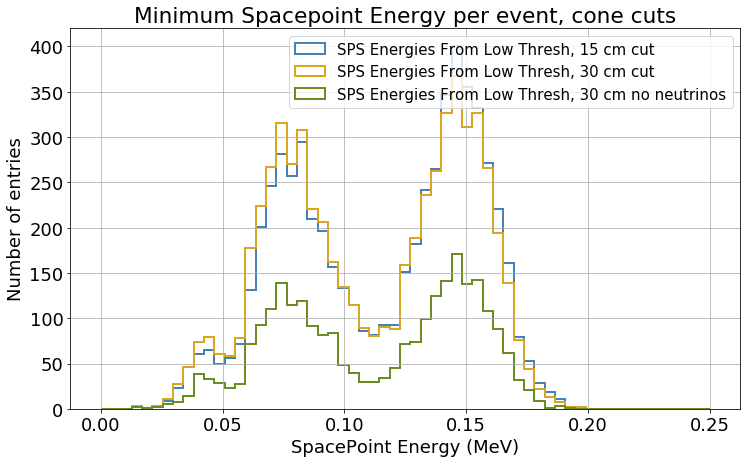

In [192]:
BINS = np.linspace(0,0.25,60)
fig = plt.figure(figsize=(12,7))

#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#compl_reg_hist,b2,p2 = plt.hist(df_G10_off_complementary_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=compl_reg_weights,lw=2,label='SPS Charge, G10 Compl. reg',color='Crimson',normed=False)
#rest_det_hist,b3,p3 = plt.hist(df_inner_det_G10_equivalent_Vol_cut_charge['energy'],histtype='step',bins = BINS,weights=rest_det_weights,lw=2,label='SPS Charge Rest Det',color='darkorchid',normed=False)
lowthresh_hist,b1,p1 = plt.hist(r15cmrMinEs,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 15 cm cut',color='steelblue',normed=False)
lowthresh_hist,b1,p1 = plt.hist(r30cmrMinEs,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm cut',color='goldenrod',normed=False)
lowthresh_hist,b1,p1 = plt.hist(noNuMinEs,histtype='step',bins = BINS,lw=2,label='SPS Energies From Low Thresh, 30 cm no neutrinos',color='olivedrab',normed=False)

plt.title("Minimum Spacepoint Energy per event, cone cuts")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [193]:
count = 0.0
for i in range(len(r15cmrMinEs)):
    if r15cmrMinEs[i] < 0.059 and r15cmrMinEs[i] > 0:
        count +=1.0
        
print "Fraction < 60 keV: ", count/len(r15cmrMinEs)

Fraction < 60 keV:  0.0623560381705


Low Thresh 15cm plotting...
G10 Top #energies:  114091
G10 Bot #energies:  100301
Mid #energies:  50017
Compl Top #energies:  78673
Compl Bot #energies:  62086


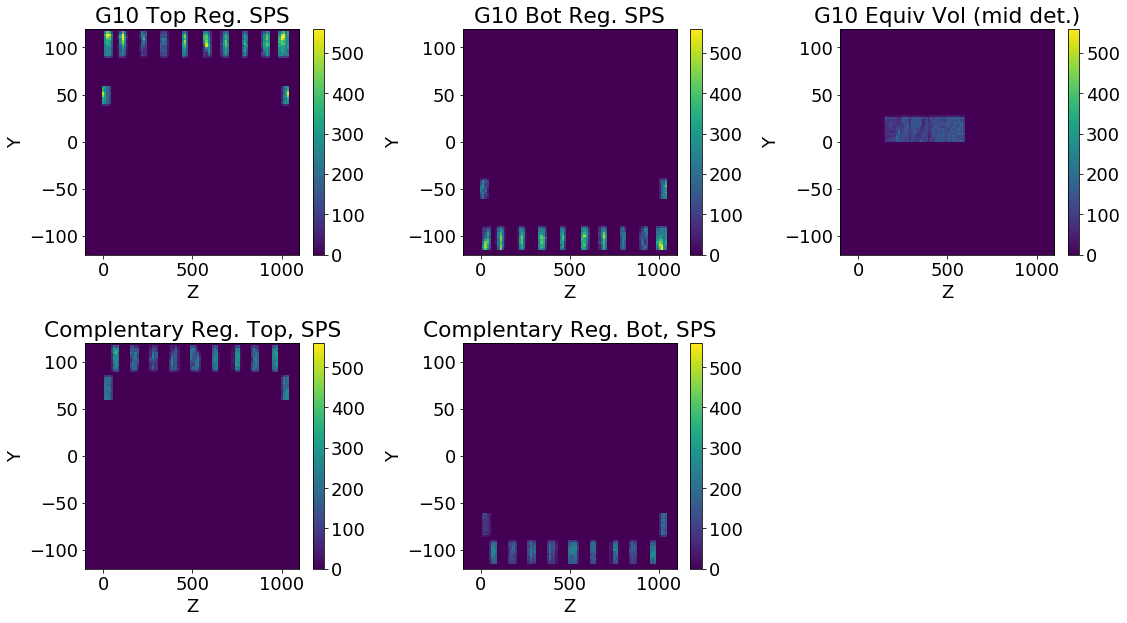

In [194]:
############### Regions In Low Threshold Data ###############
############################################ Low Threshold ############################################


#########   2D Region Plots for Low Threshold Files   #########  

#df_ryan_beamoff_lowthresh_30cmr_G10=df_ryan_beamoff_lowthresh_30cmr.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200))) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
#df_ryan_beamoff_lowthresh_30cmr_rest_det=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')
#df_G10_off_complementary_yes_nu=df_Sps_beam_off_yes_nu.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
#df_ryan_beamoff_lowthresh_30cmr_G10_off_complementary=df_ryan_beamoff_lowthresh_30cmr.query(' ( (sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>150 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<875) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))  or  ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) )  )')
#df_ryan_beamoff_lowthresh_30cmr_inner_det_G10_equivalent_Vol_cut=df_ryan_beamoff_lowthresh_30cmr.query('(sps_y > -27.0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')


############################################ Low Threshold 15cm ############################################


#########   2D Region Plots for Low Threshold Files   #########  
g10_upper_det_region_cut='((sps_y > 90.0 and sps_y < 117.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40) or (sps_z>1000 and sps_z<1200)))'
g10_lower_det_region_cut='((sps_y < -90.0 and sps_y > -117.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) '
g10_equivalent_half_region_cut=('(sps_y > 0 and sps_y < 27.0) and (sps_z>150 and sps_z<592.8) ')
complementary_upper_det_region_cut = '((sps_y > 90.0 and sps_y < 117.0) and ( (sps_z>50 and sps_z<90) or (sps_z>155 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<870) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y < 85.0 and sps_y > 60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1036.5 ) ))'
complementary_lower_det_region_cut = ' ( (sps_y < -90.0 and sps_y > -117.0) and ( (sps_z>50 and sps_z<90) or (sps_z>155 and sps_z<195) or (sps_z>265 and sps_z<305) or (sps_z>375 and sps_z<420) or (sps_z>488 and sps_z<540) or (sps_z>610 and sps_z<645) or (sps_z>720 and sps_z<765) or (sps_z>830 and sps_z<870) or (sps_z>945 and sps_z<980) or (sps_z>1100 ) )) or ( (sps_y > -85.0 and sps_y < -60.0) and ((sps_z>10 and sps_z<50) or (sps_z>1000 and sps_z<1035.0 ) )  )'

df_ryan_beamoff_lowthresh_15cmr_G10_top=df_ryan_beamoff_lowthresh_15cmr.query(g10_upper_det_region_cut)
df_ryan_beamoff_lowthresh_15cmr_G10_bot=df_ryan_beamoff_lowthresh_15cmr.query(g10_lower_det_region_cut)
df_ryan_beamoff_lowthresh_15cmr_G10_equiv_half=df_ryan_beamoff_lowthresh_15cmr.query(g10_equivalent_half_region_cut)
df_ryan_beamoff_lowthresh_15cmr_complementary_top=df_ryan_beamoff_lowthresh_15cmr.query(complementary_upper_det_region_cut)
df_ryan_beamoff_lowthresh_15cmr_complementary_bot=df_ryan_beamoff_lowthresh_15cmr.query(complementary_lower_det_region_cut)


print "Low Thresh 15cm plotting..."
fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10_top['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Top Reg. SPS")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10_bot['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10_bot['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Bot Reg. SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_G10_equiv_half['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_G10_equiv_half['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Equiv Vol (mid det.)")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_complementary_top['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_complementary_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Complentary Reg. Top, SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_ryan_beamoff_lowthresh_15cmr_complementary_bot['sps_z'].values,df_ryan_beamoff_lowthresh_15cmr_complementary_bot['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=560,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Complentary Reg. Bot, SPS")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

Es_15cmr_G10_top=df_ryan_beamoff_lowthresh_15cmr_G10_top['energy']
Es_15cmr_G10_bot=df_ryan_beamoff_lowthresh_15cmr_G10_bot['energy']
Es_15cmr_G10_mid=df_ryan_beamoff_lowthresh_15cmr_G10_equiv_half['energy']
Es_15cmr_compl_top=df_ryan_beamoff_lowthresh_15cmr_complementary_top['energy']
Es_15cmr_compl_bot=df_ryan_beamoff_lowthresh_15cmr_complementary_bot['energy']
print "G10 Top #energies: ",len(Es_15cmr_G10_top)
print "G10 Bot #energies: ",len(Es_15cmr_G10_bot)
print "Mid #energies: ",len(Es_15cmr_G10_mid)
print "Compl Top #energies: ",len(Es_15cmr_compl_top)
print "Compl Bot #energies: ",len(Es_15cmr_compl_bot)




Total number of energies =  1170210  of  6515  events.
Total number of energies =  1170210  of  6515  events.


evttime    Vertex_x   Vertex_y    Vertex_z  _rand_vtx_x  _rand_vtx_y  \
0  1455158710  196.576553  14.467744  487.994385   255.933888   -78.204909   
1  1455166963  173.744522  -3.411896  584.437378   242.483477   -62.255682   
2  1455170284  221.620102  -2.913048  251.891113   245.114101    56.678840   
3  1455179164  182.983643  13.270264  607.768555   189.427963    60.306961   
4  1455184179  240.754227  98.511818  533.144287    80.803231    70.621499   

   _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
0   291.096339          24.682645    178          18582.195735  ...   
1   499.522823           7.180772    161          37096.766209  ...   
2   556.244968          13.353545    182          59698.398609  ...   
3   678.395713           7.664655    152          26945.928604  ...   
4   535.262279          95.166836    166         112059.022009  ...   

   neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
0               1  0.493225  0.633671 -0.595978   86.764809   216.221115   
1               3  0.425853  0.526326  0.735955  158.999527   170.998967   
2               1 -0.687396  0.722647 -0.072586   10.620229   203.484826   
3               1  0.461698  0.623150 -0.631283  122.174210   265.959205   
4               2 -0.567645 -0.745529  0.349236  151.215286   265.406076   

   distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
0             38.505773              1   4955       109  
1             71.026992              0   4957        28  
2            127.023818              0   4957        53  
3             84.225651              0   4957       119  
4            114.967453              0   4957       157  

[5 rows x 29 columns]

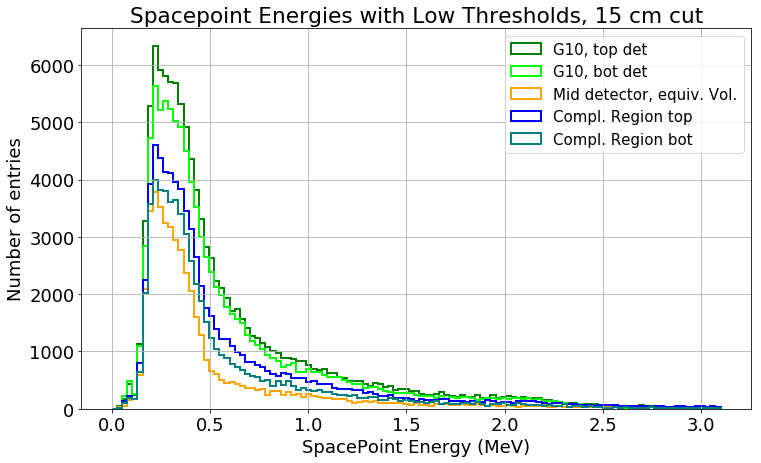

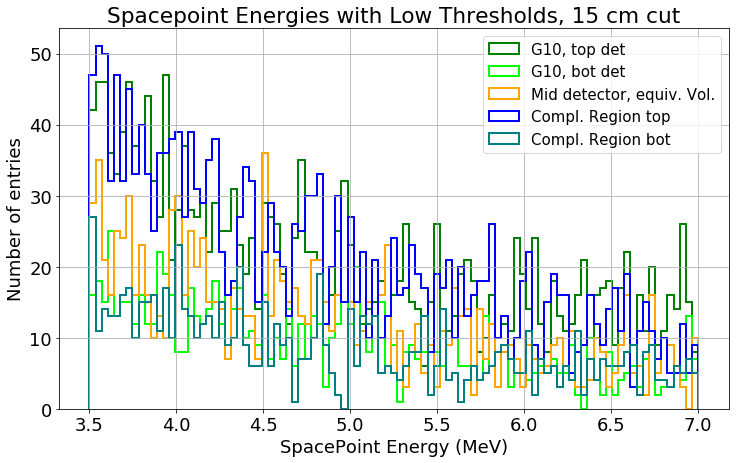

In [195]:
######### Regional Energy Hisograms ############
BINS = np.linspace(0,3.1,120)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(Es_15cmr_G10_top,histtype='step',bins = BINS,lw=2,label='G10, top det',color='green',normed=False)
plt.hist(Es_15cmr_G10_bot,histtype='step',bins = BINS,lw=2,label='G10, bot det',color='lime',normed=False)
plt.hist(Es_15cmr_G10_mid,histtype='step',bins = BINS,lw=2,label='Mid detector, equiv. Vol.',color='orange',normed=False)
plt.hist(Es_15cmr_compl_top,histtype='step',bins = BINS,lw=2,label='Compl. Region top',color='blue',normed=False)
plt.hist(Es_15cmr_compl_bot,histtype='step',bins = BINS,lw=2,label='Compl. Region bot',color='teal',normed=False)

plt.title("Spacepoint Energies with Low Thresholds, 15 cm cut")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr_EVT.head()

######### Region Histograms High E. ############
BINS = np.linspace(3.5,7,100)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(Es_15cmr_G10_top,histtype='step',bins = BINS,lw=2,label='G10, top det',color='green',normed=False)
plt.hist(Es_15cmr_G10_bot,histtype='step',bins = BINS,lw=2,label='G10, bot det',color='lime',normed=False)
plt.hist(Es_15cmr_G10_mid,histtype='step',bins = BINS,lw=2,label='Mid detector, equiv. Vol.',color='orange',normed=False)
plt.hist(Es_15cmr_compl_top,histtype='step',bins = BINS,lw=2,label='Compl. Region top',color='blue',normed=False)
plt.hist(Es_15cmr_compl_bot,histtype='step',bins = BINS,lw=2,label='Compl. Region bot',color='teal',normed=False)

plt.title("Spacepoint Energies with Low Thresholds, 15 cm cut")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr_EVT.head()

In [196]:
print "test"

test


In [197]:
df_ryan_beamoff_lowthresh_15cmr_EVT.head(15)

evttime    Vertex_x   Vertex_y    Vertex_z  _rand_vtx_x  _rand_vtx_y  \
0   1455158710  196.576553  14.467744  487.994385   255.933888   -78.204909   
1   1455166963  173.744522  -3.411896  584.437378   242.483477   -62.255682   
2   1455170284  221.620102  -2.913048  251.891113   245.114101    56.678840   
3   1455179164  182.983643  13.270264  607.768555   189.427963    60.306961   
4   1455184179  240.754227  98.511818  533.144287    80.803231    70.621499   
5   1455186430  129.340866  -3.207892  106.338051    43.154540    -5.677103   
6   1455209363  150.754181 -64.705681  486.311432    56.746928   -66.539814   
7   1455209951  137.135437  40.069401  300.581604    85.386048   -70.957467   
8   1455217913  126.209839  56.439247  811.383240   148.462509    92.406727   
9   1455222520  204.212906  45.853851  814.446350   127.644239    14.065756   
10  1455222686  234.703064 -11.147170  543.455383    75.910536   -88.761127   
11  1455287725  151.865784 -28.614614  390.642792   165.920147    52.297099   
12  1455292868  174.701721   3.771171  847.564331   182.754576   -92.898312   
13  1455293638  177.814453 -31.363115  113.651070    27.599992   -86.015682   
14  1455295478  146.658463  69.831787  169.429916    53.191656   -48.972809   

    _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
0    291.096339          24.682645    192          19636.422286  ...   
1    499.522823           7.180772    181          51169.620001  ...   
2    556.244968          13.353545    197          60431.305418  ...   
3    678.395713           7.664655    159          28489.782721  ...   
4    535.262279          95.166836    173          62376.767530  ...   
5    404.083414           7.256095    177          29604.544930  ...   
6     31.245260           8.329692    210         106125.547487  ...   
7    972.028284          19.391225    175          21492.201153  ...   
8    685.530849          54.381127    146           8132.422113  ...   
9    187.753185           2.925929    212          28803.228492  ...   
10    64.805196          12.518600    209          52098.140804  ...   
11   656.245093           2.290403    195          22507.806623  ...   
12   720.245212           0.804641    162          13302.900110  ...   
13   517.475130          27.323072    179          17448.945249  ...   
14    85.670038           4.834770    212          28044.167296  ...   

    neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
0                1  0.493225  0.633671 -0.595978   86.764809   216.221115   
1                3  0.425853  0.526326  0.735955  158.999527   170.998967   
2                1 -0.687396  0.722647 -0.072586   10.620229   203.484826   
3                1  0.461698  0.623150 -0.631283  122.174210   265.959205   
4                2 -0.567645 -0.745529  0.349236  151.215286   265.406076   
5                2  0.053574  0.433122  0.899742  204.450790   204.450798   
6                3 -0.270075  0.784422  0.558338  221.167923   266.781565   
7                2 -0.388628  0.647224  0.655796  109.666817   229.576531   
8                2  0.348191  0.847036  0.401612   65.290611   301.727842   
9                3  0.298223  0.659501  0.690015   88.394135   194.313281   
10               2 -0.258669  0.929473  0.263002   96.733704   207.586340   
11               2  0.941509  0.188291  0.279479  104.051643   132.760695   
12               2 -0.466738  0.782702  0.411745   21.156057   172.614039   
13               1 -0.248855  0.895616  0.368705  144.473846   144.473844   
14               2 -0.457835  0.669648  0.584772   54.938099   220.826308   

    distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
0              38.505773              1   4955       109  
1              71.026992              0   4957        28  
2             127.023818              0   4957        53  
3              84.225651              0   4957       119  
4             114.967453              0   4957       157  
5 

In [198]:
df_ryan_beamoff_lowthresh_15cmr.head(14)

evttime       sps_x       sps_y      sps_z    distance  \
0   1530976383  168.980347  -47.181011   6.514383  175.564354   
1   1530976383   66.320938   61.245369  22.871710   93.126673   
2   1530976383  164.926605  -27.522236  29.100000  169.720560   
3   1530976383  164.926605  -27.522236  29.100000  169.720560   
4   1530976383  198.959442  -22.845699  30.507566  202.577139   
5   1530976383  198.959442  -22.845699  30.507566  202.577139   
6   1530976383  252.943604  116.151382  38.099998  280.932768   
7   1530976383  252.943604  116.151382  38.099998  280.932768   
8   1530976383  133.605011  -82.081833  49.023857  164.289576   
9   1530976383    6.109725  -35.836079  50.099998   61.899621   
10  1530976383    6.109725  -35.836079  50.099998   61.899621   
11  1530976383  137.985565  -36.442299  52.303383  151.999017   
12  1530976383  180.485458  100.476318  76.800003  220.383148   
13  1530976383  180.485458  100.476318  76.800003  220.383148   

    sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  muon_px  \
0           120.072128     1113  17569        22       0.0  ...      0.0   
1           218.367615     1113  17569        22       0.0  ...      0.0   
2            19.131746     1113  17569        22       0.0  ...      0.0   
3            19.131746     1113  17569        22       0.0  ...      0.0   
4            28.366558     1113  17569        22       0.0  ...      0.0   
5            28.366558     1113  17569        22       0.0  ...      0.0   
6            29.855576     1113  17569        22       0.0  ...      0.0   
7            29.855576     1113  17569        22       0.0  ...      0.0   
8           112.945847     1113  17569        22       0.0  ...      0.0   
9            14.236603     1113  17569        22       0.0  ...      0.0   
10           14.236603     1113  17569        22       0.0  ...      0.0   
11           27.058485     1113  17569        22       0.0  ...      0.0   
12           14.107176     1113  17569        22       0.0  ...      0.0   
13           14.107176     1113  17569        22       0.0  ...      0.0   

         muon_py  muon_pz  maxTrkLen  tracklength  distance_nu_smallest  \
0   6.726233e-44      0.0        0.0    82.479392            130.383506   
1   6.726233e-44      0.0        0.0    82.479392            130.383506   
2   6.726233e-44      0.0        0.0    82.479392            130.383506   
3   6.726233e-44      0.0        0.0    82.479392            130.383506   
4   6.726233e-44      0.0        0.0    82.479392            130.383506   
5   6.726233e-44      0.0        0.0    82.479392            130.383506   
6   6.726233e-44      0.0        0.0    82.479392            130.383506   
7   6.726233e-44      0.0        0.0    82.479392            130.383506   
8   6.726233e-44      0.0        0.0    82.479392            130.383506   
9   6.726233e-44      0.0        0.0    82.479392            130.383506   
10  6.726233e-44      0.0        0.0    82.479392            130.383506   
11  6.726233e-44      0.0        0.0    82.479392            130.383506   
12  6.726233e-44      0.0        0.0    82.479392            130.383506   
13  6.726233e-44      0.0        0.0    82.479392            130.383506   

    cosmic_trk_50  pointdistance_trk_smallest  distance_trk_smallest    energy  
0               0                  160.395574               0.845759  1.104475  
1               0                  162.463940               0.508543  1.954941  
2               0                  147.981019              29.862652  0.217184  
3               0                  147.981019              29.862652  0.217184  
4               0                  175.962570              44.712666  0.302590  
5               0                  175.962570              44.712666  0.302590  
6               0                  286.102662              20.864623  0.316115  
7               0                  286.102662              20.864623  0.316115  
8               0                  

In [199]:
print len(summedblips_LowThresh15cmg_g10)

53232


In [200]:
print len(multiplicities_LowThresh15cm_g10)

53232


In [201]:
#df_multi = returnMultiplicityEsBinned(multiplicities_LowThresh15cm_g10,summedblips_LowThresh15cmg_g10)

In [202]:
#Come back to here

In [247]:
g10_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/g10_multiplicity_file.txt"
compl_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/compl_multiplicity_file.txt"
wholeDet_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/wholeDet_multiplicity_file.txt"
summedblips_LowThresh15cmg_g10_highStats,multiplicities_LowThresh15cm_g10_highStats=readArraysFromFile(g10_multiplicity_file)
summedblips_LowThresh15cmg_compl_highStats, multiplicities_LowThresh15cm_compl_highStats=readArraysFromFile(compl_multiplicity_file)
summedblips_LowThresh15cmg_highStats, multiplicities_LowThresh15cm_highStats=readArraysFromFile(wholeDet_multiplicity_file)

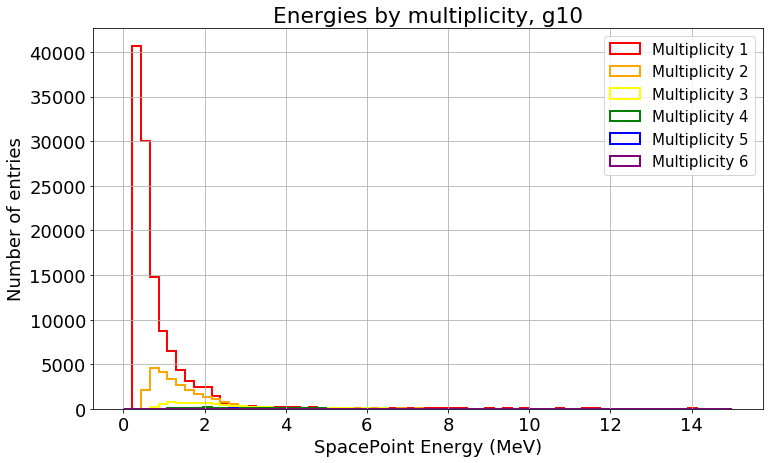

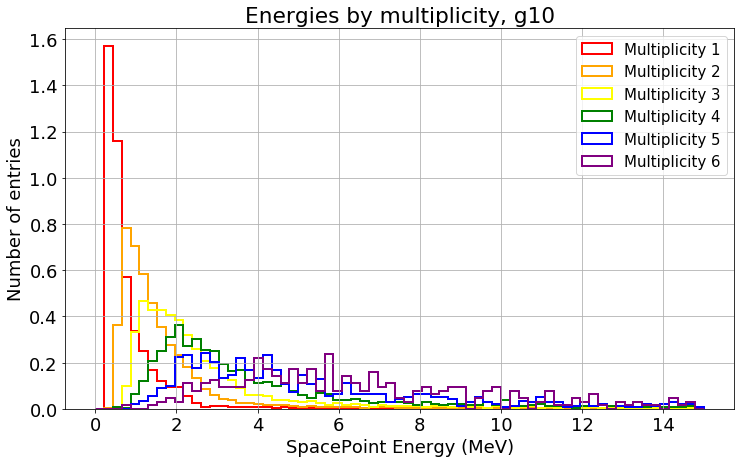

In [270]:
df_multi = returnMultiplicityEsBinned(multiplicities_LowThresh15cm_g10_highStats,summedblips_LowThresh15cmg_g10_highStats)
######### Multiplicites Bin Histograms ############
df_multi_1 = df_multi.query('multiplicities == %s'%(1))
df_multi_2 = df_multi.query('multiplicities == %s'%(2))
df_multi_3 = df_multi.query('multiplicities == %s'%(3))
df_multi_4 = df_multi.query('multiplicities == %s'%(4))
df_multi_5 = df_multi.query('multiplicities == %s'%(5))
df_multi_6 = df_multi.query('multiplicities == %s'%(6))

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, g10")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity, g10")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

#evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
#evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
#print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."


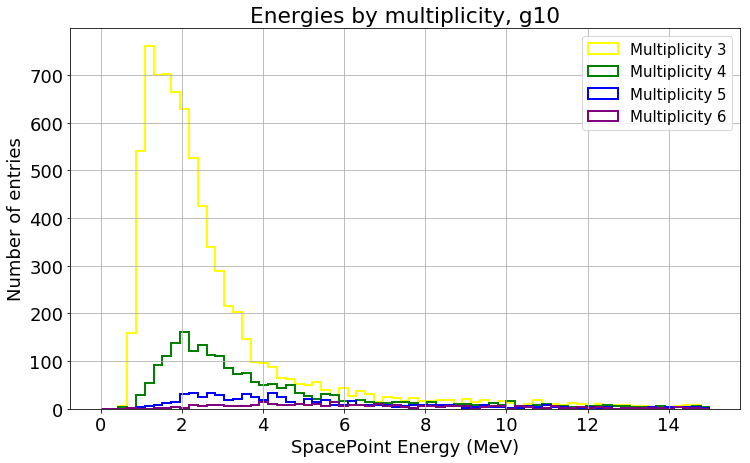

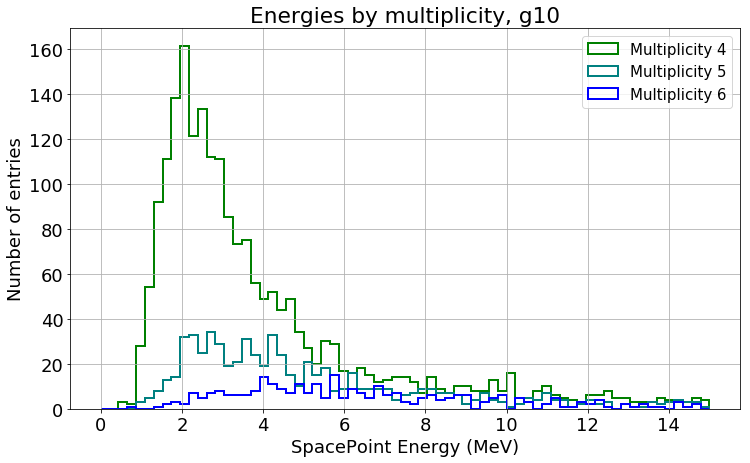

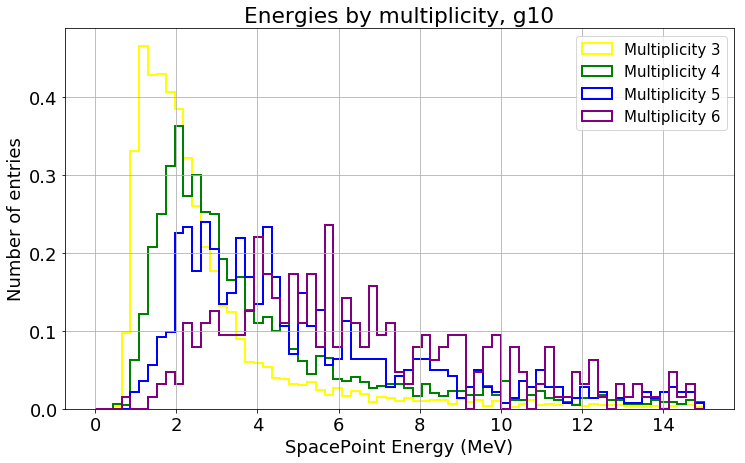

In [271]:
BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, g10")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
#plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='teal',normed=False)
plt.hist(df_multi_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='blue',normed=False)


plt.title("Energies by multiplicity, g10")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity, g10")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [255]:
#df_multi_compl = returnMultiplicityEsBinned(multiplicities_LowThresh15cm_compl_highStats,summedblips_LowThresh15cmg_compl_highStats)

In [256]:
######### Multiplicity distributions whole detector -- Multiplicity of blips in 20cm bubbles ############

BINS = np.linspace(0,15,80)
fig = plt.figure(figsize=(12,7))
summedblips_LowThresh15cmg, multiplicities_LowThresh15cm = countBlipMultiplicityNewCompleteDFOnly(df_ryan_beamoff_lowthresh_15cmr,0,2500)


Number of events with energies:  6081


KeyboardInterrupt: 

<Figure size 864x504 with 0 Axes>

Total number of energies =  1170210  of  6515  events.


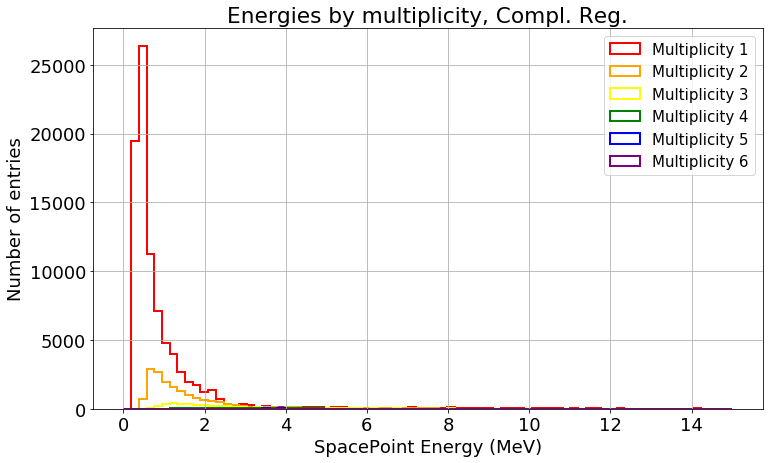

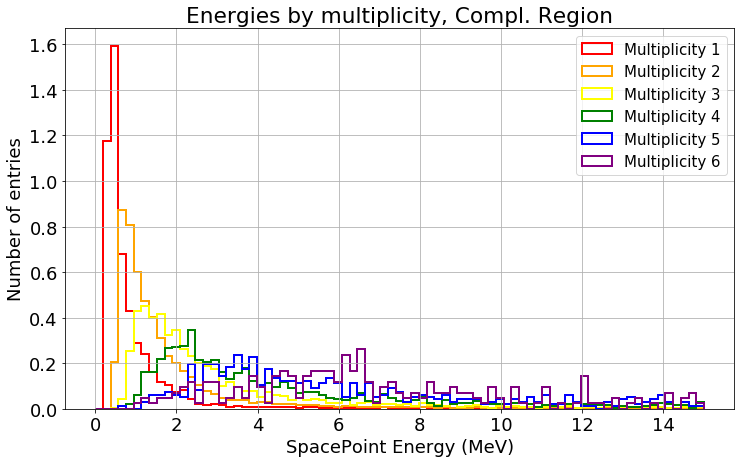

In [267]:
df_multi_compl = returnMultiplicityEsBinned(multiplicities_LowThresh15cm_compl_highStats,summedblips_LowThresh15cmg_compl_highStats)
######### Multiplicites Bin Histograms ############
df_multi_compl_1 = df_multi_compl.query('multiplicities == %s'%(1))
df_multi_compl_2 = df_multi_compl.query('multiplicities == %s'%(2))
df_multi_compl_3 = df_multi_compl.query('multiplicities == %s'%(3))
df_multi_compl_4 = df_multi_compl.query('multiplicities == %s'%(4))
df_multi_compl_5 = df_multi_compl.query('multiplicities == %s'%(5))
df_multi_compl_6 = df_multi_compl.query('multiplicities == %s'%(6))

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_compl_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
plt.hist(df_multi_compl_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_compl_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_compl_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_compl_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_compl_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, Compl. Reg.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_compl_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
plt.hist(df_multi_compl_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_compl_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_compl_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_compl_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_compl_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity, Compl. Region")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."

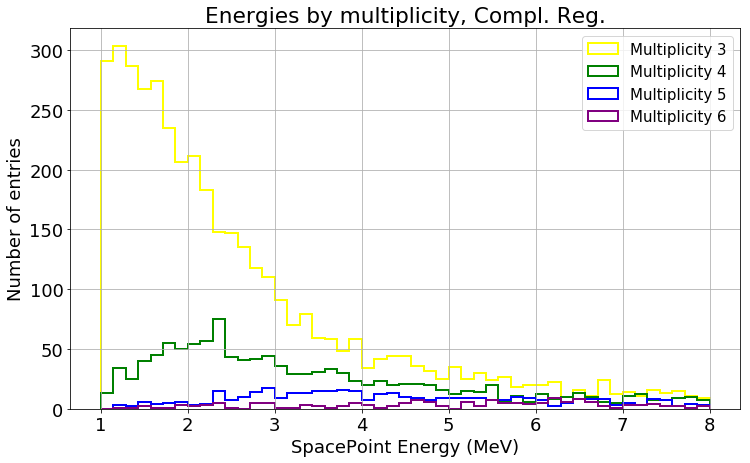

<Figure size 864x504 with 0 Axes>

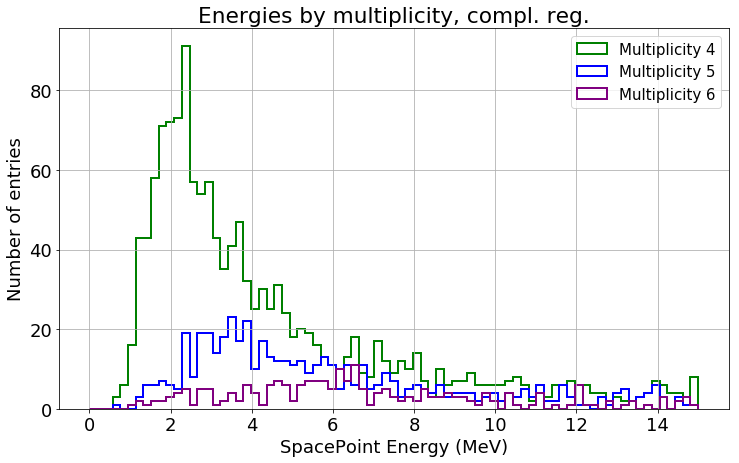

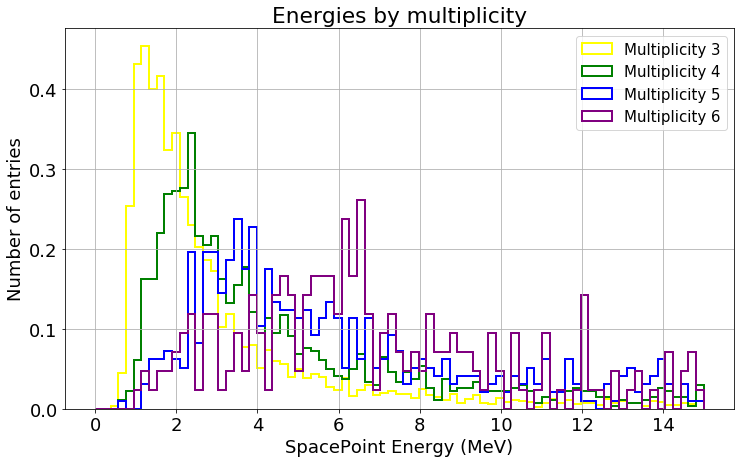

In [268]:
BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_compl_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_compl_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_compl_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_compl_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, Compl. Reg.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
#plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_compl_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_compl_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_compl_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, compl. reg.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,15,70)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_compl_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_compl_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_compl_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_compl_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')



1.400531052837651


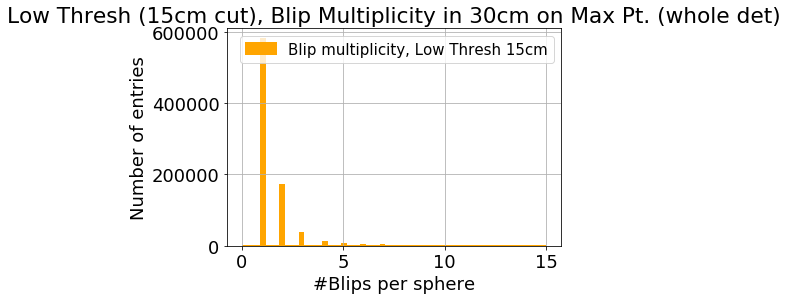

In [269]:
plt.hist(multiplicities_LowThresh15cm_highStats,histtype='step',bins = BINS,lw=2,label='Blip multiplicity, Low Thresh 15cm',color='Orange',fill=True,normed=False)

plt.title("Low Thresh (15cm cut), Blip Multiplicity in 30cm on Max Pt. (whole det)")
plt.xlabel('#Blips per sphere')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')

print np.mean(multiplicities_LowThresh15cm_highStats)

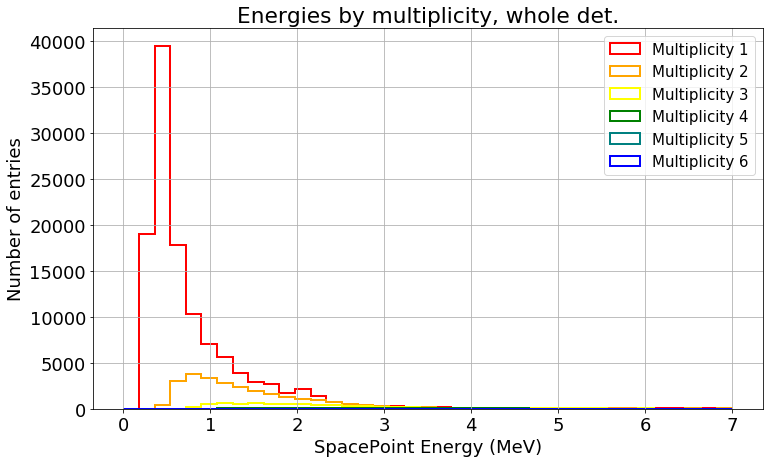

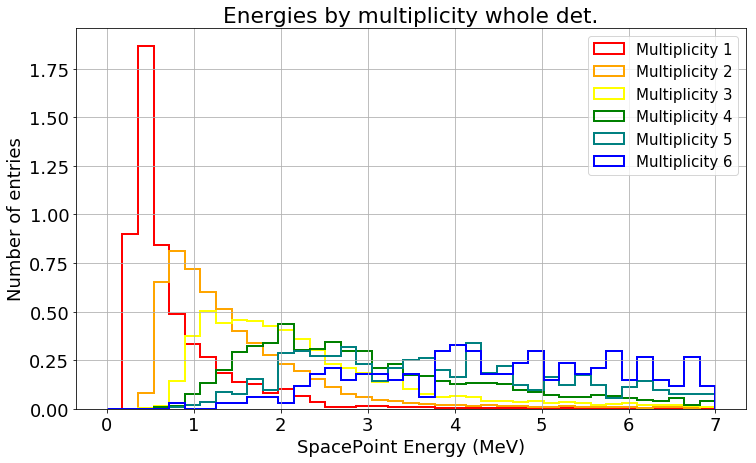

In [260]:
df_multi_whole = returnMultiplicityEsBinned(multiplicities_LowThresh15cm_g10_highStats,summedblips_LowThresh15cmg_g10_highStats)
######### Multiplicites Bin Histograms ############
df_multi_w_1 = df_multi_whole.query('multiplicities == %s'%(1))
df_multi_w_2 = df_multi_whole.query('multiplicities == %s'%(2))
df_multi_w_3 = df_multi_whole.query('multiplicities == %s'%(3))
df_multi_w_4 = df_multi_whole.query('multiplicities == %s'%(4))
df_multi_w_5 = df_multi_whole.query('multiplicities == %s'%(5))
df_multi_w_6 = df_multi_whole.query('multiplicities == %s'%(6))

BINS = np.linspace(0,7,40)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_w_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
plt.hist(df_multi_w_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_w_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_w_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_w_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_w_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity, whole det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,7,40)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
plt.hist(df_multi_w_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
plt.hist(df_multi_w_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_w_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_w_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_w_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_w_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity whole det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')



Total number of energies =  1170210  of  6515  events.


evttime    Vertex_x   Vertex_y    Vertex_z  _rand_vtx_x  _rand_vtx_y  \
0  1455158710  196.576553  14.467744  487.994385   255.933888   -78.204909   
1  1455166963  173.744522  -3.411896  584.437378   242.483477   -62.255682   
2  1455170284  221.620102  -2.913048  251.891113   245.114101    56.678840   
3  1455179164  182.983643  13.270264  607.768555   189.427963    60.306961   
4  1455184179  240.754227  98.511818  533.144287    80.803231    70.621499   

   _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
0   291.096339          24.682645    178          18582.195735  ...   
1   499.522823           7.180772    161          37096.766209  ...   
2   556.244968          13.353545    182          59698.398609  ...   
3   678.395713           7.664655    152          26945.928604  ...   
4   535.262279          95.166836    166         112059.022009  ...   

   neutrinotracks   muon_px   muon_py   muon_pz   maxTrkLen  tracklength  \
0               1  0.493225  0.633671 -0.595978   86.764809   216.221115   
1               3  0.425853  0.526326  0.735955  158.999527   170.998967   
2               1 -0.687396  0.722647 -0.072586   10.620229   203.484826   
3               1  0.461698  0.623150 -0.631283  122.174210   265.959205   
4               2 -0.567645 -0.745529  0.349236  151.215286   265.406076   

   distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
0             38.505773              1   4955       109  
1             71.026992              0   4957        28  
2            127.023818              0   4957        53  
3             84.225651              0   4957       119  
4            114.967453              0   4957       157  

[5 rows x 29 columns]

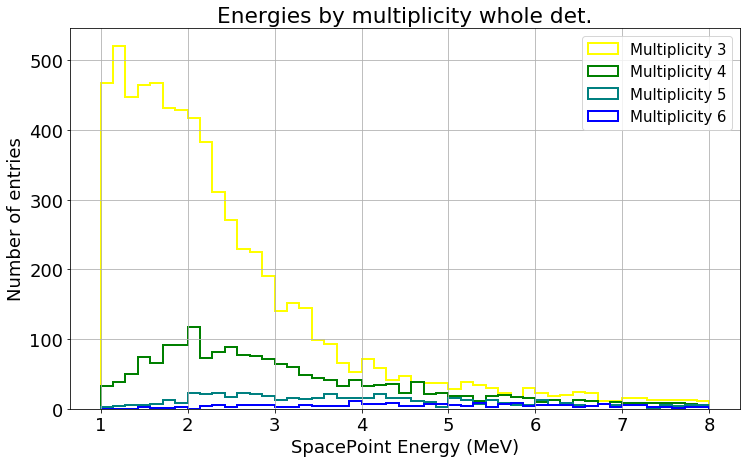

<Figure size 864x504 with 0 Axes>

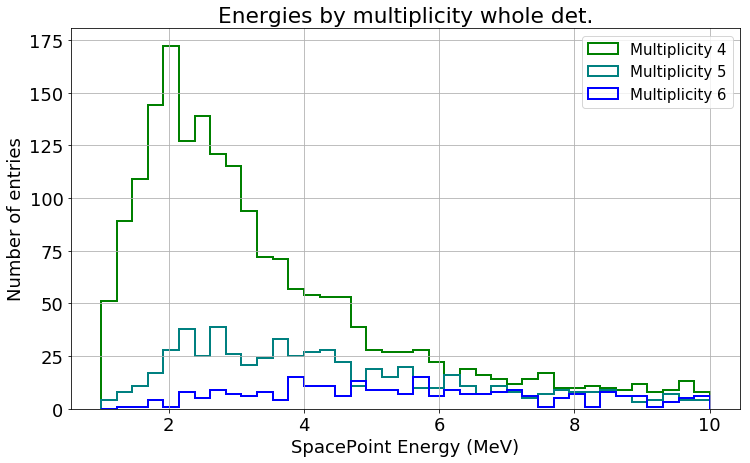

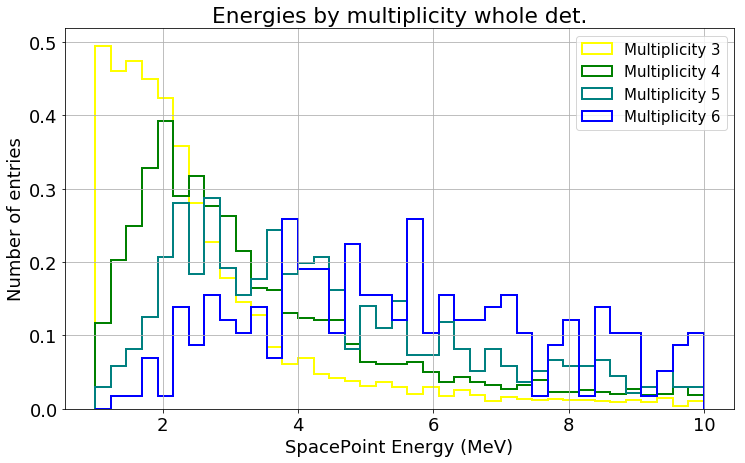

In [261]:
BINS = np.linspace(1,8,50)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
plt.hist(df_multi_w_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_w_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_w_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_w_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity whole det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(1,10,42)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)

BINS = np.linspace(1,10,40)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=False)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=False)
#plt.hist(df_multi_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=False)
plt.hist(df_multi_w_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=False)
plt.hist(df_multi_w_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=False)
plt.hist(df_multi_w_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=False)


plt.title("Energies by multiplicity whole det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(1,10,40)
fig = plt.figure(figsize=(12,7))

#off_E_vals = df_Sps_beam_off_yes_nu_charge['energy'].sample(104039)#.sample(95000)
#on_E_vals = df_Sps_beam_on['energy'].sample(104039)


#plt.ylim(1,2000000)
#g10_hist,b1,p1 = plt.hist(df_G10_off_cut_yes_nu_charge['energy'],histtype='step',bins = BINS,weights=g10_weights,lw=2,label='SPS Charge Near G10',color='CornflowerBlue',normed=False)
#plt.hist(df_multi_1['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 1',color='red',normed=True)
#plt.hist(df_multi_2['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 2',color='orange',normed=True)
plt.hist(df_multi_w_3['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 3',color='yellow',normed=True)
plt.hist(df_multi_w_4['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 4',color='green',normed=True)
plt.hist(df_multi_w_5['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 5',color='blue',normed=True)
plt.hist(df_multi_w_6['Es'],histtype='step',bins = BINS,lw=2,label='Multiplicity 6',color='purple',normed=True)


plt.title("Energies by multiplicity whole det.")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

evt_E_values = df_ryan_beamoff_lowthresh_30cmr['energy']
evt_t_values = df_ryan_beamoff_lowthresh_30cmr_EVT['evttime']
print "Total number of energies = ", len(evt_E_values), " of ", len(evt_t_values), " events."
df_ryan_beamoff_lowthresh_30cmr_EVT.head()

In [213]:
print "test"
print len(multiplicities_LowThresh15cm_g10)

test
53232


In [220]:
g10_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/g10_multiplicity_file.txt"
compl_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/compl_multiplicity_file.txt"
wholeDet_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/wholeDet_multiplicity_file.txt"
#saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10, multiplicities_LowThresh15cm_g10)
#saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl, multiplicities_LowThresh15cm_compl)
#saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg, multiplicities_LowThresh15cm)


Writing 1st array:
Writing 2nd array:
Writing 1st array:
Writing 2nd array:
Writing 1st array:
Writing 2nd array:


In [215]:
filelines=readArraysFromFile(g10_multiplicity_file)

In [216]:
print filelines[1][1]

1


In [217]:
print summedblips_LowThresh15cmg_g10

[298.0949287414551, 35.166777537565615, 10.19736297399492, 2.210086528502594, 1.7207468176925742, 1.7207468176925742, 1.0242226957876934, 2.3030326644176906, 0.9388228374795435, 0.8744183406882323, 0.7201204128544494, 0.7201204128544494, 0.6341070240030173, 0.6341070240030173, 0.610779898099195, 0.9010508659092487, 0.5659145067354847, 0.4286514859964628, 0.4286514859964628, 0.3947750711472082, 0.3915994627013736, 0.3915994627013736, 0.3583222412210062, 0.33757977404413203, 0.33757977404413203, 0.3351363591737639, 0.3301469366857288, 0.3232253592853549, 13.291772468545851, 4.6244987553663846, 3.1505508523730357, 4.97555900726554, 3.882188359432768, 2.137428249083363, 1.9487606817069754, 2.7576970835669306, 1.3973670479259384, 2.137009599282142, 1.3708127599838145, 1.8341610088950564, 0.885676577848631, 0.8648937286727575, 0.6468125870541961, 0.8547632491865171, 0.5894523392521589, 0.46093561921737625, 0.4163011158969547, 0.35717872685261465, 0.35717872685261465, 0.3241032216617526, 0.31

In [230]:
#Counting blips after 
#summedblips_LowThresh15cmg_g10_pt2, multiplicities_LowThresh15cm_g10_pt2 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_g10,df_ryan_beamoff_lowthresh_15cmr,2500,5000)
#summedblips_LowThresh15cmg_compl_pt2, multiplicities_LowThresh15cm_compl_pt2 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary,df_ryan_beamoff_lowthresh_15cmr,2500,5000)
#summedblips_LowThresh15cmg_pt2, multiplicities_LowThresh15cm_pt2 = countBlipMultiplicityNewCompleteDFOnly(df_ryan_beamoff_lowthresh_15cmr,2500,5000)

#summedblips_LowThresh15cmg_g10_pt3, multiplicities_LowThresh15cm_g10_pt3 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_g10,df_ryan_beamoff_lowthresh_15cmr,5000,7500)
#summedblips_LowThresh15cmg_compl_pt3, multiplicities_LowThresh15cm_compl_pt3 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary,df_ryan_beamoff_lowthresh_15cmr,5000,7500)
#summedblips_LowThresh15cmg_pt3, multiplicities_LowThresh15cm_pt3 = countBlipMultiplicityNewCompleteDFOnly(df_ryan_beamoff_lowthresh_15cmr,5000,7500)

summedblips_LowThresh15cmg_g10_pt4, multiplicities_LowThresh15cm_g10_pt4 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_g10,df_ryan_beamoff_lowthresh_15cmr,7500,10000)
summedblips_LowThresh15cmg_compl_pt4, multiplicities_LowThresh15cm_compl_pt4 = countBlipMultiplicityNew(df_ryan_beamoff_lowthresh_15cmr_G10_off_complementary,df_ryan_beamoff_lowthresh_15cmr,7500,10000)
summedblips_LowThresh15cmg_pt4, multiplicities_LowThresh15cm_pt4 = countBlipMultiplicityNewCompleteDFOnly(df_ryan_beamoff_lowthresh_15cmr,7500,10000)



Number of events with energies:  6081
Number of energy clusters in this DF:  0  out of   energies total
Number of events with energies:  6081
Number of energy clusters in this DF:  0  out of   energies total
Number of events with energies:  6081
Number of energy clusters in this DF:  0  out of   energies total


In [ ]:
print "Need to change saveLinesToFile to append instead of write... forgot to do it before I started running"

In [229]:
g10_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/g10_multiplicity_file.txt"
compl_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/compl_multiplicity_file.txt"
wholeDet_multiplicity_file="/uboone/data/users/rdorrill/lowThreshold/multiplicityFiles/wholeDet_multiplicity_file.txt"
#saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10, multiplicities_LowThresh15cm_g10)
#saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl, multiplicities_LowThresh15cm_compl)
#saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg, multiplicities_LowThresh15cm)

#saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt2, multiplicities_LowThresh15cm_g10_pt2)
#saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt2, multiplicities_LowThresh15cm_compl_pt2)
#saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt2, multiplicities_LowThresh15cm_pt2)

#saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt3, multiplicities_LowThresh15cm_g10_pt3)
#saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt3, multiplicities_LowThresh15cm_compl_pt3)
#saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt3, multiplicities_LowThresh15cm_pt3)

saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt4, multiplicities_LowThresh15cm_g10_pt4)
saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt4, multiplicities_LowThresh15cm_compl_pt4)
saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt4, multiplicities_LowThresh15cm_pt4)



Writing 1st array:
Writing 2nd array:
Writing 1st array:
Writing 2nd array:
Writing 1st array:
Writing 2nd array:


In [242]:
print summedblips_LowThresh15cmg_g10[0]
print summedblips_LowThresh15cmg_g10_pt2[0]
print summedblips_LowThresh15cmg_g10_pt3[0]

print summedblips_LowThresh15cmg_compl[0]
print summedblips_LowThresh15cmg_compl_pt2[0]
print summedblips_LowThresh15cmg_compl_pt3[0]

print summedblips_LowThresh15cmg[0]
print summedblips_LowThresh15cmg_pt2[0]
print summedblips_LowThresh15cmg_pt3[0]


298.094928741
32.8380965527
18.2535557114
1.4178051937
2.829577682
1.14722578892
298.094928741
49.3310879059
18.2535557114


In [ ]:

df_Sps_beam_off_cone = pd.DataFrame( root2array( myfile_beam_off_cone,BRANCH_SPS) )
df_Sps_beam_off_cone['energy']=E_recoY_off_run1_G10(df_Sps_beam_off_cone,238.4)

df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_complementary=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
#df_rest_det_off_cut=df_Sps_beam_off_cone.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')


summedblips_LowThresh15cmg_g10_pt4, multiplicities_LowThresh15cm_g10_pt4 = countBlipMultiplicityNew(df_G10_off_cut,df_Sps_beam_off_cone,0,2000)
summedblips_LowThresh15cmg_compl_pt4, multiplicities_LowThresh15cm_compl_pt4 = countBlipMultiplicityNew(df_G10_off_complementary,df_Sps_beam_off_cone,0,2000)
summedblips_LowThresh15cmg_pt4, multiplicities_LowThresh15cm_pt4 = countBlipMultiplicityNewCompleteDFOnly(df_Sps_beam_off_cone,0,2000)


 Number of events with energies:  606699
Number of energy clusters in this DF:  11950  out of   energies total
Number of events with energies:  606455


In [ ]:
saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt4, multiplicities_LowThresh15cm_g10_pt4)
saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt4, multiplicities_LowThresh15cm_compl_pt4)
saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt4, multiplicities_LowThresh15cm_pt4)


In [ ]:
summedblips_LowThresh15cmg_g10_pt5, multiplicities_LowThresh15cm_g10_pt5 = countBlipMultiplicityNew(df_G10_off_cut,df_Sps_beam_off_cone,2000,4000)
summedblips_LowThresh15cmg_compl_pt5, multiplicities_LowThresh15cm_compl_pt5 = countBlipMultiplicityNew(df_G10_off_complementary,df_Sps_beam_off_cone,2000,4000)
summedblips_LowThresh15cmg_pt5, multiplicities_LowThresh15cm_pt5 = countBlipMultiplicityNewCompleteDFOnly(df_Sps_beam_off_cone,2000,4000)

Number of events with energies:  606699
Number of energy clusters in this DF:  12398  out of   energies total
Number of events with energies:  606455


In [ ]:
saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt5, multiplicities_LowThresh15cm_g10_pt5)
saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt5, multiplicities_LowThresh15cm_compl_pt5)
saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt5, multiplicities_LowThresh15cm_pt5)


In [ ]:
summedblips_LowThresh15cmg_g10_pt6, multiplicities_LowThresh15cm_g10_pt6 = countBlipMultiplicityNew(df_G10_off_cut,df_Sps_beam_off_cone,4000,5000)
summedblips_LowThresh15cmg_compl_pt6, multiplicities_LowThresh15cm_compl_pt6 = countBlipMultiplicityNew(df_G10_off_complementary,df_Sps_beam_off_cone,4000,5000)
summedblips_LowThresh15cmg_pt6, multiplicities_LowThresh15cm_pt6 = countBlipMultiplicityNewCompleteDFOnly(df_Sps_beam_off_cone,4000,5000)
saveLinesToFile(g10_multiplicity_file,summedblips_LowThresh15cmg_g10_pt6, multiplicities_LowThresh15cm_g10_pt6)
saveLinesToFile(compl_multiplicity_file,summedblips_LowThresh15cmg_compl_pt6, multiplicities_LowThresh15cm_compl_pt6)
saveLinesToFile(wholeDet_multiplicity_file,summedblips_LowThresh15cmg_pt6, multiplicities_LowThresh15cm_pt6)


Number of events with energies:  606699


In [153]:
mults_temp=lines[1]
print mults_temp[70658]
print len(mults_temp)
mults_temp[70658]=mults_temp[70658].strip(']\n')
#mults_temp[70658]=mults_temp[70658].strip(']')
str1=mults_temp[70658]
print str1.strip(']\n')
print mults_temp[70658]

 1
70659
 1
 1


In [3]:
#*##########################################################################*#
##############################################################################
#*######################                              ######################*#
######################**     Ryan Blip Analysis Here  **######################
#*######################                              ######################*#
###############################################################Pt e###############
#*##########################################################################*#
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
import itertools
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
#from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial

plt.rcParams.update({'font.size': 20})


Welcome to JupyROOT 6.12/06


In [4]:
#rn_file_1='/pnfs/uboone/persistent/users/wforeman/blip_anatrees/BlipAna_RadonData_Phase1_20220209.root'
#rn_file_4='/uboone/data/users/wforeman/BlipAnaLite_20220407_RadonData_Phase1.root'
#rn_file_5='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase1_20220422.root'
rn_file_6='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase2_20220516.root'
blip_file0='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase1_20220506_BlipTree.root'
blip_file1='/pnfs/uboone/persistent/users/wforeman/anatrees/BlipAna_RadonData_Phase1_20220516_BlipTree.root'
blip_file2='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220519_BlipTree.root'
blip_file3='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220519_TrkMask_BlipTree.root'
blip_file4='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220526_BlipTree.root'
blip_file5='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220526_BlipTree_TrkMask.root'
blip_file6='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220602.root'
blip_file7='/uboone/data/users/wforeman/BlipAna_RadonData_Phase1_20220610_TrkMask_BlipTree.root'
blip_file8='/uboone/data/users/wforeman/BlipAna_20220712_RadonData_Phase1_BlipTree.root'

simulatedGammaBlips_short='/pnfs/uboone/scratch/users/rdorrill/uboonecode_mevscale/out/g10_gamma_sim_particlegun_v1_06/gen/hist_BlipAna_20220714_merged_300files_BlipTree.root'
#Before full MC ana version#simulatedGammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/hist_BlipAna_20220714_merged_1005files_BlipTree.root'
#simulatedGammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/hist_BlipAna_fullmc_20220721_merged_1098files_BlipTree.root'
#simulatedGammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/hist_BlipAna_fullmc_20220721_merged_4473files_BlipTree.root'
simulatedGammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/hist_BlipAna_fullmc_20220724_merged_6500files_BlipTree.root'
fullFileTree='/blipana/anatree'
newTree='/blipanaTrkMask/anatree'
EVT_BRANCH = '/blipana/anatree/event'
splitTree_ANA = 'anatree'
blipTree= 'bliptree'
newFileTree='/blipana/bliptree'
#BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
#BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'


In [5]:
print("test")

test


In [4]:
#df_Event_rn6 = pd.DataFrame( root2array(rn_file_6,newTree) )
#df_blip_file1 = pd.DataFrame( root2array(blip_file4,blipTree) )
#df_blip_file2 = pd.DataFrame( root2array(blip_file7,newFileTree) )
df_blip_file2 = pd.DataFrame( root2array(blip_file8,blipTree) )


In [5]:
#Region volumes:

#G10_region='((blip_y < -90.0 or blip_y > 90.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1036))) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1036))) '
##=((117-90) + (115-90))*(40+40+40+40+30+40+40+30+40+56)) + (20)*((40+36+40+36)) = 21187.7
#G10_equivalent_Vol_NearG10='(blip_y > -90.0 and blip_y < -36.0) and (blip_z>150 and blip_z<593.8) ' = 23965.2
#print df_blip_file1_3planes['blip_y'].max()
#print df_blip_file1_3planes['blip_y'].min()
#print df_blip_file1_3planes['blip_z'].max()





In [6]:

#df_Event_rn3
#print(len(df_Event_rn6))
#df_Event_rn6.head(4)
print(len(df_blip_file2))
#df_blip_file1
#df_Event_rn6
df_blip_file2.head()
#df_Event_rn3_NU = df_Event_rn3.query(NUSELECTION)


7744216


event    run   timestamp  blip_nplanes      blip_x     blip_y  blip_z  \
0   1701  26955  1627422402             2  142.811310 -17.129930    1.15   
1   1701  26955  1627422402             2  152.984604  56.828640    1.15   
2   1701  26955  1627422402             2  -41.965424 -43.110695    8.95   
3   1701  26955  1627422402             3   73.149368  39.075119    9.90   
4   1701  26955  1627422402             2  261.486115 -49.346077   13.15   

   blip_sigmayz   blip_dx  blip_dyz  ...  blip_incylinder  blip_pl0_clustid  \
0          -9.0  0.386607       0.6  ...            False                -9   
1          -9.0  0.446342       0.6  ...            False                 2   
2          -9.0  0.490587       0.6  ...            False                -9   
3           0.1  0.452809       0.6  ...            False                 6   
4          -9.0  0.466459       0.6  ...            False                -9   

   blip_pl1_clustid  blip_pl2_clustid  blip_pl0_nhits  blip_pl1_nhits  \
0               130               364               0               2   
1                -9               365               1               0   
2               127               368               0               2   
3               135               369               1               1   
4               125               370               0               2   

   blip_pl2_nhits  blip_pl0_nwires  blip_pl1_nwires  blip_pl2_nwires  
0               1                0                2                1  
1               2                1                0                2  
2               2                0                2                2  
3               2                1                1                2  
4               2                0                2                2  

[5 rows x 23 columns]

In [7]:
G10_region='((blip_y < -90.0 or blip_y > 90.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1100) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1200))) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1200))) '
rest_det_region='(blip_y > -90.0 and blip_y < 90.0) and (blip_z>20 and blip_z<1000)'
complementary_region=' ( (blip_y < -90.0 or blip_y > 90.0) and ( (blip_z>50 and blip_z<90) or (blip_z>150 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<875) or (blip_z>945 and blip_z<980) or (blip_z>1100 ) )) or ( (blip_y < 85.0 and blip_y > 60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) ))  or  ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) )  )'
G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '
G10_equivalent_Vol_NearG10='(blip_y > -90.0 and blip_y < -36.0) and (blip_z>150 and blip_z<593.8) ' 
#previously G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '


df_blip_file1_3planes=df_blip_file2.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
df_blip_file1_3planes_g10=df_blip_file1_3planes.query(G10_region)
df_blip_file1_3planes_complementary=df_blip_file1_3planes.query(complementary_region)
df_blip_file1_3planes_equivalentVol=df_blip_file1_3planes.query(G10_equivalent_Vol_NearG10)
#df_blip_file2_3planes=df_blip_file2.query('(blip_nplanes==3)')
#df_blip_file2_3planes_g10=df_blip_file2_3planes.query(G10_region)
#df_blip_file2_3planes_complementary=df_blip_file2_3planes.query(complementary_region)
#df_blip_file2_3planes_equivalentVol=df_blip_file2_3planes.query(G10_equivalent_Vol)



In [8]:
print(len(df_blip_file1_3planes))
df_blip_file1_3planes.head(5)


2141446


event    run   timestamp  blip_nplanes      blip_x      blip_y     blip_z  \
3    1701  26955  1627422402             3   73.149368   39.075119   9.900000   
7    1701  26955  1627422402             3   91.012390   38.382298  19.700001   
10   1701  26955  1627422402             3   28.712160 -114.904198  39.200001   
13   1701  26955  1627422402             3  129.602417  -94.292793  49.500000   
15   1701  26955  1627422402             3  -26.500351   -8.902690  74.199997   

    blip_sigmayz   blip_dx  blip_dyz  ...  blip_incylinder  blip_pl0_clustid  \
3            0.1  0.452809       0.6  ...            False                 6   
7            0.1  0.482482       0.6  ...            False                 7   
10           0.1  0.391596       0.6  ...            False                37   
13           0.1  0.430085       0.6  ...            False                34   
15           0.3  0.590496       0.9  ...            False                16   

    blip_pl1_clustid  blip_pl2_clustid  blip_pl0_nhits  blip_pl1_nhits  \
3                135               369               1               1   
7                136               375               2               1   
10               120               382               1               2   
13               121               386               1               2   
15               132               392               3               2   

    blip_pl2_nhits  blip_pl0_nwires  blip_pl1_nwires  blip_pl2_nwires  
3                2                1                1                2  
7                2                2                1                2  
10               1                1                2                1  
13               2                1                2                2  
15               2                3                2                2  

[5 rows x 23 columns]

/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


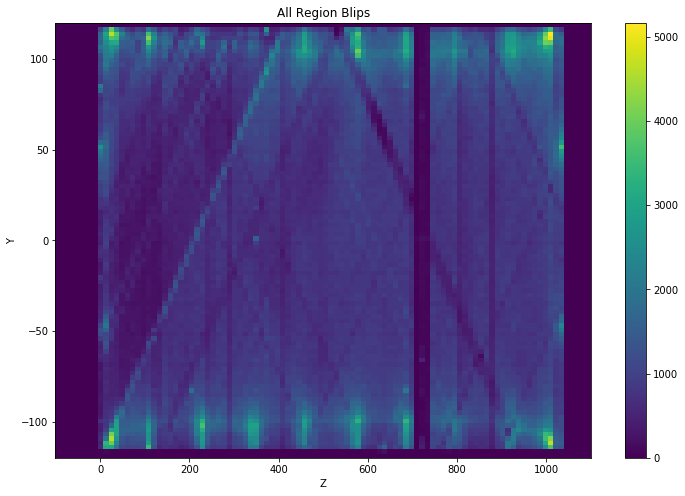

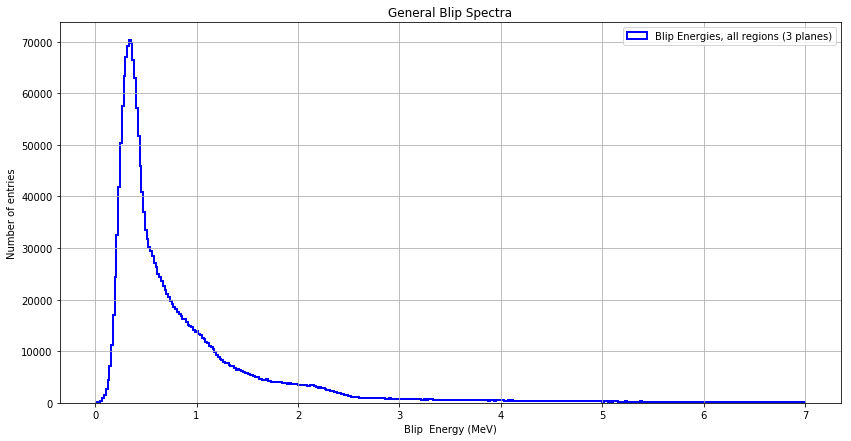

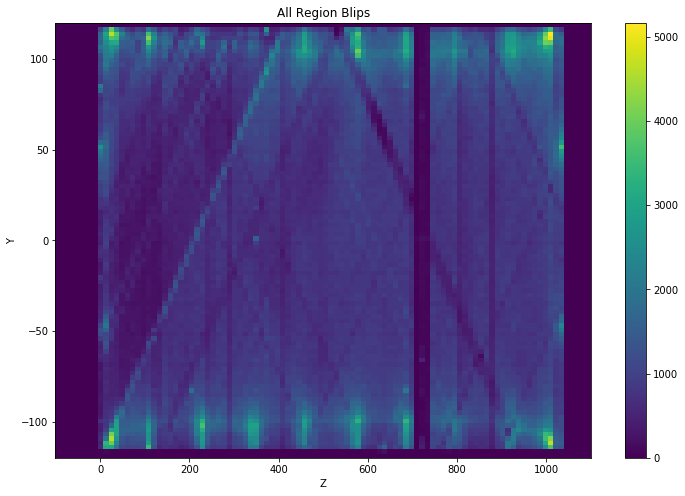

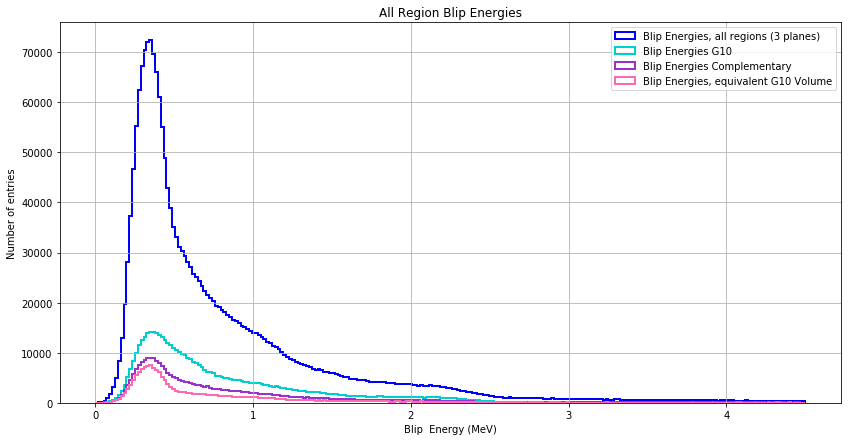

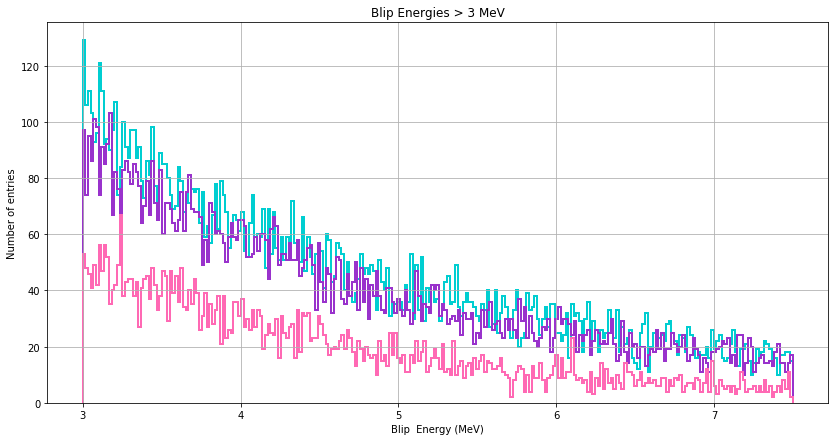

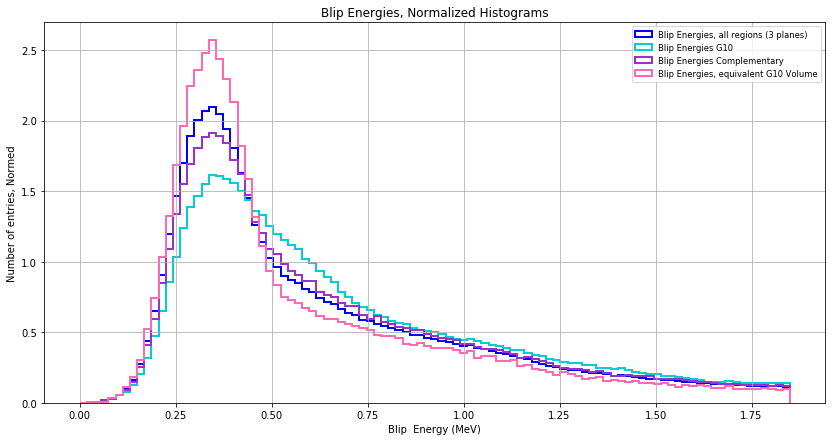

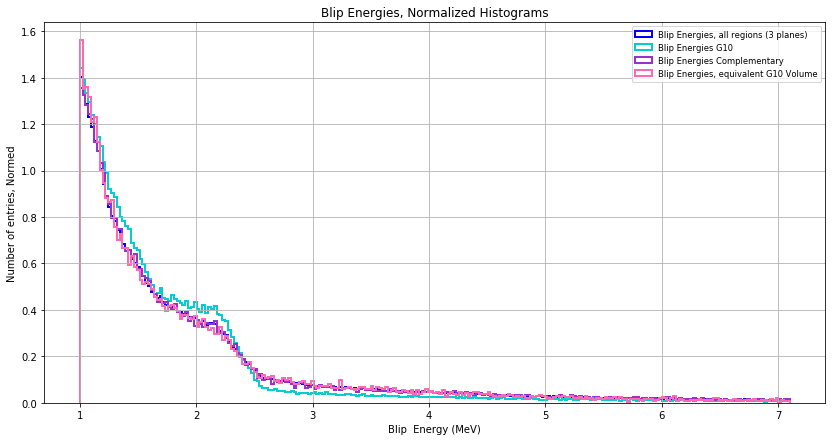

In [9]:
##df_blip_file2 = pd.DataFrame( root2array(blip_file8,blipTree) )

G10_region='((blip_y < -90.0 or blip_y > 90.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1100) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1200))) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1200))) '
rest_det_region='(blip_y > -90.0 and blip_y < 90.0) and (blip_z>20 and blip_z<1000)'
complementary_region=' ( (blip_y < -90.0 or blip_y > 90.0) and ( (blip_z>50 and blip_z<90) or (blip_z>150 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<875) or (blip_z>945 and blip_z<980) or (blip_z>1100 ) )) or ( (blip_y < 85.0 and blip_y > 60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) ))  or  ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) )  )'
G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '
G10_equivalent_Vol_NearG10='(blip_y > -90.0 and blip_y < -36.0) and (blip_z>150 and blip_z<593.8) ' 
#previously G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '


##df_blip_file1_3planes=df_blip_file2.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
##df_blip_file1_3planes_g10=df_blip_file1_3planes.query(G10_region)
##df_blip_file1_3planes_complementary=df_blip_file1_3planes.query(complementary_region)
##df_blip_file1_3planes_equivalentVol=df_blip_file1_3planes.query(G10_equivalent_Vol_NearG10)
#df_blip_file2_3planes=df_blip_file2.query('(blip_nplanes==3)')
#df_blip_file2_3planes_g10=df_blip_file2_3planes.query(G10_region)
#df_blip_file2_3planes_complementary=df_blip_file2_3planes.query(complementary_region)
#df_blip_file2_3planes_equivalentVol=df_blip_file2_3planes.query(G10_equivalent_Vol)

fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(df_blip_file2['blip_z'],df_blip_file2['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips")
plt.xlabel('Z')
plt.ylabel('Y')

BINS = np.linspace(0,7,400)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)

plt.title("General Blip Spectra")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='medium')
#plt.yscale('log')

fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(df_blip_file2['blip_z'],df_blip_file2['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips")
plt.xlabel('Z')
plt.ylabel('Y')

BINS = np.linspace(0,4.5,250)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)

plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='medium')
#plt.yscale('log')

BINS = np.linspace(3,7.5,270)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
#lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)

plt.title("Blip Energies > 3 MeV")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
#plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,1.85,100)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=True)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=True)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=True)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=True)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=True)

plt.title("Blip Energies, Normalized Histograms")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Normed')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(1.0,7.1,250)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=True)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=True)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=True)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=True)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=True)

plt.title("Blip Energies, Normalized Histograms")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Normed')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


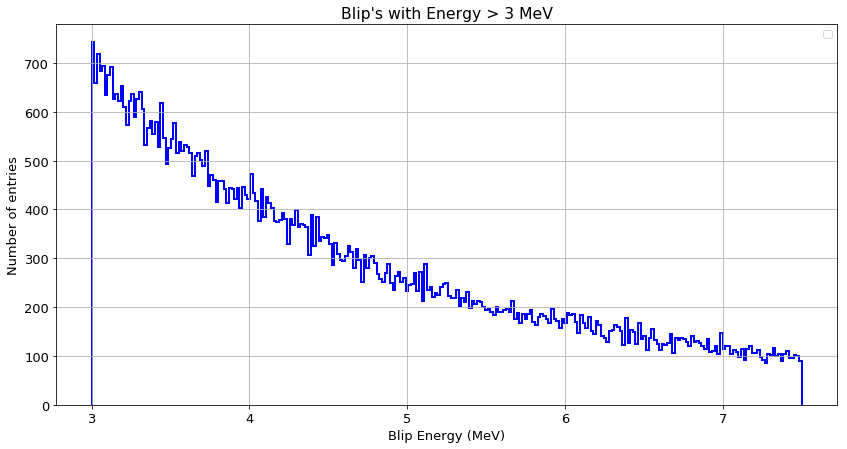

In [10]:
plt.rcParams.update({'font.size': 13})

BINS = np.linspace(3,7.5,270)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

plt.title("Blip's with Energy > 3 MeV")
plt.xlabel("Blip Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=0,fontsize='small')
#plt.yscale('log')

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)
#plt.rcParams.update({'font.size': 18})

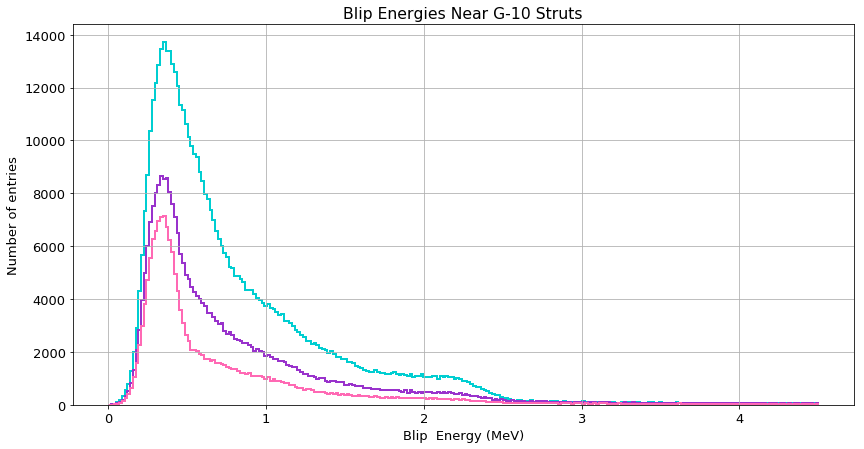

In [11]:
BINS = np.linspace(0,4.5,260)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)

plt.title("Blip Energies Near G-10 Struts")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
#plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

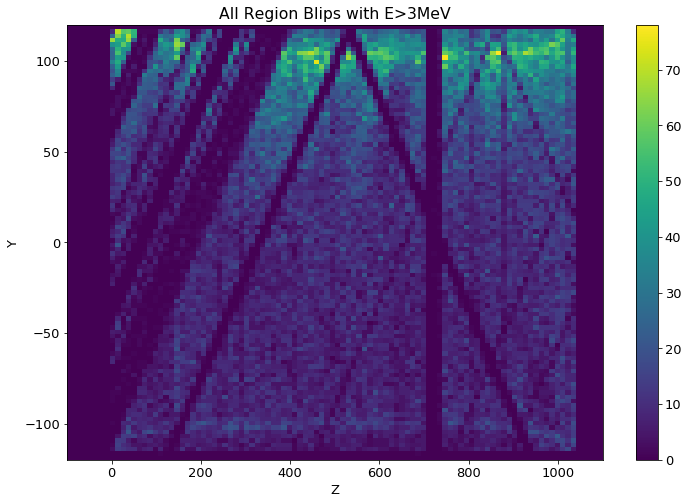

In [12]:
def findRates3MevBlips(inputDF):
    df_grouped_events = inputDF.groupby(["event","run","timestamp"])

    rates_3MeV_blips=[]

    for group_name, df_group in df_grouped_events:
        highEBlips = df_group.query('(blip_energy>3.0)')
        #print(len(highEBlips))
        rates_3MeV_blips.append(len(highEBlips))
    return rates_3MeV_blips
    #df_blip_file1_3planes_highE = df_blip_file1.query('(blip_nplanes==3) and (blip_energy>3.0)')

def findRatesAllBlips(inputDF):
    df_grouped_events = inputDF.groupby(["event","run","timestamp"])

    rates_blips=[]

    for group_name, df_group in df_grouped_events:
        highEBlips = df_group.query('(blip_energy>0.0)')
        #print(len(highEBlips))
        rates_blips.append(len(highEBlips))
    return rates_blips
    #df_blip_file1_3planes_highE = df_blip_file1.query('(blip_nplanes==3) and (blip_energy>3.0)')
    

def plot3MevBlipLocations(df3p):
    dfhighEBlips = df3p.query('(blip_energy>3.0)')
    fig = plt.figure(figsize=(12,8))
    plt.tight_layout()

    plt.hist2d(dfhighEBlips['blip_z'],dfhighEBlips['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
    plt.colorbar()
    plt.title("All Region Blips with E>3MeV")
    plt.xlabel('Z')
    plt.ylabel('Y')
    
plot3MevBlipLocations(df_blip_file1_3planes)

Text(0,0.5,'Y')

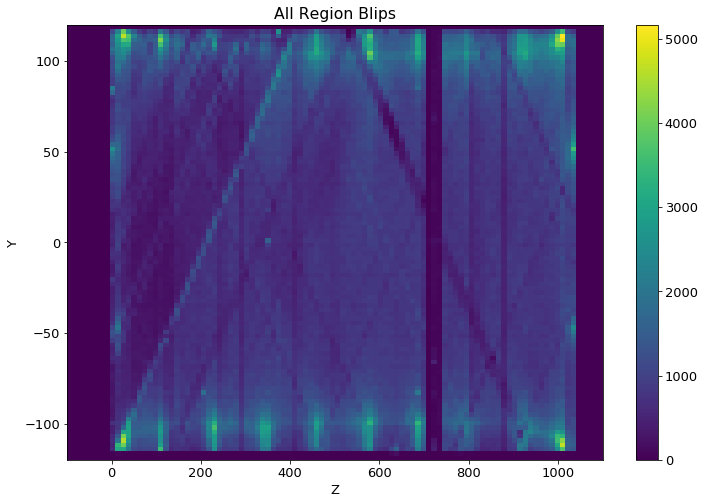

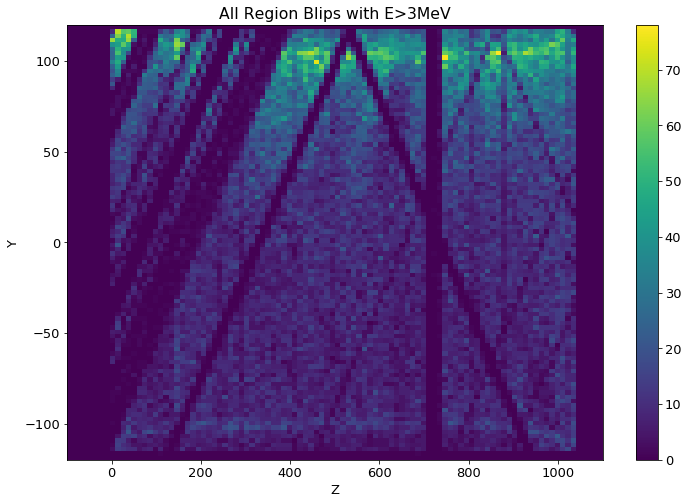

In [14]:
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(df_blip_file2['blip_z'],df_blip_file2['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips")
plt.xlabel('Z')
plt.ylabel('Y')


dfhighEBlips = df_blip_file1_3planes.query('(blip_energy>3.0)') 
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(dfhighEBlips['blip_z'],dfhighEBlips['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips with E>3MeV")
plt.xlabel('Z')
plt.ylabel('Y')
   
    



In [15]:
print(len(df_blip_file1_3planes))
dfhighEBlips.head()


2141446


event    run   timestamp  blip_nplanes     blip_x      blip_y  \
189   1702  26955  1627422404             3  99.243629  106.278687   
232   1703  26955  1627422406             3  98.685890  -26.049994   
233   1703  26955  1627422406             3  84.416397  -17.736149   
244   1703  26955  1627422406             3  50.640991  -80.263184   
404   1704  26955  1627422408             3   3.582153   98.830872   

         blip_z  blip_sigmayz   blip_dx  blip_dyz  ...  blip_incylinder  \
189  983.700012           0.1  0.544106       1.8  ...            False   
232  355.100006           0.1  1.547361       2.1  ...            False   
233  364.700012           0.1  1.961544       1.8  ...            False   
244  396.799988           0.1  1.111429       1.8  ...            False   
404  910.599976           0.3  0.742958       1.5  ...            False   

     blip_pl0_clustid  blip_pl1_clustid  blip_pl2_clustid  blip_pl0_nhits  \
189                57               267               527               5   
232                54               160               404               4   
233                53               165               408               6   
244                65               135               437               4   
404                84               356               647               3   

     blip_pl1_nhits  blip_pl2_nhits  blip_pl0_nwires  blip_pl1_nwires  \
189               3               6                5                3   
232               8               5                4                7   
233               5               5                6                4   
244               6               5                4                6   
404               5               5                3                5   

     blip_pl2_nwires  
189                6  
232                5  
233                4  
244                5  
404                5  

[5 rows x 23 columns]

1.1377
1.1377


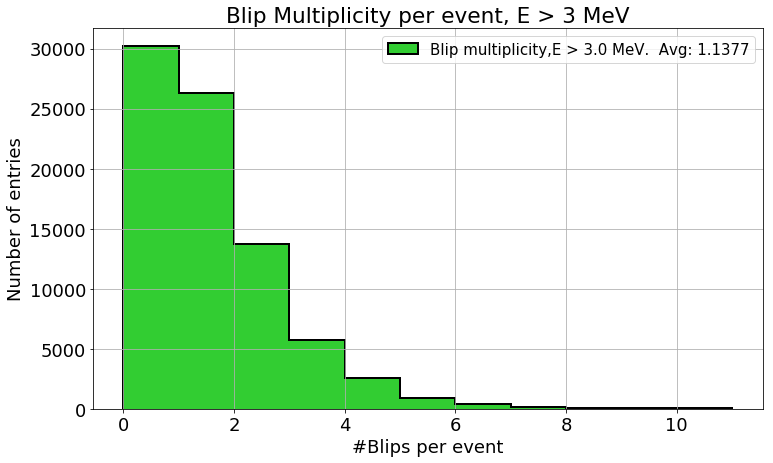

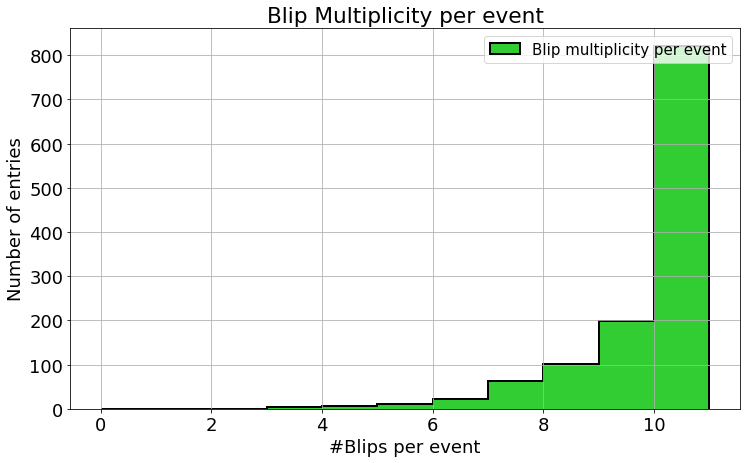

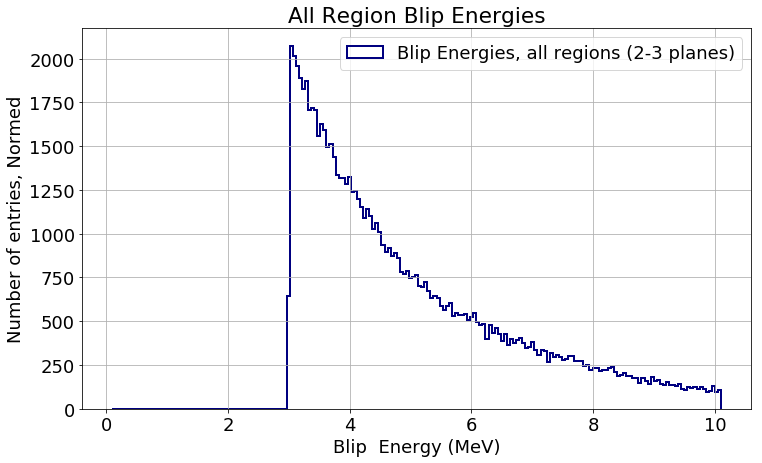

In [16]:
rates_3MeV_blips = findRates3MevBlips(df_blip_file1_3planes)

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,11,12)
fig = plt.figure(figsize=(12,7))
avgMultipl = round(np.mean(rates_3MeV_blips),4)
print avgMultipl
plt.hist(rates_3MeV_blips,histtype='step',bins = BINS,lw=2,label='Blip multiplicity,E > 3.0 MeV.  Avg: %s'%(avgMultipl),color='limegreen',fill=True,normed=False,edgecolor='black', linewidth=1.2)

plt.title("Blip Multiplicity per event, E > 3 MeV")
plt.xlabel('#Blips per event')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')

rates_all_blips = findRatesAllBlips(df_blip_file1_3planes)

plt.rcParams.update({'font.size': 18})
BINS = np.linspace(0,11,12)
fig = plt.figure(figsize=(12,7))
avgMultipl = round(np.mean(rates_3MeV_blips),4)
print avgMultipl
plt.hist(rates_all_blips,histtype='step',bins = BINS,lw=2,label='Blip multiplicity per event',color='limegreen',fill=True,normed=False,edgecolor='black', linewidth=1.2)

plt.title("Blip Multiplicity per event")
plt.xlabel('#Blips per event')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.ylim(0,1)
#plt.yscale('log')


df_highE = df_blip_file1_3planes.query('(blip_energy>3.0)')

BINS = np.linspace(0.1,10.1,200)
fig = plt.figure(figsize=(12,7))
plt.tight_layout()

lowthresh_hist0,b0,p0 = plt.hist(df_highE['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)

plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Normed')
plt.grid()
plt.legend(loc=1,fontsize='medium')
#plt.yscale('log')


In [17]:
#for group_name, df_group in df_grouped_events:
#    highEBlips = df_group.query('(blip_energy>3.0)')
#    print(highEBlips['blip_energy'])


In [18]:
#df_grouped_events.head()

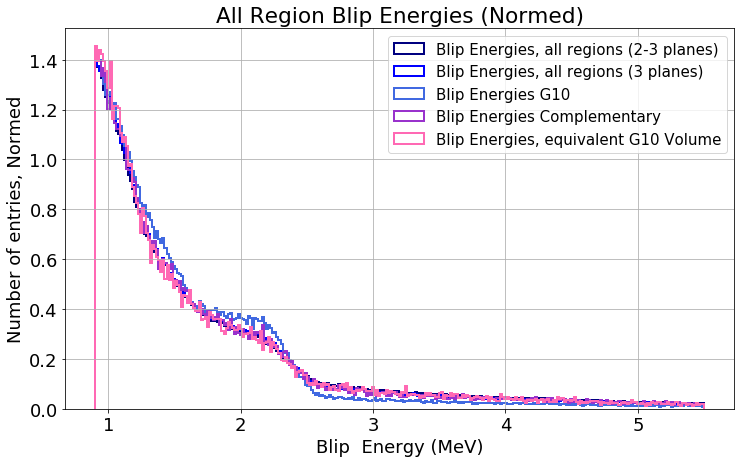

In [17]:
BINS = np.linspace(0.9,5.5,300)
fig = plt.figure(figsize=(12,7))
plt.tight_layout()

lowthresh_hist0,b0,p0 = plt.hist(df_blip_file2['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=True)
lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=True)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='royalblue',normed=True)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='darkorchid',normed=True)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='hotpink',normed=True)

plt.title("All Region Blip Energies (Normed)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries, Normed')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [17]:
def countBlipMultiplicityNew(df_to_test,complete_df,minStartingGroupNum,maxEventNum=3000):
    numMaxPts = 8 #max number of clusters to sum
    multiplicityInRadius = []
    summedBlipEs = []

    df_grouped = df_to_test.groupby(["event","run","timestamp"])
    #cd_grouped = completeDetDF(["event","run","timestamp"])
    print "Number of events with energies: ", df_grouped["blip_energy"].first().count() #counting number of unique events
    counter = 0
    #minStartingGroupNum=3300 #Group number to start on, should be > 0 if early part of file processed already

    for group_name, df_group in df_grouped:
        usedEnergies = []
        blip_Es_ievent = df_group["blip_energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 7
        if counter > minStartingGroupNum:
            for j in range(len(df_group)):
                if len(blip_Es_ievent) > 0:
                    curr_Max_E = max(blip_Es_ievent)
                    if curr_Max_E < 0.30:    #Only want E > 0.300 MeV
                        break
                    maxesUsed+=1
                    multiplicity = 1
                    maxIndex = blip_Es_ievent.index(curr_Max_E)
                    usedEnergies.append(curr_Max_E)
                    blip_Es_ievent.remove(curr_Max_E)
                    maxMember = df_group.iloc[maxIndex]
                    blip_x,blip_y,blip_z = maxMember["blip_x"],maxMember["blip_y"],maxMember["blip_z"]
                    nRun,nSubRun,nEvent = maxMember["run"],maxMember["timestamp"],maxMember["event"]
                    #Next line: 15 cm box around max blip:
                    nearby_blips = complete_df.query('(run == %s) and (timestamp == %s) and(event == %s) and (blip_x > %s and blip_x < %s) and (blip_y > %s and blip_y < %s) and (blip_z>%s and blip_z< %s)'%(nRun, nSubRun, nEvent,blip_x-30.0,blip_x+30.0,blip_y-30.0,blip_y+30.0,blip_z-15.0,blip_z+30.0))
                    completeNearbyEs = nearby_blips["blip_energy"].agg(list)

                    nearbyESums = curr_Max_E
                    for nearE in completeNearbyEs:
                        if nearE not in usedEnergies:
                            usedEnergies.append(nearE)
                            nearbyESums += nearE
                            multiplicity += 1
                            if nearE in blip_Es_ievent:
                                blip_Es_ievent.remove(nearE)
                    multiplicityInRadius.append(multiplicity)
                    summedBlipEs.append(nearbyESums)
                elif maxesUsed == numMaxPts:
                    break

        counter+=1
        if counter > maxEventNum:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of "," energies total"
    return summedBlipEs,multiplicityInRadius


In [18]:
#df_blip_file1_3planes=df_blip_file1.query('(blip_nplanes==3)')
#df_blip_file1_3planes_g10=df_blip_file1.query(G10_region)
#df_blip_file1_3planes_complementary=df_blip_file1.query(complementary_region)
#df_blip_file1_3planes_equivalentVol=df_blip_file1.query(G10_equivalent_Vol)

#countBlipMultiplicityNew(df_blip_file1_3planes_g10,df_blip_file1_3planes,0,5000)
print("hi")


hi


In [19]:
def returnMaxBlipEs(thisDF):
    maxblips = []
    df_grouped = thisDF.groupby(["event","run","timestamp"])
    #Here, we're cycling through all the stuff in one event -- since we're on blip branch, this is a collection of blip points
    for group_name, df_group in df_grouped:
        eventMaxE = df_group["blip_energy"].max()
        maxblips.append(eventMaxE)
    return maxblips

def plotMaxBlipLocs(thisDF):
    #print "working location"
    thisDF_cut = thisDF.query(('blip_energy>5.0 and blip_nplanes==3'))
    fig = plt.figure(figsize=(12,7))
    plt.hist2d(thisDF_cut['blip_z'].values,thisDF_cut['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
    plt.colorbar()
    plt.title("Max Blip Energy Locations (E > 4.5 MeV)")
    plt.xlabel('Z')
    plt.ylabel('Y')
    

def returnMaxBlipsPlusNeighbors(thisDF,completeDetDF,summingRadius):
    numMaxPts = 2 #max number of clusters to sum per event

    summedBlipEs = [] #for First blip_Q in an event + nearest neighbor + next nearest neighbor
    multiplicityInRadius = []

    df_grouped = thisDF.groupby(["event","run","timestamp"])
    #cd_grouped = completeDetDF(["event","run","timestamp"])
    num_events_tot=df_grouped["blip_energy"].first().count()
    print "Number of events with energies: ",num_events_tot  #counting number of unique events
    eventstoRun=10000
    counter = 0

    for group_name, df_group in df_grouped:
        usedEnergies = []
        blip_Es_ievent = df_group["blip_energy"].agg(list)
        maxesUsed = 0 #Counts how many of the higher energy blips in an event were used. Max currently 3
        for j in range(len(df_group)):
            if len(blip_Es_ievent) > 0 and maxesUsed <= numMaxPts:
                curr_Max_E = max(blip_Es_ievent)
                if curr_Max_E < 0.50:    #Only want E > 0.500 MeV
                    break
                maxesUsed+=1
                multiplicity = 1
                maxIndex = blip_Es_ievent.index(curr_Max_E)
                usedEnergies.append(curr_Max_E)
                blip_Es_ievent.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex]
                blip_x,blip_y,blip_z = maxMember["blip_x"],maxMember["blip_y"],maxMember["blip_z"]
                nRun,nSubRun,nEvent = maxMember["run"],maxMember["timestamp"],maxMember["event"]

                completeDetDF_nearby_blips = completeDetDF.query('(run == %s) and (timestamp == %s) and(event == %s) and (blip_x > %s and blip_x < %s) and (blip_y > %s and blip_y < %s) and (blip_z>%s and blip_z< %s)'%(nRun, nSubRun, nEvent,blip_x-20.0,blip_x+20.0,blip_y-20.0,blip_y+20.0,blip_z-20.0,blip_z+20.0))
                completeNearbyEs = completeDetDF_nearby_blips["blip_energy"].agg(list)

                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in blip_Es_ievent:
                            blip_Es_ievent.remove(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
            elif maxesUsed == numMaxPts:
                break

        counter+=1
        if counter > eventstoRun:
                break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ",num_events_tot," energies total"
    return summedBlipEs,multiplicityInRadius

def sumBlipsinEvent(df0):
    eventSums=[]
    df0_grouped = df0.groupby(["event","run","timestamp"])
    for group_name, df_group in df0_grouped:
        summedE = df_group["blip_energy"].sum()
        eventSums.append(summedE)
    return eventSums

def sumMaxAndNeighborsInRadius(thisDF,summingRadius): #sum blips within summing radius
    summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    #eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["event","run","timestamp"])
    print "Number of events with energies: ", df_grouped["blip_energy"].first().count() #counting number of unique events
    #counter = 0
    for group_name, df_group in df_grouped:
        SPS_Es_in_event = df_group["blip_energy"].agg(list)
        #print counter
        for j in range(len(df_group)):
            if len(SPS_Es_in_event) > 0:
                curr_Max_E = max(SPS_Es_in_event)
                if curr_Max_E < 0.40:    #Only want E > 0.500 MeV
                    break
                maxIndex = SPS_Es_in_event.index(curr_Max_E) 
                SPS_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["blip_x"],maxMember["blip_y"],maxMember["blip_z"]
                #eventEs.append(curr_Max_E)
                nearbyESums = curr_Max_E
                multiplicity = 1
                if (j+1) < len(df_group):
                    for k in range((j+1),len(df_group)):
                        nextMember = df_group.iloc[k]
                        nextE = nextMember["blip_energy"]
                        if nextE in SPS_Es_in_event:
                            thisDistance = DistTweenMaxNPoint(blip_x,blip_y,blip_z,nextMember)
                            if thisDistance > 0.0 and thisDistance < summingRadius:  #If close to first blip, add the energy in, put on list of already added blips
                                multiplicity += 1
                                SPS_Es_in_event.remove(nextE)
                                nearbyESums+= nextE
                                #eventEs.append(nextE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
                
        #counter+=1
        #if counter > 600000:
        #        break
    #print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    #return eventEs, summedBlipEs,multiplicityInRadius
    return summedBlipEs,multiplicityInRadius



def sumMaxAndNeighborsInRadiusAllData(thisDF,completeDetDF,summingRadius): #sum blips within summing radius -- in a region, but then add blips from anywhere nearby in the detector volume
    summedBlipEs = [] #for First blip_Q in an event + nearest neighbor + next nearest neighbor
    eventEs = []
    multiplicityInRadius = []
    df_grouped = thisDF.groupby(["event","run","timestamp"])
    #cd_grouped = completeDetDF(["N_Run","N_timestamp","N_Event"])
    print "Number of events with energies: ", df_grouped["blip_energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        usedEnergies = []
        blip_Es_in_event = df_group["blip_energy"].agg(list)
        for j in range(len(df_group)):
            if len(blip_Es_in_event) > 0:
                curr_Max_E = max(blip_Es_in_event)
                eventEs.append(curr_Max_E)
                multiplicity = 1
                if curr_Max_E < 0.25:    #Only want E > 0.500 MeV
                    break
                maxIndex = blip_Es_in_event.index(curr_Max_E) 
                usedEnergies.append(curr_Max_E)
                blip_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex] 
                blip_x,blip_y,blip_z = maxMember["blip_x"],maxMember["blip_y"],maxMember["blip_z"]
                nRun,ntimestamp,nEvent = maxMember["run"],maxMember["timestamp"],maxMember["event"]
                
                completeDetDF_nearby_blips = completeDetDF.query('(run == %s) and (timestamp == %s) and(event == %s) and (blip_x > %s and blip_x < %s) and (blip_y > %s and blip_y < %s) and (blip_z>%s and blip_z< %s)'%(nRun, ntimestamp, nEvent,blip_x-summingRadius,blip_x+summingRadius,blip_y-summingRadius,blip_y+summingRadius,blip_z-summingRadius,blip_z+summingRadius))
                completeNearbyEs = completeDetDF_nearby_blips["blip_energy"].agg(list)
                
                nearbyESums = curr_Max_E
                for nearE in completeNearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in blip_Es_in_event:
                            blip_Es_in_event.remove(nearE)
                            eventEs.append(nearE)
                multiplicityInRadius.append(multiplicity)
                summedBlipEs.append(nearbyESums)
        print(counter)       
        counter+=1
        #if counter > 2700:
        #        break
    print "Number of energy clusters in this DF: ", len(summedBlipEs), " out of ", len(eventEs), " energies total"
    return eventEs, summedBlipEs,multiplicityInRadius

def fitComptonEdge(binVals,bins): #works right for 100 bins
    vals662 = []
    peakCts662 = -1
    maxBin662 = -1
    for i in range(23,38):
        vals662.append(binVals[i])
        if binVals[i] > peakCts662:
            peakCts662 = binVals[i]
            maxBin662 = bins[i]

    print "0.662 peakcts, peak, MeV/ADC: ", peakCts662," ",maxBin662, " ",(maxBin662/0.4220)


def DistTweenMaxNPoint(xA,yA,zA,memberB):
    xB = memberB["blip_x"]
    yB = memberB["blip_y"]
    zB = memberB["blip_z"]
    deltaxSqd = ((xA-xB)**2)
    deltaySqd = ((yA-yB)**2)
    deltazSqd= ((zA-zB)**2)
    dist_from_A = np.sqrt(deltaxSqd+deltaySqd+deltazSqd)
    #print "x1,x2: (%s,%s)\ty1,y2: (%s,%s)\tz1,z2: (%s,%s)\t"%(xA,xB,yA,yB,zA,zB)
    #print "Distance: ",dist_from_A 
    return dist_from_A  

class maxBlob:     #For Storing information of summed high energy blips in an event
  def __init__(self, energy,summmedEnergy,x,y,z):
    self.blip_energy = energy
    self.blip_sums = summmedEnergy
    self.blip_x = x
    self.blip_y = y
    self.blip_z = z
    
def sumMaxAndNeighborsInRadiusIntoDF(thisDF,summingRadius): #sum blips within summing radius
    #summedBlipEs = [] #for First SPS_Q in an event + nearest neighbor + next nearest neighbor
    #multiplicityInRadius = []
    df_blipsums = pd.DataFrame({'blip_energy': [],'blip_multiplicity': [], 'blip_sum': [],'blip_x': [],'blip_y': [],'blip_z': []},index=[])
    df_grouped = thisDF.groupby(["event","run","timestamp"])
    print "Number of events with energies: ", df_grouped["blip_energy"].first().count() #counting number of unique events
    counter = 0
    for group_name, df_group in df_grouped:
        blip_Es_in_event = df_group["blip_energy"].agg(list)
        usedEnergies=[]
        curr_Max_E = 0
        for j in range(len(df_group)):
            if len(blip_Es_in_event) > 0 and counter < 20000:
                curr_Max_E = max(blip_Es_in_event)
                #print "Max: ",curr_Max_E
                maxIndex = blip_Es_in_event.index(curr_Max_E)
                blip_Es_in_event.remove(curr_Max_E)
                maxMember = df_group.iloc[maxIndex]
                blip_x,blip_y,blip_z = maxMember["blip_x"],maxMember["blip_y"],maxMember["blip_z"]
                nearby_blips = df_group.query('(blip_x > %s and blip_x < %s) and (blip_y > %s and blip_y < %s) and (blip_z>%s and blip_z< %s)'%(blip_x-summingRadius,blip_x+summingRadius,blip_y-summingRadius,blip_y+summingRadius,blip_z-summingRadius,blip_z+summingRadius))
                nearbyEs = nearby_blips["blip_energy"].agg(list)
                nearbyESums = curr_Max_E
                multiplicity = 1
                for nearE in nearbyEs:
                    if nearE not in usedEnergies:
                        usedEnergies.append(nearE)
                        nearbyESums += nearE
                        multiplicity += 1
                        if nearE in blip_Es_in_event:
                            blip_Es_in_event.remove(nearE) 
                #print "Multiplicity: ", multiplicity
                df_blipsums = df_blipsums.append({'blip_energy': curr_Max_E,'blip_sum':nearbyESums, 'blip_multiplicity': multiplicity, 'blip_x': blip_x,'blip_y': blip_y,'blip_z': blip_z}, ignore_index=True)
            if curr_Max_E < 0.500:    #Only want E > 0.330 MeV
                break
        counter+=1
        #print "Event#: ", counter
        if counter > 20000:
            break
    return df_blipsums

In [20]:
#df_blip_file1_3planes=df_blip_file2.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')

#summedBlipDF = sumMaxAndNeighborsInRadiusIntoDF(df_blip_file1_3planes,20)

In [21]:
maxBlipEs = returnMaxBlipEs(df_blip_file1_3planes)
maxBlipEs_g10 = returnMaxBlipEs(df_blip_file1_3planes_g10)
maxBlipEs_complementary = returnMaxBlipEs(df_blip_file1_3planes_complementary)
maxBlipEs_equivalentVol = returnMaxBlipEs(df_blip_file1_3planes_equivalentVol)



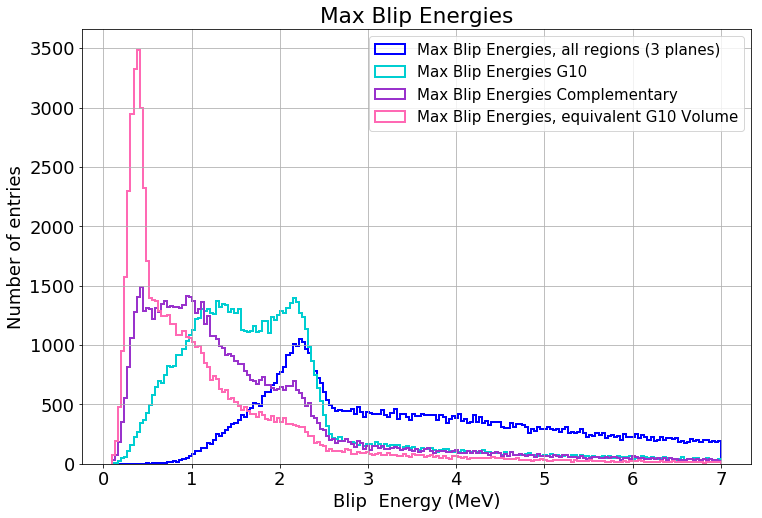

In [22]:


BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(maxBlipEs,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(maxBlipEs_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(maxBlipEs_complementary,histtype='step',bins = BINS,lw=2,label='Max Blip Energies Complementary',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(maxBlipEs_equivalentVol,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, equivalent G10 Volume',color='hotpink',normed=False)

plt.title("Max Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [23]:
def plotMaxBlipLocs(thisDF):
    #print "working location"
    thisDF_cut = thisDF.query(('blip_energy>3.0 and blip_nplanes==3'))
    fig = plt.figure(figsize=(12,7))
    plt.hist2d(thisDF_cut['blip_z'].values,thisDF_cut['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,label='OFF Beam Data')#,norm=LogNorm())
    plt.colorbar()
    plt.title("Max Blip Energy Locations (E > 3.0 MeV)")
    plt.xlabel('Z')
    plt.ylabel('Y')
    
#plotMaxBlipLocs(df_blip_file1_3planes)

In [47]:
g10_upper_det_region_cut = '((blip_y > 90.0 and blip_y < 117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1036)))'
g10_lower_det_region_cut = '((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1036))) '
complementary_upper_det_region_cut = '((blip_y > 90.0 and blip_y < 117.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980) or (blip_z>1036 ) )) or ( (blip_y < 85.0 and blip_y > 60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) ))'
complementary_lower_det_region_cut = ' ( (blip_y < -90.0 and blip_y > -122.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980) or (blip_z>1036 ) )) or ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1035.0 ) )  )'
g10_equivalent_half_region_cut = '(blip_y > 0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '
#g10_equivalent_half_region_cut_lower = '(blip_y > -85.0 and blip_y < -58.0) and (blip_z>250 and blip_z<702.8) '
g10_equivalent_half_region_cut_lower = '(blip_y > -85.0 and blip_y < -58.0) and (blip_z>250 and blip_z<700.8) '



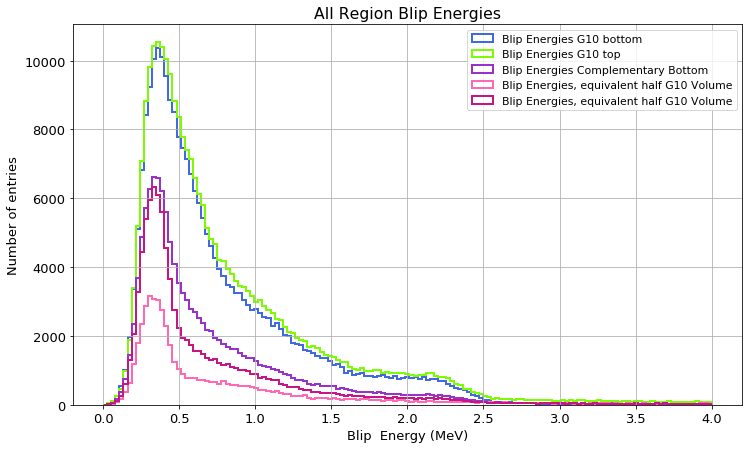

In [48]:
#df_blip_file1_3planes = df_blip_file1.query('(blip_nplanes==3)')
df_blip_file1_3planes_g10_lower = df_blip_file1_3planes.query(g10_lower_det_region_cut)
df_blip_file1_3planes_g10_upper = df_blip_file1_3planes.query(g10_upper_det_region_cut)
df_blip_file1_3planes_complementary_lower = df_blip_file1_3planes.query(complementary_lower_det_region_cut)
df_blip_file1_3planes_equivalentVol_half = df_blip_file1_3planes.query(g10_equivalent_half_region_cut)
df_blip_file1_3planes_equivalentVol_half_lower = df_blip_file1_3planes.query(g10_equivalent_half_region_cut_lower)

BINS = np.linspace(0,4,150)
fig = plt.figure(figsize=(12,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
#lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist1,b1,p1 = plt.hist(df_blip_file1_3planes_g10_lower['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10 bottom',color='royalblue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10_upper['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10 top',color='lawngreen',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary_lower['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary Bottom',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol_half['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent half G10 Volume',color='hotpink',normed=False)
lowthresh_hist5,b5,p5 = plt.hist(df_blip_file1_3planes_equivalentVol_half_lower['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent half G10 Volume',color='mediumvioletred',normed=False)


plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

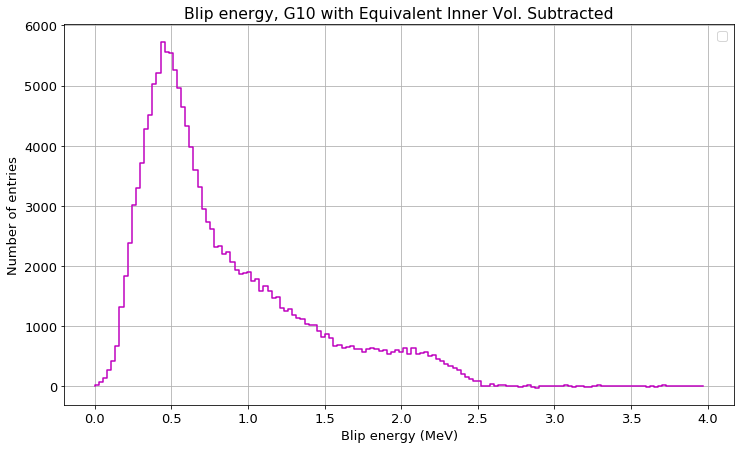

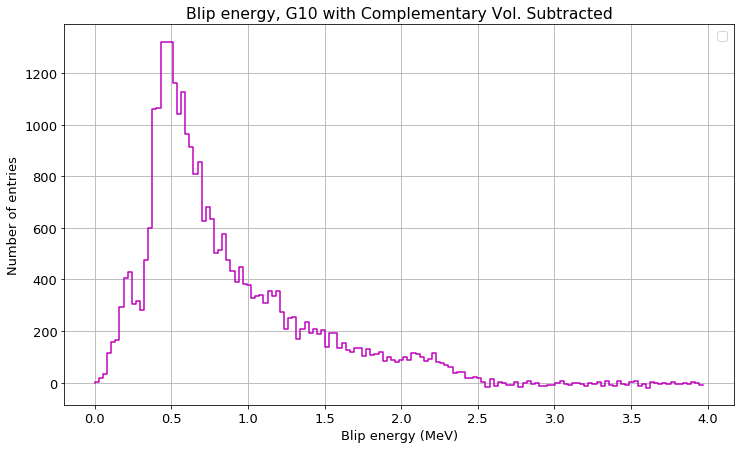

In [51]:
BINS = np.linspace(0,4,150)
fig = plt.figure(figsize=(12,7))
subtractedG10 = lowthresh_hist1-lowthresh_hist5
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10,color='m')
plt.title("Blip energy, G10 with Equivalent Inner Vol. Subtracted")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

BINS = np.linspace(0,4,150)
fig = plt.figure(figsize=(12,7))
subtractedG10 = lowthresh_hist3-lowthresh_hist5
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10,color='m')
plt.title("Blip energy, G10 with Complementary Vol. Subtracted")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

In [27]:
df_blip_file1_3planes_g10_lower = df_blip_file1_3planes.query(g10_lower_det_region_cut)



Text(0,0.5,'Y')

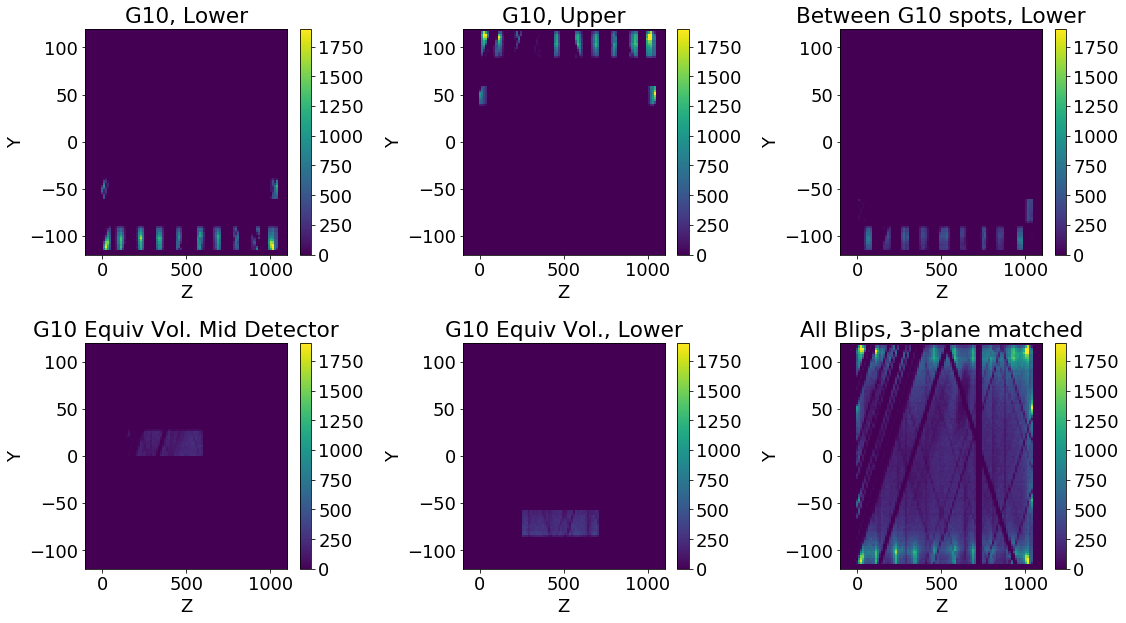

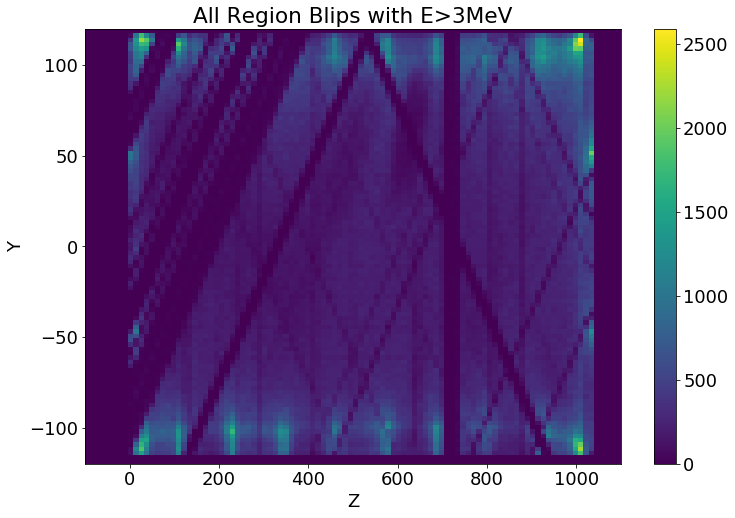

In [28]:
fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_blip_file1_3planes_g10_lower['blip_z'].values,df_blip_file1_3planes_g10_lower['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10, Lower")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(df_blip_file1_3planes_g10_upper['blip_z'].values,df_blip_file1_3planes_g10_upper['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10, Upper")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_blip_file1_3planes_complementary_lower['blip_z'].values,df_blip_file1_3planes_complementary_lower['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Between G10 spots, Lower")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_blip_file1_3planes_equivalentVol_half['blip_z'].values,df_blip_file1_3planes_equivalentVol_half['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Equiv Vol. Mid Detector")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 5)

plt.hist2d(df_blip_file1_3planes_equivalentVol_half_lower['blip_z'].values,df_blip_file1_3planes_equivalentVol_half_lower['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Equiv Vol., Lower")
plt.xlabel('Z')
plt.ylabel('Y')

plt.subplot(2, 3, 6)

plt.hist2d(df_blip_file1_3planes['blip_z'].values,df_blip_file1_3planes['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0,vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Blips, 3-plane matched")
plt.xlabel('Z')
plt.ylabel('Y')


dfhighEBlips = df_blip_file1_3planes.query('(blip_energy>3.0)') 
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(df_blip_file1_3planes['blip_z'],df_blip_file1_3planes['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All Region Blips with E>3MeV")
plt.xlabel('Z')
plt.ylabel('Y')
   

Text(0,0.5,'Y')

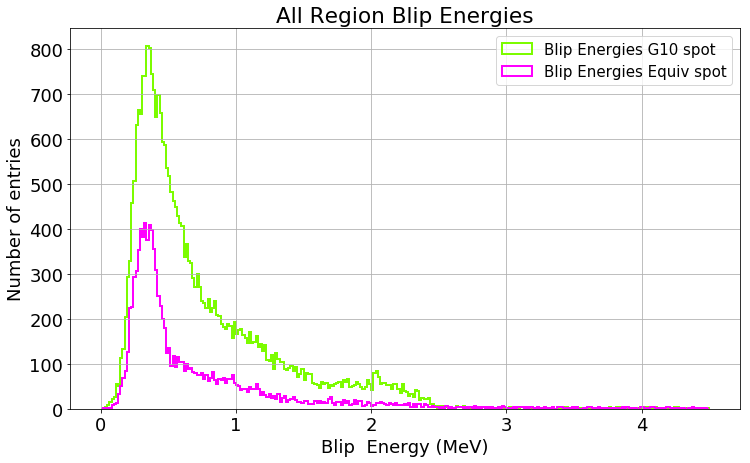

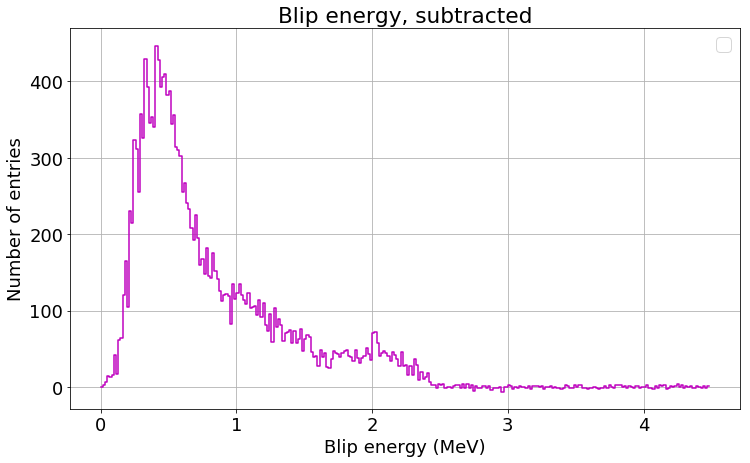

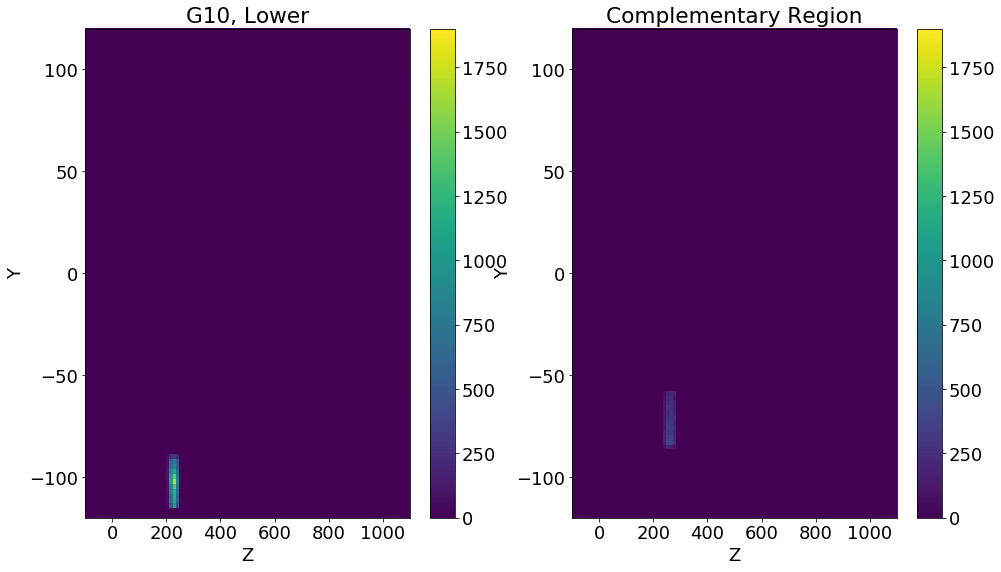

In [29]:
g10_lower_det_region_cut2 = ' ((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1035) )) '
complementary_lower_det_region_cut2 = ' ( (blip_y < -90.0 and blip_y > -117.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>480 and blip_z<540) or (blip_z>610 and blip_z<650) or (blip_z>710 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980)))' 

g10_bot_small_single_spot_cut = '((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>210 and blip_z<250)))'
#g10_bot_small_single_spot_cut = '((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1036))) '
#equiv_single_spot_cut = '((blip_y < -58.0 and blip_y > -85.0) and ((blip_z>340 and blip_z<380)))'
equiv_single_spot_cut = '((blip_y < -58.0 and blip_y > -85.0) and ((blip_z>240 and blip_z<281)))'
#equiv_single_spot_cut = ' ( (blip_y < -90.0 and blip_y > -122.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980) or (blip_z>1036 ) )) or ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1035.0 ) )  )'



df_g10_bot_small_single_spot_cut = df_blip_file1_3planes.query(g10_bot_small_single_spot_cut)
df_equiv_single_spot_cut = df_blip_file1_3planes.query(equiv_single_spot_cut)

BINS = np.linspace(0,4.5,280)
fig = plt.figure(figsize=(12,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
#lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
blip_hist1,bins1,ps1 = plt.hist(df_g10_bot_small_single_spot_cut['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10 spot',color='lawngreen',normed=False)
blip_hist2,bins2,ps2 = plt.hist(df_equiv_single_spot_cut['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Equiv spot',color='magenta',normed=False)

plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,4.5,280)
fig = plt.figure(figsize=(12,7))
subtractedG10_spot = blip_hist1-blip_hist2
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10_spot,color='m')
plt.title("Blip energy, subtracted")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

fig = plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)

plt.hist2d(df_g10_bot_small_single_spot_cut['blip_z'].values,df_g10_bot_small_single_spot_cut['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10, Lower")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(1, 2, 2)

plt.hist2d(df_equiv_single_spot_cut['blip_z'].values,df_equiv_single_spot_cut['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Complementary Region")
plt.xlabel('Z')
plt.ylabel('Y')

In [30]:
#df_grouped_g10_bot_small_single_spot_cut = df_g10_bot_small_single_spot_cut.groupby(["event","run","timestamp"])
#df_grouped_equiv_single_spot_cut = df_equiv_single_spot_cut.groupby(["event","run","timestamp"])

g10smallregSums=sumBlipsinEvent(df_g10_bot_small_single_spot_cut)
equivsmallregSums=sumBlipsinEvent(df_equiv_single_spot_cut)


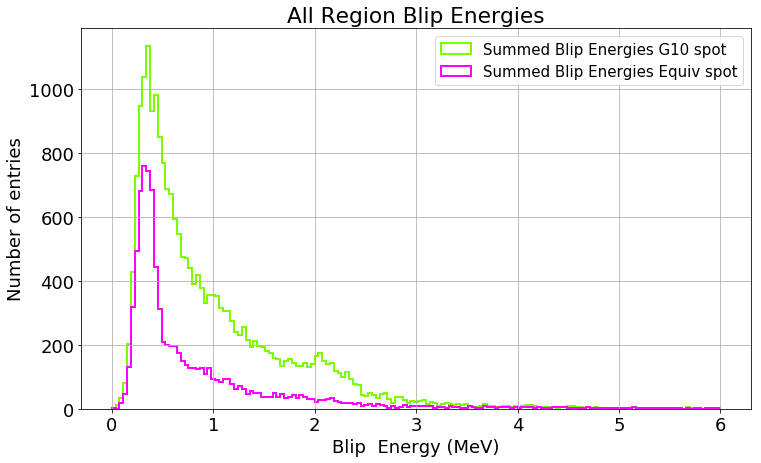

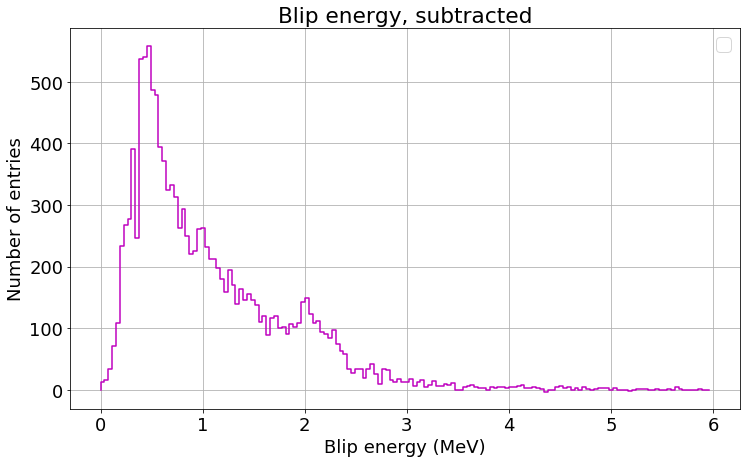

In [31]:
#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
#lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
BINS = np.linspace(0,6,160)
fig = plt.figure(figsize=(12,7))

blip_hist1,bins1,ps1 = plt.hist(g10smallregSums,histtype='step',bins = BINS,lw=2,label='Summed Blip Energies G10 spot',color='lawngreen',normed=False)
blip_hist2,bins2,ps2 = plt.hist(equivsmallregSums,histtype='step',bins = BINS,lw=2,label='Summed Blip Energies Equiv spot',color='magenta',normed=False)
plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0,6,160)
fig = plt.figure(figsize=(12,7))
subtractedG10_spot = blip_hist1-blip_hist2
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10_spot,color='m')
plt.title("Blip energy, subtracted")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

In [32]:
#df_blip_file1_3planes.query(g10_lower_det_region_cut2)
df_equiv_single_spot_cut = df_blip_file1_3planes.query(complementary_lower_det_region_cut2)


In [33]:
summedBlipsg10,multiplicitiesg10=sumMaxAndNeighborsInRadius(df_g10_bot_small_single_spot_cut,20)

Number of events with energies:  22109


In [34]:
summedBlipsCompl,multiplicitiesCompl=sumMaxAndNeighborsInRadius(df_equiv_single_spot_cut,20)

Number of events with energies:  59400


Text(0,0.5,'Number of entries')

<Figure size 864x504 with 0 Axes>

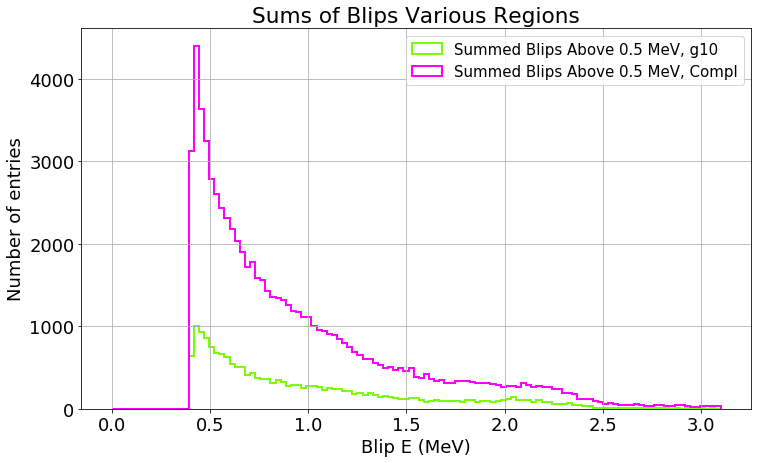

<Figure size 864x504 with 0 Axes>

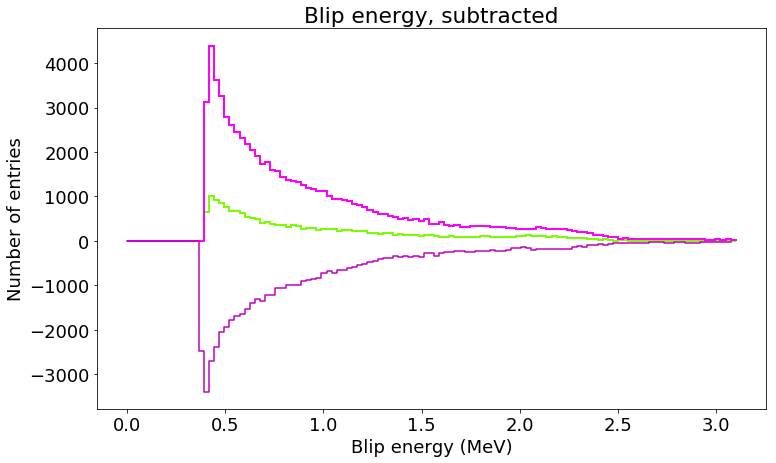

In [35]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(summedBlipsg10,histtype='step',bins = BINS,lw=2,label='Summed Blips Above 0.5 MeV, g10',color='lawngreen')
hg102,bg102,a2 = plt.hist(summedBlipsCompl,histtype='step',bins = BINS,lw=2,label='Summed Blips Above 0.5 MeV, Compl',color='magenta')
plt.title("Sums of Blips Various Regions")
plt.xlabel("Blip E (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')


fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,3.1,120)

fig = plt.figure(figsize=(12,7))
hg10,bg10,a = plt.hist(summedBlipsg10,histtype='step',bins = BINS,lw=2,label='Summed Blips Above 0.5 MeV, g10',color='lawngreen')
hcom,bgcom,acom = plt.hist(summedBlipsCompl,histtype='step',bins = BINS,lw=2,label='Summed Blips Above 0.5 MeV, Compl',color='magenta')

subtractedG10_spot = hg10-hcom
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10_spot,color='m')
plt.title("Blip energy, subtracted")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')



In [36]:
print(len(summedBlipsg10))
print(len(summedBlipsCompl))
print(multiplicitiesg10)

19278
75900
[1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 

In [37]:
#allg10eventEs,summedBlipsg10,multiplicitiesg10=sumMaxAndNeighborsInRadiusAllData(df_g10_bot_small_single_spot_cut,df_blip_file1_3planes,20.0)

print("Better approach... sum in whole DF, store sums, then cuts by regions to plot sums in those regions")


Better approach... sum in whole DF, store sums, then cuts by regions to plot sums in those regions


In [39]:
#maxBlipEs = returnMaxBlipEs(df_blip_file2_3planes)
#maxBlipEs_g10_lower = returnMaxBlipEs(df_blip_file2_3planes_g10_lower)
#maxBlipEs_g10_upper = returnMaxBlipEs(df_blip_file2_3planes_g10_upper)
#maxBlipEs_complementary_lower = returnMaxBlipEs(df_blip_file2_3planes_complementary_lower)
#maxBlipEs_equivalentVol_half = returnMaxBlipEs(df_blip_file2_3planes_equivalentVol_half)


BINS = np.linspace(0.1,9.1,280)
fig = plt.figure(figsize=(14,8))
plt.tight_layout()

#lowthresh_hist,b1,p1 = plt.hist(maxBlipEs,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(maxBlipEs_g10_lower,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10, lower',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(maxBlipEs_g10_upper,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10, upper',color='lime',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(maxBlipEs_complementary_lower,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, complementary area lower',color='darkorchid',normed=False)
lowthresh_hist5,b5,p5 = plt.hist(maxBlipEs_equivalentVol_half,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, equivalent half G10 Volume',color='hotpink',normed=False)


plt.title("Max Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

NameError: name 'maxBlipEs_g10_lower' is not defined

<Figure size 1008x576 with 0 Axes>

/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:76: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


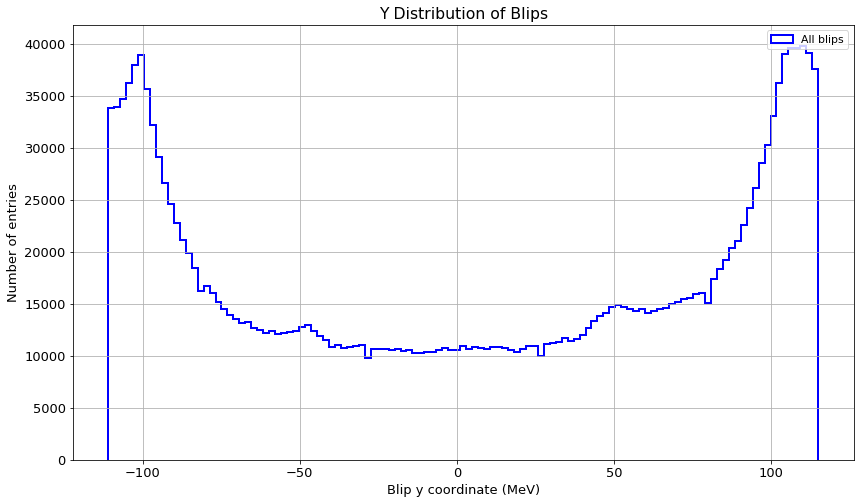

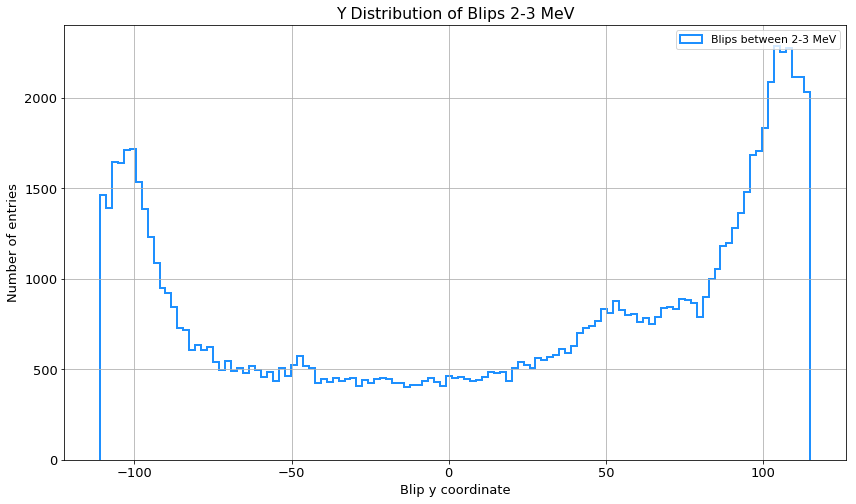

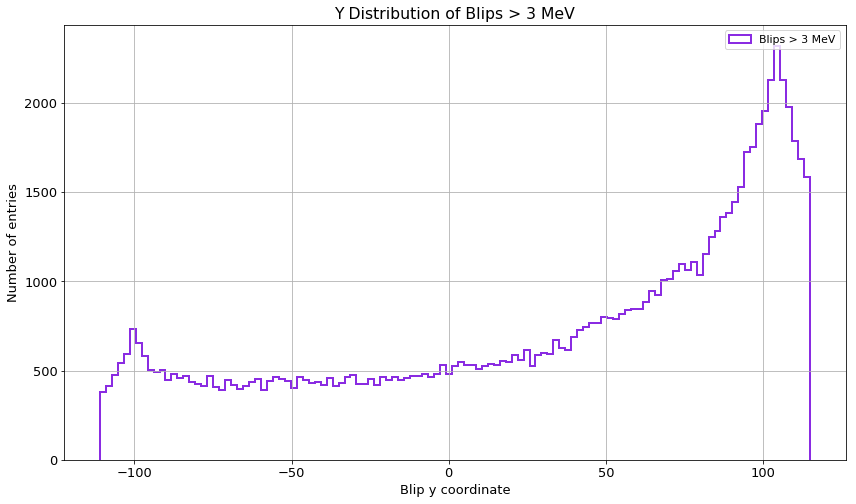

<Figure size 1008x576 with 0 Axes>

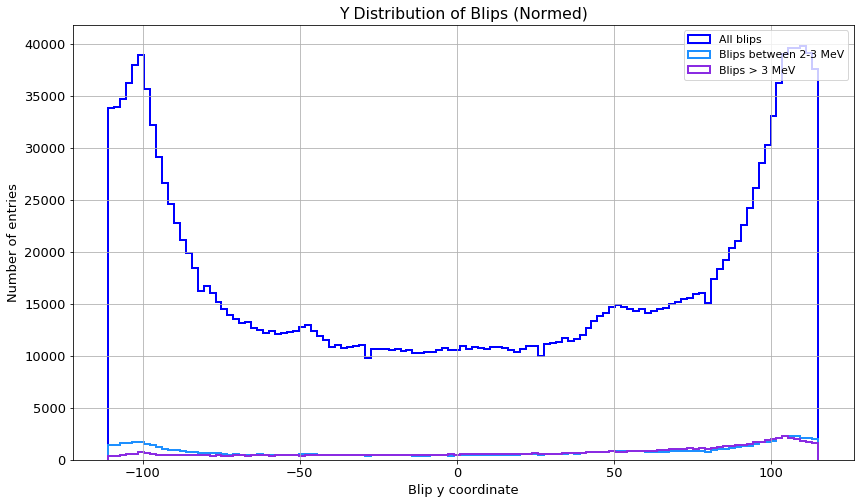

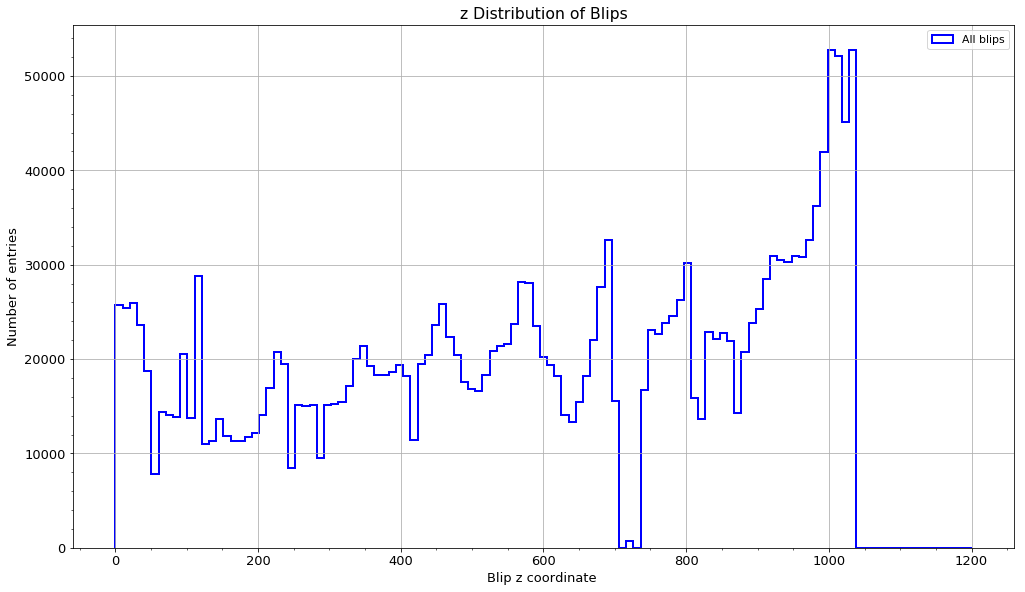

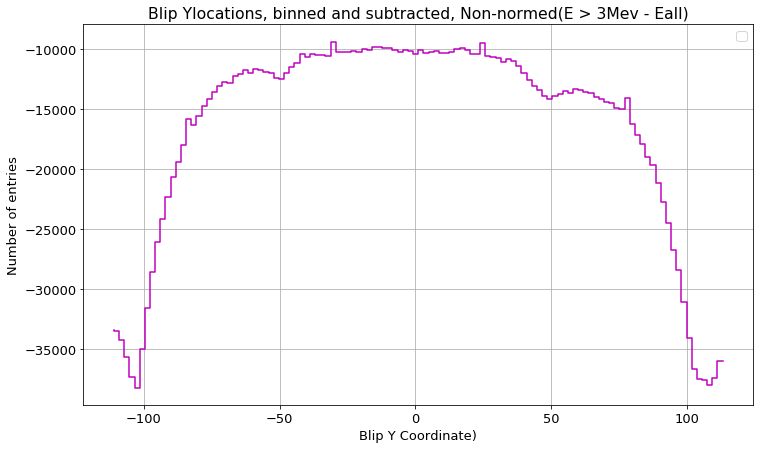

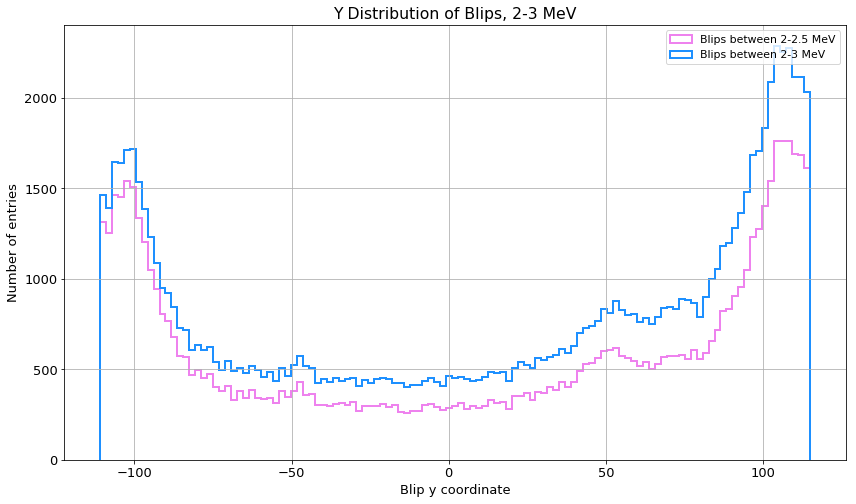

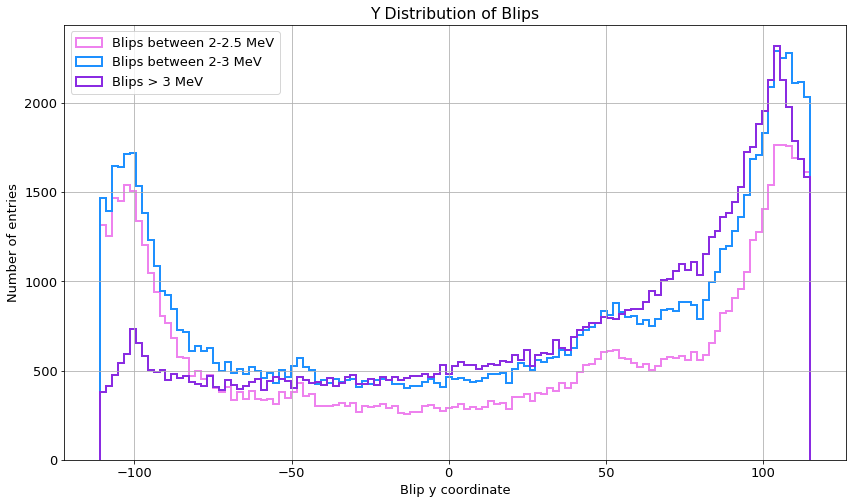

In [59]:
from matplotlib.ticker import MultipleLocator

#BINS = np.linspace(-125.,125.,500.)
BINS = np.linspace(-111.,115.,120.)
fig = plt.figure(figsize=(14,8))
plt.tight_layout()



ydist_hist1,b1,p1 = plt.hist(df_blip_file1_3planes['blip_y'],histtype='step',bins = BINS,lw=2,label='All blips',color='blue',normed=False)

plt.title("Y Distribution of Blips")
plt.xlabel("Blip y coordinate (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

dfMedEBlips = df_blip_file1_3planes.query('(blip_energy>2.0) and (blip_energy<3.0)') 

fig = plt.figure(figsize=(14,8))
plt.tight_layout()
ydist_hist2,b2,p2 = plt.hist(dfMedEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-3 MeV',color='dodgerblue',normed=False)

plt.title("Y Distribution of Blips 2-3 MeV")
plt.xlabel("Blip y coordinate")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

fig = plt.figure(figsize=(14,8))
plt.tight_layout()
ydist_hist3,b3,p3 = plt.hist(dfhighEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips > 3 MeV',color='blueviolet',normed=False)

plt.title("Y Distribution of Blips > 3 MeV")
plt.xlabel("Blip y coordinate")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

fig = plt.figure(figsize=(14,8))
fig = plt.figure(figsize=(14,8))
plt.tight_layout()
ydist_hist1,b1,p1 = plt.hist(df_blip_file1_3planes['blip_y'],histtype='step',bins = BINS,lw=2,label='All blips',color='blue',normed=False)
ydist_hist2,b2,p2 = plt.hist(dfMedEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-3 MeV',color='dodgerblue',normed=False)
ydist_hist3,b3,p3 = plt.hist(dfhighEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips > 3 MeV',color='blueviolet',normed=False)

plt.title("Y Distribution of Blips (Normed)")
plt.xlabel("Blip y coordinate")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

BINS = np.linspace(0.,1200.,120.)
fig = plt.figure(figsize=(14,8))
plt.axes().minorticks_on()
plt.tight_layout()
#a = np.arange(1200)
#ml = MultipleLocator(5)
#plt.axes().yaxis.set_minor_locator(ml)

lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_z'],histtype='step',bins = BINS,lw=2,label='All blips',color='blue',normed=False)

plt.title("z Distribution of Blips")
plt.xlabel("Blip z coordinate ")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')



BINS = np.linspace(-111.,115.,120.)
fig = plt.figure(figsize=(12,7))
subtractedYDist = ydist_hist3-ydist_hist1
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedYDist,color='m')
plt.title("Blip Ylocations, binned and subtracted, Non-normed(E > 3Mev - Eall)")
plt.xlabel('Blip Y Coordinate)')
plt.ylabel('Number of entries')
#plt.yscale('log')
plt.grid()
plt.legend(loc=1)

df_blip_file1_3planes['blip_z'].max()

df2_2pt5MeVBlips = df_blip_file1_3planes.query('(blip_energy>2.0) and (blip_energy<2.51)') 

fig = plt.figure(figsize=(14,8))
plt.tight_layout()
ydist_hist2,b2,p2 = plt.hist(df2_2pt5MeVBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-2.5 MeV',color='violet',normed=False)
ydist_hist2,b2,p2 = plt.hist(dfMedEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-3 MeV',color='dodgerblue',normed=False)
plt.title("Y Distribution of Blips, 2-3 MeV")
plt.xlabel("Blip y coordinate")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')

fig = plt.figure(figsize=(14,8))
plt.tight_layout()
ydist_hist2,b2,p2 = plt.hist(df2_2pt5MeVBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-2.5 MeV',color='violet',normed=False)
ydist_hist2,b2,p2 = plt.hist(dfMedEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips between 2-3 MeV',color='dodgerblue',normed=False)
ydist_hist2,b2,p2 = plt.hist(dfhighEBlips['blip_y'],histtype='step',bins = BINS,lw=2,label='Blips > 3 MeV',color='blueviolet',normed=False)
plt.title("Y Distribution of Blips")
plt.xlabel("Blip y coordinate")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2,fontsize='medium')

df_blip_file1_3planes = df_blip_file1.query('(blip_nplanes==3)')
df_blip_file1_3planes_g10_lower = df_blip_file1_3planes.query(g10_lower_det_region_cut)
df_blip_file1_3planes_g10_upper = df_blip_file1_3planes.query(g10_upper_det_region_cut)
df_blip_file1_3planes_complementary_lower = df_blip_file1_3planes.query(complementary_lower_det_region_cut)
df_blip_file1_3planes_equivalentVol_half = df_blip_file1_3planes.query(g10_equivalent_half_region_cut)
BINS = np.linspace(0,4,240)
fig = plt.figure(figsize=(12,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
#lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(df_blip_file1_3planes_g10_lower['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10 bottom',color='royalblue',normed=False)
lowthresh_hist5,b5,p5 = plt.hist(df_blip_file1_3planes_g10_upper['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10 top',color='lawngreen',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(df_blip_file1_3planes_complementary_lower['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary Bottom',color='darkorchid',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(df_blip_file1_3planes_equivalentVol_half['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent half G10 Volume',color='hotpink',normed=False)


plt.title("All Region Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

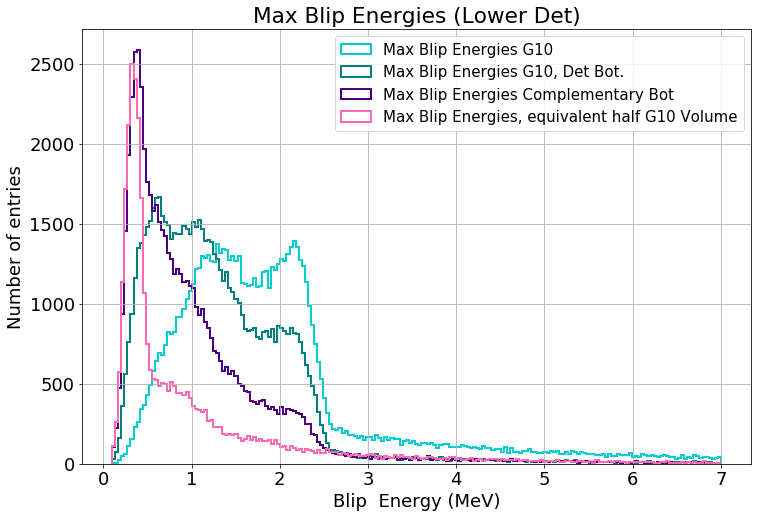

In [48]:
#maxBlipEs = returnMaxBlipEs(df_blip_file1_3planes)
maxBlipEs_g10_lower = returnMaxBlipEs(df_blip_file1_3planes_g10_lower)
#maxBlipEs_g10_upper = returnMaxBlipEs(df_blip_file1_3planes_g10_upper)
maxBlipEs_complementary_lower = returnMaxBlipEs(df_blip_file1_3planes_complementary_lower)
maxBlipEs_equivalentVol_half = returnMaxBlipEs(df_blip_file1_3planes_equivalentVol_half)

BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

#lowthresh_hist,b1,p1 = plt.hist(maxBlipEs,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(maxBlipEs_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist2b,b2b,p2b = plt.hist(maxBlipEs_g10_lower,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10, Det Bot.',color='teal',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(maxBlipEs_complementary_lower,histtype='step',bins = BINS,lw=2,label='Max Blip Energies Complementary Bot',color='indigo',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(maxBlipEs_equivalentVol_half,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, equivalent half G10 Volume',color='hotpink',normed=False)

plt.title("Max Blip Energies (Lower Det)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [49]:
#summed_blips_all,multi_all = returnMaxBlipsPlusNeighbors(df_blip_file1_3planes,df_blip_file1_3planes,20)
#summed_blips_g10,multi_g10 = returnMaxBlipsPlusNeighbors(df_blip_file1_3planes_g10,df_blip_file1_3planes,20)
#summed_blips_comp,multi_comp = returnMaxBlipsPlusNeighbors(df_blip_file1_3planes_complementary,df_blip_file1_3planes,20)
#summed_blips_eqiv,multi_eqiv = returnMaxBlipsPlusNeighbors(df_blip_file1_3planes_equivalentVol,df_blip_file1_3planes,20)


In [50]:
#maxBlipEs_g10_lower = returnMaxBlipEs(df_blip_file1_3planes_g10)
#maxBlipEs_complementary_lower = returnMaxBlipEs(df_blip_file1_3planes_complementary)
#maxBlipEs_equivalentVol_half = returnMaxBlipEs(df_blip_file1_3planes_equivalentVol_half)

BINS = np.linspace(0.1,6.,110)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(summed_blips_all,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, all regions (3 planes)',color='blue',normed=False)
lowthresh_hist2,b2,p2 = plt.hist(summed_blips_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10',color='darkturquoise',normed=False)
lowthresh_hist3,b3,p3 = plt.hist(summed_blips_comp,histtype='step',bins = BINS,lw=2,label='Max Blip Energies Compl.',color='indigo',normed=False)
lowthresh_hist4,b4,p4 = plt.hist(summed_blips_eqiv,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, equivalent G10 V',color='hotpink',normed=False)

plt.title("Max Blip Energies + Neighbors")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

NameError: name 'summed_blips_all' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
print(len(df_blip_file1_3planes))
print(len(maxBlipEs))
print(len(maxBlipEs_g10))
print(len(summed_blips_g10))

In [ ]:
print(df_Event_rn6["event"].max())
print(len(df_Event_rn6))

In [ ]:
df_blip_file1.head(4)
#df_Event_rn6.head(200)

In [ ]:
df_grouped_highE = df_blip_file1_3planes_highE.groupby(["event","run","timestamp"])
df_blip_file1_3planes_highE.head()
rates_3MeV_blips=[]
for group_name, df_group in df_grouped_highE:
    eventMaxq = df_group["blip_energy"].max()
    print(len(df_group))
    rates_3MeV_blips.append(len(df_group))

In [ ]:

#blip_files=[df_blip_file1,df_blip_file1_3planes,df_blip_file1_3planes_g10,df_blip_file1_3planes_complementary,df_blip_file1_3planes_equivalentVol]
#blip_file_labels=['All blips','3 plane matched','G10','Complementary','Equiv, Vol']
blip_files=[df_blip_file1_3planes,df_blip_file1_3planes_g10,]
blip_file_labels=['All blips','G10 Region']

BINS = np.linspace(0.1,6.,110)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

#df_blip_file1['blip_energy']
#df_blip_file1_3planes['blip_energy']
#df_blip_file1_3planes_g10['blip_energy']
#df_blip_file1_3planes_complementary['blip_energy']
#df_blip_file1_3planes_equivalentVol['blip_energy']
def plotEnergiesVSTrackDistance(dataFiles,labels):
    #grabbing data here
    fileNum=0
    markers=['o','1','.','x','v','+','*']
    colors=['mediumvioletred','blue','crimson','orange','yellow','darkorchid','darkturquoise']
    for file in dataFiles:
            plt.plot(file['blip_trkdist'],file['blip_energy'], marker=markers[fileNum], color=colors[fileNum],linestyle="")
            fileNum+=1

    #Plot Here:
    #import seaborn as sns      #Seaborn adds plotting options, nicities
    plotTitle="Blip Energy vs. Track Distance"
    #Default axes (looks nicer)
    plt.title(plotTitle)
    plt.xlabel("Track Distance (cm)")
    plt.ylabel("Energy (MeV)")
    plt.legend(labels)
    #plt.xlim(290,901)
    #plt.xlim(390,610)
    #plt.ylim(0,100)
    plt.grid()
    plt.show()
    
plotEnergiesVSTrackDistance(blip_files,blip_file_labels)

In [ ]:
#maxBlipEs_g10_lower = returnMaxBlipEs(df_blip_file1_3planes_g10)
#maxBlipEs_complementary_lower = returnMaxBlipEs(df_blip_file1_3planes_complementary)
#maxBlipEs_equivalentVol_half = returnMaxBlipEs(df_blip_file1_3planes_equivalentVol_half)

BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(df_blip_file1_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='All Blip Energies, all regions (3 planes)',color='skyblue',linestyle="dotted",normed=True)
lowthresh_hist,b1,p1 = plt.hist(maxBlipEs,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, all regions (3 planes)',color='blue',normed=True)
lowthresh_hist2,b2,p2 = plt.hist(maxBlipEs_g10,histtype='step',bins = BINS,lw=2,label='Max Blip Energies G10',color='darkturquoise',normed=True)
lowthresh_hist3,b3,p3 = plt.hist(maxBlipEs_complementary,histtype='step',bins = BINS,lw=2,label='Max Blip Energies Complementary',color='darkorchid',normed=True)
lowthresh_hist4,b4,p4 = plt.hist(maxBlipEs_equivalentVol,histtype='step',bins = BINS,lw=2,label='Max Blip Energies, equivalent G10 Volume',color='hotpink',normed=True)

plt.title("Max Blip Energies")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [ ]:
df_blip_file1_3planes_highE = df_blip_file2.query('(blip_nplanes==3) and (blip_energy>3.0)')

In [ ]:
df_blip_file1_3planes_highE.head()

In [ ]:
df_blip_file1_3planes_highE.head()
df_grouped_highE = df_blip_file1_3planes_highE.groupby(["event","run","timestamp"])
df_blip_file1_3planes_highE.head()
rates_3MeV_blips=[]
for group_name, df_group in df_grouped_highE:
    eventMaxq = df_group["blip_energy"].max()
    print(len(df_group))
    rates_3MeV_blips.append(len(df_group))


In [ ]:
#I need to find the max blips, sum nearby neighbors, then sort by region
#1. Could add column to DF to store sums
#2. Could create new DF of just the maxes
#3. Could create awayy of objects with summed maxes and locations

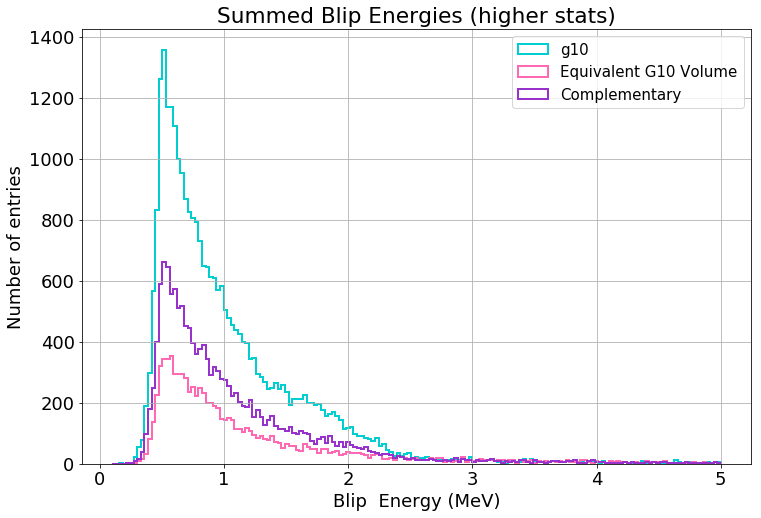

In [46]:
#Blip summing into csv file here: 
#df_blip_file1_3planes=df_blip_file2.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')

summedBlipDF2 = sumMaxAndNeighborsInRadiusIntoDF(df_blip_file1_3planes,20)
file_name='./summedBlipDF3_20kevents1.csv'
summedBlipDF2.to_csv(file_name)
summedBlipDF2.head()

Number of events with energies:  80108


blip_energy  blip_multiplicity   blip_sum      blip_x      blip_y  \
0     6.446275                3.0  13.473367  148.534836   98.484459   
1     5.956297                2.0   6.708741   21.668222   91.209846   
2     1.855850                2.0   2.229481  289.124603  102.294975   
3     1.581371                2.0   3.162743  183.372833  113.380096   
4     1.354439                2.0   2.708877   -8.069827   92.249077   

       blip_z  
0  463.600006  
1  531.799988  
2  915.599976  
3  454.000000  
4   81.800003

NameError: name 'summedBlipDF' is not defined

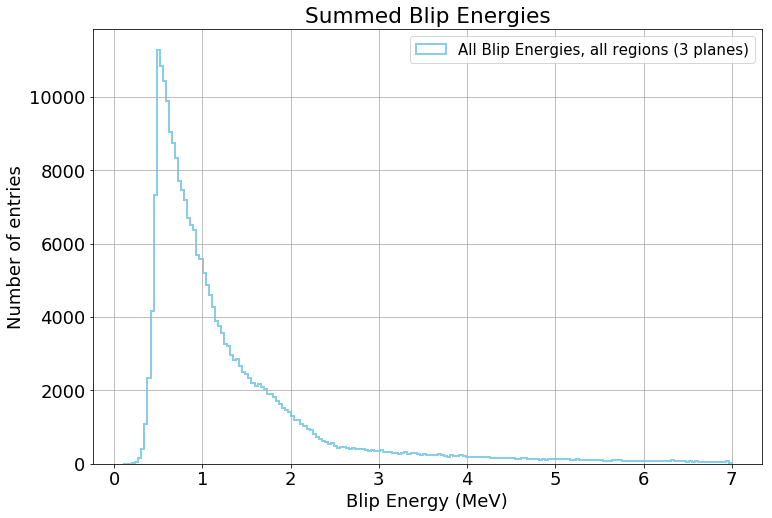

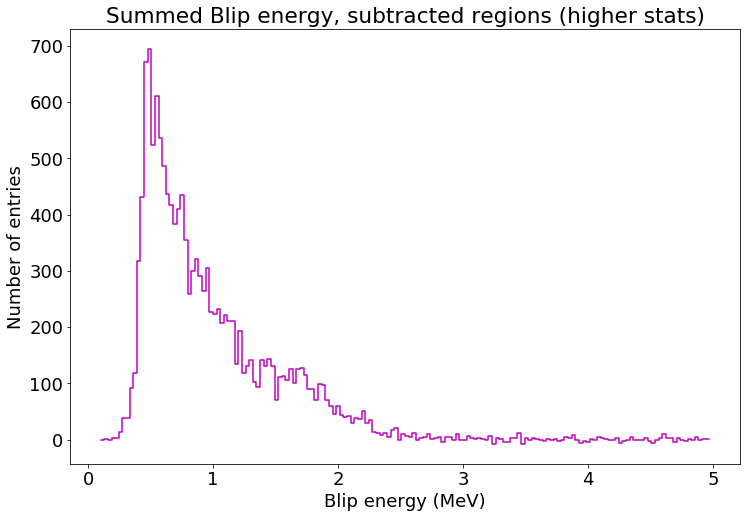

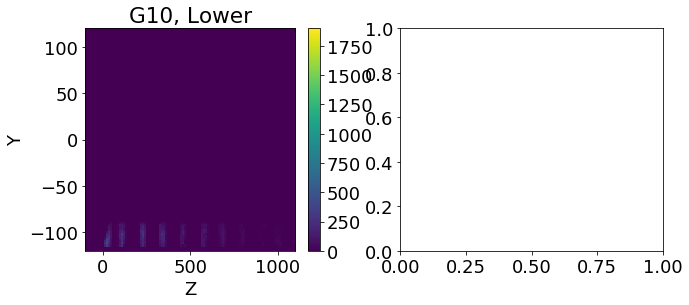

In [39]:
#file_name='./summedBlipDF2_final20kevents2.csv'
#summedBlipDF2.to_csv(file_name)

In [40]:
print("done")

done


In [38]:
summedBlipDFComb=pd.read_csv('./summedBlipDF_combined.csv',index_col=[0])
#print "Bad index: ", (summedBlipDFComb.iloc[[255154]])
print len(summedBlipDFComb['blip_x'])
summedBlipDFComb2=summedBlipDFComb.dropna().reset_index(drop=True)
summedBlipDFComb3=summedBlipDFComb2.dropna(axis=0).reset_index(drop=True)
badRows=pd.isnull(pd.to_numeric(summedBlipDFComb3['blip_energy'], errors='coerce')).nonzero()[0]
print "Bad rows:",badRows
summedBlipDFComb3.drop(badRows,inplace=True)
print len(summedBlipDFComb3['blip_energy'])

979376
Bad rows: []
979376


/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


In [39]:
badRows=pd.isnull(pd.to_numeric(summedBlipDFComb3['blip_x'], errors='coerce')).nonzero()[0]
print badRows
for i in range(len(badRows)):
    print(summedBlipDFComb3.iloc[[badRows[i]]])
np.where(summedBlipDFComb3.applymap(lambda x: x == ''))

/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


[]


(array([], dtype=int64), array([], dtype=int64))

        blip_energy  blip_multiplicity  blip_sum      blip_x      blip_y  \
474203        0.437                2.0     0.874  274.808746  108.010742   

        blip_z  
474203   153.5  


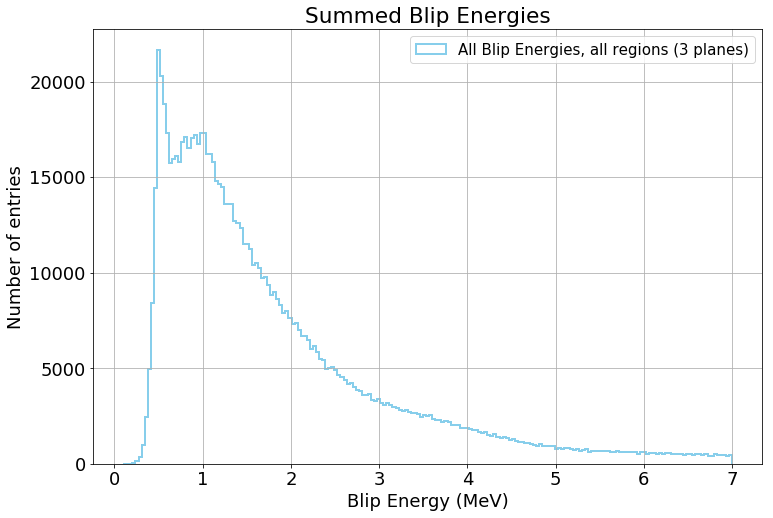

In [40]:
print(summedBlipDFComb3.iloc[[474203]])
BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(summedBlipDFComb3['blip_sum'],histtype='step',bins = BINS,lw=2,label='All Blip Energies, all regions (3 planes)',color='skyblue',normed=False)

plt.title("Summed Blip Energies")
plt.xlabel("Blip Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [41]:
data = data.drop( data.index[y] )
summedBlipDFComb = df[df.index != 790]
summedBlipDFComb = summedBlipDFComb[summedBlipDFComb.index != 474205]
summedBlipDFComb = summedBlipDFComb[summedBlipDFComb.index != 255154]
badRows=pd.isnull(pd.to_numeric(summedBlipDFComb['blip_energy'], errors='coerce')).nonzero()[0]
print "Bad rows:",badRows
print len(summedBlipDFComb['blip_x'])

NameError: name 'data' is not defined

In [ ]:
BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(summedBlipDFComb['blip_sum'],histtype='step',bins = BINS,lw=2,label='All Blip Energies, all regions (3 planes)',color='skyblue',normed=False)

plt.title("Summed Blip Energies")
plt.xlabel("Blip Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')



In [ ]:
g10_upper_det_region_cut = '((blip_y > 90.0 and blip_y < 117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1036)))'
g10_lower_det_region_cut = '((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1036) )) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1036))) '
complementary_upper_det_region_cut = '((blip_y > 90.0 and blip_y < 117.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980) or (blip_z>1036 ) )) or ( (blip_y < 85.0 and blip_y > 60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) ))'
complementary_lower_det_region_cut = ' ( (blip_y < -90.0 and blip_y > -122.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980) or (blip_z>1036 ) )) or ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1035.0 ) )  )'
g10_equivalent_half_region_cut = '(blip_y > 0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '
#g10_equivalent_half_region_cut_lower = '(blip_y > -85.0 and blip_y < -58.0) and (blip_z>250 and blip_z<702.8) '
g10_equivalent_half_region_cut_lower = '(blip_y > -85.0 and blip_y < -58.0) and (blip_z>250 and blip_z<700.8) '


g10_lower_det_region_cut2 = ' ((blip_y < -90.0 and blip_y > -117.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1035) )) '
complementary_lower_det_region_cut2 = ' ( (blip_y < -90.0 and blip_y > -117.0) and ( (blip_z>50 and blip_z<90) or (blip_z>155 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>480 and blip_z<540) or (blip_z>610 and blip_z<650) or (blip_z>710 and blip_z<765) or (blip_z>830 and blip_z<870) or (blip_z>945 and blip_z<980)))' 


df_sums_g10_bot = df_float.query(g10_lower_det_region_cut2)
df_sums_equiv = df_float.query(g10_equivalent_half_region_cut)
df_sums_compl = df_float.query(complementary_lower_det_region_cut2)

BINS = np.linspace(0.1,5.,170)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

#sums_hist,b1,p1 = plt.hist(summedBlipDF['blip_energy'],histtype='step',bins = BINS,lw=2,label='All regions',color='blue',normed=False)
sums_hist1,b1,p1 = plt.hist(df_sums_g10_bot['blip_energy'],histtype='step',bins = BINS,lw=2,label='g10',color=['darkturquoise','blue','teal'],normed=False)
sums_hist2,b2,p2 = plt.hist(df_sums_equiv['blip_energy'],histtype='step',bins = BINS,lw=2,label='Equivalent G10 Volume',color='hotpink',normed=False)
sums_hist3,b3,p3 = plt.hist(df_sums_compl['blip_energy'],histtype='step',bins = BINS,lw=2,label='Complementary',color='darkorchid',normed=False)


plt.title("Summed Blip Energies (higher stats)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

In [44]:
BINS = np.linspace(0.1,7.,200)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(summedBlipDFComb['blip_sum'],histtype='step',bins = BINS,lw=2,label='All Blip Energies, all regions (3 planes)',color='skyblue',normed=False)

plt.title("Summed Blip Energies")
plt.xlabel("Blip Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


BINS = np.linspace(0.1,5.,170)
fig = plt.figure(figsize=(12,8))
plt.tight_layout()

subtractedG10_spot = sums_hist1-sums_hist3
#plt.hist(subtractedG10,histtype='step',lw=2,label='Subtracted G10, Equivalent',color='m',normed=False)
b3 = np.delete(BINS,-1)
plt.step(b3,subtractedG10_spot,color='m')
plt.title("Summed Blip energy, subtracted regions (higher stats)")
plt.xlabel('Blip energy (MeV)')
plt.ylabel('Number of entries')
#plt.yscale('log')


fig = plt.figure(figsize=(16,9))
plt.subplot(2, 3, 1)

plt.hist2d(df_sums_g10_bot['blip_z'].values,df_sums_g10_bot['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10, Lower")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(2, 3, 2)

plt.hist2d(summedBlipDF['blip_z'].values,summedBlipDF['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]], vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("All regions, sums")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 3)

plt.hist2d(df_sums_compl['blip_z'].values,df_sums_compl['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='Beam off, complimentary to G10')#,norm=LogNorm())
plt.colorbar()
plt.title("Between G10 spots, Lower")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()

plt.subplot(2, 3, 4)

plt.hist2d(df_sums_equiv['blip_z'].values,df_sums_equiv['blip_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]],vmin=0, vmax=1900,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Equiv Vol. Mid Detector")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()


NameError: name 'summedBlipDFComb' is not defined

<Figure size 864x576 with 0 Axes>

In [11]:
#####################################################
#########    Ryan Gamma Simulation Blips   ###############
#####################################################

In [12]:
simulatedGammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/hist_BlipAna_fullmc_20220724_merged_6500files_BlipTree.root'
simulated1pt5GammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/singleGammas/hist_BlipAna_fullmc_20220728_merged_1pt5_BlipTree.root'
simulated2pt6GammaBlips='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/singleGammas/hist_BlipAna_fullmc_20220728_merged_2pt6_BlipTree.root'
print "Files set..."

Files set...


In [13]:
df_blip_Sim = pd.DataFrame( root2array(simulatedGammaBlips,blipTree) )
df_blip_Sim_1pt5 = pd.DataFrame( root2array(simulated1pt5GammaBlips,blipTree) )
df_blip_Sim_2pt6 = pd.DataFrame( root2array(simulated2pt6GammaBlips,blipTree) )
simframes=[df_blip_Sim_1pt5,df_blip_Sim_2pt6]
combinedSims = pd.concat(simframes)

In [14]:
#df_blip_Sim.head()
#df_blip_Sim_1pt5.head()
df_blip_Sim_2pt6.head()

event  run  timestamp  blip_nplanes      blip_x      blip_y      blip_z  \
0      1    1  386214804             3  230.084106  -96.890869  239.600006   
1      1    1  386214804             3  225.362305  -59.824982  252.199997   
2      3    1  386214804             3   26.782049 -114.211380  227.600006   
3      5    1  386214804             2    8.111344 -112.565933  228.850006   
4      7    1  386214804             3  209.973740 -104.685097  231.300003   

   blip_sigmayz   blip_dx  blip_dyz  ...  blip_incylinder  blip_pl0_clustid  \
0           0.1  0.725475       0.9  ...            False                 1   
1           0.1  0.661117       0.6  ...            False                 0   
2           0.1  0.404436       1.2  ...            False                 1   
3          -9.0  0.318211       0.3  ...            False                -9   
4           0.1  0.613967       1.2  ...            False                 0   

   blip_pl1_clustid  blip_pl2_clustid  blip_pl0_nhits  blip_pl1_nhits  \
0                 7                87               3               2   
1                10                88               2               2   
2                 3                75               4               3   
3                 8               103               0               1   
4                 5                74               3               3   

   blip_pl2_nhits  blip_pl0_nwires  blip_pl1_nwires  blip_pl2_nwires  
0               3                3                2                3  
1               2                2                2                2  
2               2                4                3                2  
3               1                0                1                1  
4               4                3                3                4  

[5 rows x 23 columns]

/uboone/app/users/rdorrill/python_libs/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


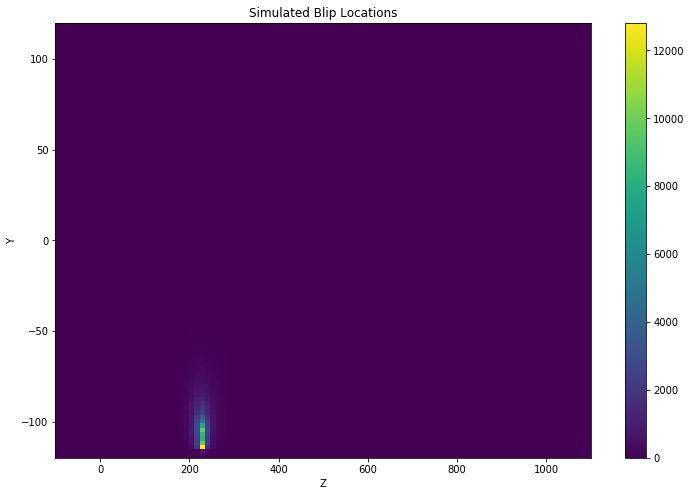

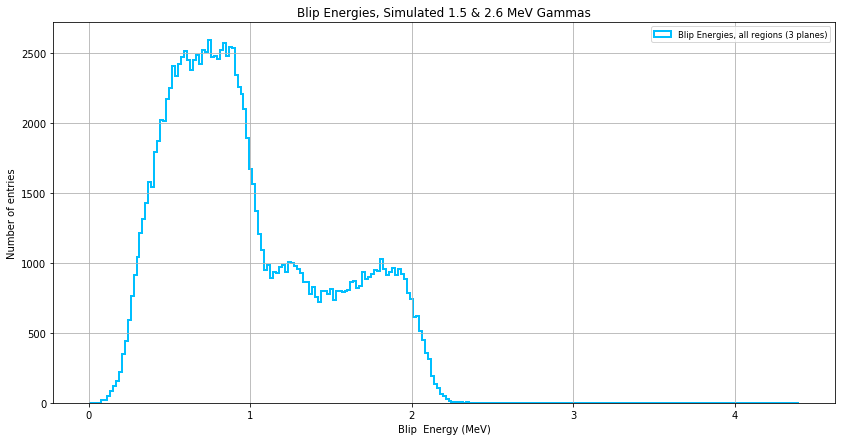

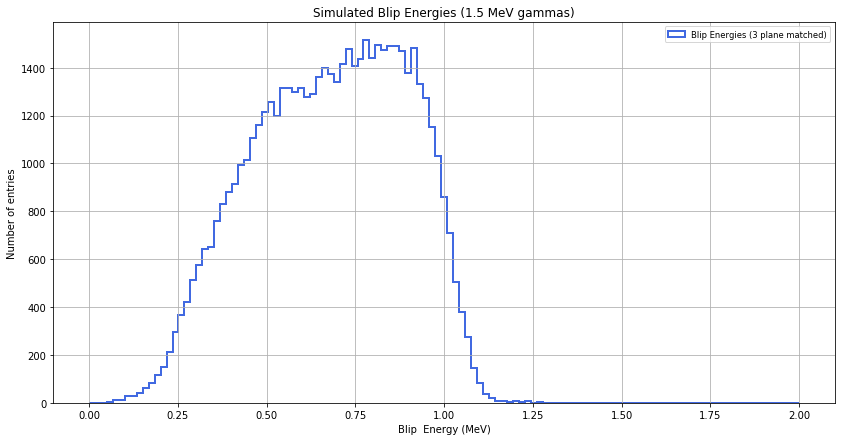

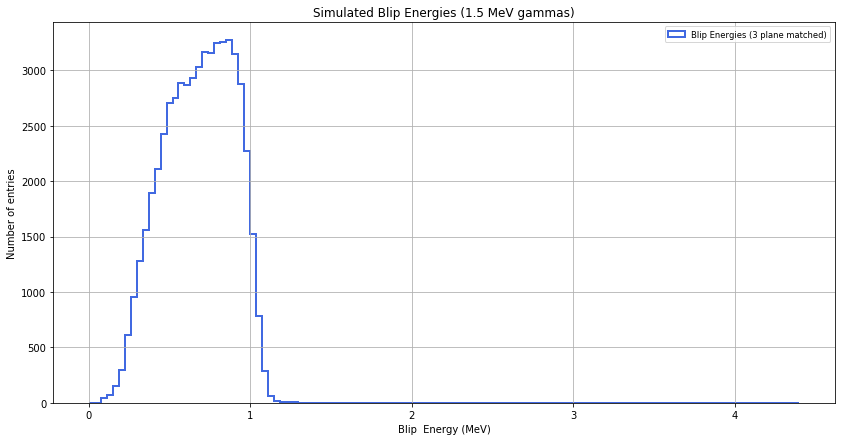

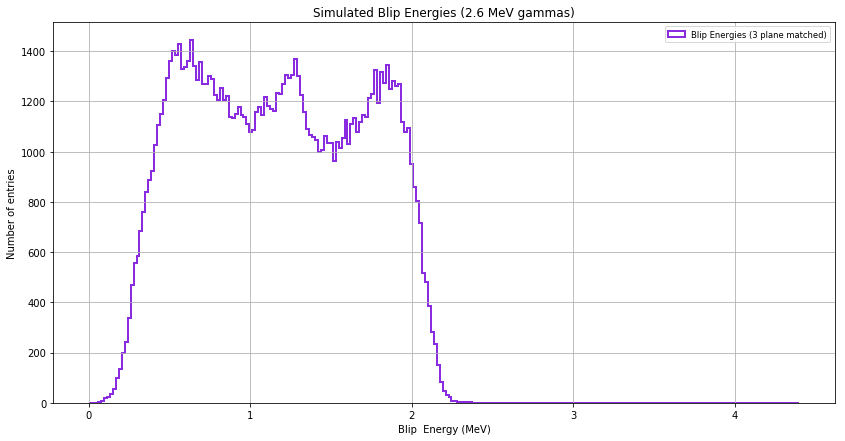

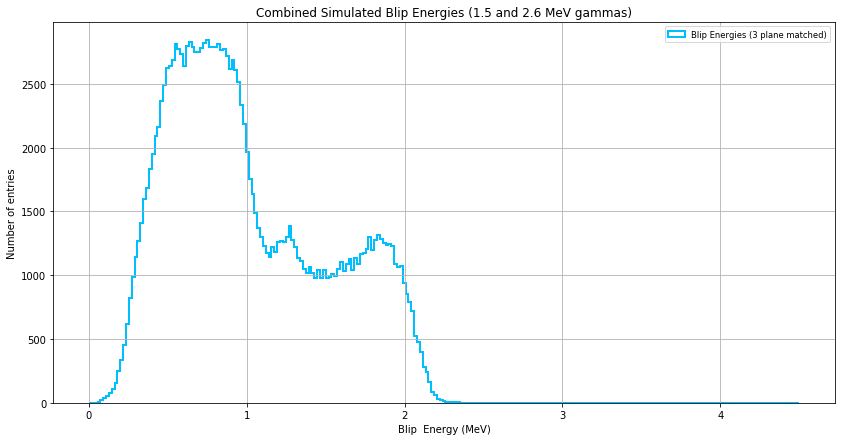

In [15]:
G10_region='((blip_y < -90.0 or blip_y > 90.0) and ((blip_z>10 and blip_z<50) or (blip_z>90 and blip_z<130) or (blip_z>210 and blip_z<250) or (blip_z>320 and blip_z<360) or (blip_z>440 and blip_z<470) or (blip_z>560 and blip_z<600) or (blip_z>660 and blip_z<700) or (blip_z>780 and blip_z<810) or (blip_z>890 and blip_z<930) or (blip_z>980 and blip_z<1100) )) or ((blip_y < 60.0 and blip_y > 40.0 ) and ((blip_z>0 and blip_z<40) or (blip_z>1000 and blip_z<1200))) or ((blip_y < -40.0 and blip_y > -60.0 ) and ((blip_z>0 and blip_z<40)or (blip_z>1000 and blip_z<1200))) '
rest_det_region='(blip_y > -90.0 and blip_y < 90.0) and (blip_z>20 and blip_z<1000)'
complementary_region=' ( (blip_y < -90.0 or blip_y > 90.0) and ( (blip_z>50 and blip_z<90) or (blip_z>150 and blip_z<195) or (blip_z>265 and blip_z<305) or (blip_z>375 and blip_z<420) or (blip_z>488 and blip_z<540) or (blip_z>610 and blip_z<645) or (blip_z>720 and blip_z<765) or (blip_z>830 and blip_z<875) or (blip_z>945 and blip_z<980) or (blip_z>1100 ) )) or ( (blip_y < 85.0 and blip_y > 60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) ))  or  ( (blip_y > -85.0 and blip_y < -60.0) and ((blip_z>10 and blip_z<50) or (blip_z>1000 and blip_z<1036.5 ) )  )'
G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '
G10_equivalent_Vol_NearG10='(blip_y > -90.0 and blip_y < -36.0) and (blip_z>150 and blip_z<593.8) ' 
#previously G10_equivalent_Vol_Center='(blip_y > -27.0 and blip_y < 27.0) and (blip_z>150 and blip_z<592.8) '


df_blip_simfile_3planes=df_blip_Sim.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
#df_blip_simfile_3planes_g10=df_blip_simfile_3planes.query(G10_region)
#df_blip_simfile_3planes_complementary=df_blip_simfile_3planes.query(complementary_region)
#df_blip_simfile_3planes_equivalentVol=df_blip_simfile_3planes.query(G10_equivalent_Vol_NearG10)
#df_blip_file2_3planes=df_blip_file2.query('(blip_nplanes==3)')
#df_blip_file2_3planes_g10=df_blip_file2_3planes.query(G10_region)
#df_blip_file2_3planes_complementary=df_blip_file2_3planes.query(complementary_region)
#df_blip_file2_3planes_equivalentVol=df_blip_file2_3planes.query(G10_equivalent_Vol)

fig = plt.figure(figsize=(12,8))
plt.tight_layout()

plt.hist2d(df_blip_Sim['blip_z'],df_blip_Sim['blip_y'],bins=(100,100), range=[[-100,1100], [-120,120]],label='RN Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Simulated Blip Locations")
plt.xlabel('Z')
plt.ylabel('Y')

BINS = np.linspace(0,4.4,240)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_simfile_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (3 planes)',color='deepskyblue',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(df_blip_simfile_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(df_blip_simfile_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='hotpink',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(df_blip_simfile_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='darkorchid',normed=False)

plt.title("Blip Energies, Simulated 1.5 & 2.6 MeV Gammas")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

##########################  1.5 MeV  ##########################  
df_blip_Sim_1pt5_3planes=df_blip_Sim_1pt5.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
#df_blip_Sim_1pt5_3planes_g10=df_blip_Sim_1pt5_3planes.query(G10_region)
#df_blip_Sim_1pt5_3planes_complementary=df_blip_Sim_1pt5_3planes.query(complementary_region)
#df_blip_Sim_1pt5_3planes_equivalentVol=df_blip_Sim_1pt5_3planes.query(G10_equivalent_Vol_NearG10)

BINS = np.linspace(0,2.0,120)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_Sim_1pt5_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies (3 plane matched)',color='royalblue',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(df_blip_Sim_1pt5_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(df_blip_Sim_1pt5_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='hotpink',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(df_blip_Sim_1pt5_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='darkorchid',normed=False)

plt.title("Simulated Blip Energies (1.5 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

df_blip_Sim_1pt5_3planes=df_blip_Sim_1pt5.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
#df_blip_Sim_1pt5_3planes_g10=df_blip_Sim_1pt5_3planes.query(G10_region)
#df_blip_Sim_1pt5_3planes_complementary=df_blip_Sim_1pt5_3planes.query(complementary_region)
#df_blip_Sim_1pt5_3planes_equivalentVol=df_blip_Sim_1pt5_3planes.query(G10_equivalent_Vol_NearG10)

BINS = np.linspace(0,4.4,120)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

lowthresh_hist,b1,p1 = plt.hist(df_blip_Sim_1pt5_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies (3 plane matched)',color='royalblue',normed=False)

plt.title("Simulated Blip Energies (1.5 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


##########################  2.6 MeV  ##########################  
df_blip_Sim_2pt6_3planes=df_blip_Sim_2pt6.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
df_blip_Sim_2pt6_3planes_g10=df_blip_Sim_2pt6_3planes.query(G10_region)
df_blip_Sim_2pt6_3planes_complementary=df_blip_Sim_2pt6_3planes.query(complementary_region)
#df_blip_Sim_2pt6_3planes_equivalentVol=df_blip_Sim_2pt6_3planes.query(G10_equivalent_Vol_NearG10)

BINS = np.linspace(0,4.4,240)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(df_blip_Sim_2pt6_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies (3 plane matched)',color='blueviolet',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(df_blip_Sim_2pt6_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(df_blip_Sim_2pt6_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='hotpink',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(df_blip_Sim_2pt6_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='darkorchid',normed=False)

plt.title("Simulated Blip Energies (2.6 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

##########################  Merged 1.5 and 2.6 MeV  ##########################  
combined_df_blip_Sim_3planes=combinedSims.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
combined_df_blip_Sim_3planes_g10=combined_df_blip_Sim_3planes.query(G10_region)
#combined_df_blip_Sim_3planes_complementary=combined_df_blip_Sim_3planes.query(complementary_region)
#combined_df_blip_Sim_3planes_equivalentVol=combined_df_blip_Sim_3planes.query(G10_equivalent_Vol_NearG10)

BINS = np.linspace(0,4.5,250)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

#lowthresh_hist0,b0,p0 = plt.hist(df_blip_file1['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, all regions (2-3 planes)',color='navy',normed=False)
lowthresh_hist,b1,p1 = plt.hist(combined_df_blip_Sim_3planes['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies (3 plane matched)',color='deepskyblue',normed=False)
#lowthresh_hist2,b2,p2 = plt.hist(combined_df_blip_Sim_3planes_g10['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies G10',color='darkturquoise',normed=False)
#lowthresh_hist3,b3,p3 = plt.hist(combined_df_blip_Sim_3planes_complementary['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies Complementary',color='hotpink',normed=False)
#lowthresh_hist4,b4,p4 = plt.hist(combined_df_blip_Sim_3planes_equivalentVol['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energies, equivalent G10 Volume',color='darkorchid',normed=False)

plt.title("Combined Simulated Blip Energies (1.5 and 2.6 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')


In [16]:
#df_blip_Sim_2pt6_3planes['blip_energy']
df_sim_lowE_2pt6=df_blip_Sim_2pt6_3planes_complementary.query('-0.5 <= blip_energy < 0.1')
#df_sim_lowE_2pt6['blip_energy']


In [17]:
df_sim_lowE_2pt6.head()

Empty DataFrame
Columns: [event, run, timestamp, blip_nplanes, blip_x, blip_y, blip_z, blip_sigmayz, blip_dx, blip_dyz, blip_charge, blip_energy, blip_trkdist, blip_incylinder, blip_pl0_clustid, blip_pl1_clustid, blip_pl2_clustid, blip_pl0_nhits, blip_pl1_nhits, blip_pl2_nhits, blip_pl0_nwires, blip_pl1_nwires, blip_pl2_nwires]
Index: []

[0 rows x 23 columns]

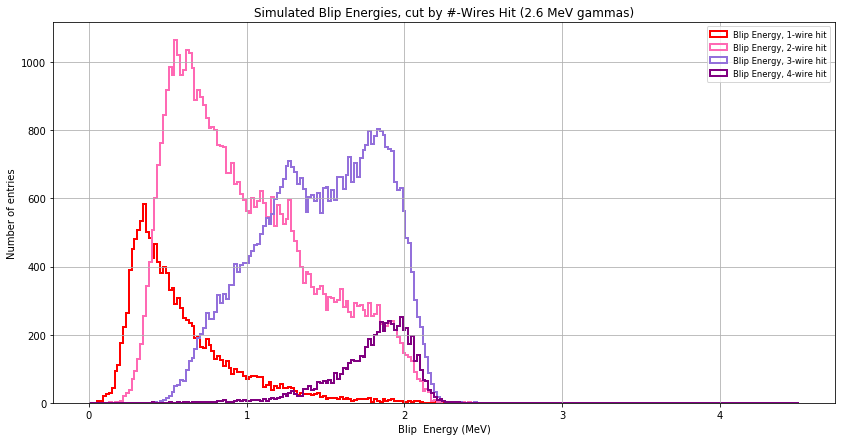

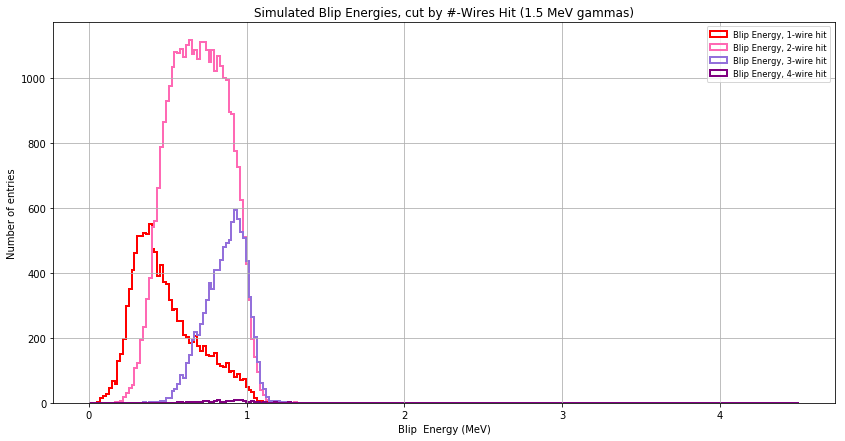

In [18]:
#df_blip_Sim_2pt6_3planes=df_blip_Sim_2pt6.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
df_blip_Sim_2pt6_1wires=df_blip_Sim_2pt6_3planes.query('(blip_pl2_nwires==1)')
df_blip_Sim_2pt6_2wires=df_blip_Sim_2pt6_3planes.query('(blip_pl2_nwires==2)')
df_blip_Sim_2pt6_3wires=df_blip_Sim_2pt6_3planes.query('(blip_pl2_nwires==3)')
df_blip_Sim_2pt6_4wires=df_blip_Sim_2pt6_3planes.query('(blip_pl2_nwires==4)')



BINS = np.linspace(0,4.5,250)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

blip_1wirehist,b1w,p1w = plt.hist(df_blip_Sim_2pt6_1wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 1-wire hit',color='red',normed=False)
blip_2wirehist,b1w,p1w = plt.hist(df_blip_Sim_2pt6_2wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 2-wire hit',color='hotpink',normed=False)
blip_3wirehist,b1w,p1w = plt.hist(df_blip_Sim_2pt6_3wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 3-wire hit',color='mediumpurple',normed=False)
blip_4wirehist,b1w,p1w = plt.hist(df_blip_Sim_2pt6_4wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 4-wire hit',color='purple',normed=False)


plt.title("Simulated Blip Energies, cut by #-Wires Hit (2.6 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')

#df_blip_Sim_2pt6_3planes=df_blip_Sim_2pt6.query('(blip_nplanes==3) and (blip_sigmayz < 2) and (blip_incylinder == False)')
df_blip_Sim_1pt5_4wires=df_blip_Sim_1pt5_3planes.query('(blip_pl2_nwires==4)')
df_blip_Sim_1pt5_3wires=df_blip_Sim_1pt5_3planes.query('(blip_pl2_nwires==3)')
df_blip_Sim_1pt5_2wires=df_blip_Sim_1pt5_3planes.query('(blip_pl2_nwires==2)')
df_blip_Sim_1pt5_1wires=df_blip_Sim_1pt5_3planes.query('(blip_pl2_nwires==1)')

BINS = np.linspace(0,4.5,250)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

blip_1wirehist,b1w,p1w = plt.hist(df_blip_Sim_1pt5_1wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 1-wire hit',color='red',normed=False)
blip_2wirehist,b1w,p1w = plt.hist(df_blip_Sim_1pt5_2wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 2-wire hit',color='hotpink',normed=False)
blip_3wirehist,b1w,p1w = plt.hist(df_blip_Sim_1pt5_3wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 3-wire hit',color='mediumpurple',normed=False)
blip_3wirehist,b1w,p1w = plt.hist(df_blip_Sim_1pt5_4wires['blip_energy'],histtype='step',bins = BINS,lw=2,label='Blip Energy, 4-wire hit',color='purple',normed=False)


plt.title("Simulated Blip Energies, cut by #-Wires Hit (1.5 MeV gammas)")
plt.xlabel("Blip  Energy (MeV)")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
#plt.yscale('log')



In [19]:
#fullFileTree='/blipana/anatree'
#newTree='/blipanaTrkMask/anatree'
#EVT_BRANCH = '/blipana/anatree/event'
#splitTree_ANA = 'anatree'

df_blip_Sim_2pt6_3planes.head()

event  run  timestamp  blip_nplanes      blip_x      blip_y      blip_z  \
0      1    1  386214804             3  230.084106  -96.890869  239.600006   
1      1    1  386214804             3  225.362305  -59.824982  252.199997   
2      3    1  386214804             3   26.782049 -114.211380  227.600006   
4      7    1  386214804             3  209.973740 -104.685097  231.300003   
5      8    1  386214804             3   78.824173 -113.172150  213.800003   

   blip_sigmayz   blip_dx  blip_dyz  ...  blip_incylinder  blip_pl0_clustid  \
0           0.1  0.725475       0.9  ...            False                 1   
1           0.1  0.661117       0.6  ...            False                 0   
2           0.1  0.404436       1.2  ...            False                 1   
4           0.1  0.613967       1.2  ...            False                 0   
5           0.1  0.560518       0.6  ...            False                 1   

   blip_pl1_clustid  blip_pl2_clustid  blip_pl0_nhits  blip_pl1_nhits  \
0                 7                87               3               2   
1                10                88               2               2   
2                 3                75               4               3   
4                 5                74               3               3   
5                 7                97               2               2   

   blip_pl2_nhits  blip_pl0_nwires  blip_pl1_nwires  blip_pl2_nwires  
0               3                3                2                3  
1               2                2                2                2  
2               2                4                3                2  
4               4                3                3                4  
5               2                2                2                2  

[5 rows x 23 columns]

In [ ]:
#df_Event_rn6 = pd.DataFrame( root2array(rn_file_6,newTree) )
#fullFileTree='/blipana/anatree'
#newTree='/blipanaTrkMask/anatree'
anaTree_Blipsarrays='/uboone/data/users/rdorrill/gammaSimStuff/July_2022_gammas/singleGammas/hist_BlipAna_fullmc_20220728_merged_2pt6.root'
df_anaTree_bliparrays = pd.DataFrame( root2array(anaTree_Blipsarrays,fullFileTree) )
print "New data frame ready..."

In [ ]:
with pd.option_context('display.max_columns', 2000):
    print df_anaTree_bliparrays.head(10)


In [ ]:
#Useful data arrays in frame: part_pdg PDG_ids part_depEnergy  nedeps
part_pdg_ids = df_anaTree_bliparrays['part_pdg']
edepPDG_ids = df_anaTree_bliparrays['edep_pdg']
energyDeps = df_anaTree_bliparrays['part_depEnergy']
nedepsList =  df_anaTree_bliparrays['nedeps']
blipEnergies=df_anaTree_bliparrays['blip_energy']
#PDG_ids = df_anaTree_bliparrays['part_pdg']

In [ ]:
print energyDeps[4]
print "Sum eDeps: ",math.fsum(energyDeps[4])
print edepPDG_ids[4]
print part_pdg_ids[4]
print energyDeps[0][0]
#for event_Es in energyDeps:
#    sum = 0
#    for E_i in event_Es:
#        sum+=E_i        
#    print sum

In [ ]:
temp = list((itertools.chain.from_iterable(part_pdg_ids)))
print len(temp)
maxID = max(temp)
print "MaxID: ", maxID

BINS = np.linspace(-22,22,44)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

plt.title("PDG ID from Simulated Blips(2.6 MeV gammas)")
plt.xlabel("PDG ID")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
blip_1wirehist,b1w,p1w = plt.hist(temp,histtype='step',bins = BINS,lw=2,label='Blip Energy, 1-wire hit',color='red',normed=False)

#plt.yscale('log')
numPositrons= temp.count(-11)
percentWithPositrons=(100*float(numPositrons)/len(energyDeps))
print numPositrons, " out of ",len(energyDeps), " events contain positrons, or %s percent"%(percentWithPositrons)
print temp.count(11)
print temp.count(22)
print temp.count(-11)
print len(energyDeps)
print temp.count(-11), " out of ",len(energyDeps), " events contain positrons, or %s percent"%()

In [ ]:
numPositrons= temp.count(-11)
percentWithPositrons=(100*float(numPositrons)/len(energyDeps))


In [ ]:
#print energyDeps[4]
#print "Sum eDeps: ",math.fsum(energyDeps[4])
#print edepPDG_ids[4]
#print part_pdg_ids[4]
#print energyDeps[0][0]
#for event_Es in energyDeps:
#    sum = 0
#    for E_i in event_Es:
#        sum+=E_i        
#    print sum
sumEdeps_withpositrons=[]
blipEs_withpositrons=[]
for i in range(len(part_pdg_ids)):
    if -11 in part_pdg_ids[i]:
        sumEdeps_withpositrons.append(math.fsum(energyDeps[i]))
        for j in range(len(blipEnergies[i])):
            blipEs_withpositrons.append(blipEnergies[i][j])

            
        
BINS = np.linspace(0,3,24)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

plt.title("Summed energy deposits from simulated 2.6 MeV gammas that create positrons")
plt.xlabel("Energy Deposited")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
blip_1wirehist,b1w,p1w = plt.hist(sumEdeps_withpositrons,histtype='step',bins=BINS,lw=2,label='Energy Deposited in Event with Positron',color='red',normed=False)
 
BINS = np.linspace(0,2,24)
fig = plt.figure(figsize=(14,7))
plt.tight_layout()

plt.title("Blip Energies from simulated 2.6 MeV gammas that create positrons")
plt.xlabel("Blip Energy")
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1,fontsize='small')
blip_1wirehist,b1w,p1w = plt.hist(blipEs_withpositrons,histtype='step',bins=BINS,lw=2,label='Energy in blips with Positrons in Event',color='red',normed=False)
     
    

In [ ]:
#df_Event_beam_on.head()
#print df_Event_beam_on['evttime'].nunique()
#Old files to cross check how data looked
#myfile_beam_on= '/uboone/data/users/abhat/GammaCatcher/data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2_hadd.root'
#BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
#df_Event_beam_on = pd.DataFrame( root2array( myfile_beam_on,BRANCH_EVT) )

In [ ]:
#part_pdg_ids[9]
for i in range(len(part_pdg_ids)):
    if -11 in part_pdg_ids[9]:
        print "Positron detected"
        